# Imports and paths

In [1]:
import pandas as pd
import os
import methylprep
#import methQC
import methylcheck
import glob
import numpy as np
from pymethylprocess.meffil_functions import r_autosomal_cpgs, remove_sex
from pymethylprocess.PreProcessDataTypes import PreProcessIDAT
from pymethylprocess.visualizations import umap_embed, plotly_plot, plot_heatmap, plot_cell_type_results, transform_plot
from pymethylprocess.PreProcessDataTypes import PreProcessPhenoData

from pymethylprocess.utils import remove_sex, remove_snps, est_age
from pymethylprocess.MethylationDataTypes import MethylationArray, ImputerObject
from pymethylprocess.preprocess import meffil_encode
import importlib
import numpy as np
from rpy2.robjects import pandas2ri, numpy2ri
import rpy2.robjects as robjects
np.__version__

'1.16.4'

In [2]:
idat_dir='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/'

#samplesheet='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/samplesheets/sample_sheet.csv'
#samplesheets_keepers='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/samplesheets/sample_sheet_keepers.csv'

samplesheet='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/Erlangener_Faelle_850K_subset.xlsx'
#FCD_1a_2a_2b_TSC_PMG.xlsx'
#Erlangener_Faelle_850K_edited_SJ.xlsx'


phenosheet=output_sheet_name=idat_dir+'pheno_sheet.csv'

output_path='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/preprocess_outputs/'
output_pickle=output_path+'methyl_array.pkl'

glob.glob('/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/*/*')


['/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R04C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R01C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R07C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R03C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R05C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R06C01_Grn.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R02C01_Grn.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/2029

In [3]:
#basenamelist=glob.glob(path+'*/*.idat');basenamelist[:4]

## Processing of phenosheet 

In [3]:
import IDAT_Processor
import importlib
importlib.reload(IDAT_Processor)

<module 'IDAT_Processor' from '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IDAT_Processor.py'>

In [4]:
from IDAT_Processor import PreProcessIDATs, PreProcessPhenoData

In [5]:
phenodata=PreProcessPhenoData(pheno_sheet=samplesheet, idat_dir=idat_dir, header_line=0)

In [6]:
pheno_sheet = pd.read_excel(samplesheet,header=0);pheno_sheet

ID  ID_MATERIAL_TYP             txt_idat ALTER_OP ALTER_Beginn  DAUER  \
0   132012            54958  202818860023_R01C01       33            0  33.00   
1   131972            54938  202818860053_R04C01       11            0  11.00   
2   131976            54940  202818860053_R06C01       27            0  27.00   
3   131980            54942  202818860053_R08C01       27            0  27.00   
4   131984            54944  202931510124_R02C01       27            0  27.00   
5   131988            54946  202931510124_R04C01       13            0  13.00   
6   131992            54948  202931510124_R06C01       49            0  49.00   
7   131956            54930  202818860046_R04C01       11          0.5  10.50   
8   131960            54932  202818860046_R06C01       18           10   8.00   
9   131968            54936  202818860053_R02C01       11         0.25  10.75   
10  131940            54922  202931510141_R04C01        3          1.7   1.30   
11  131948            54926  202931510141_R08C01        5         0.25   4.75   
12  110420            43659  202093110108_R07C01       17            3  14.00   
13  110422            43660  202093110108_R08C01       45          0.4  44.60   
14  110424            43661  202093110113_R01C01       24            9  15.00   
15  110426            43662  202093110113_R02C01       19           na    NaN   
16  110428            43663  202093110113_R03C01        9          0.6   8.40   
17  110430            43664  202093110113_R04C01       29            4  25.00   
18  110432            43665  202093110113_R05C01        1           na    NaN   
19  110436            43667  202093110113_R07C01        9            4   5.00   
20  110438            43668  202093110113_R08C01       43           15  28.00   
21  110440            43669  202148010052_R01C01       32           15  17.00   
22  110442            43670  202148010052_R02C01       43           13  30.00   
23  110446            43672  202148010052_R04C01       36           na    NaN   
24  110450            43674  202148010052_R06C01       na           na    NaN   
25  110452            43675  202148010052_R07C01       na           na    NaN   

       Lokalisation             OP_DATUM       Einsenderdiagnose Cluster_DX  \
0   occipital - NCx  2017-01-21 00:00:00           Control - NCx       CTRL   
1    temporal - NCx  2010-06-21 00:00:00           Control - NCx       CTRL   
2    temporal - NCx  2016-11-25 00:00:00           Control - NCx       CTRL   
3     frontal - NCx  2016-11-25 00:00:00           Control - NCx       CTRL   
4    temporal - NCx  2009-08-01 00:00:00           Control - NCx       CTRL   
5    temporal - NCx  2009-08-01 00:00:00           Control - NCx       CTRL   
6    temporal - NCx  2016-08-10 00:00:00           Control - NCx       CTRL   
7   occipital - NCx  2010-06-07 00:00:00  FCD 1AHolthausen - NCx     FCD 1A   
8   occipital - NCx  2016-11-18 00:00:00  FCD 1AHolthausen - NCx     FCD 1A   
9   occipital - NCx  2016-11-25 00:00:00  FCD 1AHolthausen - NCx     FCD 1A   
10  occipital - NCx  2004-07-23 00:00:00  FCD 1AHolthausen - NCx     FCD 1A   
11  occipital - NCx  2006-11-20 00:00:00  FCD 1AHolthausen - NCx     FCD 1A   
12          frontal  2015-07-07 00:00:00               FCD 2ADNA     FCD 2A   
13          frontal  2015-03-31 00:00:00               FCD 2ADNA     FCD 2A   
14          frontal  2015-03-09 00:00:00               FCD 2ADNA     FCD 2A   
15          frontal  2014-10-28 00:00:00               FCD 2ADNA     FCD 2A   
16          frontal  2015-06-30 00:00:00               FCD 2ADNA     FCD 2A   
17          frontal  2017-01-17 00:00:00               FCD 2ADNA     FCD 2A   
18         temporal  2004-11-04 00:00:00               FCD 2ADNA     FCD 2A   
19               na  2015-08-31 00:00:00              FCD 2B*DNA     FCD 2B   
20          frontal  2015-09-28 00:00:00              FCD 2B*DNA     FCD 2B   
21          frontal  2013-02-11 00:00:00              FCD 2B*DNA     FCD 2B   
22 

In [7]:
pheno_sheet=phenodata.format_custom(
              basename_col='txt_idat', 
              disease_class_column='Cluster_DX', 
              include_columns={'ALTER_Beginn':'ALTER_Beginn',
                               'ALTER_OP':'ALTER_OP',
                               'DAUER':'DAUER',                               
                               'Lokalisation':'Lokalisation', 
                               'Einsenderdiagnose':'Einsenderdiagnose',
                               'KLINIK':'KLINIK',
                               'PATIENT_GESCHLECHT':'sex',
                               'PATIENT_NACHNAME':'Fallnummer', 
                               'txt_idat':'txt_idat'
                               
                              }
                       )

Check whether your input data at the "sex"-column contains M for male and/ or F for Female


In [7]:
pheno_sheet=phenodata.format_custom(
              basename_col='txt_idat', 
              disease_class_column='Diagnosis', 
              include_columns={'age':'age',
                               'sex':'sex',
                               'Center':'Center',
                               'Sample':'Sample', 
                               'Lokalisation':'Lokalisation', 
                               #'txt_idat':'txt_idat'
                              }
                       )

Check whether your input data at the "sex"-column contains M for male and/ or F for Female


In [8]:
phenodata.pheno_sheet

ALTER_Beginn ALTER_OP                                           Basename  \
0             0       33  /home/Deep_Learner/private/network/Methyl_Arra...   
1             0       11  /home/Deep_Learner/private/network/Methyl_Arra...   
2             0       27  /home/Deep_Learner/private/network/Methyl_Arra...   
3             0       27  /home/Deep_Learner/private/network/Methyl_Arra...   
4             0       27  /home/Deep_Learner/private/network/Methyl_Arra...   
5             0       13  /home/Deep_Learner/private/network/Methyl_Arra...   
6             0       49  /home/Deep_Learner/private/network/Methyl_Arra...   
7           0.5       11  /home/Deep_Learner/private/network/Methyl_Arra...   
8            10       18  /home/Deep_Learner/private/network/Methyl_Arra...   
9          0.25       11  /home/Deep_Learner/private/network/Methyl_Arra...   
10          1.7        3  /home/Deep_Learner/private/network/Methyl_Arra...   
11         0.25        5  /home/Deep_Learner/private/network/Methyl_Arra...   
12            3       17  /home/Deep_Learner/private/network/Methyl_Arra...   
13          0.4       45  /home/Deep_Learner/private/network/Methyl_Arra...   
14            9       24  /home/Deep_Learner/private/network/Methyl_Arra...   
15           na       19  /home/Deep_Learner/private/network/Methyl_Arra...   
16          0.6        9  /home/Deep_Learner/private/network/Methyl_Arra...   
17            4       29  /home/Deep_Learner/private/network/Methyl_Arra...   
18           na        1  /home/Deep_Learner/private/network/Methyl_Arra...   
19            4        9  /home/Deep_Learner/private/network/Methyl_Arra...   
20           15       43  /home/Deep_Learner/private/network/Methyl_Arra...   
21           15       32  /home/Deep_Learner/private/network/Methyl_Arra...   
22           13       43  /home/Deep_Learner/private/network/Methyl_Arra...   
23           na       36  /home/Deep_Learner/private/network/Methyl_Arra...   
24           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   
25           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   

         Batchnum  DAUER       Einsenderdiagnose KLINIK     Lokalisation sex  \
0   b202818860023  33.00           Control - NCx   UKER  occipital - NCx   m   
1   b202818860053  11.00           Control - NCx   UKER   temporal - NCx   f   
2   b202818860053  27.00           Control - NCx   UKER   temporal - NCx   m   
3   b202818860053  27.00           Control - NCx   UKER    frontal - NCx   m   
4   b202931510124  27.00           Control - NCx   UKER   temporal - NCx   m   
5   b202931510124  13.00           Control - NCx   UKER   temporal - NCx   f   
6   b202931510124  49.00           Control - NCx   UKER   temporal - NCx   f   
7   b202818860046  10.50  FCD 1AHolthausen - NCx    VGT  occipital - NCx   m   
8   b202818860046   8.00  FCD 1AHolthausen - NCx    VGT  occipital - NCx   f   
9   b202818860053  10.75  FCD 1AHolthausen - NCx    VGT  occipital - NCx   m   
10  b202931510141   1.30  FCD 1AHolthausen - NCx    VGT  occipital - NCx   m   
11  b202931510141   4.75  FCD 1AHolthausen - NCx    VGT  occipital - NCx   f   
12  b202093110108  14.00               FCD 2ADNA   Mara          frontal  nd   
13  b202093110108  44.60               FCD 2ADNA   Mara          frontal  nd   
14  b202093110113  15.00               FCD 2ADNA   Mara          frontal  nd   
15  b202093110113    NaN               FCD 2ADNA   Mara          frontal  nd   
16  b202093110113   8.40               FCD 2ADNA   Mara          frontal  nd   
17  b202093110113  25.00               FCD 2ADNA   UKER          frontal  nd   
18  b202093110113    NaN               FCD 2ADNA    VGT         temporal  nd   
19  b202093110113   5.00              FCD 2B*DNA   Mara               na  nd   
20  b202093110113  28.00              FCD 2B*DNA   Mara          frontal  nd   
21  b202148010052  17.00              FCD 2B*DNA   Mara          frontal  nd   
22  b202148010052  30.00     

In [9]:
phenodata.format_sex_column('m','f')

ALTER_Beginn ALTER_OP                                           Basename  \
0             0       33  /home/Deep_Learner/private/network/Methyl_Arra...   
1             0       11  /home/Deep_Learner/private/network/Methyl_Arra...   
2             0       27  /home/Deep_Learner/private/network/Methyl_Arra...   
3             0       27  /home/Deep_Learner/private/network/Methyl_Arra...   
4             0       27  /home/Deep_Learner/private/network/Methyl_Arra...   
5             0       13  /home/Deep_Learner/private/network/Methyl_Arra...   
6             0       49  /home/Deep_Learner/private/network/Methyl_Arra...   
7           0.5       11  /home/Deep_Learner/private/network/Methyl_Arra...   
8            10       18  /home/Deep_Learner/private/network/Methyl_Arra...   
9          0.25       11  /home/Deep_Learner/private/network/Methyl_Arra...   
10          1.7        3  /home/Deep_Learner/private/network/Methyl_Arra...   
11         0.25        5  /home/Deep_Learner/private/network/Methyl_Arra...   
12            3       17  /home/Deep_Learner/private/network/Methyl_Arra...   
13          0.4       45  /home/Deep_Learner/private/network/Methyl_Arra...   
14            9       24  /home/Deep_Learner/private/network/Methyl_Arra...   
15           na       19  /home/Deep_Learner/private/network/Methyl_Arra...   
16          0.6        9  /home/Deep_Learner/private/network/Methyl_Arra...   
17            4       29  /home/Deep_Learner/private/network/Methyl_Arra...   
18           na        1  /home/Deep_Learner/private/network/Methyl_Arra...   
19            4        9  /home/Deep_Learner/private/network/Methyl_Arra...   
20           15       43  /home/Deep_Learner/private/network/Methyl_Arra...   
21           15       32  /home/Deep_Learner/private/network/Methyl_Arra...   
22           13       43  /home/Deep_Learner/private/network/Methyl_Arra...   
23           na       36  /home/Deep_Learner/private/network/Methyl_Arra...   
24           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   
25           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   

         Batchnum  DAUER       Einsenderdiagnose KLINIK     Lokalisation  sex  \
0   b202818860023  33.00           Control - NCx   UKER  occipital - NCx    M   
1   b202818860053  11.00           Control - NCx   UKER   temporal - NCx    F   
2   b202818860053  27.00           Control - NCx   UKER   temporal - NCx    M   
3   b202818860053  27.00           Control - NCx   UKER    frontal - NCx    M   
4   b202931510124  27.00           Control - NCx   UKER   temporal - NCx    M   
5   b202931510124  13.00           Control - NCx   UKER   temporal - NCx    F   
6   b202931510124  49.00           Control - NCx   UKER   temporal - NCx    F   
7   b202818860046  10.50  FCD 1AHolthausen - NCx    VGT  occipital - NCx    M   
8   b202818860046   8.00  FCD 1AHolthausen - NCx    VGT  occipital - NCx    F   
9   b202818860053  10.75  FCD 1AHolthausen - NCx    VGT  occipital - NCx    M   
10  b202931510141   1.30  FCD 1AHolthausen - NCx    VGT  occipital - NCx    M   
11  b202931510141   4.75  FCD 1AHolthausen - NCx    VGT  occipital - NCx    F   
12  b202093110108  14.00               FCD 2ADNA   Mara          frontal  NaN   
13  b202093110108  44.60               FCD 2ADNA   Mara          frontal  NaN   
14  b202093110113  15.00               FCD 2ADNA   Mara          frontal  NaN   
15  b202093110113    NaN               FCD 2ADNA   Mara          frontal  NaN   
16  b202093110113   8.40               FCD 2ADNA   Mara          frontal  NaN   
17  b202093110113  25.00               FCD 2ADNA   UKER          frontal  NaN   
18  b202093110113    NaN               FCD 2ADNA    VGT         temporal  NaN   
19  b202093110113   5.00              FCD 2B*DNA   Mara               na  NaN   
20  b202093110113  28.00              FCD 2B*DNA   Mara          frontal  NaN   
21  b202148010052  17.00              FCD 2B*DNA   Mara          frontal  NaN   
22  b2

In [10]:
phenodata.pheno_sheet

ALTER_Beginn ALTER_OP                                           Basename  \
0             0       33  /home/Deep_Learner/private/network/Methyl_Arra...   
1             0       11  /home/Deep_Learner/private/network/Methyl_Arra...   
2             0       27  /home/Deep_Learner/private/network/Methyl_Arra...   
3             0       27  /home/Deep_Learner/private/network/Methyl_Arra...   
4             0       27  /home/Deep_Learner/private/network/Methyl_Arra...   
5             0       13  /home/Deep_Learner/private/network/Methyl_Arra...   
6             0       49  /home/Deep_Learner/private/network/Methyl_Arra...   
7           0.5       11  /home/Deep_Learner/private/network/Methyl_Arra...   
8            10       18  /home/Deep_Learner/private/network/Methyl_Arra...   
9          0.25       11  /home/Deep_Learner/private/network/Methyl_Arra...   
10          1.7        3  /home/Deep_Learner/private/network/Methyl_Arra...   
11         0.25        5  /home/Deep_Learner/private/network/Methyl_Arra...   
12            3       17  /home/Deep_Learner/private/network/Methyl_Arra...   
13          0.4       45  /home/Deep_Learner/private/network/Methyl_Arra...   
14            9       24  /home/Deep_Learner/private/network/Methyl_Arra...   
15           na       19  /home/Deep_Learner/private/network/Methyl_Arra...   
16          0.6        9  /home/Deep_Learner/private/network/Methyl_Arra...   
17            4       29  /home/Deep_Learner/private/network/Methyl_Arra...   
18           na        1  /home/Deep_Learner/private/network/Methyl_Arra...   
19            4        9  /home/Deep_Learner/private/network/Methyl_Arra...   
20           15       43  /home/Deep_Learner/private/network/Methyl_Arra...   
21           15       32  /home/Deep_Learner/private/network/Methyl_Arra...   
22           13       43  /home/Deep_Learner/private/network/Methyl_Arra...   
23           na       36  /home/Deep_Learner/private/network/Methyl_Arra...   
24           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   
25           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   

         Batchnum  DAUER       Einsenderdiagnose KLINIK     Lokalisation  sex  \
0   b202818860023  33.00           Control - NCx   UKER  occipital - NCx    M   
1   b202818860053  11.00           Control - NCx   UKER   temporal - NCx    F   
2   b202818860053  27.00           Control - NCx   UKER   temporal - NCx    M   
3   b202818860053  27.00           Control - NCx   UKER    frontal - NCx    M   
4   b202931510124  27.00           Control - NCx   UKER   temporal - NCx    M   
5   b202931510124  13.00           Control - NCx   UKER   temporal - NCx    F   
6   b202931510124  49.00           Control - NCx   UKER   temporal - NCx    F   
7   b202818860046  10.50  FCD 1AHolthausen - NCx    VGT  occipital - NCx    M   
8   b202818860046   8.00  FCD 1AHolthausen - NCx    VGT  occipital - NCx    F   
9   b202818860053  10.75  FCD 1AHolthausen - NCx    VGT  occipital - NCx    M   
10  b202931510141   1.30  FCD 1AHolthausen - NCx    VGT  occipital - NCx    M   
11  b202931510141   4.75  FCD 1AHolthausen - NCx    VGT  occipital - NCx    F   
12  b202093110108  14.00               FCD 2ADNA   Mara          frontal  NaN   
13  b202093110108  44.60               FCD 2ADNA   Mara          frontal  NaN   
14  b202093110113  15.00               FCD 2ADNA   Mara          frontal  NaN   
15  b202093110113    NaN               FCD 2ADNA   Mara          frontal  NaN   
16  b202093110113   8.40               FCD 2ADNA   Mara          frontal  NaN   
17  b202093110113  25.00               FCD 2ADNA   UKER          frontal  NaN   
18  b202093110113    NaN               FCD 2ADNA    VGT         temporal  NaN   
19  b202093110113   5.00              FCD 2B*DNA   Mara               na  NaN   
20  b202093110113  28.00              FCD 2B*DNA   Mara          frontal  NaN   
21  b202148010052  17.00              FCD 2B*DNA   Mara          frontal  NaN   
22  b2

In [11]:
phenodata.create_ID(disease='disease', sample='txt_idat')

ALTER_Beginn ALTER_OP                                           Basename  \
0             0       33  /home/Deep_Learner/private/network/Methyl_Arra...   
1             0       11  /home/Deep_Learner/private/network/Methyl_Arra...   
2             0       27  /home/Deep_Learner/private/network/Methyl_Arra...   
3             0       27  /home/Deep_Learner/private/network/Methyl_Arra...   
4             0       27  /home/Deep_Learner/private/network/Methyl_Arra...   
5             0       13  /home/Deep_Learner/private/network/Methyl_Arra...   
6             0       49  /home/Deep_Learner/private/network/Methyl_Arra...   
7           0.5       11  /home/Deep_Learner/private/network/Methyl_Arra...   
8            10       18  /home/Deep_Learner/private/network/Methyl_Arra...   
9          0.25       11  /home/Deep_Learner/private/network/Methyl_Arra...   
10          1.7        3  /home/Deep_Learner/private/network/Methyl_Arra...   
11         0.25        5  /home/Deep_Learner/private/network/Methyl_Arra...   
12            3       17  /home/Deep_Learner/private/network/Methyl_Arra...   
13          0.4       45  /home/Deep_Learner/private/network/Methyl_Arra...   
14            9       24  /home/Deep_Learner/private/network/Methyl_Arra...   
15           na       19  /home/Deep_Learner/private/network/Methyl_Arra...   
16          0.6        9  /home/Deep_Learner/private/network/Methyl_Arra...   
17            4       29  /home/Deep_Learner/private/network/Methyl_Arra...   
18           na        1  /home/Deep_Learner/private/network/Methyl_Arra...   
19            4        9  /home/Deep_Learner/private/network/Methyl_Arra...   
20           15       43  /home/Deep_Learner/private/network/Methyl_Arra...   
21           15       32  /home/Deep_Learner/private/network/Methyl_Arra...   
22           13       43  /home/Deep_Learner/private/network/Methyl_Arra...   
23           na       36  /home/Deep_Learner/private/network/Methyl_Arra...   
24           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   
25           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   

         Batchnum  DAUER       Einsenderdiagnose KLINIK     Lokalisation  sex  \
0   b202818860023  33.00           Control - NCx   UKER  occipital - NCx    M   
1   b202818860053  11.00           Control - NCx   UKER   temporal - NCx    F   
2   b202818860053  27.00           Control - NCx   UKER   temporal - NCx    M   
3   b202818860053  27.00           Control - NCx   UKER    frontal - NCx    M   
4   b202931510124  27.00           Control - NCx   UKER   temporal - NCx    M   
5   b202931510124  13.00           Control - NCx   UKER   temporal - NCx    F   
6   b202931510124  49.00           Control - NCx   UKER   temporal - NCx    F   
7   b202818860046  10.50  FCD 1AHolthausen - NCx    VGT  occipital - NCx    M   
8   b202818860046   8.00  FCD 1AHolthausen - NCx    VGT  occipital - NCx    F   
9   b202818860053  10.75  FCD 1AHolthausen - NCx    VGT  occipital - NCx    M   
10  b202931510141   1.30  FCD 1AHolthausen - NCx    VGT  occipital - NCx    M   
11  b202931510141   4.75  FCD 1AHolthausen - NCx    VGT  occipital - NCx    F   
12  b202093110108  14.00               FCD 2ADNA   Mara          frontal  NaN   
13  b202093110108  44.60               FCD 2ADNA   Mara          frontal  NaN   
14  b202093110113  15.00               FCD 2ADNA   Mara          frontal  NaN   
15  b202093110113    NaN               FCD 2ADNA   Mara          frontal  NaN   
16  b202093110113   8.40               FCD 2ADNA   Mara          frontal  NaN   
17  b202093110113  25.00               FCD 2ADNA   UKER          frontal  NaN   
18  b202093110113    NaN               FCD 2ADNA    VGT         temporal  NaN   
19  b202093110113   5.00              FCD 2B*DNA   Mara               na  NaN   
20  b202093110113  28.00              FCD 2B*DNA   Mara          frontal  NaN   
21  b202148010052  17.00              FCD 2B*DNA   Mara          frontal  NaN   
22  b2

In [13]:
exclude_disease_list=[
 'FCD 1A',
 'TLE/CTRL',
 'MOGHE',
 'CTRL',
 'HME',
 
 'FCD 3B',
 'FCD 3C',
 'FCD 3A',
 'FCD 3D',
 'PMG',
 'mMCD']
phenodata.pheno_sheet['disease'].unique().tolist()

['FCD 2A',
 'FCD 2B',
 'FCD 1A',
 'TLE/CTRL',
 'MOGHE',
 'CTRL',
 'HME',
 'TSC',
 'FCD 3B',
 'FCD 3C',
 'FCD 3A',
 'FCD 3D',
 'PMG',
 'mMCD']

In [14]:
phenodata.pheno_sheet[~phenodata.pheno_sheet['disease'].isin(exclude_disease_list)]

ALTER_Beginn ALTER_OP                                           Basename  \
0              3       17  /home/Deep_Learner/private/network/Methyl_Arra...   
1            0.4       45  /home/Deep_Learner/private/network/Methyl_Arra...   
2              9       24  /home/Deep_Learner/private/network/Methyl_Arra...   
3             na       19  /home/Deep_Learner/private/network/Methyl_Arra...   
4            0.6        9  /home/Deep_Learner/private/network/Methyl_Arra...   
..           ...      ...                                                ...   
255            0        3  /home/Deep_Learner/private/network/Methyl_Arra...   
256            0       15  /home/Deep_Learner/private/network/Methyl_Arra...   
257            0        2  /home/Deep_Learner/private/network/Methyl_Arra...   
258            0        1  /home/Deep_Learner/private/network/Methyl_Arra...   
259            0        3  /home/Deep_Learner/private/network/Methyl_Arra...   

          Batchnum  DAUER Einsenderdiagnose KLINIK Lokalisation  sex  \
0    b202093110108   14.0         FCD 2ADNA   Mara      frontal  NaN   
1    b202093110108   44.6         FCD 2ADNA   Mara      frontal  NaN   
2    b202093110113   15.0         FCD 2ADNA   Mara      frontal  NaN   
3    b202093110113    NaN         FCD 2ADNA   Mara      frontal  NaN   
4    b202093110113    8.4         FCD 2ADNA   Mara      frontal  NaN   
..             ...    ...               ...    ...          ...  ...   
255  b203220070086    3.0             TSC 1   Mara      frontal    M   
256  b203220070086   15.0            TSC na    VGT     temporal    M   
257  b203220070086    2.0             TSC 1   Mara     temporal    F   
258  b203220070086    1.0            TSC na   Mara      frontal    M   
259  b203220070086    3.0            TSC na   Mara      frontal    F   

            Fallnummer disease             txt_idat  \
0    N1232/15 (159/15)  FCD 2A  202093110108_R07C01   
1      N619/15 (79/15)  FCD 2A  202093110108_R08C01   
2      N475/15 (53/15)  FCD 2A  202093110113_R01C01   
3    N2069/14 (271/14)  FCD 2A  202093110113_R02C01   
4    N1170/15 (151/15)  FCD 2A  202093110113_R03C01   
..                 ...     ...                  ...   
255         2174/14 IV     TSC  203220070086_R04C01   
256         1439/14 I1     TSC  203220070086_R05C01   
257          699/16 I1     TSC  203220070086_R06C01   
258        1467/16 III     TSC  203220070086_R07C01   
259          1061/17 7     TSC  203220070086_R08C01   

                             ID  
0    FCD 2A.202093110108_R07C01  
1    FCD 2A.202093110108_R08C01  
2    FCD 2A.202093110113_R01C01  
3    FCD 2A.202093110113_R02C01  
4    FCD 2A.202093110113_R03C01  
..                          ...  
255     TSC.203220070086_R04C01  
256     TSC.203220070086_R05C01  
257     TSC.203220070086_R06C01  
258     TSC.203220070086_R07C01  
259     TSC.203220070086_R08C01  

[80 rows x 13 columns]

In [15]:
phenodata.remove_diseases(exclude_disease_list)

In [11]:
phenodata.pheno_sheet

ALTER_Beginn ALTER_OP                                           Basename  \
0              3       17  /home/Deep_Learner/private/network/Methyl_Arra...   
1            0.4       45  /home/Deep_Learner/private/network/Methyl_Arra...   
2              9       24  /home/Deep_Learner/private/network/Methyl_Arra...   
3             na       19  /home/Deep_Learner/private/network/Methyl_Arra...   
4            0.6        9  /home/Deep_Learner/private/network/Methyl_Arra...   
..           ...      ...                                                ...   
287          NaN        4  /home/Deep_Learner/private/network/Methyl_Arra...   
288          NaN       38  /home/Deep_Learner/private/network/Methyl_Arra...   
289          NaN       19  /home/Deep_Learner/private/network/Methyl_Arra...   
290          NaN       27  /home/Deep_Learner/private/network/Methyl_Arra...   
291          NaN        9  /home/Deep_Learner/private/network/Methyl_Arra...   

          Batchnum  DAUER Einsenderdiagnose KLINIK Lokalisation  sex  \
0    b202093110108   14.0         FCD 2ADNA   Mara      frontal  NaN   
1    b202093110108   44.6         FCD 2ADNA   Mara      frontal  NaN   
2    b202093110113   15.0         FCD 2ADNA   Mara      frontal  NaN   
3    b202093110113    NaN         FCD 2ADNA   Mara      frontal  NaN   
4    b202093110113    8.4         FCD 2ADNA   Mara      frontal  NaN   
..             ...    ...               ...    ...          ...  ...   
287  b203273630036    NaN              mMCD    VGT  frontal -WM    F   
288  b203273630036    NaN              mMCD  other  frontal -WM    F   
289  b203273630036    NaN              mMCD  other  frontal -WM    M   
290  b203273630036    NaN              mMCD   UKER  frontal -WM    M   
291  b203273630036    NaN              mMCD    VGT  frontal -WM    F   

            Fallnummer disease             txt_idat  \
0    N1232/15 (159/15)  FCD 2A  202093110108_R07C01   
1      N619/15 (79/15)  FCD 2A  202093110108_R08C01   
2      N475/15 (53/15)  FCD 2A  202093110113_R01C01   
3    N2069/14 (271/14)  FCD 2A  202093110113_R02C01   
4    N1170/15 (151/15)  FCD 2A  202093110113_R03C01   
..                 ...     ...                  ...   
287     Erlangen 37/19    mMCD  203273630036_R04C01   
288   Erlangen 1969/18    mMCD  203273630036_R05C01   
289   Erlangen 1074/16    mMCD  203273630036_R06C01   
290   Erlangen 1139/15    mMCD  203273630036_R07C01   
291   Erlangen 1286/15    mMCD  203273630036_R08C01   

                             ID  
0    FCD 2A.202093110108_R07C01  
1    FCD 2A.202093110108_R08C01  
2    FCD 2A.202093110113_R01C01  
3    FCD 2A.202093110113_R02C01  
4    FCD 2A.202093110113_R03C01  
..                          ...  
287    mMCD.203273630036_R04C01  
288    mMCD.203273630036_R05C01  
289    mMCD.203273630036_R06C01  
290    mMCD.203273630036_R07C01  
291    mMCD.203273630036_R08C01  

[292 rows x 13 columns]

In [12]:
phenodata.export(output_sheet_name)

Next Step: Please move all other sample sheets out of this directory.


In [13]:
#pheno_sheet.to_csv(phenosheet, index=False)

In [13]:
pd.read_csv(phenosheet, index_col=False)

ALTER_Beginn ALTER_OP                                           Basename  \
0             0       33  /home/Deep_Learner/private/network/Methyl_Arra...   
1             0       11  /home/Deep_Learner/private/network/Methyl_Arra...   
2             0       27  /home/Deep_Learner/private/network/Methyl_Arra...   
3             0       27  /home/Deep_Learner/private/network/Methyl_Arra...   
4             0       27  /home/Deep_Learner/private/network/Methyl_Arra...   
5             0       13  /home/Deep_Learner/private/network/Methyl_Arra...   
6             0       49  /home/Deep_Learner/private/network/Methyl_Arra...   
7           0.5       11  /home/Deep_Learner/private/network/Methyl_Arra...   
8            10       18  /home/Deep_Learner/private/network/Methyl_Arra...   
9          0.25       11  /home/Deep_Learner/private/network/Methyl_Arra...   
10          1.7        3  /home/Deep_Learner/private/network/Methyl_Arra...   
11         0.25        5  /home/Deep_Learner/private/network/Methyl_Arra...   
12            3       17  /home/Deep_Learner/private/network/Methyl_Arra...   
13          0.4       45  /home/Deep_Learner/private/network/Methyl_Arra...   
14            9       24  /home/Deep_Learner/private/network/Methyl_Arra...   
15           na       19  /home/Deep_Learner/private/network/Methyl_Arra...   
16          0.6        9  /home/Deep_Learner/private/network/Methyl_Arra...   
17            4       29  /home/Deep_Learner/private/network/Methyl_Arra...   
18           na        1  /home/Deep_Learner/private/network/Methyl_Arra...   
19            4        9  /home/Deep_Learner/private/network/Methyl_Arra...   
20           15       43  /home/Deep_Learner/private/network/Methyl_Arra...   
21           15       32  /home/Deep_Learner/private/network/Methyl_Arra...   
22           13       43  /home/Deep_Learner/private/network/Methyl_Arra...   
23           na       36  /home/Deep_Learner/private/network/Methyl_Arra...   
24           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   
25           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   

         Batchnum  DAUER       Einsenderdiagnose KLINIK     Lokalisation  sex  \
0   b202818860023  33.00           Control - NCx   UKER  occipital - NCx    M   
1   b202818860053  11.00           Control - NCx   UKER   temporal - NCx    F   
2   b202818860053  27.00           Control - NCx   UKER   temporal - NCx    M   
3   b202818860053  27.00           Control - NCx   UKER    frontal - NCx    M   
4   b202931510124  27.00           Control - NCx   UKER   temporal - NCx    M   
5   b202931510124  13.00           Control - NCx   UKER   temporal - NCx    F   
6   b202931510124  49.00           Control - NCx   UKER   temporal - NCx    F   
7   b202818860046  10.50  FCD 1AHolthausen - NCx    VGT  occipital - NCx    M   
8   b202818860046   8.00  FCD 1AHolthausen - NCx    VGT  occipital - NCx    F   
9   b202818860053  10.75  FCD 1AHolthausen - NCx    VGT  occipital - NCx    M   
10  b202931510141   1.30  FCD 1AHolthausen - NCx    VGT  occipital - NCx    M   
11  b202931510141   4.75  FCD 1AHolthausen - NCx    VGT  occipital - NCx    F   
12  b202093110108  14.00               FCD 2ADNA   Mara          frontal  NaN   
13  b202093110108  44.60               FCD 2ADNA   Mara          frontal  NaN   
14  b202093110113  15.00               FCD 2ADNA   Mara          frontal  NaN   
15  b202093110113    NaN               FCD 2ADNA   Mara          frontal  NaN   
16  b202093110113   8.40               FCD 2ADNA   Mara          frontal  NaN   
17  b202093110113  25.00               FCD 2ADNA   UKER          frontal  NaN   
18  b202093110113    NaN               FCD 2ADNA    VGT         temporal  NaN   
19  b202093110113   5.00              FCD 2B*DNA   Mara               na  NaN   
20  b202093110113  28.00              FCD 2B*DNA   Mara          frontal  NaN   
21  b202148010052  17.00              FCD 2B*DNA   Mara          frontal  NaN   
22  b2

# IDAT Processing modified class

## Loading data

In [91]:
import IDAT_Processor
from IDAT_Processor import PreProcessIDATs

In [90]:
import importlib
importlib.reload(IDAT_Processor)

<module 'IDAT_Processor' from '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IDAT_Processor.py'>

In [92]:
preproidat=PreProcessIDATs(idat_dir=idat_dir)

In [93]:
preproidat.load_idats(use_cache=False)

[1]
 "/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS//pheno_sheet.csv"




/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[read.metharray.sheet] Found the following CSV files:




ALTER_Beginn ALTER_OP                                           Basename  \
0             0       33  /home/Deep_Learner/private/network/Methyl_Arra...   
1             0       11  /home/Deep_Learner/private/network/Methyl_Arra...   
2             0       27  /home/Deep_Learner/private/network/Methyl_Arra...   
3             0       27  /home/Deep_Learner/private/network/Methyl_Arra...   
4             0       27  /home/Deep_Learner/private/network/Methyl_Arra...   
5             0       13  /home/Deep_Learner/private/network/Methyl_Arra...   
6             0       49  /home/Deep_Learner/private/network/Methyl_Arra...   
7           0.5       11  /home/Deep_Learner/private/network/Methyl_Arra...   
8            10       18  /home/Deep_Learner/private/network/Methyl_Arra...   
9          0.25       11  /home/Deep_Learner/private/network/Methyl_Arra...   
10          1.7        3  /home/Deep_Learner/private/network/Methyl_Arra...   
11         0.25        5  /home/Deep_Learner/private/network/Methyl_Arra...   
12            3       17  /home/Deep_Learner/private/network/Methyl_Arra...   
13          0.4       45  /home/Deep_Learner/private/network/Methyl_Arra...   
14            9       24  /home/Deep_Learner/private/network/Methyl_Arra...   
15           na       19  /home/Deep_Learner/private/network/Methyl_Arra...   
16          0.6        9  /home/Deep_Learner/private/network/Methyl_Arra...   
17            4       29  /home/Deep_Learner/private/network/Methyl_Arra...   
18           na        1  /home/Deep_Learner/private/network/Methyl_Arra...   
19            4        9  /home/Deep_Learner/private/network/Methyl_Arra...   
20           15       43  /home/Deep_Learner/private/network/Methyl_Arra...   
21           15       32  /home/Deep_Learner/private/network/Methyl_Arra...   
22           13       43  /home/Deep_Learner/private/network/Methyl_Arra...   
23           na       36  /home/Deep_Learner/private/network/Methyl_Arra...   
24           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   
25           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   

         Batchnum  DAUER       Einsenderdiagnose KLINIK     Lokalisation sex  \
0   b202818860023  33.00           Control - NCx   UKER  occipital - NCx   M   
1   b202818860053  11.00           Control - NCx   UKER   temporal - NCx   F   
2   b202818860053  27.00           Control - NCx   UKER   temporal - NCx   M   
3   b202818860053  27.00           Control - NCx   UKER    frontal - NCx   M   
4   b202931510124  27.00           Control - NCx   UKER   temporal - NCx   M   
5   b202931510124  13.00           Control - NCx   UKER   temporal - NCx   F   
6   b202931510124  49.00           Control - NCx   UKER   temporal - NCx   F   
7   b202818860046  10.50  FCD 1AHolthausen - NCx    VGT  occipital - NCx   M   
8   b202818860046   8.00  FCD 1AHolthausen - NCx    VGT  occipital - NCx   F   
9   b202818860053  10.75  FCD 1AHolthausen - NCx    VGT  occipital - NCx   M   
10  b202931510141   1.30  FCD 1AHolthausen - NCx    VGT  occipital - NCx   M   
11  b202931510141   4.75  FCD 1AHolthausen - NCx    VGT  occipital - NCx   F   
12  b202093110108  14.00               FCD 2ADNA   Mara          frontal       
13  b202093110108  44.60               FCD 2ADNA   Mara          frontal       
14  b202093110113  15.00               FCD 2ADNA   Mara          frontal       
15  b202093110113    NaN               FCD 2ADNA   Mara          frontal       
16  b202093110113   8.40               FCD 2ADNA   Mara          frontal       
17  b202093110113  25.00               FCD 2ADNA   UKER          frontal       
18  b202093110113    NaN               FCD 2ADNA    VGT         temporal       
19  b202093110113   5.00              FCD 2B*DNA   Mara               na       
20  b202093110113  28.00              FCD 2B*DNA   Mara          frontal       
21  b202148010052  17.00              FCD 2B*DNA   Mara          frontal       
22  b202148010052  30.00     

## Quality control

### Sample wise quality control

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



<IPython.core.display.Javascript object>


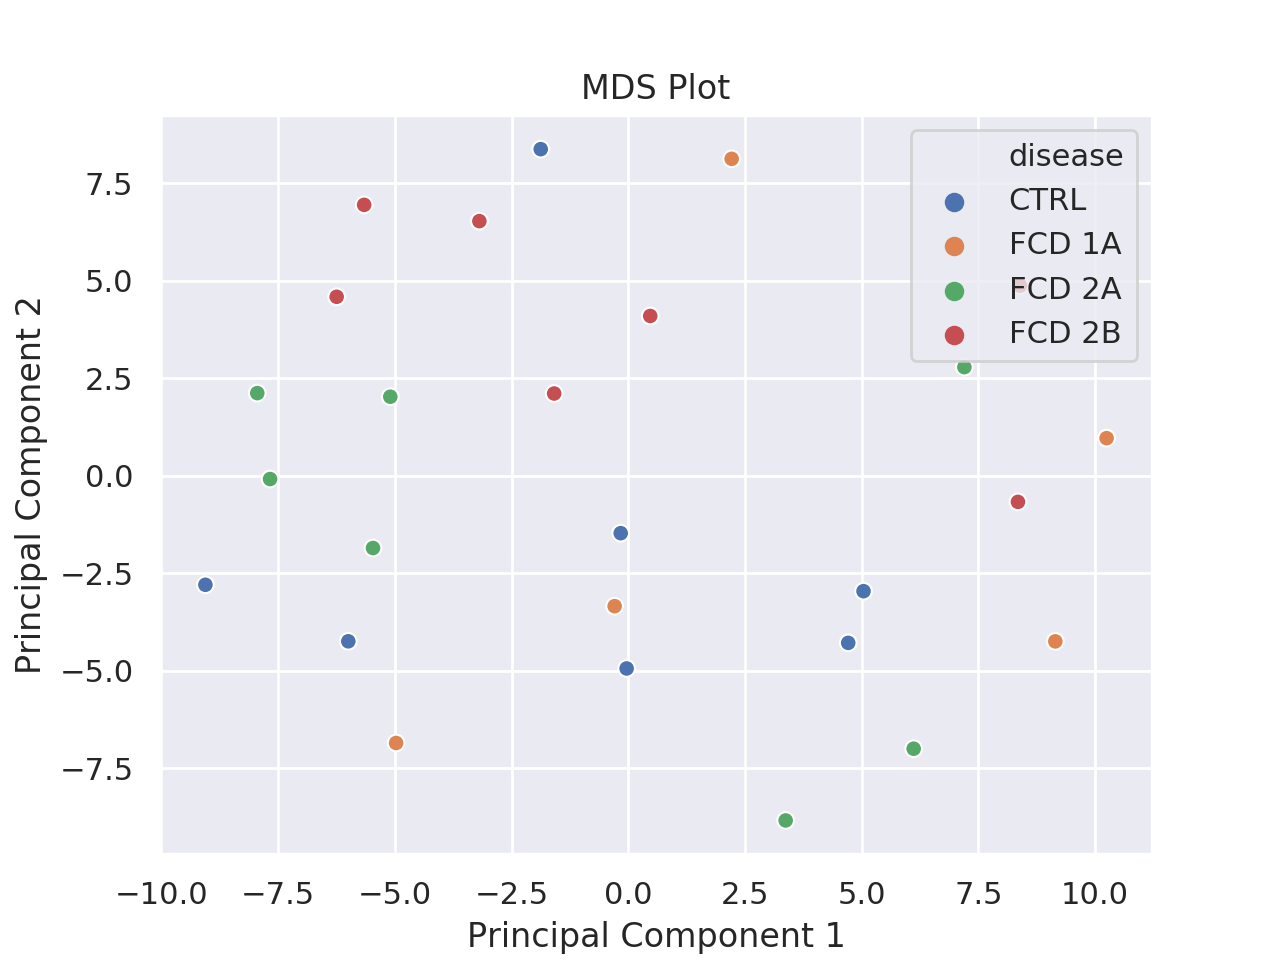

In [20]:
#### MDS plot to see interrelations of the data
#### analysis the loaded RGset and plots the beta values obtained via the getBeta() minfi package function
###dataframe=dataframe,pheno=pandas2ri.ri2py(preproidat.pheno),
%matplotlib notebook
preproidat.plt_mds(top=1000, n_components=2, group='disease', components=(0,1))

<IPython.core.display.Javascript object>


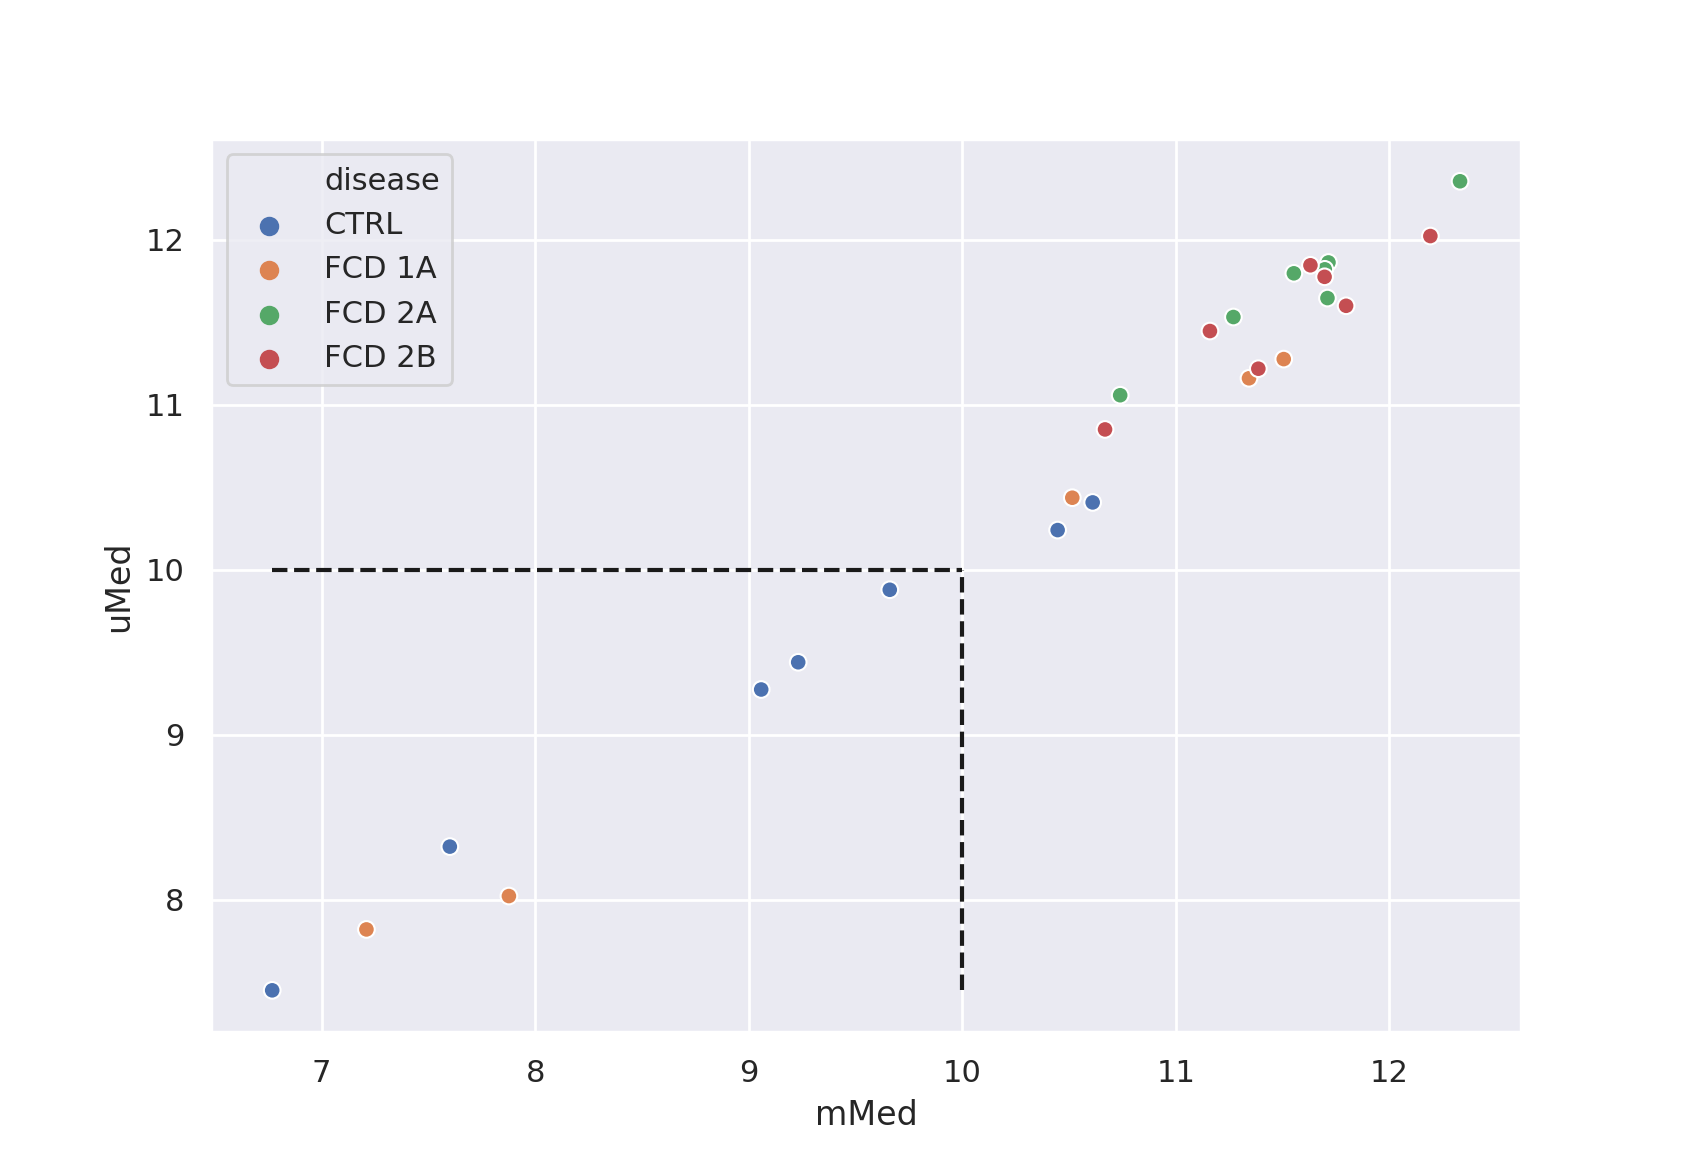

In [52]:
%matplotlib notebook
#thresh=12
preproidat.plt_mu(hue='disease', thresh=10)     

<IPython.core.display.Javascript object>


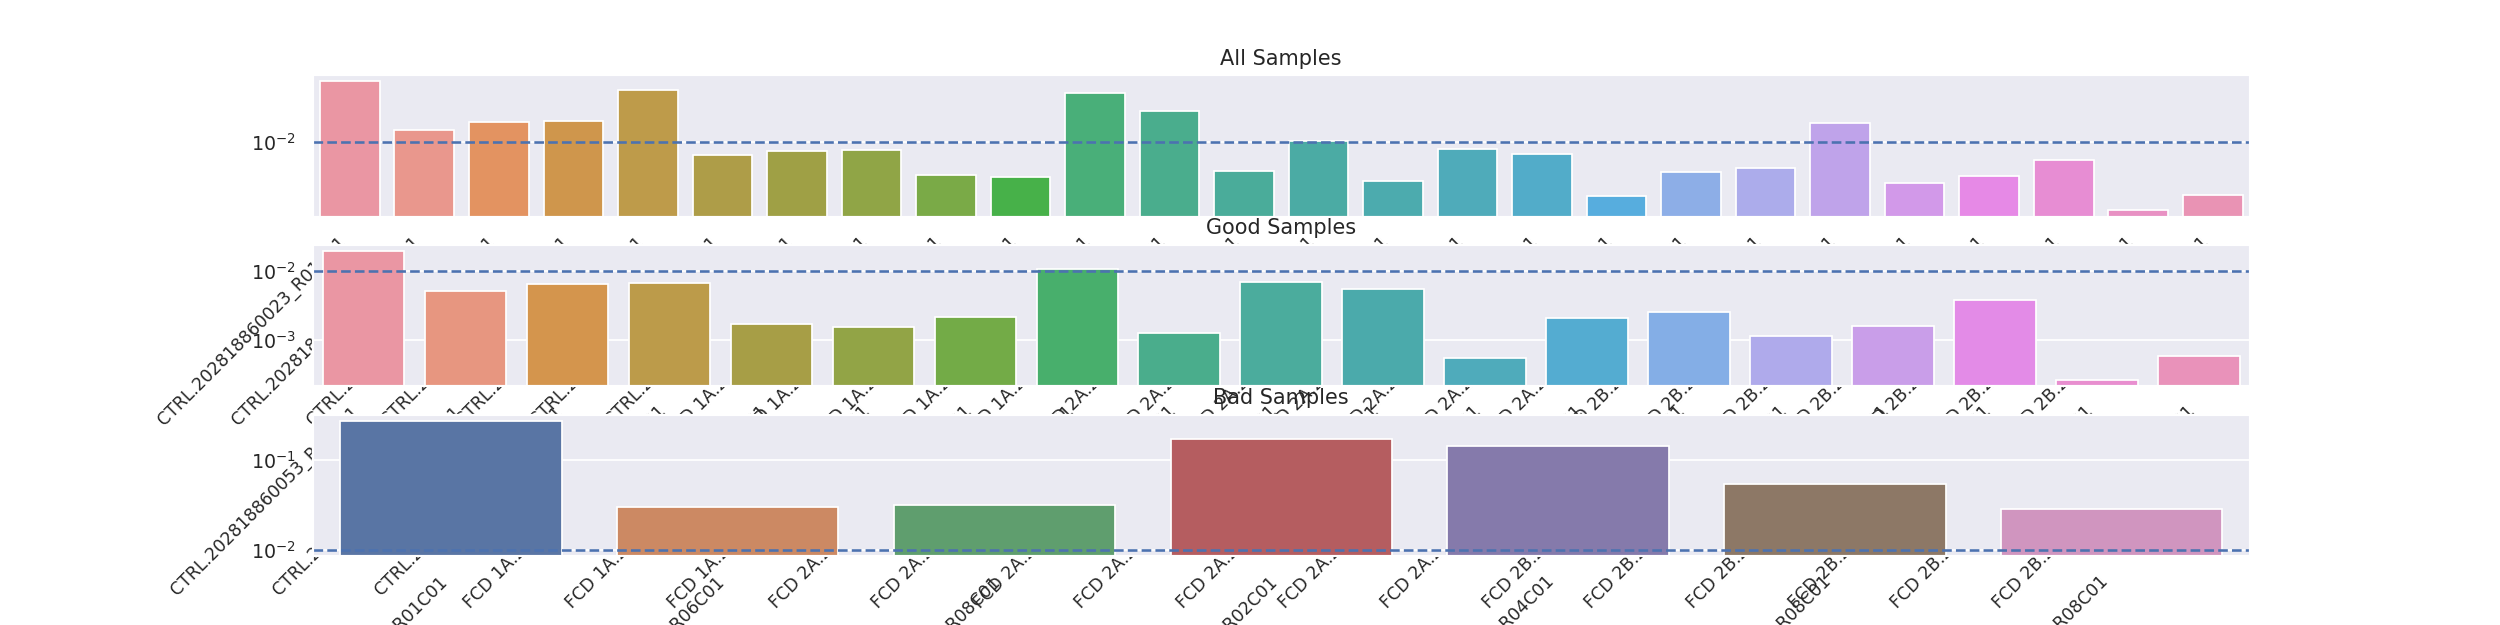

In [94]:
# examine mean detection p-values across all samples to identify any failed samples
%matplotlib notebook
det=preproidat.plt_meandetP(detPcut=0.01, cutsamples=0.1, cutcpgs=0, log_scale=True, plot='all')

In [95]:
### removing poor performing samples####
###--> generating 
preproidat.remove_badsamples(badSampleCutoff=10, detPcut=0.01, cutsamples=0.1, addQC=False, verbose=True)

Found and removed 7 bad samples

  Filtering Detect P value Start

                          
 Failed CpG Fraction.

CTRL.202931510124_R04C01  
          0.029843284

CTRL.202931510124_R06C01  
          0.031807281

FCD 1A.202818860046_R04C01
          0.033548438

FCD 1A.202818860046_R06C01
          0.009223049

FCD 1A.202818860053_R02C01
          0.009800356

FCD 2A.202093110108_R07C01
          0.013096776

FCD 2A.202093110108_R08C01
          0.053903112

FCD 2A.202093110113_R01C01
          0.008568384

FCD 2A.202093110113_R02C01
          0.039054788

FCD 2A.202093110113_R03C01
          0.033480316

FCD 2A.202093110113_R04C01
          0.003960323

FCD 2A.202093110113_R05C01
          0.015013434

FCD 2B.202093110113_R07C01
          0.015421012

FCD 2B.202093110113_R08C01
          0.104427826

FCD 2B.202148010052_R01C01
          0.006620551

FCD 2B.202148010052_R02C01
          0.010339560

FCD 2B.202148010052_R04C01
          0.023201950

FCD 2B.202148010052_R06C01
      

In [96]:
#pd.DataFrame(pandas2ri.ri2py(pheno))
pheno=pd.DataFrame(pandas2ri.ri2py(robjects.r['as'](preproidat.pheno,'data.frame')));pheno

ALTER_Beginn ALTER_OP                                           Basename  \
0             0       13  /home/Deep_Learner/private/network/Methyl_Arra...   
1             0       49  /home/Deep_Learner/private/network/Methyl_Arra...   
2           0.5       11  /home/Deep_Learner/private/network/Methyl_Arra...   
3            10       18  /home/Deep_Learner/private/network/Methyl_Arra...   
4          0.25       11  /home/Deep_Learner/private/network/Methyl_Arra...   
5             3       17  /home/Deep_Learner/private/network/Methyl_Arra...   
6           0.4       45  /home/Deep_Learner/private/network/Methyl_Arra...   
7             9       24  /home/Deep_Learner/private/network/Methyl_Arra...   
8            na       19  /home/Deep_Learner/private/network/Methyl_Arra...   
9           0.6        9  /home/Deep_Learner/private/network/Methyl_Arra...   
10            4       29  /home/Deep_Learner/private/network/Methyl_Arra...   
11           na        1  /home/Deep_Learner/private/network/Methyl_Arra...   
12            4        9  /home/Deep_Learner/private/network/Methyl_Arra...   
13           15       32  /home/Deep_Learner/private/network/Methyl_Arra...   
14           13       43  /home/Deep_Learner/private/network/Methyl_Arra...   
15           na       36  /home/Deep_Learner/private/network/Methyl_Arra...   
16           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   
17           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   

         Batchnum  DAUER       Einsenderdiagnose KLINIK     Lokalisation sex  \
0   b202931510124  13.00           Control - NCx   UKER   temporal - NCx   F   
1   b202931510124  49.00           Control - NCx   UKER   temporal - NCx   F   
2   b202818860046  10.50  FCD 1AHolthausen - NCx    VGT  occipital - NCx   M   
3   b202818860046   8.00  FCD 1AHolthausen - NCx    VGT  occipital - NCx   F   
4   b202818860053  10.75  FCD 1AHolthausen - NCx    VGT  occipital - NCx   M   
5   b202093110108  14.00               FCD 2ADNA   Mara          frontal       
6   b202093110108  44.60               FCD 2ADNA   Mara          frontal       
7   b202093110113  15.00               FCD 2ADNA   Mara          frontal       
8   b202093110113    NaN               FCD 2ADNA   Mara          frontal       
9   b202093110113   8.40               FCD 2ADNA   Mara          frontal       
10  b202093110113  25.00               FCD 2ADNA   UKER          frontal       
11  b202093110113    NaN               FCD 2ADNA    VGT         temporal       
12  b202093110113   5.00              FCD 2B*DNA   Mara               na       
13  b202148010052  17.00              FCD 2B*DNA   Mara          frontal       
14  b202148010052  30.00              FCD 2B*DNA   Mara          frontal       
15  b202148010052    NaN              FCD 2B*DNA   UKER          frontal       
16  b202148010052    NaN              FCD 2B*DNA  other               na       
17  b202148010052    NaN              FCD 2B*DNA  other               na       

           Fallnummer disease             txt_idat                          ID  
0       SN 173/09 III    CTRL  202931510124_R04C01    CTRL.202931510124_R04C01  
1   SN 80/16 (III, I)    CTRL  202931510124_R06C01    CTRL.202931510124_R06C01  
2         705/10 III4  FCD 1A  202818860046_R04C01  FCD 1A.202818860046_R04C01  
3          2132/16 I4  FCD 1A  202818860046_R06C01  FCD 1A.202818860046_R06C01  
4        2183/16 III9  FCD 1A  202818860053_R02C01  FCD 1A.202818860053_R02C01  
5   N1232/15 (159/15)  FCD 2A  202093110108_R07C01  FCD 2A.202093110108_R07C01  
6     N619/15 (79/15)  FCD 2A  202093110108_R08C01  FCD 2A.202093110108_R08C01  
7     N475/15 (53/15)  FCD 2A  202093110113_R01C01  FCD 2A.202093110113_R01C01  
8   N2069/14 (271/14)  FCD 2A  202093110113_R02C01  FCD 2A.202093110113_R02C01  
9   N1170/15 (151/15)  FCD 2A  202093110113_R03C01  FCD 2A.202093110113_R03C01  
10             N78/17  FCD 2A  202093110113_R04C01  FCD 2A.202093110113_R04C01  
11   N69

<IPython.core.display.Javascript object>


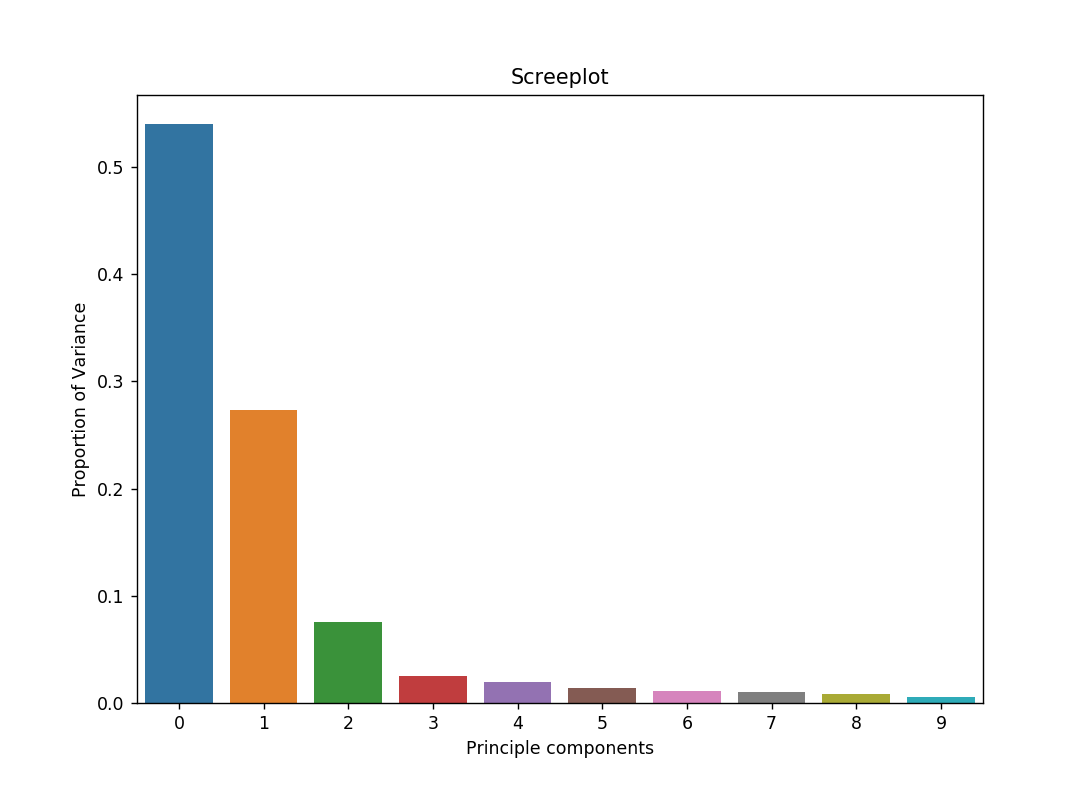

In [12]:
%matplotlib notebook
preproidat.screeplot(RGset=preproidat.RGset, nmax=10)

In [97]:
grset=preproidat.preprocessFunnorm(celltype_adoption=True, use_cell_count2=False, nPCs=6)
grset=preproidat.preprocessQuantile(celltype_adoption=True, use_cell_count2=False)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Combining user data with reference (flow sorted) data.



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Processing user and reference data together.



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[preprocessQuantile] Mapping to genome.


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[preprocessQuantile] Fixing outliers.


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[preprocessQuantile] Quantile normalizing.


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Picking probes for composition estimation.



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Estimat

In [98]:
pheno=pandas2ri.ri2py(robjects.r['as'](preproidat.pheno,'data.frame'));pheno

ALTER_Beginn ALTER_OP                                           Basename  \
0             0       13  /home/Deep_Learner/private/network/Methyl_Arra...   
1             0       49  /home/Deep_Learner/private/network/Methyl_Arra...   
2           0.5       11  /home/Deep_Learner/private/network/Methyl_Arra...   
3            10       18  /home/Deep_Learner/private/network/Methyl_Arra...   
4          0.25       11  /home/Deep_Learner/private/network/Methyl_Arra...   
5             3       17  /home/Deep_Learner/private/network/Methyl_Arra...   
6           0.4       45  /home/Deep_Learner/private/network/Methyl_Arra...   
7             9       24  /home/Deep_Learner/private/network/Methyl_Arra...   
8            na       19  /home/Deep_Learner/private/network/Methyl_Arra...   
9           0.6        9  /home/Deep_Learner/private/network/Methyl_Arra...   
10            4       29  /home/Deep_Learner/private/network/Methyl_Arra...   
11           na        1  /home/Deep_Learner/private/network/Methyl_Arra...   
12            4        9  /home/Deep_Learner/private/network/Methyl_Arra...   
13           15       32  /home/Deep_Learner/private/network/Methyl_Arra...   
14           13       43  /home/Deep_Learner/private/network/Methyl_Arra...   
15           na       36  /home/Deep_Learner/private/network/Methyl_Arra...   
16           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   
17           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   

         Batchnum  DAUER       Einsenderdiagnose KLINIK     Lokalisation sex  \
0   b202931510124  13.00           Control - NCx   UKER   temporal - NCx   F   
1   b202931510124  49.00           Control - NCx   UKER   temporal - NCx   F   
2   b202818860046  10.50  FCD 1AHolthausen - NCx    VGT  occipital - NCx   M   
3   b202818860046   8.00  FCD 1AHolthausen - NCx    VGT  occipital - NCx   F   
4   b202818860053  10.75  FCD 1AHolthausen - NCx    VGT  occipital - NCx   M   
5   b202093110108  14.00               FCD 2ADNA   Mara          frontal       
6   b202093110108  44.60               FCD 2ADNA   Mara          frontal       
7   b202093110113  15.00               FCD 2ADNA   Mara          frontal       
8   b202093110113    NaN               FCD 2ADNA   Mara          frontal       
9   b202093110113   8.40               FCD 2ADNA   Mara          frontal       
10  b202093110113  25.00               FCD 2ADNA   UKER          frontal       
11  b202093110113    NaN               FCD 2ADNA    VGT         temporal       
12  b202093110113   5.00              FCD 2B*DNA   Mara               na       
13  b202148010052  17.00              FCD 2B*DNA   Mara          frontal       
14  b202148010052  30.00              FCD 2B*DNA   Mara          frontal       
15  b202148010052    NaN              FCD 2B*DNA   UKER          frontal       
16  b202148010052    NaN              FCD 2B*DNA  other               na       
17  b202148010052    NaN              FCD 2B*DNA  other               na       

           Fallnummer disease             txt_idat  \
0       SN 173/09 III    CTRL  202931510124_R04C01   
1   SN 80/16 (III, I)    CTRL  202931510124_R06C01   
2         705/10 III4  FCD 1A  202818860046_R04C01   
3          2132/16 I4  FCD 1A  202818860046_R06C01   
4        2183/16 III9  FCD 1A  202818860053_R02C01   
5   N1232/15 (159/15)  FCD 2A  202093110108_R07C01   
6     N619/15 (79/15)  FCD 2A  202093110108_R08C01   
7     N475/15 (53/15)  FCD 2A  202093110113_R01C01   
8   N2069/14 (271/14)  FCD 2A  202093110113_R02C01   
9   N1170/15 (151/15)  FCD 2A  202093110113_R03C01   
10             N78/17  FCD 2A  202093110113_R04C01   
11   N691/04 (ER3649)  FCD 2A  202093110113_R05C01   
12  N1582/15 (212/15)  FCD 2B  202093110113_R07C01   
13             319/13  FCD 2B  202148010052_R01C01   
14   N446/13 (570/13)  FCD 2B  202148010052_R02C01   
15            N904/16  FCD 2B  202148010052_R04C01   
16            N754/09  FCD 2B  202148010052_R06C01   
17   N56

### Probe wise quality control

In [99]:
preproidat.probeFiltering(cutbead=3)

Filtering on number of beads... 

On average
 
0.13
 
% of the probes (
 
1051815
 
) have number of beads below
 
3
 


Filtering on zero intensities... 

On average
 
0.003
 
% of the Type II probes (
 
723910
 
) have Red and/or Green intensity below 1 

On average
 
0.016
 
% of the Type I probes (
 
99908
 
), measured in Green channel, have intensity below 1 

On average
 
0.018
 
% of the Type I probes (
 
184454
 
), measured in Red channel, have intensity below 1 

Set filtered probes in Red and/or Green channels to NA... 



R object with classes: ('RGChannelSet',) mapped to:
<RS4 - Python:0x7fd647b8fac8 / R:0x56434929d948>

In [100]:
pheno=pandas2ri.ri2py(robjects.r['as'](preproidat.pheno,'data.frame'));pheno

ALTER_Beginn ALTER_OP                                           Basename  \
0             0       13  /home/Deep_Learner/private/network/Methyl_Arra...   
1             0       49  /home/Deep_Learner/private/network/Methyl_Arra...   
2           0.5       11  /home/Deep_Learner/private/network/Methyl_Arra...   
3            10       18  /home/Deep_Learner/private/network/Methyl_Arra...   
4          0.25       11  /home/Deep_Learner/private/network/Methyl_Arra...   
5             3       17  /home/Deep_Learner/private/network/Methyl_Arra...   
6           0.4       45  /home/Deep_Learner/private/network/Methyl_Arra...   
7             9       24  /home/Deep_Learner/private/network/Methyl_Arra...   
8            na       19  /home/Deep_Learner/private/network/Methyl_Arra...   
9           0.6        9  /home/Deep_Learner/private/network/Methyl_Arra...   
10            4       29  /home/Deep_Learner/private/network/Methyl_Arra...   
11           na        1  /home/Deep_Learner/private/network/Methyl_Arra...   
12            4        9  /home/Deep_Learner/private/network/Methyl_Arra...   
13           15       32  /home/Deep_Learner/private/network/Methyl_Arra...   
14           13       43  /home/Deep_Learner/private/network/Methyl_Arra...   
15           na       36  /home/Deep_Learner/private/network/Methyl_Arra...   
16           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   
17           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   

         Batchnum  DAUER       Einsenderdiagnose KLINIK     Lokalisation sex  \
0   b202931510124  13.00           Control - NCx   UKER   temporal - NCx   F   
1   b202931510124  49.00           Control - NCx   UKER   temporal - NCx   F   
2   b202818860046  10.50  FCD 1AHolthausen - NCx    VGT  occipital - NCx   M   
3   b202818860046   8.00  FCD 1AHolthausen - NCx    VGT  occipital - NCx   F   
4   b202818860053  10.75  FCD 1AHolthausen - NCx    VGT  occipital - NCx   M   
5   b202093110108  14.00               FCD 2ADNA   Mara          frontal       
6   b202093110108  44.60               FCD 2ADNA   Mara          frontal       
7   b202093110113  15.00               FCD 2ADNA   Mara          frontal       
8   b202093110113    NaN               FCD 2ADNA   Mara          frontal       
9   b202093110113   8.40               FCD 2ADNA   Mara          frontal       
10  b202093110113  25.00               FCD 2ADNA   UKER          frontal       
11  b202093110113    NaN               FCD 2ADNA    VGT         temporal       
12  b202093110113   5.00              FCD 2B*DNA   Mara               na       
13  b202148010052  17.00              FCD 2B*DNA   Mara          frontal       
14  b202148010052  30.00              FCD 2B*DNA   Mara          frontal       
15  b202148010052    NaN              FCD 2B*DNA   UKER          frontal       
16  b202148010052    NaN              FCD 2B*DNA  other               na       
17  b202148010052    NaN              FCD 2B*DNA  other               na       

           Fallnummer disease             txt_idat  \
0       SN 173/09 III    CTRL  202931510124_R04C01   
1   SN 80/16 (III, I)    CTRL  202931510124_R06C01   
2         705/10 III4  FCD 1A  202818860046_R04C01   
3          2132/16 I4  FCD 1A  202818860046_R06C01   
4        2183/16 III9  FCD 1A  202818860053_R02C01   
5   N1232/15 (159/15)  FCD 2A  202093110108_R07C01   
6     N619/15 (79/15)  FCD 2A  202093110108_R08C01   
7     N475/15 (53/15)  FCD 2A  202093110113_R01C01   
8   N2069/14 (271/14)  FCD 2A  202093110113_R02C01   
9   N1170/15 (151/15)  FCD 2A  202093110113_R03C01   
10             N78/17  FCD 2A  202093110113_R04C01   
11   N691/04 (ER3649)  FCD 2A  202093110113_R05C01   
12  N1582/15 (212/15)  FCD 2B  202093110113_R07C01   
13             319/13  FCD 2B  202148010052_R01C01   
14   N446/13 (570/13)  FCD 2B  202148010052_R02C01   
15            N904/16  FCD 2B  202148010052_R04C01   
16            N754/09  FCD 2B  202148010052_R06C01   
17   N56

In [101]:
preproidat.dropLociWithSnps()

R object with classes: ('GenomicRatioSet',) mapped to:
<RS4 - Python:0x7fd64d452088 / R:0x5643567ca6a0>

In [102]:
preproidat.dropSexRelatedProbes()

R object with classes: ('GenomicRatioSet',) mapped to:
<RS4 - Python:0x7fd64d452b48 / R:0x56436a6dfa80>

In [103]:
preproidat.excludeXreactiveprobes(array_type='EPIC')

EPIC
McCartney2016 326267
Zhou2016 178671
Polymorphism 346033
CrossHybridization 108172
BaseColorChange 406
RepeatSequenceElements 0


R object with classes: ('GenomicRatioSet',) mapped to:
<RS4 - Python:0x7fd646eda548 / R:0x56443e3e7468>

In [104]:
mval=preproidat.reduce(preproidat.GRset, preproidat.RGset_filt, what="M", cutp=0.05, cutsamples=0.10, cutcpgs=0.725, verbose=True, autoimpute=True)

Calculate and filter on detection P-value... 

On average
 
6.84
 
% of the CpGs (
 
866091
 
) have detection P-value above the threshold 
 
0.05
 


Transform to 
 
M
 
-values... 

Set +/-Inf to +/-16... 

On average
 
0.14
 
% of the probes (
 
866091
 
) were set to NA in the probe filtering step! 

Calculate success rates and reduce... 

Percentage of samples having success rate above
 
0.1
 
is
 
94.44
 
% 

Percentage of CpGs having success rate above
 
0.725
 
is
 
52.61
 
% 


  Autoimpute Start
    There are 
 
7225362
 
 NAs (failed probes) exists in your data set.
    Impute.knn will be conducted for remain NAs. (NOT suitable for small data sets)



In [105]:
#without removal of cpgs
mval

CTRL.202931510124_R04C01  CTRL.202931510124_R06C01  \
cg18478105                 -3.732195                 -3.790252   
cg14361672                  1.677489                  1.727365   
cg13417420                 -2.468932                 -3.558973   
cg26724186                  2.724237                  2.693353   
cg24133276                 -4.200970                 -3.729101   
...                              ...                       ...   
cg06889756                  1.404560                  0.956985   
cg02455706                 -1.313390                 -0.109076   
cg14585103                  1.596939                  0.902671   
cg10633746                 -3.931778                 -3.980519   
cg12623625                  1.269348                  1.504263   

            FCD 1A.202818860046_R04C01  FCD 1A.202818860046_R06C01  \
cg18478105                   -3.828318                   -3.413876   
cg14361672                    0.393899                    2.391130   
cg13417420                   -3.240622                   -3.688267   
cg26724186                    3.037520                    2.883315   
cg24133276                   -3.504647                   -3.009075   
...                                ...                         ...   
cg06889756                    0.587787                    0.943717   
cg02455706                   -0.693506                   -1.342918   
cg14585103                    1.674867                    1.331213   
cg10633746                   -3.436013                   -2.212963   
cg12623625                    1.421948                    1.514375   

            FCD 2A.202093110108_R07C01  FCD 2A.202093110108_R08C01  \
cg18478105                   -3.633393                   -4.202223   
cg14361672                    1.229260                    1.755988   
cg13417420                   -4.113601                   -3.577258   
cg26724186                    2.979595                    2.326618   
cg24133276                   -3.660748                   -4.464396   
...                                ...                         ...   
cg06889756                    1.362058                    1.760249   
cg02455706                   -0.676178                   -1.271025   
cg14585103                    1.063638                    2.627011   
cg10633746                   -4.166388                   -3.607711   
cg12623625                    1.330927                    1.943645   

            FCD 2A.202093110113_R01C01  FCD 2A.202093110113_R02C01  \
cg18478105                   -3.478261                   -3.674935   
cg14361672                    1.480455                    1.294347   
cg13417420                   -3.025199                   -2.678113   
cg26724186                    2.947580                    2.762689   
cg24133276                   -3.981315                   -3.688773   
...                                ...                         ...   
cg06889756                    1.204999                    1.577511   
cg02455706                   -0.699972                    0.353131   
cg14585103                    1.675223                    1.023705   
cg10633746                   -2.808086                   -4.323375   
cg12623625                    0.946904                    1.490216   

            FCD 2A.202093110113_R03C01  FCD 2A.202093110113_R04C01  \
cg18478105                   -3.163368                   -3.169578   
cg14361672                    0.914019                    2.029601   
cg13417420                   -3.157019                   -3.865789   
cg26724186                    2.616782                    2.744818   
cg24133276                   -3.820179                   -3.028505   
...                                ...                         ...   
cg06889756                    0.988975                    0.837264   
cg02455706                   -0.852795                   -2.667037   
cg14585103                    1.453681                    1.682089

In [106]:
pheno=pd.DataFrame(pandas2ri.ri2py(robjects.r['as'](preproidat.pheno,'data.frame')));pheno

ALTER_Beginn ALTER_OP                                           Basename  \
0             0       13  /home/Deep_Learner/private/network/Methyl_Arra...   
1             0       49  /home/Deep_Learner/private/network/Methyl_Arra...   
2           0.5       11  /home/Deep_Learner/private/network/Methyl_Arra...   
3            10       18  /home/Deep_Learner/private/network/Methyl_Arra...   
4             3       17  /home/Deep_Learner/private/network/Methyl_Arra...   
5           0.4       45  /home/Deep_Learner/private/network/Methyl_Arra...   
6             9       24  /home/Deep_Learner/private/network/Methyl_Arra...   
7            na       19  /home/Deep_Learner/private/network/Methyl_Arra...   
8           0.6        9  /home/Deep_Learner/private/network/Methyl_Arra...   
9             4       29  /home/Deep_Learner/private/network/Methyl_Arra...   
10           na        1  /home/Deep_Learner/private/network/Methyl_Arra...   
11            4        9  /home/Deep_Learner/private/network/Methyl_Arra...   
12           15       32  /home/Deep_Learner/private/network/Methyl_Arra...   
13           13       43  /home/Deep_Learner/private/network/Methyl_Arra...   
14           na       36  /home/Deep_Learner/private/network/Methyl_Arra...   
15           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   
16           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   

         Batchnum  DAUER       Einsenderdiagnose KLINIK     Lokalisation sex  \
0   b202931510124   13.0           Control - NCx   UKER   temporal - NCx   F   
1   b202931510124   49.0           Control - NCx   UKER   temporal - NCx   F   
2   b202818860046   10.5  FCD 1AHolthausen - NCx    VGT  occipital - NCx   M   
3   b202818860046    8.0  FCD 1AHolthausen - NCx    VGT  occipital - NCx   F   
4   b202093110108   14.0               FCD 2ADNA   Mara          frontal       
5   b202093110108   44.6               FCD 2ADNA   Mara          frontal       
6   b202093110113   15.0               FCD 2ADNA   Mara          frontal       
7   b202093110113    NaN               FCD 2ADNA   Mara          frontal       
8   b202093110113    8.4               FCD 2ADNA   Mara          frontal       
9   b202093110113   25.0               FCD 2ADNA   UKER          frontal       
10  b202093110113    NaN               FCD 2ADNA    VGT         temporal       
11  b202093110113    5.0              FCD 2B*DNA   Mara               na       
12  b202148010052   17.0              FCD 2B*DNA   Mara          frontal       
13  b202148010052   30.0              FCD 2B*DNA   Mara          frontal       
14  b202148010052    NaN              FCD 2B*DNA   UKER          frontal       
15  b202148010052    NaN              FCD 2B*DNA  other               na       
16  b202148010052    NaN              FCD 2B*DNA  other               na       

           Fallnummer disease             txt_idat  \
0       SN 173/09 III    CTRL  202931510124_R04C01   
1   SN 80/16 (III, I)    CTRL  202931510124_R06C01   
2         705/10 III4  FCD 1A  202818860046_R04C01   
3          2132/16 I4  FCD 1A  202818860046_R06C01   
4   N1232/15 (159/15)  FCD 2A  202093110108_R07C01   
5     N619/15 (79/15)  FCD 2A  202093110108_R08C01   
6     N475/15 (53/15)  FCD 2A  202093110113_R01C01   
7   N2069/14 (271/14)  FCD 2A  202093110113_R02C01   
8   N1170/15 (151/15)  FCD 2A  202093110113_R03C01   
9              N78/17  FCD 2A  202093110113_R04C01   
10   N691/04 (ER3649)  FCD 2A  202093110113_R05C01   
11  N1582/15 (212/15)  FCD 2B  202093110113_R07C01   
12             319/13  FCD 2B  202148010052_R01C01   
13   N446/13 (570/13)  FCD 2B  202148010052_R02C01   
14            N904/16  FCD 2B  202148010052_R04C01   
15            N754/09  FCD 2B  202148010052_R06C01   
16   N560/09 (ER6050)  FCD 2B  202148010052_R07C01   

                            ID      Glia   Neurons  
0     CTRL.202931510124_R04C01  0.714661  0.597154  
1     CTRL.202931510124_R06C01  0.709764  0.658494  
2   FCD

In [107]:
preproidat.mval_py.isnull().sum()

CTRL.202931510124_R04C01      0
CTRL.202931510124_R06C01      0
FCD 1A.202818860046_R04C01    0
FCD 1A.202818860046_R06C01    0
FCD 2A.202093110108_R07C01    0
FCD 2A.202093110108_R08C01    0
FCD 2A.202093110113_R01C01    0
FCD 2A.202093110113_R02C01    0
FCD 2A.202093110113_R03C01    0
FCD 2A.202093110113_R04C01    0
FCD 2A.202093110113_R05C01    0
FCD 2B.202093110113_R07C01    0
FCD 2B.202148010052_R01C01    0
FCD 2B.202148010052_R02C01    0
FCD 2B.202148010052_R04C01    0
FCD 2B.202148010052_R06C01    0
FCD 2B.202148010052_R07C01    0
dtype: int64

<IPython.core.display.Javascript object>


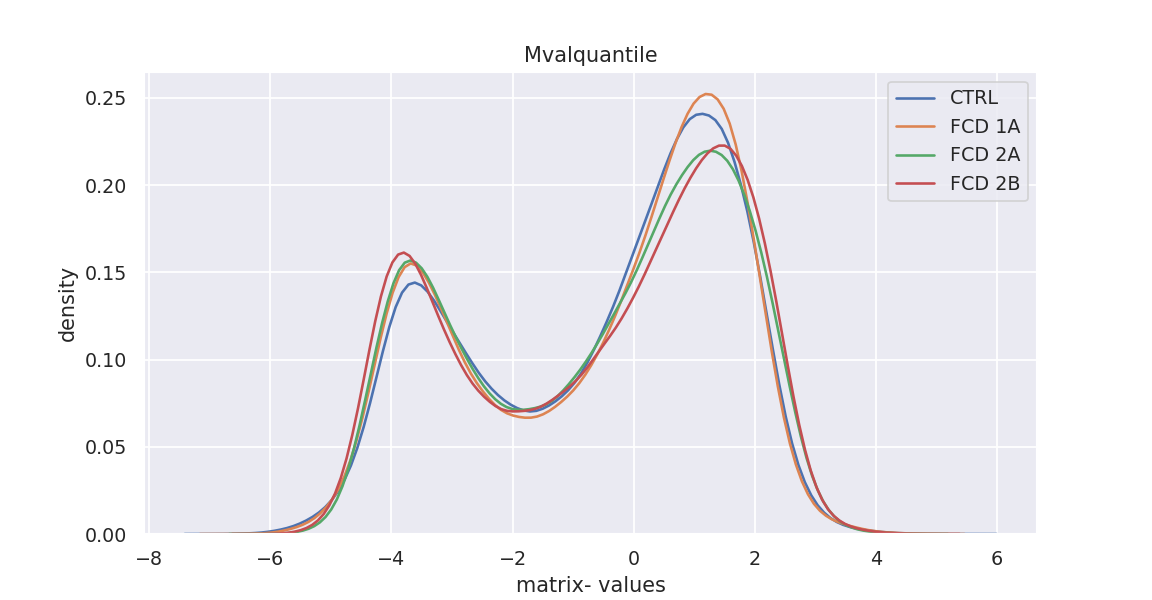

In [108]:
%matplotlib notebook
preproidat.plt_mean_betas({'Mvalquantile':mval}, pheno, 'disease')

<IPython.core.display.Javascript object>


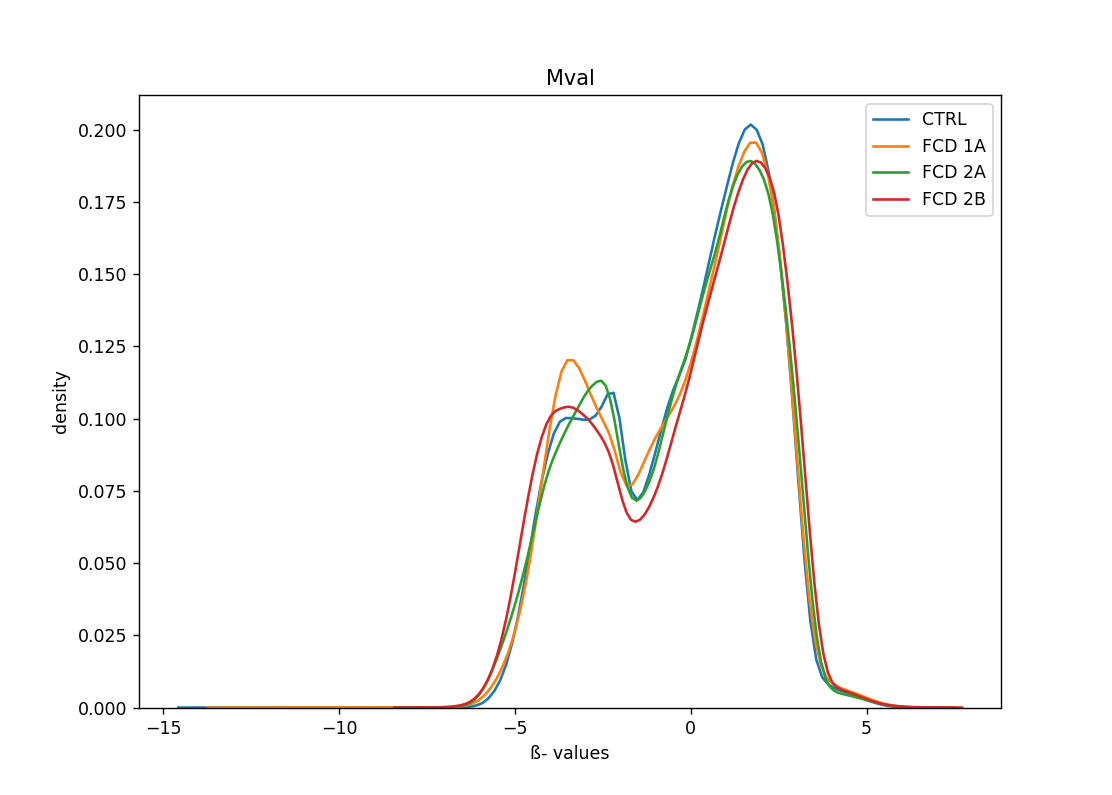

In [21]:
## visualise what the data looks like before and after normalisation
%matplotlib notebook
preproidat.plt_mean_betas({'Mval':mval}, pheno, 'disease')

In [43]:
betaquant = preproidat.compute_betas(preproidat.GRset);betaquant

FCD 2A.N1232/15 (159/15)  FCD 2A.N619/15 (79/15)  \
cg09499020                  0.261830                0.315328   
cg16535257                  0.336010                0.192617   
cg06325811                  0.521460                0.587973   
cg16619049                  0.204498                0.099972   
cg18147296                  0.696581                0.837949   
...                              ...                     ...   
cg27236246                  0.618626                0.533481   
cg05615487                  0.820330                0.785666   
cg22122449                  0.839697                0.843106   
cg08423507                  0.819466                0.724070   
cg19565306                  0.051189                0.066816   

            FCD 2A.N475/15 (53/15)  FCD 2A.N2069/14 (271/14)  \
cg09499020                0.165411                  0.305084   
cg16535257                0.461083                  0.789530   
cg06325811                0.666292                  0.561460   
cg16619049                0.097404                  0.102347   
cg18147296                0.605525                  0.671639   
...                            ...                       ...   
cg27236246                0.582515                  0.633208   
cg05615487                0.862569                  0.851201   
cg22122449                0.855452                  0.886696   
cg08423507                0.826715                  0.725100   
cg19565306                0.049459                  0.075082   

            FCD 2A.N1170/15 (151/15)  FCD 2A.N78/17  FCD 2A.N691/04 (ER3649)  \
cg09499020                  0.370792       0.290131                 0.225317   
cg16535257                  0.458911       0.439704                 0.386033   
cg06325811                  0.590048       0.568092                 0.547280   
cg16619049                  0.162099       0.138150                 0.111567   
cg18147296                  0.721626       0.678063                 0.680158   
...                              ...            ...                      ...   
cg27236246                  0.568429       0.695974                 0.594542   
cg05615487                  0.837810       0.820385                 0.786677   
cg22122449                  0.814312       0.844630                 0.869807   
cg08423507                  0.839382       0.853409                 0.751135   
cg19565306                  0.043073       0.034151                 0.060489   

            FCD 2A.403/11  FCD 2B.N1582/15 (212/15)  FCD 2B.319/13  ...  \
cg09499020       0.242927                  0.274434       0.219394  ...   
cg16535257       0.443680                  0.491474       0.302619  ...   
cg06325811       0.456082                  0.552044       0.527180  ...   
cg16619049       0.154953                  0.261078       0.135110  ...   
cg18147296       0.606862                  0.721013       0.711507  ...   
...                   ...                       ...            ...  ...   
cg27236246       0.710339                  0.667206       0.675177  ...   
cg05615487       0.817728                  0.810677       0.839149  ...   
cg22122449       0.767767                  0.793200       0.832010  ...   
cg08423507       0.809961                  0.817689       0.842942  ...   
cg19565306       0.069240                  0.037066       0.049164  ...   

            mMCD.Erlangen 710/18  mMCD.Erlangen 801/18  mMCD.Erlangen 1908/18  \
cg09499020              0.147740              0.130884               0.122176   
cg16535257              0.161616              0.302915               0.168392   
cg06325811              0.537324              0.540344               0.447587   
cg16619049              0.194985              0.203091               0.104892   
cg18147296              0.654481              0.651150               0.722249   
...                          ...                   ...                    ...   
cg27236246              0.728971             

In [153]:
betaquant.isnull().sum()

N83/03.occipital                         0
N90/04.occipital                         0
N76/04.occipital                         0
N714/05.occipital                        0
N979/06.temp.frontal                     0
                                        ..
N878/15; 114/15 (Bielefeld).temporal     0
N1012/15; 133/15 (Bielefeld).temporal    0
N1151/15; 149/15 (Bielefeld).temporal    0
N1661/15; 218/15 (Bielefeld).temporal    0
N1743/15; 234/15 (Bielefeld).temporal    0
Length: 110, dtype: int64

In [53]:
#betaraw = preproidat.compute_betas(mset=True, rgset=False, grset=False, rset=False);betaraw

FCD IIb.N1582/15 (212/15)  FCD IIb.N1762/15 (240/15)  \
cg18478105                   0.072313                   0.042767   
cg09835024                   0.042483                   0.049866   
cg14361672                   0.731335                   0.812864   
cg01763666                   0.877031                   0.925560   
cg12950382                   0.918824                   0.677145   
...                               ...                        ...   
cg23079522                   0.676043                   0.511010   
cg16818145                   0.779808                   0.778866   
cg14585103                   0.733924                   0.609281   
cg10633746                   0.090072                   0.116811   
cg12623625                   0.755675                   0.714157   

            FCD IIb.(319/13)  FCD IIb.N446/13 (570/13)  FCD IIb.(167/13)  \
cg18478105          0.063919                  0.048335          0.066600   
cg09835024          0.064352                  0.071232          0.134217   
cg14361672          0.796155                  0.826991          0.834521   
cg01763666          0.909329                  0.918178          0.884478   
cg12950382          0.877802                  0.855119          0.881881   
...                      ...                       ...               ...   
cg23079522          0.647907                  0.584406          0.633548   
cg16818145          0.769968                  0.746333          0.782587   
cg14585103          0.767838                  0.743504          0.740791   
cg10633746          0.040985                  0.042036          0.046779   
cg12623625          0.735914                  0.627159          0.684600   

            FCD IIb.N904/16  FCD IIb.N754/09  FCD IIb.N560/09 (ER6050)  \
cg18478105         0.091513         0.052707                  0.072003   
cg09835024         0.115662         0.051214                  0.098579   
cg14361672         0.839823         0.697830                  0.831168   
cg01763666         0.822243         0.863362                  0.827399   
cg12950382         0.896612         0.808001                  0.852762   
...                     ...              ...                       ...   
cg23079522         0.570722         0.686131                  0.733818   
cg16818145         0.708566         0.804865                  0.777701   
cg14585103         0.553722         0.810892                  0.837763   
cg10633746         0.074407         0.077050                  0.070854   
cg12623625         0.759963         0.688452                  0.708230   

            FCD IIb.1224/15 I5  FCD IIb.884/13 2  ...  \
cg18478105            0.039761          0.152363  ...   
cg09835024            0.038434          0.501825  ...   
cg14361672            0.749079          0.614167  ...   
cg01763666            0.904139          0.684746  ...   
cg12950382            0.822433          0.635153  ...   
...                        ...               ...  ...   
cg23079522            0.791759          0.412214  ...   
cg16818145            0.789338          0.780359  ...   
cg14585103            0.711620          0.413613  ...   
cg10633746            0.116121          0.185185  ...   
cg12623625            0.819634          0.847561  ...   

            TLE/CTRL.N85/15; 8/15 (Bielefeld)  \
cg18478105                           0.069997   
cg09835024                           0.082906   
cg14361672                           0.799799   
cg01763666                           0.856760   
cg12950382                           0.812958   
...                                       ...   
cg23079522                           0.708216   
cg16818145                           0.723249   
cg14585103                           0.785974   
cg10633746                           0.051403   
cg12623625                           0.668682   

            TLE/CTRL.N100/15; 9/15 (Bielefeld)  \
cg18478105                            0.075784   
cg09835024         

In [54]:
#mval_raw=preproidat.compute_mvals(mset=True, rgset=False, grset=False, rset=False);mval_raw

FCD IIb.N1582/15 (212/15)  FCD IIb.N1762/15 (240/15)  \
cg18478105                  -3.681313                  -4.484294   
cg09835024                  -4.494358                  -4.252014   
cg14361672                   1.444724                   2.118929   
cg01763666                   2.834340                   3.636183   
cg12950382                   3.500660                   1.068580   
...                               ...                        ...   
cg23079522                   1.061311                   0.063546   
cg16818145                   1.824353                   1.816456   
cg14585103                   1.463792                   0.640975   
cg10633746                  -3.336595                  -2.918550   
cg12623625                   1.628964                   1.321022   

            FCD IIb.(319/13)  FCD IIb.N446/13 (570/13)  FCD IIb.(167/13)  \
cg18478105         -3.872327                 -4.299318         -3.808890   
cg09835024         -3.861901                 -3.704720         -2.689433   
cg14361672          1.965577                  2.257022          2.334305   
cg01763666          3.326095                  3.488219          2.936664   
cg12950382          2.844680                  2.561262          2.900338   
...                      ...                       ...               ...   
cg23079522          0.879831                  0.491796          0.789832   
cg16818145          1.742964                  1.556882          1.847810   
cg14585103          1.725666                  1.535405          1.514953   
cg10633746         -4.548397                 -4.510274         -4.348866   
cg12623625          1.478527                  0.750273          1.118082   

            FCD IIb.N904/16  FCD IIb.N754/09  FCD IIb.N560/09 (ER6050)  \
cg18478105        -3.311410        -4.167751                 -3.687985   
cg09835024        -2.934683        -4.211482                 -3.192855   
cg14361672         2.390421         1.207514                  2.299551   
cg01763666         2.209662         2.659601                  2.261143   
cg12950382         3.116417         2.073259                  2.533998   
...                     ...              ...                       ...   
cg23079522         0.410876         1.128324                  1.463007   
cg16818145         1.281736         2.044277                  1.806716   
cg14585103         0.311219         2.100295                  2.368434   
cg10633746        -3.636875        -3.582378                 -3.712985   
cg12623625         1.662674         1.143900                  1.279384   

            FCD IIb.1224/15 I5  FCD IIb.884/13 2  ...  \
cg18478105           -4.593985         -2.475939  ...   
cg09835024           -4.644918          0.010531  ...   
cg14361672            1.577886          0.670652  ...   
cg01763666            3.237527          1.119053  ...   
cg12950382            2.211537          0.799813  ...   
...                        ...               ...  ...   
cg23079522            1.926811         -0.511899  ...   
cg16818145            1.905714          1.828995  ...   
cg14585103            1.303132         -0.503574  ...   
cg10633746           -2.928223         -2.137504  ...   
cg12623625            2.184051          2.475085  ...   

            TLE/CTRL.N85/15; 8/15 (Bielefeld)  \
cg18478105                          -3.731868   
cg09835024                          -3.467524   
cg14361672                           1.998191   
cg01763666                           2.580453   
cg12950382                           2.119817   
...                                       ...   
cg23079522                           1.279291   
cg16818145                           1.385905   
cg14585103                           1.876696   
cg10633746                          -4.205873   
cg12623625                           1.013103   

            TLE/CTRL.N100/15; 9/15 (Bielefeld)  \
cg18478105                           -3.608272   
cg09835024         

In [268]:
#pandas2ri.ri2py(robjects.r['as'](preproidat.pheno,'data.frame'))

Basename       Batchnum  \
0   /home/Deep_Learner/private/network/Methyl_Arra...  b202093110108   
1   /home/Deep_Learner/private/network/Methyl_Arra...  b202093110108   
2   /home/Deep_Learner/private/network/Methyl_Arra...  b202093110113   
3   /home/Deep_Learner/private/network/Methyl_Arra...  b202093110113   
4   /home/Deep_Learner/private/network/Methyl_Arra...  b202093110113   
..                                                ...            ...   
68  /home/Deep_Learner/private/network/Methyl_Arra...  b202148010058   
69  /home/Deep_Learner/private/network/Methyl_Arra...  b202148010059   
70  /home/Deep_Learner/private/network/Methyl_Arra...  b202148010059   
71  /home/Deep_Learner/private/network/Methyl_Arra...  b202148010059   
72  /home/Deep_Learner/private/network/Methyl_Arra...  b202148010059   

         Center Lokalisation                        Sample   age   disease  \
0      Erlangen      frontal             N1232/15 (159/15)   7.0   FCD IIa   
1      Erlangen      frontal               N619/15 (79/15)  46.0   FCD IIa   
2          Mara      frontal               N475/15 (53/15)  25.0   FCD IIa   
3          Mara      frontal             N2069/14 (271/14)  19.0   FCD IIa   
4          Mara      frontal             N1170/15 (151/15)   9.0   FCD IIa   
..          ...          ...                           ...   ...       ...   
68  NP-Erlangen     temporal   N878/15; 114/15 (Bielefeld)   NaN  TLE/CTRL   
69  NP-Erlangen     temporal  N1012/15; 133/15 (Bielefeld)   NaN  TLE/CTRL   
70  NP-Erlangen     temporal  N1151/15; 149/15 (Bielefeld)   NaN  TLE/CTRL   
71  NP-Erlangen     temporal  N1661/15; 218/15 (Bielefeld)   NaN  TLE/CTRL   
72  NP-Erlangen     temporal  N1743/15; 234/15 (Bielefeld)   NaN  TLE/CTRL   

   sex                                     ID      Glia   Neurons  
0    M              FCD IIa.N1232/15 (159/15)  0.790431  0.391322  
1    F                FCD IIa.N619/15 (79/15)  0.790213  0.442336  
2    M                FCD IIa.N475/15 (53/15)  0.784818  0.400917  
3    F              FCD IIa.N2069/14 (271/14)  0.703880  0.557342  
4    F              FCD IIa.N1170/15 (151/15)  0.760718  0.468058  
..  ..                                    ...       ...       ...  
68       TLE/CTRL.N878/15; 114/15 (Bielefeld)  0.691380  0.583619  
69      TLE/CTRL.N1012/15; 133/15 (Bielefeld)  0.633091  0.603780  
70      TLE/CTRL.N1151/15; 149/15 (Bielefeld)  0.686754  0.540686  
71      TLE/CTRL.N1661/15; 218/15 (Bielefeld)  0.676096  0.558706  
72      TLE/CTRL.N1743/15; 234/15 (Bielefeld)  0.717057  0.528690  

[73 rows x 11 columns]

In [97]:
#pheno=pheno[pheno['ID'].isin(betaquant.columns.tolist())].reset_index(drop=True);pheno

Basename             txt_idat  \
0   /home/Deep_Learner/private/network/Methyl_Arra...  202093110108_R07C01   
1   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R01C01   
2   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R02C01   
3   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R04C01   
4   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R05C01   
..                                                ...                  ...   
72  /home/Deep_Learner/private/network/Methyl_Arra...  203220070086_R04C01   
73  /home/Deep_Learner/private/network/Methyl_Arra...  203220070086_R05C01   
74  /home/Deep_Learner/private/network/Methyl_Arra...  203220070086_R06C01   
75  /home/Deep_Learner/private/network/Methyl_Arra...  203220070086_R07C01   
76  /home/Deep_Learner/private/network/Methyl_Arra...  203220070086_R08C01   

   Lokalisation  disease             Sample    Center sex  age  \
0       frontal  FCD IIa  N1232/15 (159/15)  Erlangen   M    7   
1       frontal  FCD IIa    N475/15 (53/15)      Mara   M   25   
2       frontal  FCD IIa  N2069/14 (271/14)      Mara   F   19   
3       frontal  FCD IIa             N78/17  Erlangen   M   29   
4      temporal  FCD IIa   N691/04 (ER3649)       VGT   F    1   
..          ...      ...                ...       ...  ..  ...   
72      frontal      TSC         2174/14 IV      Mara   M    3   
73     temporal      TSC         1439/14 I1       VGT   M   15   
74     temporal      TSC          699/16 I1      Mara   F    2   
75      frontal      TSC        1467/16 III      Mara   M    1   
76      frontal      TSC          1061/17 7      Mara   F    3   

                           ID      batchnum  
0   FCD IIa.N1232/15 (159/15)  202093110108  
1     FCD IIa.N475/15 (53/15)  202093110113  
2   FCD IIa.N2069/14 (271/14)  202093110113  
3              FCD IIa.N78/17  202093110113  
4    FCD IIa.N691/04 (ER3649)  202093110113  
..                        ...           ...  
72             TSC.2174/14 IV  203220070086  
73             TSC.1439/14 I1  203220070086  
74              TSC.699/16 I1  203220070086  
75            TSC.1467/16 III  203220070086  
76              TSC.1061/17 7  203220070086  

[77 rows x 10 columns]

<IPython.core.display.Javascript object>


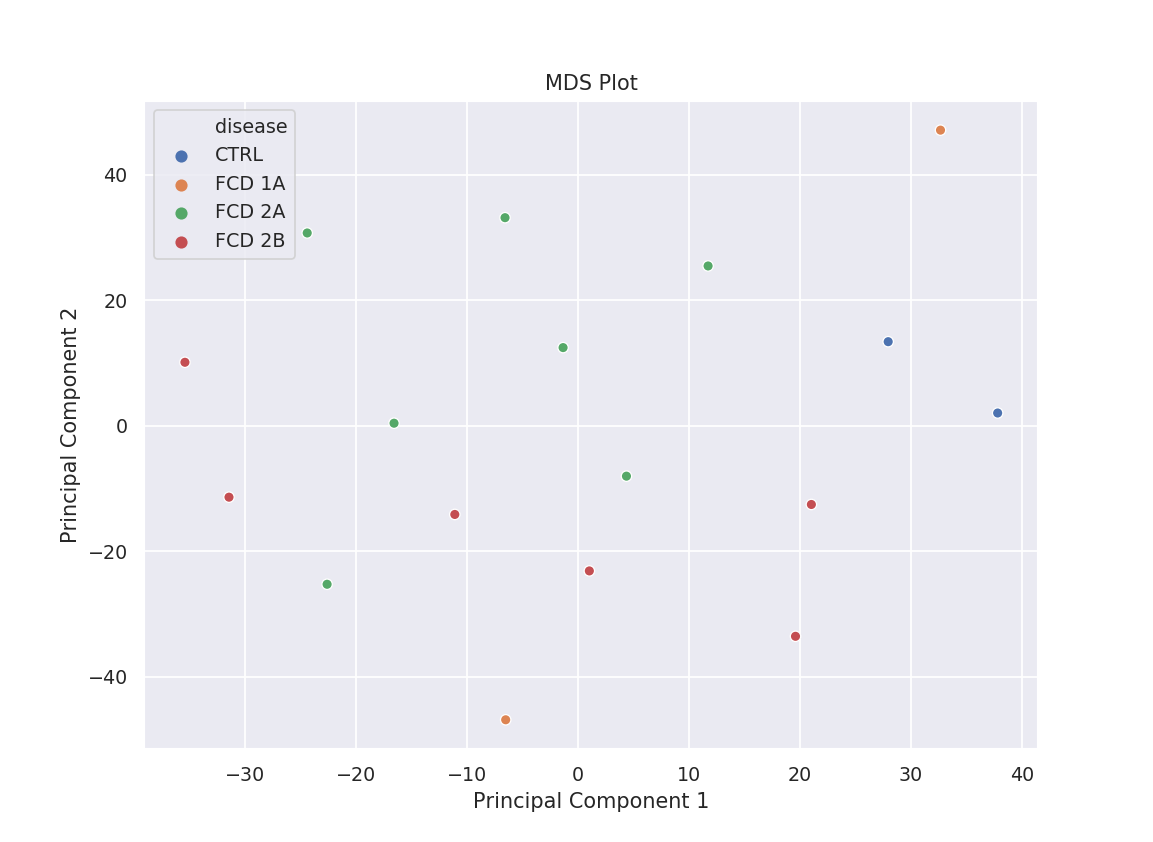

In [109]:
%matplotlib notebook
preproidat.plt_mds(dataframe=mval, pheno=pheno, n_components=2, group='disease', components=(0,1)) 

<IPython.core.display.Javascript object>


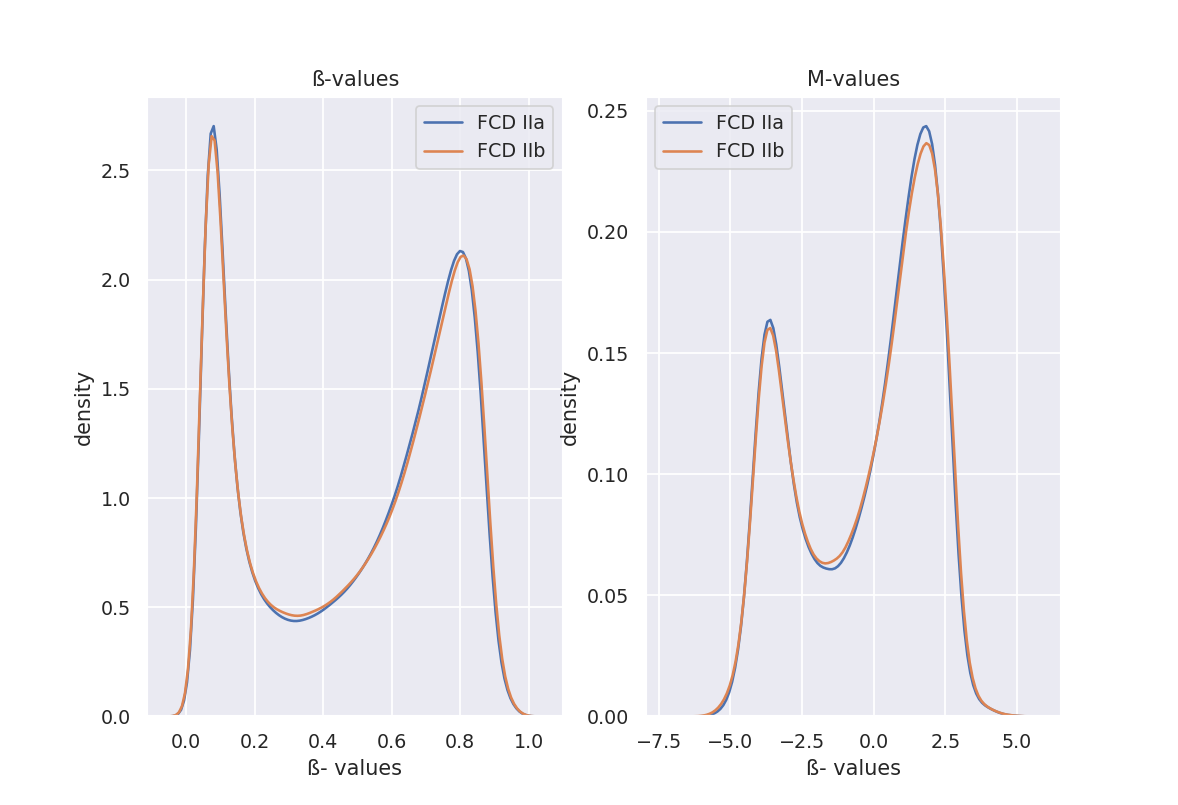

In [63]:
%matplotlib notebook
preproidat.plt_mean_betas(betas={'ß-values':betaquant, 'M-values':mval_quant}, pheno=pheno, group='disease')

<IPython.core.display.Javascript object>


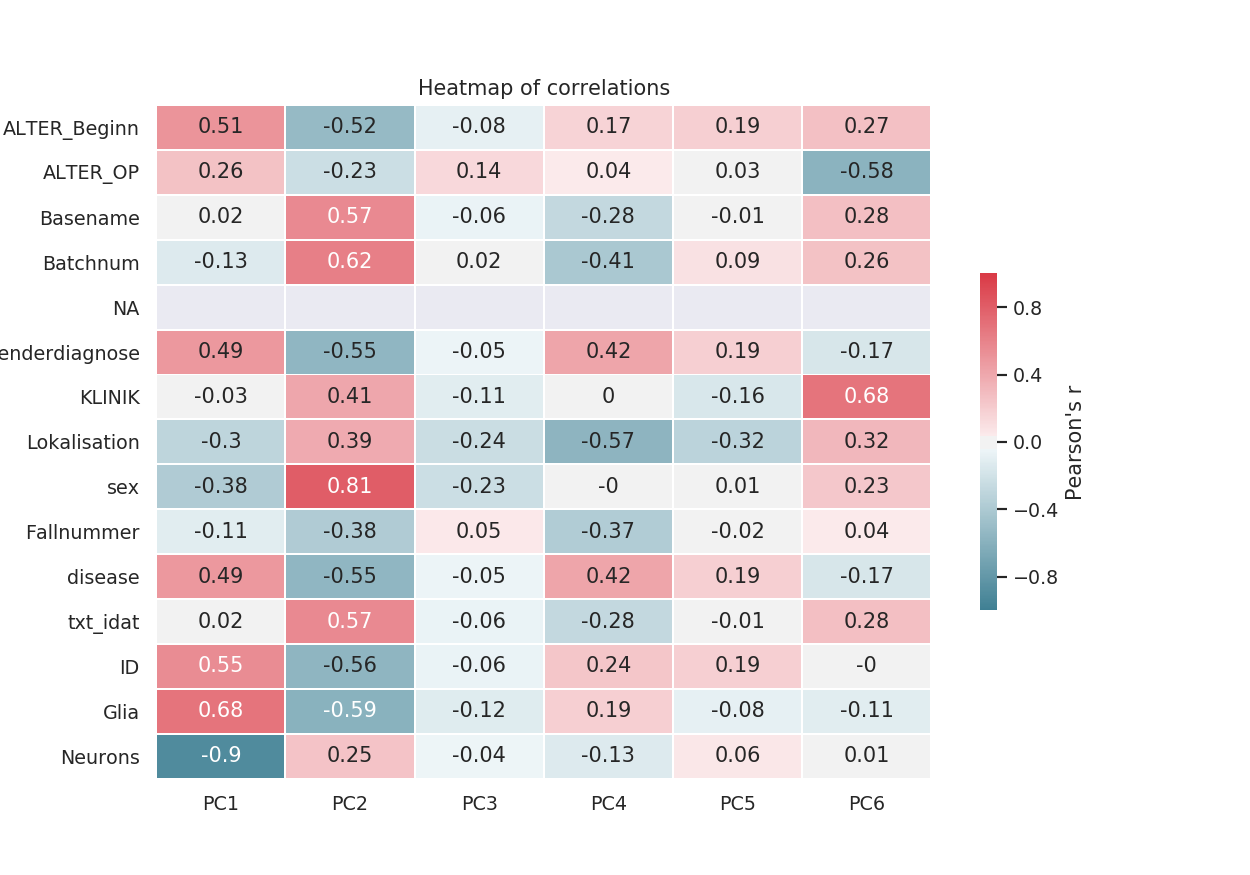

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:972: RuntimeWarning:

invalid value encountered in subtract



In [110]:
%matplotlib notebook
preproidat.plt_covariates(matrix=preproidat.mval, pheno=preproidat.pheno, pcs=6)

In [ ]:
preproidat.dmp_finder(M_val=preproidat.mval, 
                     pheno=preproidat.pheno, 
                     phenotype='disease',
                     adjust_vars=['Batchnum'], 
                     number=1000, 
                     pvalue=0.05, 
                     adjpval=1,
                     save_csv=False,
                     path=None)

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



These are the possible pairwise groups for your comparisons 
 {1: 'CTRL-FCD 1A', 2: 'CTRL-FCD 2A', 3: 'CTRL-FCD 2B', 4: 'FCD 1A-FCD 2A', 5: 'FCD 1A-FCD 2B', 6: 'FCD 2A-FCD 2B'}
Enter your comparison of choice;- to get all comparisons type "all":
all
you selected all
You are adjusting for these variables: ['Batchnum']


In [174]:
len(preproidat.dmps)

3950

In [175]:
preproidat.dectest

CTRL-FCD.1A  CTRL-FCD.2A  CTRL-FCD.2B  FCD.1A-FCD.2A  FCD.1A-FCD.2B  \
Down          937.0        566.0       4445.0          586.0         5148.0   
NotSig     454061.0     454008.0     442487.0       454494.0       444790.0   
Up            658.0       1082.0       8724.0          576.0         5718.0   

        FCD.2A-FCD.2B  
Down             13.0  
NotSig       455636.0  
Up                7.0

In [176]:
betaquant_10000=mval.loc[preproidat.dmps]; betaquant_10000

CTRL.202931510124_R04C01  CTRL.202931510124_R06C01  \
cg00516639                 -5.246900                 -4.728897   
cg25046432                  1.982741                  2.878099   
cg23416667                 -5.083881                 -5.431521   
cg03143105                 -5.471465                 -5.308750   
cg06912515                 -4.927801                 -5.625605   
...                              ...                       ...   
cg03044157                  0.401520                  0.229711   
cg23021551                 -4.100098                 -4.184694   
cg01884997                  1.528068                  1.156076   
cg24729690                 -2.717933                 -2.466087   
cg21417192                 -3.958336                 -4.315906   

            FCD 1A.202818860046_R04C01  FCD 1A.202818860046_R06C01  \
cg00516639                   -3.964844                   -0.204030   
cg25046432                    1.921851                   -2.658035   
cg23416667                   -4.958332                   -0.895573   
cg03143105                   -4.703821                   -1.578476   
cg06912515                   -4.944790                   -0.613924   
...                                ...                         ...   
cg03044157                    0.071380                    0.652269   
cg23021551                   -4.347620                   -3.742311   
cg01884997                    1.631635                    1.721621   
cg24729690                   -2.379870                   -2.337530   
cg21417192                   -4.536797                   -4.172594   

            FCD 2A.202093110108_R07C01  FCD 2A.202093110108_R08C01  \
cg00516639                   -3.787971                   -4.022476   
cg25046432                    1.787245                    2.250017   
cg23416667                   -4.699401                   -5.050814   
cg03143105                   -4.553471                   -4.625157   
cg06912515                   -4.519542                   -5.291422   
...                                ...                         ...   
cg03044157                    0.092995                    0.524406   
cg23021551                   -4.612515                   -4.994072   
cg01884997                    1.165981                    1.496364   
cg24729690                   -2.128794                   -2.186850   
cg21417192                   -4.023617                   -3.607157   

            FCD 2A.202093110113_R01C01  FCD 2A.202093110113_R02C01  \
cg00516639                   -3.815578                   -4.358485   
cg25046432                    1.935072                    2.263012   
cg23416667                   -4.767180                   -4.678443   
cg03143105                   -4.744248                   -4.515548   
cg06912515                   -4.375321                   -5.239069   
...                                ...                         ...   
cg03044157                   -0.387487                    0.366537   
cg23021551                   -4.942966                   -4.700584   
cg01884997                    1.246111                    1.715337   
cg24729690                   -2.899686                   -1.910553   
cg21417192                   -4.026121                   -3.539368   

            FCD 2A.202093110113_R03C01  FCD 2A.202093110113_R04C01  \
cg00516639                   -4.220464                   -3.741121   
cg25046432                    1.915196                    1.897441   
cg23416667                   -4.549649                   -4.163969   
cg03143105                   -4.676112                   -4.104257   
cg06912515                   -4.260177                   -4.560887   
...                                ...                         ...   
cg03044157                    0.391417                    0.404037   
cg23021551                   -4.553126                   -4.133662   
cg01884997                    1.243440                    1.426460

In [177]:
pheno

ALTER_Beginn ALTER_OP                                           Basename  \
0             0       13  /home/Deep_Learner/private/network/Methyl_Arra...   
1             0       49  /home/Deep_Learner/private/network/Methyl_Arra...   
2           0.5       11  /home/Deep_Learner/private/network/Methyl_Arra...   
3            10       18  /home/Deep_Learner/private/network/Methyl_Arra...   
4             3       17  /home/Deep_Learner/private/network/Methyl_Arra...   
5           0.4       45  /home/Deep_Learner/private/network/Methyl_Arra...   
6             9       24  /home/Deep_Learner/private/network/Methyl_Arra...   
7            na       19  /home/Deep_Learner/private/network/Methyl_Arra...   
8           0.6        9  /home/Deep_Learner/private/network/Methyl_Arra...   
9             4       29  /home/Deep_Learner/private/network/Methyl_Arra...   
10           na        1  /home/Deep_Learner/private/network/Methyl_Arra...   
11            4        9  /home/Deep_Learner/private/network/Methyl_Arra...   
12           15       32  /home/Deep_Learner/private/network/Methyl_Arra...   
13           13       43  /home/Deep_Learner/private/network/Methyl_Arra...   
14           na       36  /home/Deep_Learner/private/network/Methyl_Arra...   
15           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   
16           na       na  /home/Deep_Learner/private/network/Methyl_Arra...   

         Batchnum  DAUER       Einsenderdiagnose KLINIK     Lokalisation sex  \
0   b202931510124   13.0           Control - NCx   UKER   temporal - NCx   F   
1   b202931510124   49.0           Control - NCx   UKER   temporal - NCx   F   
2   b202818860046   10.5  FCD 1AHolthausen - NCx    VGT  occipital - NCx   M   
3   b202818860046    8.0  FCD 1AHolthausen - NCx    VGT  occipital - NCx   F   
4   b202093110108   14.0               FCD 2ADNA   Mara          frontal       
5   b202093110108   44.6               FCD 2ADNA   Mara          frontal       
6   b202093110113   15.0               FCD 2ADNA   Mara          frontal       
7   b202093110113    NaN               FCD 2ADNA   Mara          frontal       
8   b202093110113    8.4               FCD 2ADNA   Mara          frontal       
9   b202093110113   25.0               FCD 2ADNA   UKER          frontal       
10  b202093110113    NaN               FCD 2ADNA    VGT         temporal       
11  b202093110113    5.0              FCD 2B*DNA   Mara               na       
12  b202148010052   17.0              FCD 2B*DNA   Mara          frontal       
13  b202148010052   30.0              FCD 2B*DNA   Mara          frontal       
14  b202148010052    NaN              FCD 2B*DNA   UKER          frontal       
15  b202148010052    NaN              FCD 2B*DNA  other               na       
16  b202148010052    NaN              FCD 2B*DNA  other               na       

           Fallnummer disease             txt_idat  \
0       SN 173/09 III    CTRL  202931510124_R04C01   
1   SN 80/16 (III, I)    CTRL  202931510124_R06C01   
2         705/10 III4  FCD 1A  202818860046_R04C01   
3          2132/16 I4  FCD 1A  202818860046_R06C01   
4   N1232/15 (159/15)  FCD 2A  202093110108_R07C01   
5     N619/15 (79/15)  FCD 2A  202093110108_R08C01   
6     N475/15 (53/15)  FCD 2A  202093110113_R01C01   
7   N2069/14 (271/14)  FCD 2A  202093110113_R02C01   
8   N1170/15 (151/15)  FCD 2A  202093110113_R03C01   
9              N78/17  FCD 2A  202093110113_R04C01   
10   N691/04 (ER3649)  FCD 2A  202093110113_R05C01   
11  N1582/15 (212/15)  FCD 2B  202093110113_R07C01   
12             319/13  FCD 2B  202148010052_R01C01   
13   N446/13 (570/13)  FCD 2B  202148010052_R02C01   
14            N904/16  FCD 2B  202148010052_R04C01   
15            N754/09  FCD 2B  202148010052_R06C01   
16   N560/09 (ER6050)  FCD 2B  202148010052_R07C01   

                            ID      Glia   Neurons  
0     CTRL.202931510124_R04C01  0.714661  0.597154  
1     CTRL.202931510124_R06C01  0.709764  0.658494  
2   FCD

<IPython.core.display.Javascript object>


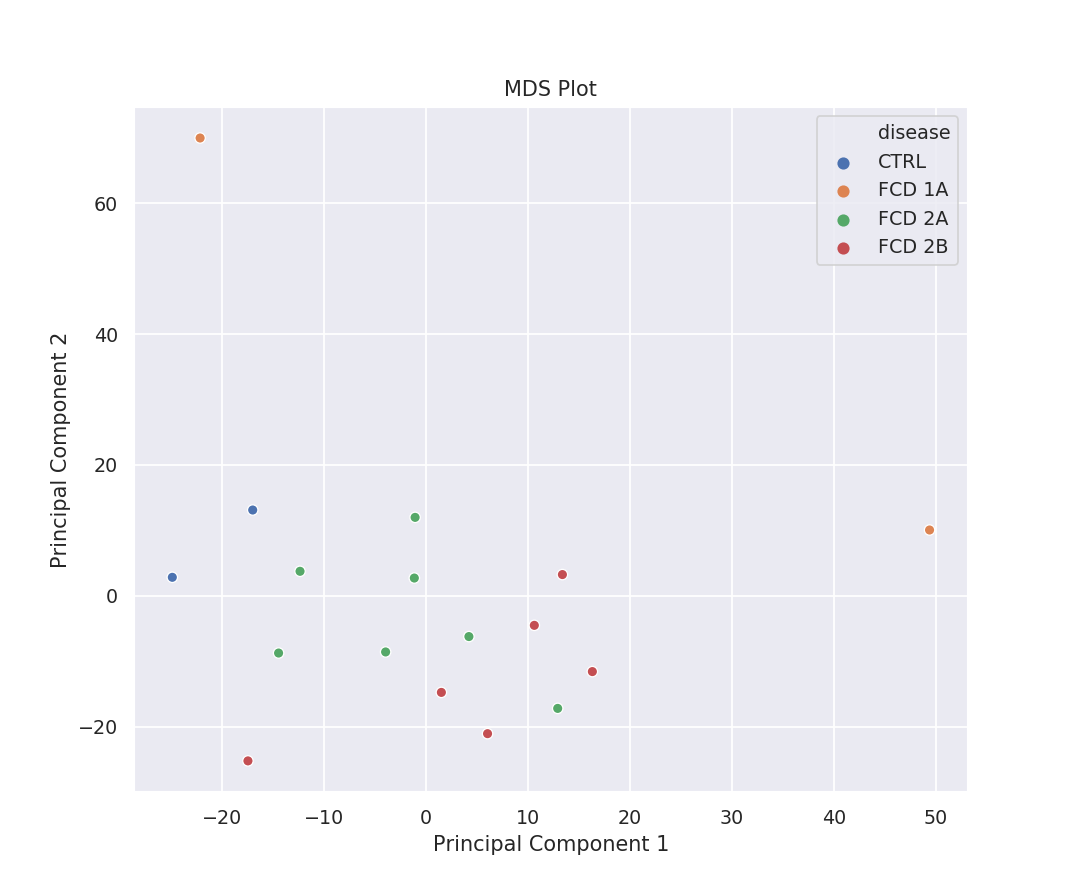

In [178]:
####quantile
%matplotlib notebook
preproidat.plt_mds(betaquant_10000, pheno, n_components=2, group='disease', components=(0,1)) 

<IPython.core.display.Javascript object>


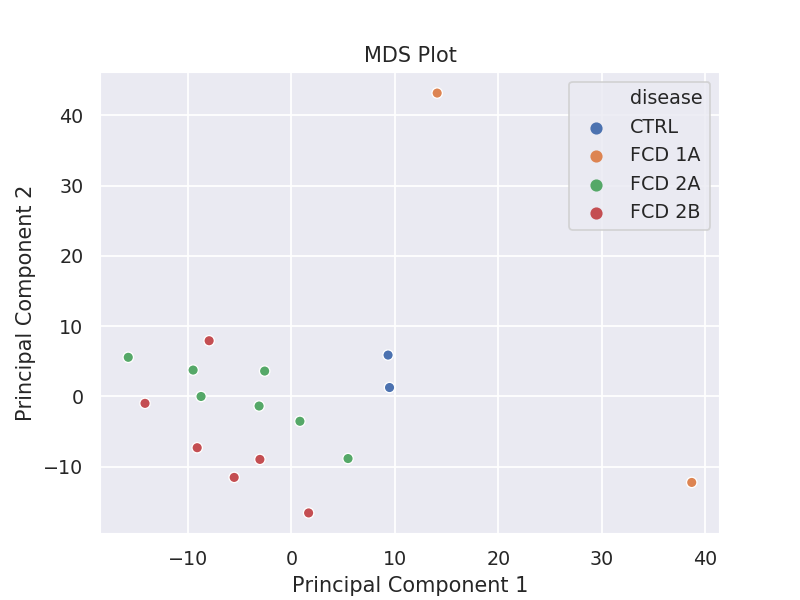

In [79]:
%matplotlib notebook
preproidat.plt_mds(betaquant_10000, pheno, n_components=2, group='disease', components=(0,1)) 

In [179]:
import umap
from sklearn.preprocessing import LabelEncoder
import time
time_start = time.time()

mapper = umap.UMAP(n_neighbors=17,
                      min_dist=0.0,
                      n_components=2,
                      metric='correlation',
                     random_state=123
                      ).fit(betaquant_10000.transpose() )

#LabelEncoder().fit_transform(y_train.to_numpy())
embedding=mapper.transform(betaquant_10000.transpose())
print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 0.04164266586303711 seconds


/opt/conda/lib/python3.7/site-packages/umap/umap_.py:1383: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



In [180]:
embedding.shape

(17, 2)

<IPython.core.display.Javascript object>


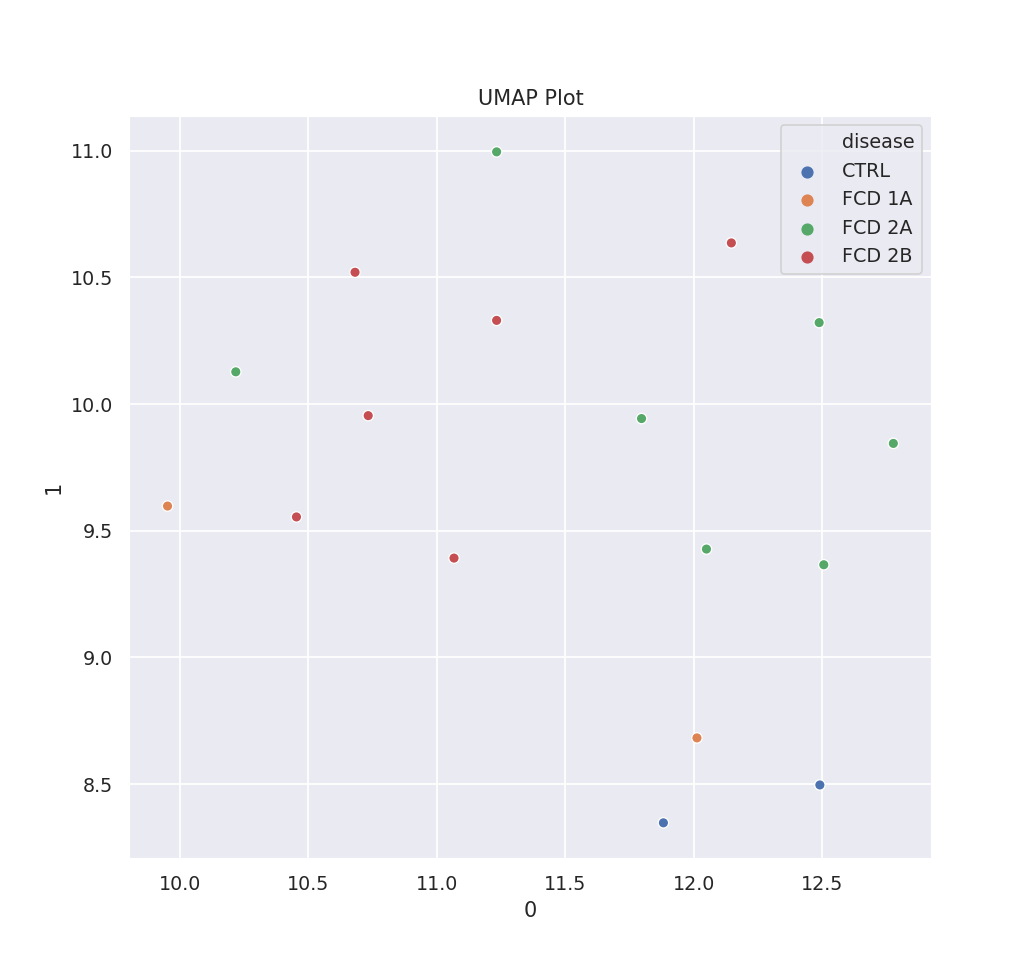

In [181]:
%matplotlib notebook
#plt.figure(figsize=(18, 15))
#plt.scatter(umap_results[:, 0], umap_results[:, 1], 
            # c=phen_keepers['sex'].to_numpy(),           
           # cmap='tab10')
#plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6),)
#plt.gca().set_aspect('equal', 'datalim')
#plt.title('UMAP projection of the dataset', fontsize=24);


import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import cubehelix_palette
group='disease'

X_transformed=pd.DataFrame(embedding)
X_transformed[group]=pheno[group].to_numpy()     
#categories = X_transformed[group]
       

#colors=colors[:len(categories.unique())]
        
fig, ax = plt.subplots()    
#for i in range(len(X_transformed)):
            
#    ax.scatter(X_transformed[0].iloc[i],  
#                X_transformed[1].iloc[i], 
#                color = colors[i%len(colors)],
#                label=categories.iloc[i])
#ax.legend(categories.unique())
#ax.set_xlabel('Principal Component %s'  % (components[0]+1))
#ax.set_ylabel('Principal Component %s'  % (components[1]+1))
#cmap=sns.color_palette('muted') 

import itertools
#sns.set_palette(sns.color_palette("husl", 14))
#palette = itertools.cycle(sns.color_palette())



#palette = zip(X_transformed[group].unique(), sns.crayons.values())

# palette = colordict ,

sns.scatterplot(0,1,hue=group,data=X_transformed, ax=ax)
ax.set_title('UMAP Plot')
plt.show()   

In [180]:
test_mval_py=preproidat.ri2py_dataframe(preproidat.mval).loc[betaquant_10000.index.to_list()];test_mval_py

CTRL.202931510124_R04C01  CTRL.202931510124_R06C01  \
cg18182269                       NaN                       NaN   
cg05016066                       NaN                       NaN   
cg07385821                 -5.923284                 -6.211655   
cg05819172                       NaN                       NaN   
cg08194879                       NaN                       NaN   
...                              ...                       ...   
cg08104563                 -2.046792                 -1.695768   
cg03710364                 -1.736237                 -2.132082   
cg16136098                 -3.831218                 -2.857123   
cg05859323                 -2.991673                 -3.094626   
cg04212729                 -4.347000                 -4.786866   

            FCD 1A.202818860046_R04C01  FCD 1A.202818860046_R06C01  \
cg18182269                   -6.409265                   -6.121163   
cg05016066                    4.941624                    4.954881   
cg07385821                         NaN                         NaN   
cg05819172                   -5.737291                   -5.407214   
cg08194879                   -5.581803                   -5.198516   
...                                ...                         ...   
cg08104563                   -1.173632                         NaN   
cg03710364                   -2.027369                   -3.159585   
cg16136098                   -4.392944                   -4.903980   
cg05859323                   -3.705827                   -3.713521   
cg04212729                   -4.205639                   -4.597993   

            FCD 2A.202093110108_R07C01  FCD 2A.202093110108_R08C01  \
cg18182269                   -5.997916                   -6.065136   
cg05016066                    5.235275                    5.415699   
cg07385821                   -5.944034                   -6.084053   
cg05819172                   -5.510890                   -5.048851   
cg08194879                   -5.906179                   -6.115621   
...                                ...                         ...   
cg08104563                   -2.614463                   -0.770816   
cg03710364                   -1.915753                   -0.553218   
cg16136098                   -3.100178                   -1.745896   
cg05859323                   -3.551011                   -2.645817   
cg04212729                   -2.462146                   -2.859456   

            FCD 2A.202093110113_R01C01  FCD 2A.202093110113_R02C01  \
cg18182269                   -6.239678                   -5.770246   
cg05016066                    5.097863                    5.523516   
cg07385821                   -5.674611                   -5.712287   
cg05819172                   -5.366651                   -5.372277   
cg08194879                   -5.380349                   -5.402758   
...                                ...                         ...   
cg08104563                   -1.551649                   -2.160165   
cg03710364                   -1.716906                   -0.583387   
cg16136098                   -2.581109                   -2.370591   
cg05859323                   -3.231804                   -2.980821   
cg04212729                   -3.384638                   -2.934824   

            FCD 2A.202093110113_R03C01  FCD 2A.202093110113_R04C01  \
cg18182269                   -5.874440                   -5.680034   
cg05016066                    4.967642                    4.751860   
cg07385821                   -5.494484                   -5.245979   
cg05819172                   -4.894651                   -4.934928   
cg08194879                   -5.265981                   -5.113589   
...                                ...                         ...   
cg08104563                   -1.568828                   -3.950730   
cg03710364                   -0.888189                   -1.263692   
cg16136098                   -1.985966                   -2.960803

In [181]:
test_mval_py.isnull().sum()

CTRL.202931510124_R04C01      22
CTRL.202931510124_R06C01      22
FCD 1A.202818860046_R04C01    13
FCD 1A.202818860046_R06C01     8
FCD 2A.202093110108_R07C01     0
FCD 2A.202093110108_R08C01     0
FCD 2A.202093110113_R01C01     0
FCD 2A.202093110113_R02C01     0
FCD 2A.202093110113_R03C01     0
FCD 2A.202093110113_R04C01     0
FCD 2A.202093110113_R05C01     0
FCD 2B.202093110113_R07C01     0
FCD 2B.202148010052_R01C01     0
FCD 2B.202148010052_R02C01     0
FCD 2B.202148010052_R04C01     0
FCD 2B.202148010052_R06C01     0
FCD 2B.202148010052_R07C01     0
dtype: int64

In [150]:
def dmp(M_val, pheno, phenotype=None, number=10000, pvalue=0.05, adjpval=1):  
        from scipy.special import comb
        if not phenotype:
            print('Please specify a target of interest \n'
                'These are the available column names:')
            print(pandas2ri.ri2py(robjects.r['as'](pheno,'data.frame')).columns.tolist())
            return
        try:
            pheno_py=pd.DataFrame(pandas2ri.ri2py(pheno))
        except:
            pheno_py=pandas2ri.ri2py(robjects.r['as'](pheno,'data.frame'))            
        
            
        py_array=pheno_py[phenotype].unique()
        #prtink=0
        contrasts=dict()
        n = len(py_array)
        k=0
        for i in range(0,n):
            #print(k)
            for j in range(i+1,n):
                k+=1
                #print(k)
                contrasts[k]= py_array[i]+"-"+py_array[j]
                #print(py_array[i]+"-"+py_array[j])
                
                
        
        print('These are the possible pairwise groups for your comparisons \n %s' %(contrasts))
        print('Enter your comparison of choice;- to get all comparisons type "all":')
        coef = input()
        if coef=='all':
            print('you selected all')
        else:
            coef=int(coef)
            max_coef=comb(len(py_array),2)
            #print(int(max_coef))
            if (coef>int(max_coef)):
                print('The maximum coefficient number for comparisons is %s' %(int(max_coef)))
                return 0,0   
            else:
                print('You have chosen this comparison group: %s:%s' %(coef,contrasts[coef]))
            #return 0,0       
              
          
        r_array=numpy2ri.py2ri(py_array)
        #self.compute_mvals(self.GRset)
        preproidat.get_annotation()
        #design,M,fit, matr_des, fit2, dectest, top
        
        preproidat.dmps, data,cols,rows, dectest = robjects.r("""function ( pheno, phenotype, M,  ann, number, array, coef, pvalue, adjpval) {
    
            library(limma)             
            #sex <- factor(pheno$sex)
            #age <- factor(pheno$ALTER_OP)
            #loc<-factor(pheno$Lokalisation)
            #+sex+loc+age
            design <- model.matrix(~0+phenotype,data=pheno)
            colnames(design) <- array
            colnames(design)<- make.names(colnames(design)) 
            #cat(colnames(design))####FCD2a...
            #cat(rownames(design))
            cat('Creating design matrix for experiment')
            
            fit <- lmFit(M,design)
            #cat(rownames(fit))
            # create a contrast matrix for specific comparisons
            
            
            design.pairs <- function(levels) {
                    n <- length(levels)
                    design <- matrix(0,n,choose(n,2))
                    rownames(design) <- levels
                    colnames(design) <- 1:choose(n,2)
                    k <- 0
                    for (i in 1:(n-1))
                    for (j in (i+1):n) {
                        k <- k+1
                        design[i,k] <- 1
                        design[j,k] <- -1
                        colnames(design)[k] <- paste(levels[i],"-",levels[j],sep="")
                        }
                    result<-list(des=design,cols=colnames(design), rows=rownames(design) )    
                    return(result)    
                    #design
                    }         
           
            matr <-design.pairs(array)   
            #print(contMatrix)
            #cat(matr$cols)
            #cat(c(matr$cols))
            #cat(factor(matr$cols))
            #cat('Creating contrast matrix for experiment')
            #x <- c(c(matr$cols))
            #cat(x)
            #x<-cat(make.names(x))
            #cat(x)
            #contrast.matrix <- makeContrasts(contrasts=phenotypeFCD.2A-phenotypeFCD.2B,phenotypeFCD.2A-phenotypeTSC,phenotypeFCD.2B-phenotypeTSC ,levels=design) 
            #cat(rownames(fit))
            #cat(rownames(matr$des))
            fit2 <- contrasts.fit(fit, matr$des)
            fit2 <- eBayes(fit2)
            
            # look at the numbers of DM CpGs at FDR < 0.05
            dectest<- summary(decideTests(fit2, p.value=pvalue))                                           
                                        
            
            cat('Creating contrast matrix for experiment')
            #cat(fit$coef)
            #tstat <- fit$coef/fit$stdev.unscaled/fit$sigma
            #pval <- 2*pnorm(-abs(tstat[,2]))
            #padj <- p.adjust(sort(pval, decreasing=FALSE), method="bonf")
            #cat(rownames(padj))
            
            cat('Aligning annotation')
            annSub <- ann[match(rownames(M),ann$Name),]
            
            
            if (coef == 'all'){
                
                cat('Computing contrasts for experiment')           
                topresults <- c()             
                for (i in 1:choose(length(array),2)) {                                  

                    top<-topTable(fit2, genelist=annSub, coef=i,number=number, p.value=adjpval )
                  
                    topresults[[i]] <- top    
                    
                }
                
                result=list(topresults,matr$des,matr$cols,matr$rows, dectest)
            }
            
            else{
                cat('Computing contrast for experiment') 
                top<-topTable(fit2, coef=coef, genelist=annSub, number=number, p.value=adjpval )                
                result=list(top,matr$des,matr$cols,matr$rows, dectest)
            
            }       
            
            
            
                       
                             
            
            #result=list(design,M,fit, matr$des, fit2, dectest, top)
            return(result)
         }""")(pheno, 
               pheno_py[phenotype], 
               
               M_val,                
               preproidat.annotation, 
               number, 
               r_array, 
               coef,
               pvalue,
               adjpval)
        
        preproidat.dmps_list=[]
        for elem in preproidat.dmps:
            #print(elem)
            preproidat.dmps_list.append(pd.DataFrame(pandas2ri.ri2py(elem)))
        lists=[]
        for elements in preproidat.dmps_list:            
            for elem in elements['Name'].tolist():         
                lists.append(elem)  
        preproidat.dmps = list(dict.fromkeys(lists))          
        preproidat.contrastmatrix=preproidat.ri2py_dataframe(data)
        #rows_py=pd.Series(pandas2ri.ri2py(rows))
        #cols_py=pd.Series(pandas2ri.ri2py(cols))
        #preproidat.contrastmatrix=pd.DataFrame(data_py.to_numpy(),index=rows_py,columns=cols_py)
        preproidat.dectest=preproidat.ri2py_dataframe(dectest)
        
        return preproidat.dmps, data,cols,rows, preproidat.dectest#design,M,fit, matr_des, fit2, dectest, top

In [356]:
def dmp_sva(M_val, pheno, phenotype=None, adjust_vars=None, number=10000, pvalue=0.05, adjpval=1):  
        from scipy.special import comb
        if not phenotype:
            print('Please specify a target of interest \n'
                'These are the available column names:')
            print(pandas2ri.ri2py(robjects.r['as'](pheno,'data.frame')).columns.tolist())
            return None
        try:
            pheno_py=pd.DataFrame(pandas2ri.ri2py(pheno))
        except:
            pheno_py=pandas2ri.ri2py(robjects.r['as'](pheno,'data.frame'))            
       
        py_array=pheno_py[phenotype].unique()
        r_array=numpy2ri.py2ri(py_array)
        if adjust_vars:
            #print(type(adjust_vars))
            if not type(adjust_vars)==list:
                print('Please provide a list specifying your adjustment variables obtained from the pheno_sheet \n')
                print(pandas2ri.ri2py(robjects.r['as'](pheno,'data.frame')).columns.tolist())
                return None, None, None
            
            l=[pheno_py[elements].unique() for elements in adjust_vars]
             
            py_array_adj=np.asarray([item for sublist in l for item in sublist])
            #flat_list = []
            #for sublist in l:
            #    for item in sublist:
            #        flat_list.append(item)          
                
            #print(flat_array)    
         
        try:        
            r_array_adj=numpy2ri.py2ri(py_array_adj)
        except:
            r_array_adj=None
        try:
            l_svas=[pheno_py[element]for element in adjust_vars]
            svas=pd.DataFrame(l_svas).transpose()
            #if len(svas) == 1:
            # Convert to series per OP's question.
            svas = svas.iloc[:,0]
            #print(svas)
            #svas=[item for pd.Dataframe(sublist) in l_svas for item in sublist]
            #svas=svas.squeeze()    
        except:
            svas=None      
        
        
        
        #prtink=0
        contrasts=dict()
        n = len(py_array)
        k=0
        for i in range(0,n):
            #print(k)
            for j in range(i+1,n):
                k+=1
                #print(k)
                contrasts[k]= py_array[i]+"-"+py_array[j]
                #print(py_array[i]+"-"+py_array[j])
                
        
        print('These are the possible pairwise groups for your comparisons \n %s' %(contrasts))
        print('Enter your comparison of choice;- to get all comparisons type "all":')
        coef = input()
        if coef=='all':
            print('you selected all')
        else:
            coef=int(coef)
            max_coef=comb(len(py_array),2)
            #print(int(max_coef))
            if (coef>int(max_coef)):
                print('The maximum coefficient number for comparisons is %s' %(int(max_coef)))
                return 0,0   
            else:
                print('You have chosen this comparison group: %s:%s' %(coef,contrasts[coef]))
            #return 0,0       
              
        #print(type(svas))
        #print(type(pheno_py[phenotype]))
        #return svas,l_svas,None
       
        #self.compute_mvals(self.GRset)
        preproidat.get_annotation()
        #design,M,fit, matr_des, fit2, dectest, top
        ###,M,fit, matr_des, fit2, dectest, dmps
        
    
        preproidat.dmps, data,cols,rows, dectest  = robjects.r("""function ( pheno, phenotype, M,  ann, number, array, coef, pvalue, adjpval, r_array_adj, svas) {
    
            library(limma)             
            
            cat('Creating design matrix for experiment')
            cat(phenotype)
            cat(svas)
            cat(array)
            cat(r_array_adj)
            design <- model.matrix(~0+phenotype+svas,data=pheno)
            #colnames(design) <- c(array,r_array_adj)
            colnames(design)<- make.names(colnames(design)) 
            result=list(design, array, r_array_adj)
            return(result)
            
                       
                             
            
            #result=list(design)#,M,fit, matr$des, fit2, dectest, topresults)
            #return(result)
         }""")(pheno, 
               pheno_py[phenotype],                
               M_val,                
               preproidat.annotation, 
               number, 
               r_array, 
               coef,
               pvalue,
               adjpval,
               r_array_adj,
               svas
              )
        (pheno, 
               pheno_py[phenotype], 
               
               M_val,                
               preproidat.annotation, 
               number, 
               r_array, 
               coef,
               pvalue,
               adjpval)
        
        preproidat.dmps_list=[]
        for elem in preproidat.dmps:
            #print(elem)
            preproidat.dmps_list.append(pd.DataFrame(pandas2ri.ri2py(elem)))
        lists=[]
        for elements in preproidat.dmps_list:            
            for elem in elements['Name'].tolist():         
                lists.append(elem)  
        preproidat.dmps = list(dict.fromkeys(lists))          
        preproidat.contrastmatrix=preproidat.ri2py_dataframe(data)
        #rows_py=pd.Series(pandas2ri.ri2py(rows))
        #cols_py=pd.Series(pandas2ri.ri2py(cols))
        #preproidat.contrastmatrix=pd.DataFrame(data_py.to_numpy(),index=rows_py,columns=cols_py)
        preproidat.dectest=preproidat.ri2py_dataframe(dectest)
        
        
        
        design=preproidat.ri2py_dataframe(design)
        return design, array, r_array_ad#,M,fit, matr_des, fit2, dectest, dmps
    #
    #design,M,fit, matr_des, fit2, dectest, top


In [58]:
def dmp_finder(M_val, pheno, phenotype=None, adjust_vars=None, number=10000, pvalue=0.05, adjpval=1):  
        from scipy.special import comb
        if not phenotype:
            print('Please specify a target of interest \n'
                'These are the available column names:')
            print(pandas2ri.ri2py(robjects.r['as'](pheno,'data.frame')).columns.tolist())
            return None
        try:
            pheno_py=pd.DataFrame(pandas2ri.ri2py(pheno))
        except:
            pheno_py=pandas2ri.ri2py(robjects.r['as'](pheno,'data.frame'))            
       
        py_array=pheno_py[phenotype].unique()
        r_array=numpy2ri.py2ri(py_array)
        numeric=[]
        categorical=[]
        if adjust_vars:
            
            if not type(adjust_vars)==list:
                print('Please provide a list specifying your adjustment variables obtained from the pheno_sheet \n')
                print(pandas2ri.ri2py(robjects.r['as'](pheno,'data.frame')).columns.tolist())
                return None, None, None
            
            
            for var in adjust_vars:
                
                if (pheno_py[var].dtype=='float64') or (pheno_py[var].dtype=='float32') or (pheno_py[var].dtype=='int'):
                    
                    numeric.append(var)
                else:    
                    
                    categorical.append(var)

            if len(numeric)>3:
                print('not good')
                return


        svas=numeric+categorical  
        
        contrasts=dict()
        n = len(py_array)
        k=0
        for i in range(0,n):
            #print(k)
            for j in range(i+1,n):
                k+=1
                
                contrasts[k]= py_array[i]+"-"+py_array[j]
               
        
        print('These are the possible pairwise groups for your comparisons \n %s' %(contrasts))
        print('Enter your comparison of choice;- to get all comparisons type "all":')
        coef = input()
        if coef=='all':
            print('you selected all')
        else:
            coef=int(coef)
            max_coef=comb(len(py_array),2)
            #print(int(max_coef))
            if (coef>int(max_coef)):
                print('The maximum coefficient number for comparisons is %s' %(int(max_coef)))
                return 0,0   
            else:
                print('You have chosen this comparison group: %s:%s' %(coef,contrasts[coef]))
          
        print('You are adjusting for these variables: %s' % (svas))
       
        preproidat.get_annotation()     
       
       
        preproidat.dmps, data, dectest = robjects.r("""function ( pheno, phenotype, M,  ann, number, array, coef, pvalue, adjpval, svas) {
    

        phen <- factor(pheno[,c(phenotype)])
        designnr<-length(svas)
        #print(designnr)
        if (designnr ==0){

        ##none###############################
        design <- model.matrix(~0+phen ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen))))
        colnames(design) <- c(levels(phen))

        }


        if(designnr!=0){
        facs <- list()

        for (item in c(svas)){

            #print(class(item))
            #print(class(pheno[,c(item)]))
            if(class(pheno[,c(item)])!='numeric'){
            #print('here')
            facs[[item]]<-factor(pheno[,c(item)])
            }
            else{
            #print(item)
            #print(class(pheno[,c(item)]))
            facs[[item]]<-pheno[,item]
            }
        }

        for(i in 1:length(facs)){  
          assign(paste('factor', i, sep = ""), facs[[i]])  
          #if (class(facs[[i]])=='numeric'){
          #assign(paste('factorlevel', i, sep = ""), factor(facs[[i]]))
         #  }
        }

        #formdf1 <- as.formula(paste("~0+", paste(c(phenotype, factor_name1)),collapse="+"))
        #print(formdf1)

        ##1#####################

        if (designnr ==1){

        if(class(factor1)=='numeric'){
            design <- model.matrix(~0+phen+factor1 ,data=pheno, contrasts.arg=list(phen=diag(nlevels(phen))))

            colnames(design) <- c(levels(phen),
                                 c(names(facs[1])))
            }

        else{
            design <- model.matrix(~0+phen+factor1 ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)), 
                           factor1=diag(nlevels(factor1))))

            colnames(design) <- c(levels(phen),
                                  levels(factor1))
            }



        }

        ##2######################

        if (designnr ==2){


        if(class(factor2)=='numeric'){

            design <- model.matrix(~0+phen+factor1+factor2 ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen))))         

            colnames(design) <- c(levels(phen),
                                c(names(facs[1])), 
                                c(names(facs[2])))


            }
        else if(class(factor1)=='numeric'){
            design <- model.matrix(~0+phen+factor1+factor2 ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)), 

                        factor2=diag(nlevels(factor2)) ))         

            colnames(design) <- c(levels(phen),
                                c(names(facs[1])), 
                                levels(factor2))


            }    


        else{
            design <- model.matrix(~0+phen+factor1+factor2 ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)), 
                           factor1=diag(nlevels(factor1)), 
                           factor2=diag(nlevels(factor2)) ))

            colnames(design) <- c(levels(phen),
                                levels(factor1), 
                                levels(factor2))

            }
        }

        ##3######################

        if (designnr ==3){
        if(class(factor3)=='numeric'){
             design <- model.matrix(~0+phen+factor1+factor2+factor3 ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)))) 


            colnames(design) <- c(levels(phen),
                                c(names(facs[1])), 
                                c(names(facs[2])), 
                                c(names(facs[3]))
                                )

            }
        else if(class(factor2)=='numeric'){
            design <- model.matrix(~0+phen+factor1+factor2+factor3 ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)),                

                            factor3=diag(nlevels(factor3)) ))         

            colnames(design) <- c(levels(phen),
                                c(names(facs[1])), 
                                c(names(facs[2])),
                                levels(factor3)
                                )
            }

        else if(class(factor1)=='numeric'){

            design <- model.matrix(~0+phen+factor1+factor2+factor3 ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)), 

                            factor2=diag(nlevels(factor2)),
                            factor3=diag(nlevels(factor3))))         

            colnames(design) <- c(levels(phen),
                                c(names(facs[1])), 
                                levels(factor2),
                                levels(factor3)
                                )


            }    



        else {    
            design <- model.matrix(~0+phen+factor1+factor2+factor3 ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)), 
                       factor1=diag(nlevels(factor1)), 
                       factor2=diag(nlevels(factor2)), 
                       factor3=diag(nlevels(factor3)) ))

            colnames(design) <- c(levels(phen),
                                levels(factor1),
                                levels(factor2), 
                                levels(factor3))
             }                   

        }


        ##4#####################

        if (designnr ==4){
        if(class(factor3)=='numeric'){
                design <- model.matrix(~0+phen+factor1+factor2+factor3+factor4 ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)), 

                               factor4=diag(nlevels(factor4)) 
                               ))

                colnames(design) <- c(levels(phen),
                                    c(names(facs[1])), 
                                    c(names(facs[2])), 
                                    c(names(facs[3])),
                                    levels(factor4)
                                    )
        }
        else if(class(factor2)=='numeric'){
                print(names(facs[1]))
                print(names(facs[2]))


                design <- model.matrix(~0+phen+factor1+factor2+factor3+factor4 ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)), 

                               factor3=diag(nlevels(factor3)),  
                               factor4=diag(nlevels(factor4)) 
                               ))

                colnames(design) <- c(levels(phen),
                                    c(names(facs[1])), 
                                    c(names(facs[2])), 
                                    levels(factor3),
                                    levels(factor4))

            }

        else if(class(factor1)=='numeric'){

                design <- model.matrix(~0+phen+factor1+factor2+factor3+factor4 ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)), 

                               factor2=diag(nlevels(factor2)),
                               factor3=diag(nlevels(factor3)),
                               factor4=diag(nlevels(factor4)) ))

                colnames(design) <- c(levels(phen),
                                    c(names(facs[1])), 
                                    levels(factor2), 
                                    levels(factor3),
                                    levels(factor4))

            }




        else{
                design <- model.matrix(~0+phen+factor1+factor2+factor3+factor4 ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)), 
                           factor1=diag(nlevels(factor1)), 
                           factor2=diag(nlevels(factor2)), 
                           factor3=diag(nlevels(factor3)),  
                           factor4=diag(nlevels(factor4)) ))

                colnames(design) <- c(levels(phen),
                                      levels(factor1), 
                                      levels(factor2), 
                                      levels(factor3),
                                      levels(factor4))

            }
        }

        ##5######################

        if (designnr ==5){
        if(class(factor3)=='numeric'){
                design <- model.matrix(~0+phen+factor1+factor2+factor3+factor4+factor5 ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)), 

                               factor4=diag(nlevels(factor4)),
                               factor5=diag(nlevels(factor5)) ))

                colnames(design) <- c(levels(phen),
                                    c(names(facs[1])), 
                                    c(names(facs[2])), 
                                    c(names(facs[3])),
                                    levels(factor4),
                                    levels(factor5)
                                    )
        }
        else if(class(factor2)=='numeric'){

                design <- model.matrix(~0+phen+factor1+factor2+factor3+factor4+factor5 ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)), 

                               factor3=diag(nlevels(factor3)),  
                               factor4=diag(nlevels(factor4)),
                               factor5=diag(nlevels(factor5)) 
                               ))

                colnames(design) <- c(levels(phen),
                                    c(names(facs[1])), 
                                    c(names(facs[2])), 
                                    levels(factor3),
                                    levels(factor4),
                                    levels(factor5))

            }


        else if(class(factor1)=='numeric'){

                design <- model.matrix(~0+phen+factor1+factor2+factor3+factor4+factor5 ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)), 

                               factor2=diag(nlevels(factor2)), 
                               factor3=diag(nlevels(factor3)),  
                               factor4=diag(nlevels(factor4)),
                               factor5=diag(nlevels(factor5)) 
                               ))

                colnames(design) <- c(levels(phen),
                                    c(names(facs[1])), 
                                    levels(factor2), 
                                    levels(factor3),
                                    levels(factor4),
                                    levels(factor5))

            }




        else{
                design <- model.matrix(~0+phen+factor1+factor2+factor3+factor4+factor5 ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)), 
                                       factor1=diag(nlevels(factor1)), 
                                       factor2=diag(nlevels(factor2)), 
                                       factor3=diag(nlevels(factor3)),  
                                       factor4=diag(nlevels(factor4)),
                                       factor5=diag(nlevels(factor5)) 
                                       ))

                colnames(design) <-  c(levels(phen),
                                      levels(factor1), 
                                      levels(factor2), 
                                      levels(factor3),
                                      levels(factor4),
                                      levels(factor5))
                    }                  


        }

        ##6########################

        if (designnr ==6){

        if(class(factor3)=='numeric'){
                design <- model.matrix(~0+phen+factor1+factor2+factor3+factor4+factor5+factor6 ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)), 

                               factor4=diag(nlevels(factor4)),
                               factor5=diag(nlevels(factor5)),
                               factor6=diag(nlevels(factor6)) 
                               ))

                colnames(design) <- c(levels(phen),
                                    c(names(facs[1])), 
                                    c(names(facs[2])), 
                                    c(names(facs[3])),
                                    levels(factor4),
                                    levels(factor5),
                                    levels(factor6))
        }
        else if(class(factor2)=='numeric'){

                design <- model.matrix(~0+phen+factor1+factor2+factor3+factor4+factor5+factor6  ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)), 

                               factor3=diag(nlevels(factor3)),  
                               factor4=diag(nlevels(factor4)),
                               factor5=diag(nlevels(factor5)),
                               factor6=diag(nlevels(factor6)) 
                               ))

                colnames(design) <- c(levels(phen),
                                    c(names(facs[1])), 
                                    c(names(facs[2])), 
                                    levels(factor3),
                                    levels(factor4),
                                    levels(factor5),
                                    levels(factor6))

            }

        else if(class(factor1)=='numeric'){

                design <- model.matrix(~0+phen+factor1+factor2+factor3+factor4+factor5+factor6  ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)), 

                               factor2=diag(nlevels(factor2)), 
                               factor3=diag(nlevels(factor3)),  
                               factor4=diag(nlevels(factor4)),
                               factor5=diag(nlevels(factor5)),
                               factor6=diag(nlevels(factor6)) 
                               ))

                colnames(design) <- c(levels(phen),
                                    c(names(facs[1])), 
                                    levels(factor2), 
                                    levels(factor3),
                                    levels(factor4),
                                    levels(factor5),
                                    levels(factor6))

            }




        else{
                design <- model.matrix(~0+phen+factor1+factor2+factor3+factor4+factor5+factor6 ,data=pheno,contrasts.arg=list(phen=diag(nlevels(phen)), 
                           factor1=diag(nlevels(factor1)), 
                           factor2=diag(nlevels(factor2)), 
                           factor3=diag(nlevels(factor3)),  
                           factor4=diag(nlevels(factor4)),
                           factor5=diag(nlevels(factor5)),
                           factor6=diag(nlevels(factor6)) 
                           ))

                colnames(design) <-  c(levels(phen),
                                      levels(factor1), 
                                      levels(factor2), 
                                      levels(factor3),
                                      levels(factor4),
                                      levels(factor5),
                                      levels(factor6))
                  }                    

        }


        if (designnr >6){

        print('Sorry you cannot specify more than 6 adjustment variables')
        return(NULL)
        }
        }

        cat('Creating design matrix for experiment')

        colnames(design)<- make.names(colnames(design))

        fit <- lmFit(M,design)

        #cat('Checking design.nas')
        #design.na<-apply(design, 2, function(x) any(is.na(x)))
        #print(design.na)


        #cat('Checking M.nas')
        #M.na<-apply(M, 2, function(x) any(is.na(x)))
        #print(M.na)

        #cat('Checking fit.nas')
        #fit.na<-apply(fit, 2, function(x) any(is.na(x)))
        #print(fit.na)



        #test<-imputing.func(fit)
        #cat('Checking imputed fit.nas')
        #fitnew.na<-apply(test, 2, function(x) any(is.na(x)))
        #print(fitnew.na)




        # create a contrast matrix for specific comparisons      
        cat('Creating contrast matrix for experiment')            
        design.pairs <- function(levels) {
                            n <- length(levels)
                            design <- matrix(0,n,choose(n,2))
                            rownames(design) <- levels
                            colnames(design) <- 1:choose(n,2)

                            k <- 0
                            for (i in 1:(n-1))
                            for (j in (i+1):n) {
                                k <- k+1
                                design[i,k] <- 1
                                design[j,k] <- -1
                                colnames(design)[k] <- paste(levels[i],"-",levels[j],sep="")
                                }
                            result<-list(des=design,cols=colnames(design), rows=rownames(design) )    
                            return(result)    
                            #design
                            }         

        matr <-design.pairs(make.names(array))


        x <- matr$cols

        contrast.matrix <- makeContrasts(contrasts=x ,levels=design) 




        fit2 <- contrasts.fit(fit, contrast.matrix)
        fit2 <- eBayes(fit2)

        #cat('Checking fit2.nas')
        #fit2.na<-apply(fit2, 2, function(x) any(is.na(x)))
        #print(fit2.na)  


        #cat('Checking contrast.nas')
        #contrast.na<-apply(contrast.matrix, 2, function(x) any(is.na(x)))
        #print(contrast.na)

        # look at the numbers of DM CpGs at FDR < 0.05
        cat('Computing statistics for experiment')    
        dectest<- summary(decideTests(fit2, p.value=pvalue))                                           





        cat('Aligning annotation')
        #annSub <- ann[match(rownames(M),ann$Name),]
        annSub <- ann[ann$Name %in% rownames(M),]
        #annSub <- ann[match(rownames(fit2$coefficients),ann$Name),]

        if (coef == 'all'){

                        cat('Computing contrasts for experiment')           
                        topresults <- c()             
                        for (i in 1:choose(length(array),2)) {        
                            #print(i)

                            top<-topTable(fit2, genelist=annSub, coef=i,number=number, p.value=adjpval )

                            topresults[[i]] <- top    

                        }

                        result=list(topresults,matr$des, dectest)
                    }

                    else{

                        cat('Computing contrast for experiment') 
                        top<-topTable(fit2, genelist=annSub, coef=coef, number=number, p.value=adjpval )   
                        top<-list(top)
                        result=list(top,matr$des,dectest)

                    }     


            return(result)
        }""")  (pheno, 
               phenotype,                
               M_val,                
               preproidat.annotation, 
               number, 
               r_array, 
               coef,
               pvalue,
               adjpval,
               svas)     
        
        
        preproidat.dmps_list=[]
        for elem in preproidat.dmps:
            
            preproidat.dmps_list.append(pd.DataFrame(pandas2ri.ri2py(elem)))
        lists=[]
        for elements in preproidat.dmps_list:            
            for elem in elements['Name'].tolist():         
                lists.append(elem)  
        preproidat.dmps = list(dict.fromkeys(lists))          
        preproidat.contrastmatrix=preproidat.ri2py_dataframe(data)
        
        preproidat.dectest=preproidat.ri2py_dataframe(dectest)
        ###to-do
        if save_csv:
            if path:
                for elem in preproidat.dmps_list:
                    
                    
                    elem.to_csv(path+'{}.csv'.format(i,contrasts[i]), index=False)
            else:
                for i,elem in enumerate(preproidat.dmps_list):
                    
                   
                    elem.to_csv(self.idat_dir+'{}.csv'.format(i,contrasts[i]), index=False)
                   
        print('done')

In [70]:
preproidat.dectest

CTRL-FCD.1A  CTRL-FCD.2A  CTRL-FCD.2B  FCD.1A-FCD.2A  FCD.1A-FCD.2B  \
Down           28.0         72.0         65.0          570.0          232.0   
NotSig     252391.0     252278.0     252155.0       251240.0       251945.0   
Up             17.0         86.0        216.0          626.0          259.0   

        FCD.2A-FCD.2B  
Down              0.0  
NotSig       252436.0  
Up                0.0

In [61]:
len(preproidat.dmps)

3827

In [55]:
x=robjects.Vector(padj)
#fac = robjects.FactorVector(x)
test=pandas2ri.ri2py(x.names[:1000]).tolist()

In [348]:
ph=robjects.r("""function ( GRset) {
             pheno<-pData(GRset)
             return(pheno)
            }""") (preproidat.GRset)               
                   
ph    

R object with classes: ('DataFrame',) mapped to:
<RS4 - Python:0x7fcbace29308 / R:0x563ae80ce040>

In [88]:
def dmp_find(M_val, pheno, path, phenotype=None, save_csv=False, number=10000, pvalue=0.05, adjpval=1):  
        from scipy.special import comb
        if not phenotype:
            print('Please specify a target of interest \n'
                'These are the available column names:')
            print(pandas2ri.ri2py(robjects.r['as'](pheno,'data.frame')).columns.tolist())
            return
        try:
            pheno_py=pd.DataFrame(pandas2ri.ri2py(pheno))
        except:
            pheno_py=pandas2ri.ri2py(robjects.r['as'](pheno,'data.frame'))            
        
            
        py_array=pheno_py[phenotype].unique()
        #prtink=0
        contrasts=dict()
        n = len(py_array)
        k=0
        for i in range(0,n):
            #print(k)
            for j in range(i+1,n):
                k+=1
                #print(k)
                contrasts[k]= py_array[i]+"-"+py_array[j]
                #print(py_array[i]+"-"+py_array[j])
                
                
        
        print('These are the possible pairwise groups for your comparisons \n %s' %(contrasts))
        print('Enter your comparison of choice;- to get all comparisons type "all":')
        coef = input()
        if coef=='all':
            print('you selected all')
        else:
            coef=int(coef)
            max_coef=comb(len(py_array),2)
            #print(int(max_coef))
            if (coef>int(max_coef)):
                print('The maximum coefficient number for comparisons is %s' %(int(max_coef)))
                return 0,0   
            else:
                print('You have chosen this comparison group: %s:%s' %(coef,contrasts[coef]))
            #return 0,0       
              
          
        r_array=numpy2ri.py2ri(py_array)
        #self.compute_mvals(self.GRset)
        preproidat.get_annotation()
        
        
        preproidat.dmps, data,cols,rows, preproidat.dectest = robjects.r("""function ( pheno, phenotype, M,  ann, number, array, coef, pvalue, adjpval) {
    
            library(limma)             
            sex <- factor(pheno$sex)
            age <- factor(pheno$ALTER_OP)
            loc<-factor(pheno$Lokalisation)
            batch<-factor(pheno$Batchnum)
            #+sex+loc+age
            design <- model.matrix(~0+phenotype,data=pheno)
            colnames(design) <- array
            colnames(design)<- make.names(colnames(design))            
            
            cat('Creating design matrix for experiment')
            
            fit <- lmFit(M,design)
            #cat(rownames(fit))
            # create a contrast matrix for specific comparisons
            
            design.pairs <- function(levels) {
                    n <- length(levels)
                    design <- matrix(0,n,choose(n,2))
                    rownames(design) <- levels
                    colnames(design) <- 1:choose(n,2)
                    k <- 0
                    for (i in 1:(n-1))
                    for (j in (i+1):n) {
                        k <- k+1
                        design[i,k] <- 1
                        design[j,k] <- -1
                        colnames(design)[k] <- paste(levels[i],"-",levels[j],sep="")
                        }
                    result<-list(des=design,cols=colnames(design), rows=rownames(design) )    
                    return(result)    
                    #design
                    }       
                    
            
            matr <-design.pairs(array)                                          
                                        
            
            cat('Creating contrast matrix for experiment')
            #contrast.matrix <- makeContrasts(c(matr$cols) ,levels=design) 
            #x<-c('phenotypeFCD.2A-phenotypeFCD.2B','phenotypeFCD.2A-phenotypeTSC','phenotypeFCD.2B-phenotypeTSC')
            #print(x)
            #contrast.matrix <- makeContrasts(contrasts=x ,levels=design) 
           
            #cat(rownames(fit))##<- cg names
            #cat(colnames(matr$des))###<- contrasts names
            fit2 <- contrasts.fit(fit, matr$des)
            fit2 <- eBayes(fit2)
            
            # look at the numbers of DM CpGs at FDR < 0.05
            dectest<- summary(decideTests(fit2, p.value=pvalue))
            
            
                 
            
            cat('Aligning annotation')
            annSub <- ann[match(rownames(M),ann$Name),]
                            
                             
            if (coef == 'all'){
                
                cat('Computing contrasts for experiment')           
                topresults <- c()             
                for (i in 1:choose(length(array),2)) {                                  

                    top<-topTable(fit2, genelist=annSub, coef=i,number=number, p.value=adjpval )
                  
                    topresults[[i]] <- top    
                    
                }
                
                result=list(topresults,matr$des,matr$cols,matr$rows, dectest)
            }
            
            else{
                cat('Computing contrast for experiment') 
                top<-topTable(fit2, coef=coef, genelist=annSub, number=number, p.value=adjpval )                
                result=list(top,matr$des,matr$cols,matr$rows, dectest)
            
            }       
            
            return(result)
         }""")(pheno, 
               pheno_py[phenotype],                
               M_val,                
               preproidat.annotation, 
               number, 
               r_array, 
               coef,
               pvalue,
               adjpval)
        
        preproidat.dmps_list=[]
        for elem in preproidat.dmps:
            #print(elem)
            preproidat.dmps_list.append(pd.DataFrame(pandas2ri.ri2py(elem)))
        lists=[]
        for elements in preproidat.dmps_list:            
            for elem in elements['Name'].tolist():         
                lists.append(elem)  
        preproidat.dmps = list(dict.fromkeys(lists))          
        data_py=pd.DataFrame(pandas2ri.ri2py(data))
        rows_py=pd.Series(pandas2ri.ri2py(rows))
        cols_py=pd.Series(pandas2ri.ri2py(cols))
        preproidat.contrastmatrix=pd.DataFrame(data_py.to_numpy(),index=rows_py,columns=cols_py)
        ###to-do
        if save_csv:
            if path:
                for elem in preproidat.dmps_list:
                    
                    #dmps_list.append(pd.DataFrame(pandas2ri.ri2py(elem)))
                    #elem.to_csv(, index=False)
                    elem.to_csv(path+'{}.csv'.format(i,contrasts[i]), index=False)
            else:
                for i,elem in enumerate(preproidat.dmps_list):
                    
                    #dmps_list.append(pd.DataFrame(pandas2ri.ri2py(elem)))
                    elem.to_csv(self.idat_dir+'{}.csv'.format(i,contrasts[i]), index=False)
                    #dmps_py.to_csv(self.idat_dir+'dmps.csv',index=False)
                    #print("{:3d} {:4d} {:5d}".format(i, i*i, i*i*i))

In [174]:
betaquant_10000=betaquant.loc[preproidat.dmps_list[0]['Name'].tolist()]; betaquant_10000

FCD 1a.N83/03  FCD 1a.N90/04  FCD 1a.N76/04  FCD 1a.N979/06  \
cg11677533       0.437202       0.394293       0.418244        0.555618   
cg05583608       0.625160       0.548707       0.359572        0.480738   
cg05977002       0.673238       0.782374       0.764575        0.441207   
cg15425033       0.540908       0.600646       0.685483        0.449355   
cg19641284       0.218214       0.231479       0.228869        0.503600   
...                   ...            ...            ...             ...   
cg15307230       0.371802       0.413745       0.390062        0.433949   
cg11439378       0.661752       0.809181       0.713573        0.596023   
cg07750339       0.215190       0.118333       0.125544        0.150488   
cg10919760       0.305738       0.262129       0.233308        0.269717   
cg10632215       0.886478       0.895077       0.914778        0.934298   

            FCD 1a.N69/03  FCD 1a.874/06 IV3  FCD 1a.705/10 III4  \
cg11677533       0.474396           0.342982            0.318898   
cg05583608       0.527237           0.701318            0.514107   
cg05977002       0.759466           0.812543            0.602845   
cg15425033       0.522181           0.483507            0.502981   
cg19641284       0.363885           0.156291            0.331137   
...                   ...                ...                 ...   
cg15307230       0.464430           0.513203            0.560581   
cg11439378       0.749776           0.808139            0.849295   
cg07750339       0.192602           0.124264            0.307018   
cg10919760       0.307870           0.362005            0.410725   
cg10632215       0.901550           0.931148            0.933893   

            FCD 1a.2132/16 I4  FCD 1a.2132/16 I4  FCD 1a.1808/13 4  ...  \
cg11677533           0.325675           0.217336          0.475913  ...   
cg05583608           0.545483           0.694232          0.526608  ...   
cg05977002           0.583448           0.582990          0.683989  ...   
cg15425033           0.388035           0.402499          0.568716  ...   
cg19641284           0.318750           0.264206          0.337935  ...   
...                       ...                ...               ...  ...   
cg15307230           0.660872           0.649443          0.629903  ...   
cg11439378           0.736092           0.621003          0.795309  ...   
cg07750339           0.134659           0.126736          0.148506  ...   
cg10919760           0.341941           0.404176          0.413613  ...   
cg10632215           0.959038           0.954636          0.965369  ...   

            TLE/CTRL.N85/15; 8/15 (Bielefeld)  \
cg11677533                           0.464888   
cg05583608                           0.444675   
cg05977002                           0.725107   
cg15425033                           0.573884   
cg19641284                           0.286215   
...                                       ...   
cg15307230                           0.471230   
cg11439378                           0.763687   
cg07750339                           0.157303   
cg10919760                           0.303108   
cg10632215                           0.895645   

            TLE/CTRL.N100/15; 9/15 (Bielefeld)  \
cg11677533                            0.413900   
cg05583608                            0.494821   
cg05977002                            0.779046   
cg15425033                            0.687188   
cg19641284                            0.299792   
...                                        ...   
cg15307230                            0.511726   
cg11439378                            0.744067   
cg07750339                            0.188963   
cg10919760                            0.289871   
cg10632215                            0.921947   

            TLE/CTRL.N314/15; 31/15 (Bielefeld)  \
cg11677533                             0.522467   
cg05583608                             0.492765   
cg05977002                             0.743913   

In [125]:
py_array=pheno['disease'].unique()
r_array=numpy2ri.py2ri(py_array)


a,b,c,d, e,f= robjects.r("""function ( pheno, phenotype, edata, array) {
keep <- match(rownames(pheno),colnames(edata))
#print(keep)
edata <- edata[,keep]
    

#edata = exprs(bladderEset)

#design <- model.matrix(~0+phenotype,data=pheno)


mod = model.matrix(~phenotype, data=pheno)
colnames(mod) <- array
colnames(mod)<- make.names(colnames(mod))

#print(mod)

mod0 = model.matrix(~1,data=pheno)
#print(edata)
n.sv = num.sv(edata,mod, method="leek")
print(n.sv)
svobj = sva(edata,mod,n.sv=n.sv)
pValues = f.pvalue(edata,mod,mod0)
qValues = p.adjust(pValues,method="BH")
#print(pValues)
print(colnames(svobj$sv) )
print(rownames(svobj$sv) )

modSv = cbind(mod,svobj$sv)

fit = lmFit(edata,modSv)
contrast.matrix <- cbind("C1"=c(-1,1,0,rep(0,2)),"C2"=c(0,-1,1,rep(0,2)),"C3"=c(-1,0,1,rep(0,2)))
fitContrasts = contrasts.fit(fit,contrast.matrix)
print(contrast.matrix)


result=list( mod0, mod, qValues, pValues, svobj$sv, contrast.matrix)
return(result)
         }""")(preproidat.pheno, 
               pheno['disease'],                 
               preproidat.mval,
               r_array
              )

[1]
 2


Number of significant surrogate variables is:  2 

Iteration (out of 5 ):
1  
2  
3  
4  
5  
NULL

NULL

    
 C1
 C2
 C3

[1,]
 -1
  0
 -1

[2,]
  1
 -1
  0

[3,]
  0
  1
  1

[4,]
  0
  0
  0

[5,]
  0
  0
  0




In [126]:
pd.DataFrame(pandas2ri.ri2py(f))#.sort_values(0)

0    1    2
0 -1.0  0.0 -1.0
1  1.0 -1.0  0.0
2  0.0  1.0  1.0
3  0.0  0.0  0.0
4  0.0  0.0  0.0

In [66]:
betaraw_10000=betaraw.loc[dmps]; betaraw_10000

FCD IIa.N1232/15 (159/15)  FCD IIa.N619/15 (79/15)  \
cg18647622                   0.060510                 0.201621   
cg21226512                   0.861453                 0.777618   
cg16731157                   0.296616                 0.290370   
cg14317639                   0.202510                 0.249539   
cg15236696                   0.490326                 0.419410   
...                               ...                      ...   
cg03743753                   0.976548                 0.964790   
cg20662370                   0.852145                 0.512281   
cg17112108                   0.974857                 0.917468   
cg16949584                   0.637875                 0.536421   
cg05209898                   0.798153                 0.699389   

            FCD IIa.N475/15 (53/15)  FCD IIa.N2069/14 (271/14)  \
cg18647622                 0.029316                   0.165566   
cg21226512                 0.895502                   0.860459   
cg16731157                 0.216386                   0.244945   
cg14317639                 0.233111                   0.272019   
cg15236696                 0.667181                   0.701048   
...                             ...                        ...   
cg03743753                 0.980408                   0.935393   
cg20662370                 0.788970                   0.668675   
cg17112108                 0.885703                   0.893920   
cg16949584                 0.576115                   0.551274   
cg05209898                 0.814229                   0.741043   

            FCD IIa.N1170/15 (151/15)  FCD IIa.N78/17  \
cg18647622                   0.168407        0.051089   
cg21226512                   0.771920        0.862400   
cg16731157                   0.220081        0.156121   
cg14317639                   0.289609        0.249394   
cg15236696                   0.538022        0.524064   
...                               ...             ...   
cg03743753                   0.956149        0.962512   
cg20662370                   0.502981        0.713736   
cg17112108                   0.844943        0.910088   
cg16949584                   0.530905        0.567199   
cg05209898                   0.691628        0.675418   

            FCD IIa.N691/04 (ER3649)  FCD IIa.403/11  \
cg18647622                  0.031382        0.166434   
cg21226512                  0.862927        0.828333   
cg16731157                  0.186974        0.333208   
cg14317639                  0.270893        0.223766   
cg15236696                  0.497743        0.431150   
...                              ...             ...   
cg03743753                  0.979717        0.928072   
cg20662370                  0.721129        0.491189   
cg17112108                  0.843103        0.900234   
cg16949584                  0.623323        0.571535   
cg05209898                  0.748636        0.681391   

            FCD IIb.N1582/15 (212/15)  FCD IIb.N1762/15 (240/15)  ...  \
cg18647622                   0.244960                   0.136383  ...   
cg21226512                   0.774412                   0.820819  ...   
cg16731157                   0.278767                   0.380886  ...   
cg14317639                   0.326435                   0.163172  ...   
cg15236696                   0.450857                   0.406848  ...   
...                               ...                        ...  ...   
cg03743753                   0.960140                   0.944037  ...   
cg20662370                   0.547368                   0.521097  ...   
cg17112108                   0.944787                   0.910889  ...   
cg16949584                   0.522572                   0.542845  ...   
cg05209898                   0.759890                   0.763832  ...   

            PMG 1q.1158/09 2  PMG.1520/09 I3  TSC.1208/15 I4  TSC.644/16 II6  \
cg18647622          0.169059        0.043055        0.069663        0.133271   
cg21226512          0.753471   

In [203]:
betaquant_10000.isnull().sum()

FCD IIb.N1582/15 (212/15)                0
FCD IIb.N1762/15 (240/15)                0
FCD IIb.(319/13)                         0
FCD IIb.N446/13 (570/13)                 0
FCD IIb.(167/13)                         0
FCD IIb.N904/16                          0
FCD IIb.N754/09                          0
FCD IIb.N560/09 (ER6050)                 0
FCD IIb.1224/15 I5                       0
FCD IIb.1183/13 II10                     0
FCD IIb.1980/13 VI8                      0
FCD IIb.2206/14 III2                     0
FCD IIb.2310/14 6                        0
FCD IIb.861/16 2                         0
FCD IIb.605/17 6                         0
FCD IIb.821/17 I4                        0
FCD IIb.996/17 I2                        0
FCD IIb.997/17 II2                       0
FCD IIb.1031/17 II1                      0
FCD IIb.1230/17 II2                      0
FCD IIb.1259/17 I3                       0
FCD IIb.1727/17 I3                       0
FCD IIb.1777/17 II                       0
FCD IIb.197

In [172]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(betaraw_10000)
betaraw_10000=pd.DataFrame(imp.transform(betaraw_10000),index = betaraw_10000.index.to_numpy(),
                  columns=betaraw_10000.columns)
betaraw_10000.isnull().sum()

FCD IIa.N1232/15 (159/15)    0
FCD IIa.N619/15 (79/15)      0
FCD IIa.N475/15 (53/15)      0
FCD IIa.N2069/14 (271/14)    0
FCD IIa.N1170/15 (151/15)    0
                            ..
TSC.2174/14 IV               0
TSC.1439/14 I1               0
TSC.699/16 I1                0
TSC.1467/16 III              0
TSC.1061/17 7                0
Length: 112, dtype: int64

In [69]:
betaraw_10000=betaraw.loc[dmps]; betaraw_10000

FCD IIa.N1232/15 (159/15)  FCD IIa.N619/15 (79/15)  \
cg18647622                   0.060510                 0.201621   
cg21226512                   0.861453                 0.777618   
cg16731157                   0.296616                 0.290370   
cg14317639                   0.202510                 0.249539   
cg15236696                   0.490326                 0.419410   
...                               ...                      ...   
cg03743753                   0.976548                 0.964790   
cg20662370                   0.852145                 0.512281   
cg17112108                   0.974857                 0.917468   
cg16949584                   0.637875                 0.536421   
cg05209898                   0.798153                 0.699389   

            FCD IIa.N475/15 (53/15)  FCD IIa.N2069/14 (271/14)  \
cg18647622                 0.029316                   0.165566   
cg21226512                 0.895502                   0.860459   
cg16731157                 0.216386                   0.244945   
cg14317639                 0.233111                   0.272019   
cg15236696                 0.667181                   0.701048   
...                             ...                        ...   
cg03743753                 0.980408                   0.935393   
cg20662370                 0.788970                   0.668675   
cg17112108                 0.885703                   0.893920   
cg16949584                 0.576115                   0.551274   
cg05209898                 0.814229                   0.741043   

            FCD IIa.N1170/15 (151/15)  FCD IIa.N78/17  \
cg18647622                   0.168407        0.051089   
cg21226512                   0.771920        0.862400   
cg16731157                   0.220081        0.156121   
cg14317639                   0.289609        0.249394   
cg15236696                   0.538022        0.524064   
...                               ...             ...   
cg03743753                   0.956149        0.962512   
cg20662370                   0.502981        0.713736   
cg17112108                   0.844943        0.910088   
cg16949584                   0.530905        0.567199   
cg05209898                   0.691628        0.675418   

            FCD IIa.N691/04 (ER3649)  FCD IIa.403/11  \
cg18647622                  0.031382        0.166434   
cg21226512                  0.862927        0.828333   
cg16731157                  0.186974        0.333208   
cg14317639                  0.270893        0.223766   
cg15236696                  0.497743        0.431150   
...                              ...             ...   
cg03743753                  0.979717        0.928072   
cg20662370                  0.721129        0.491189   
cg17112108                  0.843103        0.900234   
cg16949584                  0.623323        0.571535   
cg05209898                  0.748636        0.681391   

            FCD IIb.N1582/15 (212/15)  FCD IIb.N1762/15 (240/15)  ...  \
cg18647622                   0.244960                   0.136383  ...   
cg21226512                   0.774412                   0.820819  ...   
cg16731157                   0.278767                   0.380886  ...   
cg14317639                   0.326435                   0.163172  ...   
cg15236696                   0.450857                   0.406848  ...   
...                               ...                        ...  ...   
cg03743753                   0.960140                   0.944037  ...   
cg20662370                   0.547368                   0.521097  ...   
cg17112108                   0.944787                   0.910889  ...   
cg16949584                   0.522572                   0.542845  ...   
cg05209898                   0.759890                   0.763832  ...   

            PMG 1q.1158/09 2  PMG.1520/09 I3  TSC.1208/15 I4  TSC.644/16 II6  \
cg18647622          0.169059        0.043055        0.069663        0.133271   
cg21226512          0.753471   

In [88]:
pheno[pheno['disease']=='PMG']# & 
pheno['disease']==('TSC') #| pheno['disease']==('TSC') #==['TSC', 'PMG']#| pheno['disease']=='PMG')

0     False
1     False
2     False
3     False
4     False
      ...  
95     True
96     True
97     True
98     True
99     True
Name: disease, Length: 100, dtype: bool

In [199]:
datfr.columns

Index(['FCD IIa-FCD IIb', 'FCD IIa-FCD 1a', 'FCD IIa-TSC', 'FCD IIa-PMG 1q',
       'FCD IIa-PMG', 'FCD IIb-FCD 1a', 'FCD IIb-TSC', 'FCD IIb-PMG 1q',
       'FCD IIb-PMG', 'FCD 1a-TSC', 'FCD 1a-PMG 1q', 'FCD 1a-PMG',
       'TSC-PMG 1q', 'TSC-PMG', 'PMG 1q-PMG'],
      dtype='object')

In [481]:
index=1
contr1='FCD IIa'
contr2='FCD IIb'

In [171]:
betaquant_10000.transpose()

cg11677533  cg15425033  cg26870438  \
FCD 1a.N83/03                            0.437202    0.540908    0.428140   
FCD 1a.N90/04                            0.394293    0.600646    0.436396   
FCD 1a.N76/04                            0.418244    0.685483    0.460122   
FCD 1a.N979/06                           0.555618    0.449355    0.542039   
FCD 1a.N69/03                            0.474396    0.522181    0.483764   
...                                           ...         ...         ...   
TLE/CTRL.N878/15; 114/15 (Bielefeld)     0.576411    0.499043    0.556945   
TLE/CTRL.N1012/15; 133/15 (Bielefeld)    0.462371    0.484897    0.528961   
TLE/CTRL.N1151/15; 149/15 (Bielefeld)    0.530803    0.492591    0.438410   
TLE/CTRL.N1661/15; 218/15 (Bielefeld)    0.524330    0.560108    0.431014   
TLE/CTRL.N1743/15; 234/15 (Bielefeld)    0.502630    0.486710    0.517787   

                                       cg18067644  cg13836748  cg19641284  \
FCD 1a.N83/03                            0.695986    0.357656    0.218214   
FCD 1a.N90/04                            0.714843    0.492883    0.231479   
FCD 1a.N76/04                            0.638053    0.567607    0.228869   
FCD 1a.N979/06                           0.896521    0.528292    0.503600   
FCD 1a.N69/03                            0.758204    0.483759    0.363885   
...                                           ...         ...         ...   
TLE/CTRL.N878/15; 114/15 (Bielefeld)     0.866306    0.564885    0.342408   
TLE/CTRL.N1012/15; 133/15 (Bielefeld)    0.845222    0.557815    0.342119   
TLE/CTRL.N1151/15; 149/15 (Bielefeld)    0.786627    0.594676    0.355296   
TLE/CTRL.N1661/15; 218/15 (Bielefeld)    0.822576    0.611285    0.299278   
TLE/CTRL.N1743/15; 234/15 (Bielefeld)    0.820252    0.443429    0.330435   

                                       cg10146423  cg23975840  cg13909775  \
FCD 1a.N83/03                            0.362370    0.428808    0.336807   
FCD 1a.N90/04                            0.306626    0.363333    0.358732   
FCD 1a.N76/04                            0.354478    0.378122    0.328360   
FCD 1a.N979/06                           0.517908    0.450776    0.172059   
FCD 1a.N69/03                            0.423194    0.403307    0.221713   
...                                           ...         ...         ...   
TLE/CTRL.N878/15; 114/15 (Bielefeld)     0.380385    0.512778    0.245205   
TLE/CTRL.N1012/15; 133/15 (Bielefeld)    0.258060    0.369387    0.200148   
TLE/CTRL.N1151/15; 149/15 (Bielefeld)    0.393482    0.404364    0.190294   
TLE/CTRL.N1661/15; 218/15 (Bielefeld)    0.342301    0.436638    0.144962   
TLE/CTRL.N1743/15; 234/15 (Bielefeld)    0.342552    0.380765    0.265067   

                                       cg02499678  ...  cg08796252  \
FCD 1a.N83/03                            0.501103  ...    0.142303   
FCD 1a.N90/04                            0.525720  ...    0.233126   
FCD 1a.N76/04                            0.482545  ...    0.273138   
FCD 1a.N979/06                           0.639532  ...    0.333706   
FCD 1a.N69/03                            0.604742  ...    0.345279   
...                                           ...  ...         ...   
TLE/CTRL.N878/15; 114/15 (Bielefeld)     0.630603  ...    0.257134   
TLE/CTRL.N1012/15; 133/15 (Bielefeld)    0.628354  ...    0.322546   
TLE/CTRL.N1151/15; 149/15 (Bielefeld)    0.572293  ...    0.248621   
TLE/CTRL.N1661/15; 218/15 (Bielefeld)    0.617782  ...    0.264325   
TLE/CTRL.N1743/15; 234/15 (Bielefeld)    0.576211  ...    0.301568   

                                       cg14155327  cg08072685  cg23896901  \
FCD 1a.N83/03                            0.329880    0.370356    0.436562   
FCD 1a.N90/04                            0.326100    0.280536    0.616000   
FCD 1a.N76/04                            0.312903    0.375825    0.467933   
FCD 1a.N979/06                           0.381587    0.443952    0.473390   
FCD 1a.N69/03                         

In [170]:
pheno[pheno.ID.isin(betaquant_10000.transpose().index.tolist())]

Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202148010052   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202148010053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202148010053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202148010053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202148010053   
..                                                 ...            ...   
110  /home/Deep_Learner/private/network/Methyl_Arra...  b202148010058   
111  /home/Deep_Learner/private/network/Methyl_Arra...  b202148010059   
112  /home/Deep_Learner/private/network/Methyl_Arra...  b202148010059   
113  /home/Deep_Learner/private/network/Methyl_Arra...  b202148010059   
114  /home/Deep_Learner/private/network/Methyl_Arra...  b202148010059   

          Center  Lokalisation                        Sample   age   disease  \
0       Erlangen     occipital                        N83/03   7.0    FCD 1a   
1       Erlangen     occipital                        N90/04   7.0    FCD 1a   
2       Erlangen     occipital                        N76/04  11.0    FCD 1a   
3       Erlangen  temp.frontal                       N979/06   3.0    FCD 1a   
4       Erlangen     occipital                        N69/03   2.0    FCD 1a   
..           ...           ...                           ...   ...       ...   
110  NP-Erlangen      temporal   N878/15; 114/15 (Bielefeld)   NaN  TLE/CTRL   
111  NP-Erlangen      temporal  N1012/15; 133/15 (Bielefeld)   NaN  TLE/CTRL   
112  NP-Erlangen      temporal  N1151/15; 149/15 (Bielefeld)   NaN  TLE/CTRL   
113  NP-Erlangen      temporal  N1661/15; 218/15 (Bielefeld)   NaN  TLE/CTRL   
114  NP-Erlangen      temporal  N1743/15; 234/15 (Bielefeld)   NaN  TLE/CTRL   

    sex                                     ID  
0     F                          FCD 1a.N83/03  
1     M                          FCD 1a.N90/04  
2     F                          FCD 1a.N76/04  
3     F                         FCD 1a.N979/06  
4     M                          FCD 1a.N69/03  
..   ..                                    ...  
110       TLE/CTRL.N878/15; 114/15 (Bielefeld)  
111      TLE/CTRL.N1012/15; 133/15 (Bielefeld)  
112      TLE/CTRL.N1151/15; 149/15 (Bielefeld)  
113      TLE/CTRL.N1661/15; 218/15 (Bielefeld)  
114      TLE/CTRL.N1743/15; 234/15 (Bielefeld)  

[115 rows x 9 columns]

In [482]:
#pheno[np.where(pheno['disease']=='PMG',pheno['disease']=='TSC', True)]
pheno_test=pheno.ID[(pheno['disease'] == contr1) | (pheno['disease'] == contr2)]
pheno_test

Basename             txt_idat  \
0   /home/Deep_Learner/private/network/Methyl_Arra...  202093110108_R07C01   
1   /home/Deep_Learner/private/network/Methyl_Arra...  202093110108_R08C01   
2   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R01C01   
3   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R02C01   
4   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R03C01   
5   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R04C01   
6   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R05C01   
7   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R06C01   
8   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R07C01   
9   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R08C01   
10  /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R01C01   
11  /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R02C01   
12  /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R03C01   
13  /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R04C01   
14  /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R06C01   
15  /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R07C01   
33  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R01C01   
34  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R03C01   
35  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R04C01   
36  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R05C01   
37  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R06C01   
38  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R08C01   
39  /home/Deep_Learner/private/network/Methyl_Arra...  202818860167_R08C01   
40  /home/Deep_Learner/private/network/Methyl_Arra...  202822930036_R06C01   
41  /home/Deep_Learner/private/network/Methyl_Arra...  202822930036_R07C01   
42  /home/Deep_Learner/private/network/Methyl_Arra...  202822930036_R08C01   
43  /home/Deep_Learner/private/network/Methyl_Arra...  202822930161_R02C01   
44  /home/Deep_Learner/private/network/Methyl_Arra...  202822930161_R03C01   
45  /home/Deep_Learner/private/network/Methyl_Arra...  202822930161_R04C01   
46  /home/Deep_Learner/private/network/Methyl_Arra...  202822930161_R05C01   
47  /home/Deep_Learner/private/network/Methyl_Arra...  202822930161_R07C01   
48  /home/Deep_Learner/private/network/Methyl_Arra...  202827620173_R06C01   
49  /home/Deep_Learner/private/network/Methyl_Arra...  202827620173_R07C01   
50  /home/Deep_Learner/private/network/Methyl_Arra...  202827620173_R08C01   
51  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R01C01   
52  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R02C01   
53  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R03C01   
54  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R04C01   
55  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R05C01   
56  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R06C01   
57  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R01C01   
58  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R02C01   
59  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R03C01   
60  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R04C01   
61  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R05C01   
62  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R06C01   
63  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R07C01   
64  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R08C01   
65  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R01C01   
66  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R02C01   
67  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056

In [484]:
dmpy_py['Name'].tolist()

['cg18647622',
 'cg21226512',
 'cg16731157',
 'cg14317639',
 'cg15236696',
 'cg14417687',
 'cg03012028',
 'cg01916660',
 'cg22166728',
 'cg09077362',
 'cg25938025',
 'cg13425335',
 'cg07177413',
 'cg21270113',
 'cg13729903',
 'cg20931108',
 'cg26728517',
 'cg13484549',
 'cg24933161',
 'cg01194119',
 'cg02907097',
 'cg27219972',
 'cg03396151',
 'cg02837364',
 'cg19755459',
 'cg13092433',
 'cg13774183',
 'cg11717705',
 'cg00320447',
 'cg16284456',
 'cg18204888',
 'cg14620967',
 'cg20695515',
 'cg16908633',
 'cg19723596',
 'cg21298915',
 'cg08942191',
 'cg01295034',
 'cg16354105',
 'cg11875478',
 'cg17980507',
 'cg09114734',
 'cg01681863',
 'cg12673377',
 'cg09341154',
 'cg07763649',
 'cg05390279',
 'cg17591574',
 'cg06009257',
 'cg08722695',
 'cg23552876',
 'cg12927153',
 'cg16786717',
 'cg15202102',
 'cg19927373',
 'cg19843891',
 'cg25425667',
 'cg15989810',
 'cg09787619',
 'cg25590826',
 'cg23270757',
 'cg20102673',
 'cg10504392',
 'cg05756492',
 'cg18059170',
 'cg07530492',
 'cg159890

In [239]:
betatest=betaquant.loc[dmpy_py['Name'].tolist()]#_10000

NameError: name 'dmpy_py' is not defined

In [487]:
betaquant_test=betaquant.loc[dmpy_py['Name'].tolist()].transpose().iloc[pheno.loc[(pheno['disease'] == contr1) | (pheno['disease'] == contr2)].index].transpose()

In [488]:
betaquant_test

FCD IIa.N1232/15 (159/15)  FCD IIa.N619/15 (79/15)  \
cg18647622                   0.047341                 0.072860   
cg21226512                   0.931171                 0.874152   
cg16731157                   0.214487                 0.294816   
cg14317639                   0.190540                 0.390931   
cg15236696                   0.508395                 0.525153   
...                               ...                      ...   
cg11887833                   0.926146                 0.861599   
cg18134437                   0.875853                 0.833241   
cg17074575                   0.727541                 0.648034   
cg21804148                   0.024250                 0.220930   
cg13280195                   0.768282                 0.585795   

            FCD IIa.N475/15 (53/15)  FCD IIa.N2069/14 (271/14)  \
cg18647622                 0.027510                   0.061699   
cg21226512                 0.906751                   0.929501   
cg16731157                 0.150550                   0.179405   
cg14317639                 0.218956                   0.269364   
cg15236696                 0.564010                   0.793994   
...                             ...                        ...   
cg11887833                 0.909781                   0.946988   
cg18134437                 0.877754                   0.895240   
cg17074575                 0.437136                   0.770005   
cg21804148                 0.054342                   0.057791   
cg13280195                 0.615043                   0.792866   

            FCD IIa.N1170/15 (151/15)  FCD IIa.N78/17  \
cg18647622                   0.051520        0.074008   
cg21226512                   0.873518        0.873269   
cg16731157                   0.211165        0.177848   
cg14317639                   0.333400        0.237345   
cg15236696                   0.551644        0.500619   
...                               ...             ...   
cg11887833                   0.933595        0.819070   
cg18134437                   0.866524        0.813073   
cg17074575                   0.567648        0.700962   
cg21804148                   0.156001        0.096480   
cg13280195                   0.706887        0.709549   

            FCD IIa.N691/04 (ER3649)  FCD IIa.403/11  \
cg18647622                  0.043729        0.035918   
cg21226512                  0.890047        0.865703   
cg16731157                  0.175076        0.315502   
cg14317639                  0.255461        0.339384   
cg15236696                  0.454597        0.425362   
...                              ...             ...   
cg11887833                  0.881494        0.901852   
cg18134437                  0.877367        0.860948   
cg17074575                  0.638768        0.424185   
cg21804148                  0.085291        0.209759   
cg13280195                  0.765697        0.603960   

            FCD IIb.N1582/15 (212/15)  FCD IIb.N1762/15 (240/15)  ...  \
cg18647622                   0.078491                   0.052051  ...   
cg21226512                   0.883128                   0.906392  ...   
cg16731157                   0.275657                   0.346939  ...   
cg14317639                   0.397127                   0.188794  ...   
cg15236696                   0.488305                   0.489727  ...   
...                               ...                        ...  ...   
cg11887833                   0.919103                   0.953448  ...   
cg18134437                   0.856248                   0.903869  ...   
cg17074575                   0.617039                   0.527179  ...   
cg21804148                   0.244714                   0.150340  ...   
cg13280195                   0.667808                   0.643260  ...   

            FCD IIb.861/16 2  FCD IIb.605/17 6  FCD IIb.821/17 I4  \
cg18647622          0.078105          0.057285           0.059347   
cg21226512          0.884832          0.884791       

In [489]:
betaquant_test.transpose()

cg18647622  cg21226512  cg16731157  cg14317639  \
FCD IIa.N1232/15 (159/15)    0.047341    0.931171    0.214487    0.190540   
FCD IIa.N619/15 (79/15)      0.072860    0.874152    0.294816    0.390931   
FCD IIa.N475/15 (53/15)      0.027510    0.906751    0.150550    0.218956   
FCD IIa.N2069/14 (271/14)    0.061699    0.929501    0.179405    0.269364   
FCD IIa.N1170/15 (151/15)    0.051520    0.873518    0.211165    0.333400   
FCD IIa.N78/17               0.074008    0.873269    0.177848    0.237345   
FCD IIa.N691/04 (ER3649)     0.043729    0.890047    0.175076    0.255461   
FCD IIa.403/11               0.035918    0.865703    0.315502    0.339384   
FCD IIb.N1582/15 (212/15)    0.078491    0.883128    0.275657    0.397127   
FCD IIb.N1762/15 (240/15)    0.052051    0.906392    0.346939    0.188794   
FCD IIb.(319/13)             0.097383    0.888034    0.230802    0.186024   
FCD IIb.N446/13 (570/13)     0.049474    0.929839    0.198921    0.332912   
FCD IIb.(167/13)             0.088333    0.861406    0.305495    0.376422   
FCD IIb.N904/16              0.076564    0.878307    0.314898    0.361158   
FCD IIb.N754/09              0.093596    0.886054    0.237669    0.193335   
FCD IIb.N560/09 (ER6050)     0.055238    0.874792    0.337948    0.245541   
FCD IIa.1920/15 II4          0.056536    0.885155    0.230145    0.407207   
FCD IIa.2130/15 1            0.035042    0.894263    0.187449    0.317846   
FCD IIa.1337/16 III          0.047024    0.890255    0.350507    0.287373   
FCD IIa.1379/16 I5           0.040346    0.900036    0.313709    0.200334   
FCD IIa.1828/16 II           0.043293    0.859335    0.128034    0.323696   
FCD IIa.78/17 I22            0.050041    0.884344    0.331950    0.172192   
FCD IIa.1677/15 I            0.066723    0.870764    0.311943    0.199521   
FCD IIa.313/12 3             0.038911    0.904201    0.288668    0.266270   
FCD IIa.772/15 1             0.056593    0.890592    0.172354    0.235623   
FCD IIa.1000/15 I1           0.078466    0.782995    0.217194    0.158459   
FCD IIb.1972/17 II4          0.082380    0.877568    0.396065    0.279183   
FCD IIb.700/18 I4            0.085923    0.900003    0.222940    0.375393   
FCD IIb.716/18 IV5           0.074352    0.899436    0.284071    0.253348   
FCD IIb.802/18 I1            0.039263    0.859792    0.119081    0.303671   
FCD IIb.928/18 I2            0.058014    0.887455    0.200670    0.164672   
FCD IIa.827/17 4             0.037902    0.871241    0.333034    0.168512   
FCD IIa.1123/17 3            0.065275    0.878918    0.241878    0.284653   
FCD IIa.1147/17 III2         0.076249    0.829526    0.353142    0.217388   
FCD IIa.1693/17 I            0.037569    0.880240    0.229068    0.206566   
FCD IIa.42/18 IV             0.069802    0.908607    0.289636    0.356702   
FCD IIa.256/18 III           0.029575    0.896809    0.240793    0.222772   
FCD IIa.776/18 III           0.043675    0.882099    0.266785    0.266211   
FCD IIa.1073/18 2            0.054528    0.900226    0.092906    0.117018   
FCD IIa.1465/18 I2           0.042358    0.884024    0.275451    0.216208   
FCD IIb.1224/15 I5           0.088076    0.879349    0.298200    0.315523   
FCD IIb.884/13 2             0.033657    0.928903    0.149417    0.166065   
FCD IIb.1183/13 II10         0.074479    0.883933    0.266616    0.242897   
FCD IIb.1980/13 VI8          0.085089    0.892664    0.296632    0.316216   
FCD IIb.2206/14 III2         0.139121    0.880637    0.155023    0.308574   
FCD IIb.2310/14 6            0.051040    0.791785    0.175374    0.185862   
FCD IIb.861/16 2             0.078105    0.884832    0.220667    0.269744   
FCD IIb.605/17 6             0.057285    0.884791    0.289846    0.239978   
FCD IIb.821/17 I4            0.059347    0.880864    0.182775    0.204799   
FCD IIb.996/17 I2            0.038694    0.870518    0.503623    0.278004   
FCD IIb.997/17 II2           0.096045    0.884967    0.362660    0.390797   
FCD IIb.1031/17 II1    

In [490]:
pheno_test

Basename             txt_idat  \
0   /home/Deep_Learner/private/network/Methyl_Arra...  202093110108_R07C01   
1   /home/Deep_Learner/private/network/Methyl_Arra...  202093110108_R08C01   
2   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R01C01   
3   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R02C01   
4   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R03C01   
5   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R04C01   
6   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R05C01   
7   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R06C01   
8   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R07C01   
9   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R08C01   
10  /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R01C01   
11  /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R02C01   
12  /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R03C01   
13  /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R04C01   
14  /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R06C01   
15  /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R07C01   
33  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R01C01   
34  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R03C01   
35  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R04C01   
36  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R05C01   
37  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R06C01   
38  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R08C01   
39  /home/Deep_Learner/private/network/Methyl_Arra...  202818860167_R08C01   
40  /home/Deep_Learner/private/network/Methyl_Arra...  202822930036_R06C01   
41  /home/Deep_Learner/private/network/Methyl_Arra...  202822930036_R07C01   
42  /home/Deep_Learner/private/network/Methyl_Arra...  202822930036_R08C01   
43  /home/Deep_Learner/private/network/Methyl_Arra...  202822930161_R02C01   
44  /home/Deep_Learner/private/network/Methyl_Arra...  202822930161_R03C01   
45  /home/Deep_Learner/private/network/Methyl_Arra...  202822930161_R04C01   
46  /home/Deep_Learner/private/network/Methyl_Arra...  202822930161_R05C01   
47  /home/Deep_Learner/private/network/Methyl_Arra...  202822930161_R07C01   
48  /home/Deep_Learner/private/network/Methyl_Arra...  202827620173_R06C01   
49  /home/Deep_Learner/private/network/Methyl_Arra...  202827620173_R07C01   
50  /home/Deep_Learner/private/network/Methyl_Arra...  202827620173_R08C01   
51  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R01C01   
52  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R02C01   
53  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R03C01   
54  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R04C01   
55  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R05C01   
56  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R06C01   
57  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R01C01   
58  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R02C01   
59  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R03C01   
60  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R04C01   
61  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R05C01   
62  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R06C01   
63  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R07C01   
64  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R08C01   
65  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R01C01   
66  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R02C01   
67  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056

In [491]:
def plt_mds(dataframe, pheno, n_components=4, group='disease', components=(0,1), colors=None):         
        import matplotlib.pyplot as plt
        import matplotlib.cm as cm
        from sklearn.manifold import MDS
        import seaborn as sns
        from seaborn import cubehelix_palette
        sns.set()
        #print(len(dataframe.columns))
        #print(len(dataframe))
        if len(dataframe.columns)<=len(dataframe):
            print('Dataframe needed to be transposed')
            dataframe=dataframe.transpose()        

        embedding = MDS(n_components=n_components)
        X_transformed = embedding.fit_transform(X=dataframe.to_numpy(), y=pheno[group].reset_index(drop=True))
        X_transformed=pd.DataFrame(X_transformed)
        X_transformed[group]=pheno[group].reset_index(drop=True)
        
        
        fig, ax = plt.subplots()    
        sns.scatterplot(components[0],components[1],hue=group, cmap=cubehelix_palette(as_cmap=True),data=X_transformed, ax=ax )
            
        #ax.legend(categories.unique())
        ax.set_xlabel('Principal Component %s'  % (components[0]+1))
        ax.set_ylabel('Principal Component %s'  % (components[1]+1))
        ax.set_title('MDS Plot')
        plt.show()  
       

In [277]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(betaquant_10000)
betaquant_10000=pd.DataFrame(imp.transform(betaquant_10000),index = betaquant_10000.index.to_numpy(),
                  columns=betaquant_10000.columns)
betaquant_10000.isnull().sum()

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce



FCD 2A.202093110108_R07C01    0
FCD 2A.202093110108_R08C01    0
FCD 2A.202093110113_R01C01    0
FCD 2A.202093110113_R02C01    0
FCD 2A.202093110113_R03C01    0
                             ..
mMCD.203273200229_R04C01      0
mMCD.203273200229_R05C01      0
mMCD.203273200229_R06C01      0
mMCD.203273200229_R07C01      0
mMCD.203273630036_R02C01      0
Length: 172, dtype: int64

<IPython.core.display.Javascript object>


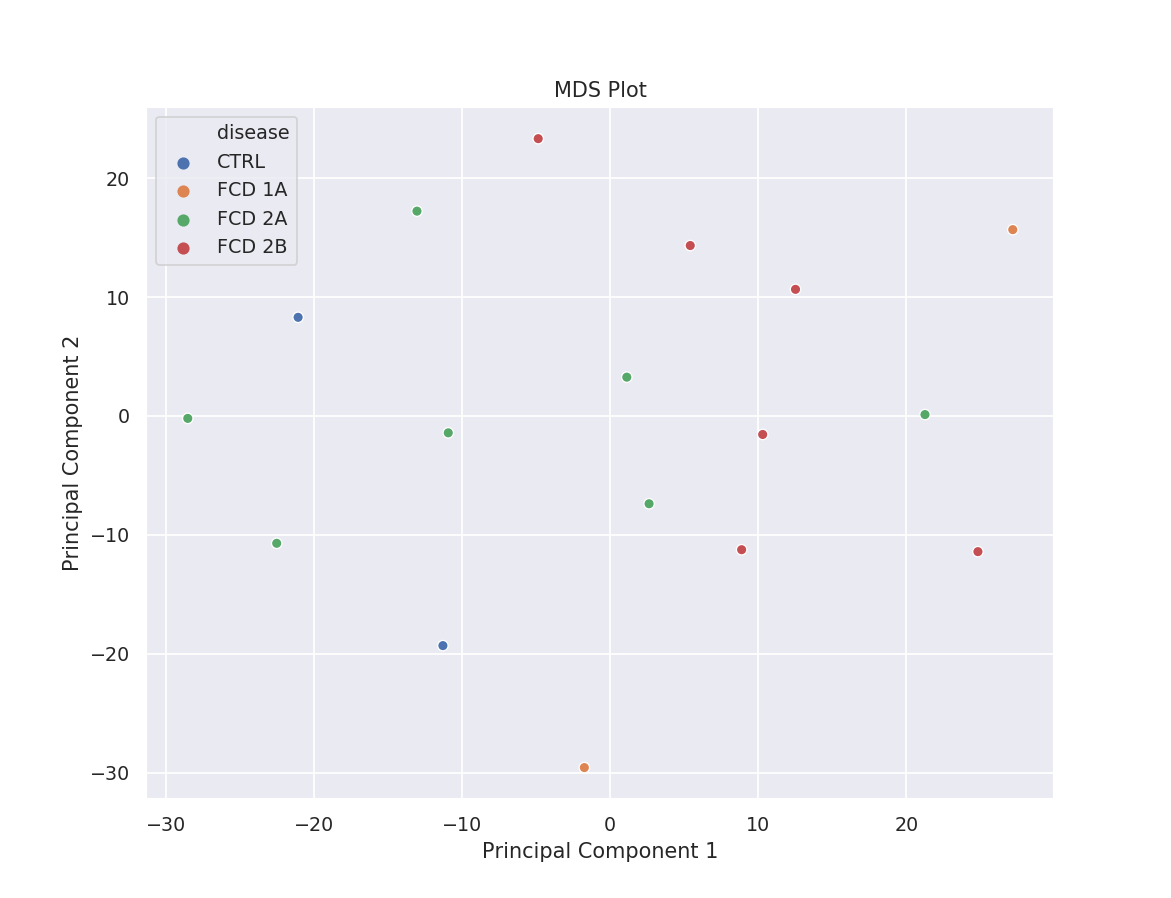

In [73]:
%matplotlib notebook
preproidat.plt_mds(betaquant_10000, pheno, n_components=2, group='disease', components=(0,1)) 

<IPython.core.display.Javascript object>


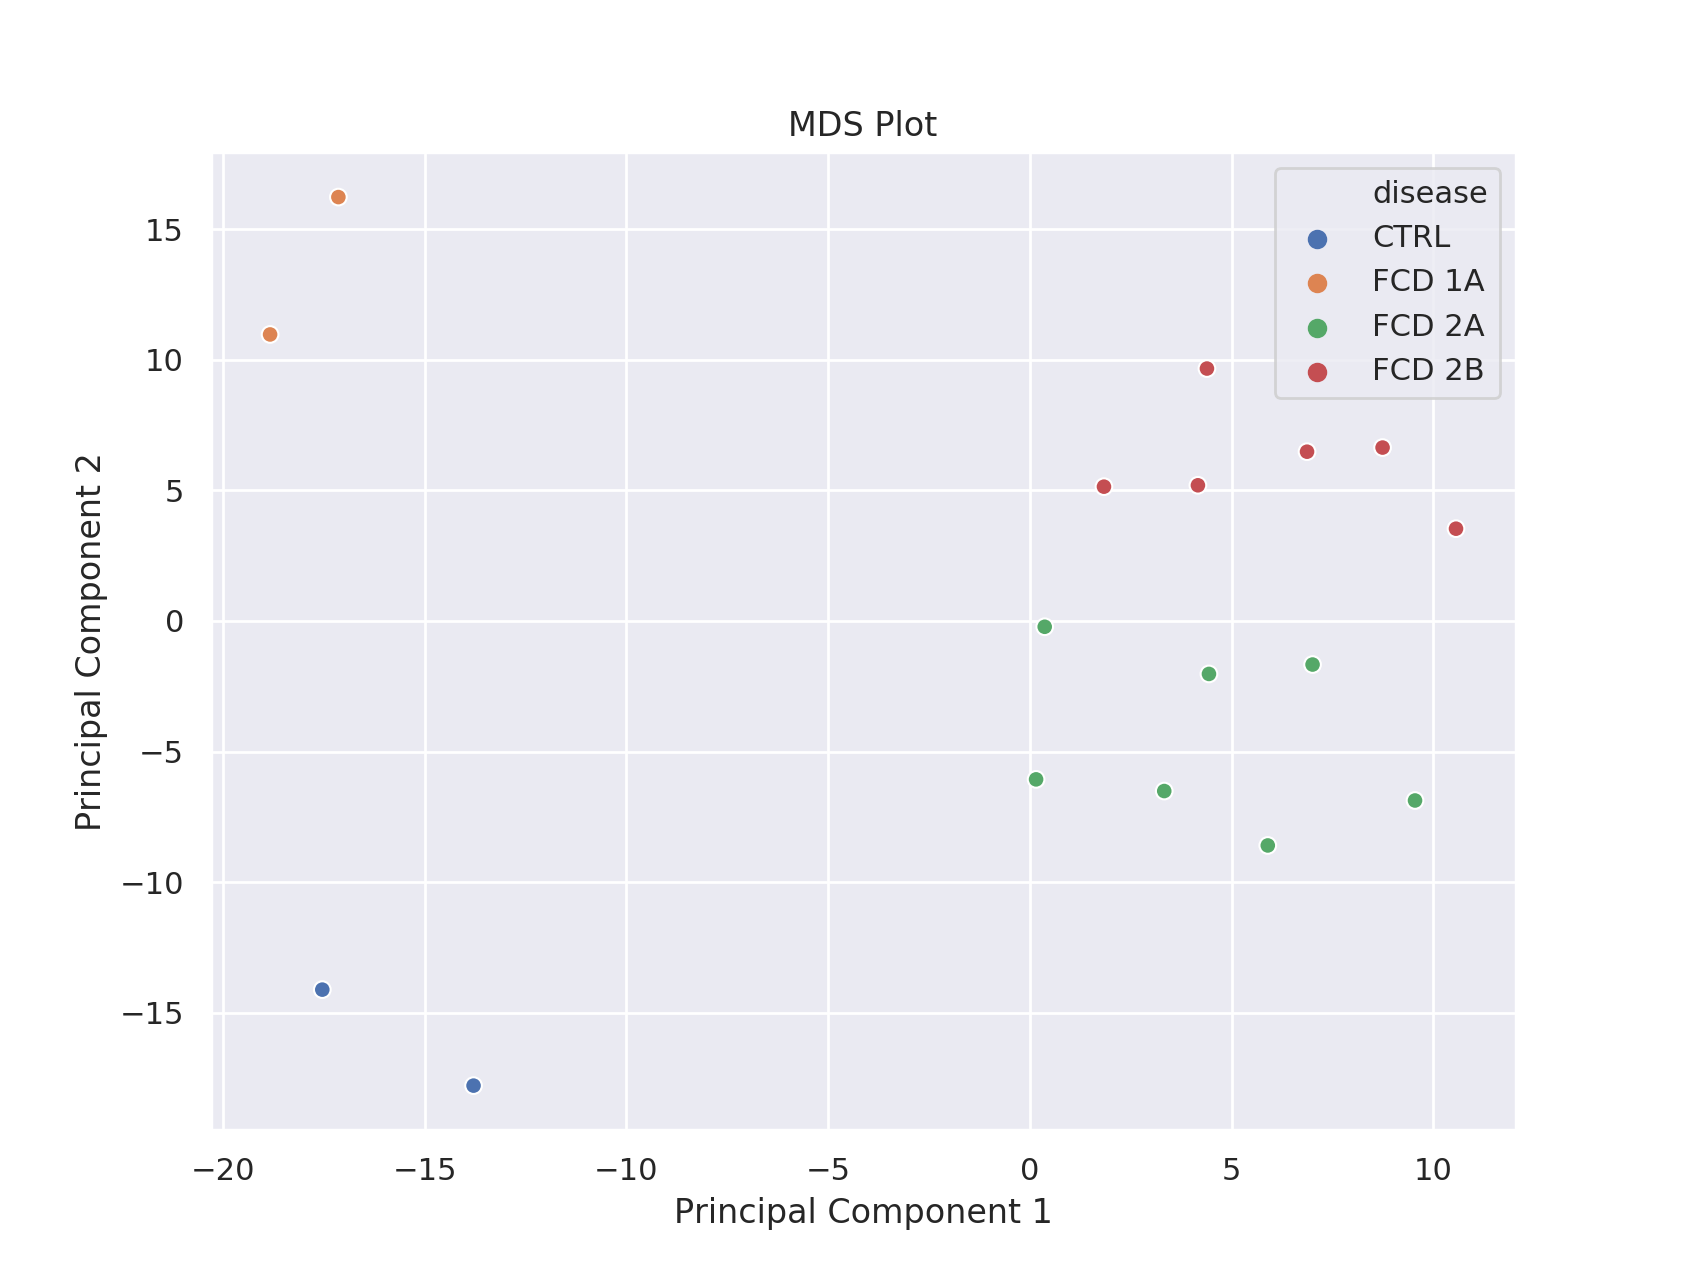

In [175]:
%matplotlib notebook
preproidat.plt_mds(betaquant_10000, pheno, n_components=2, group='disease', components=(0,1)) 

In [371]:
from rpy2.robjects.packages import importr
importr('champ')

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Error in loadNamespace(name) : there is no package called ‘champ’




RRuntimeError: Error in loadNamespace(name) : there is no package called ‘champ’


# Enmix pipeline

In [275]:
import importlib
importlib.reload(IDAT_Processor)

<module 'IDAT_Processor' from '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IDAT_Processor.py'>

In [276]:
import IDAT_Processor
from IDAT_Processor import PreProcessIDATs

In [277]:
preproidat=PreProcessIDATs(idat_dir=path)

In [386]:
pheno, beta_final=preproidat.preprocess_enmix_pipeline(n_cores=12, pipeline='minfi', noob=False, qc_only=False, use_cache=True, bmiq=False)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[read.metharray.sheet] Found the following CSV files:




[1]
 "/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS//pheno_sheet.csv"


42
 
 samples with percentage of low quality CpG value greater than 
 
0.05
 
 or bisulfite intensity less than 
 
-4383.478
 


61761
 
 CpGs with percentage of low quality value greater than 
 
0.05
 


Ploting qc_sample.jpg ...
Done

Ploting qc_CpG.jpg ...
Done

Identifying ourlier samples based on beta or total intensity values...

After excluding low quality samples and CpGs

0
 
 samples are outliers based on averaged total intensity value
 


0
 
 samples are outliers in beta value distribution
 


0
 
 outlier samples were added into badsample list

Ploting freqpolygon_beta_beforeQC.jpg ...
Done

Ploting freqpolygon_beta_afterQC.jpg ...
Done

38
 
 samples with percentage of low quality CpG value greater
     than 
 
0.05
 
 or bisulfite intensity less than 
 
-4383.478
 


53355
 
 CpGs with percentage of low quality value greater than 
 
0.05
 


After excluding overl

In [387]:
preproidat.convert_sets(mset=True, rset=True)

R object with classes: ('GenomicRatioSet',) mapped to:
<RS4 - Python:0x7f379c2fbe88 / R:0x7f3aac013880>

In [388]:
betanoob = preproidat.compute_betas(mset=False, rgset=False, grset=True, rset=False);betanoob

202818860117_R08C01  202818860046_R07C01  202148010052_R07C01  \
cg14817997             0.566639             0.900061             0.878903   
cg26928153             0.957663             0.890894             0.913722   
cg16269199             0.658884             0.653863             0.653360   
cg13869341             0.918996             0.915364             0.883603   
cg14008030             0.796984             0.675032             0.806187   
...                         ...                  ...                  ...   
cg05999368             0.483828             0.343866             0.430336   
cg21106100             0.883584             0.277030             0.729305   
cg10488260             0.422897             0.077641             0.254321   
cg07587934             0.791866             0.734722             0.712641   
cg16855331             0.352039             0.250763             0.320372   

            202944920001_R04C01  203220070086_R06C01  202093110113_R04C01  \
cg14817997             0.899841             0.894265             0.752557   
cg26928153             0.935192             0.916035             0.802923   
cg16269199             0.776203             0.751724             0.502248   
cg13869341             0.849696             0.828819             0.841224   
cg14008030             0.691207             0.723578             0.864504   
...                         ...                  ...                  ...   
cg05999368             0.385388             0.351482             0.411048   
cg21106100             0.271152             0.263800             0.790313   
cg10488260             0.086969             0.057746             0.256097   
cg07587934             0.763087             0.819119             0.748251   
cg16855331             0.313766             0.365307             0.371330   

            202093110108_R07C01  202827620174_R03C01  203219730055_R04C01  \
cg14817997             0.906786             0.679204             0.908826   
cg26928153             0.914413             0.926293             0.904613   
cg16269199             0.764726             0.551958             0.767925   
cg13869341             0.788153             0.861468             0.791700   
cg14008030             0.797548             0.681897             0.657720   
...                         ...                  ...                  ...   
cg05999368             0.352053             0.480542             0.389636   
cg21106100             0.776468             0.351008             0.854002   
cg10488260             0.317139             0.069031             0.305540   
cg07587934             0.780438             0.779792             0.724291   
cg16855331             0.329739             0.305610             0.253626   

            202818860117_R01C01  ...  203220070086_R02C01  \
cg14817997             0.872057  ...             0.890976   
cg26928153             0.941799  ...             0.903458   
cg16269199             0.798085  ...             0.764040   
cg13869341             0.795476  ...             0.820007   
cg14008030             0.681957  ...             0.739933   
...                         ...  ...                  ...   
cg05999368             0.328909  ...             0.389034   
cg21106100             0.290266  ...             0.816299   
cg10488260             0.075378  ...             0.348191   
cg07587934             0.746571  ...             0.752119   
cg16855331             0.226017  ...             0.345985   

            202944920001_R07C01  202148010052_R01C01  202818860117_R06C01  \
cg14817997             0.905383             0.901754             0.841848   
cg26928153             0.924372             0.875572             0.931594   
cg16269199             0.792199             0.767161             0.813112   
cg13869341             0.837891             0.879498             0.884227   
cg14008030             0.644435             0.741610             0.775340   
...                         ...           

In [389]:
targets=pandas2ri.ri2py(robjects.r['as'](pheno,'data.frame'));targets

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



Basename             txt_idat  \
0   /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R08C01   
1   /home/Deep_Learner/private/network/Methyl_Arra...  202148010053_R02C01   
2   /home/Deep_Learner/private/network/Methyl_Arra...  202148010053_R03C01   
3   /home/Deep_Learner/private/network/Methyl_Arra...  202148010053_R05C01   
4   /home/Deep_Learner/private/network/Methyl_Arra...  202818860046_R01C01   
..                                                ...                  ...   
75  /home/Deep_Learner/private/network/Methyl_Arra...  203220070086_R04C01   
76  /home/Deep_Learner/private/network/Methyl_Arra...  203220070086_R05C01   
77  /home/Deep_Learner/private/network/Methyl_Arra...  203220070086_R06C01   
78  /home/Deep_Learner/private/network/Methyl_Arra...  203220070086_R07C01   
79  /home/Deep_Learner/private/network/Methyl_Arra...  203220070086_R08C01   

   Lokalisation disease       Sample    Center sex  age  \
0     occipital  FCD 1a       N83/03  Erlangen   f    7   
1     occipital  FCD 1a       N76/04  Erlangen   f   11   
2     occipital  FCD 1a      N714/05  Erlangen   m   15   
3     occipital  FCD 1a       N69/03  Erlangen   m    2   
4     occipital  FCD 1a   874/06 IV3       VGT   f    5   
..          ...     ...          ...       ...  ..  ...   
75      frontal     TSC   2174/14 IV      Mara   m    3   
76     temporal     TSC   1439/14 I1       VGT   m   15   
77     temporal     TSC    699/16 I1      Mara   f    2   
78      frontal     TSC  1467/16 III      Mara   m    1   
79      frontal     TSC    1061/17 7      Mara   f    3   

                                            filenames  
0   /home/Deep_Learner/private/network/Methyl_Arra...  
1   /home/Deep_Learner/private/network/Methyl_Arra...  
2   /home/Deep_Learner/private/network/Methyl_Arra...  
3   /home/Deep_Learner/private/network/Methyl_Arra...  
4   /home/Deep_Learner/private/network/Methyl_Arra...  
..                                                ...  
75  /home/Deep_Learner/private/network/Methyl_Arra...  
76  /home/Deep_Learner/private/network/Methyl_Arra...  
77  /home/Deep_Learner/private/network/Methyl_Arra...  
78  /home/Deep_Learner/private/network/Methyl_Arra...  
79  /home/Deep_Learner/private/network/Methyl_Arra...  

[80 rows x 9 columns]

<IPython.core.display.Javascript object>


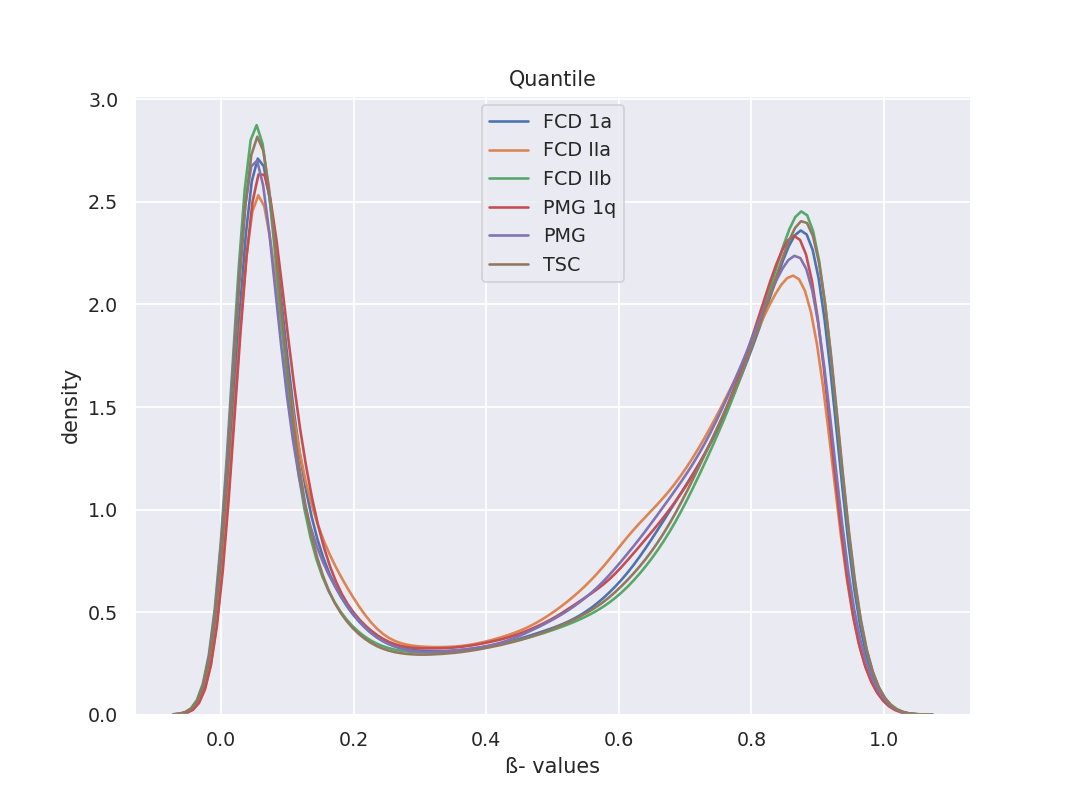

In [442]:
## visualise what the data looks like before and after normalisation
%matplotlib notebook
preproidat.plt_mean_betas({'Quantile':betanoob}, targets, 'disease')

In [221]:
#preproidat.ensure_ordering(cutoff=0.01)

R object with classes: ('GenomicRatioSet',) mapped to:
<RS4 - Python:0x7f40bb8a6b48 / R:0x7f3a452bd6b0>

In [391]:
preproidat.dropSexRelatedProbes()

R object with classes: ('GenomicRatioSet',) mapped to:
<RS4 - Python:0x7f3fa550dbc8 / R:0x7f3e022ef608>

In [392]:
preproidat.dropLociWithSnps()

R object with classes: ('GenomicRatioSet',) mapped to:
<RS4 - Python:0x7f3fa550dc88 / R:0x7f3adf316c70>

In [393]:
preproidat.excludeXreactiveprobes(array_type='EPIC')

EPIC
McCartney2016 326267
Zhou2016 178671
Polymorphism 346033
CrossHybridization 108172
BaseColorChange 406
RepeatSequenceElements 0


R object with classes: ('GenomicRatioSet',) mapped to:
<RS4 - Python:0x7f3f9ec74148 / R:0x7f3ae9949fb8>

In [394]:
betanoob = preproidat.compute_betas(mset=False, rgset=False, grset=True, rset=False);betanoob

202818860117_R08C01  202818860046_R07C01  202148010052_R07C01  \
cg16535257             0.615815             0.158363             0.319287   
cg06325811             0.608731             0.627647             0.673699   
cg16619049             0.040060             0.078644             0.094887   
cg18147296             0.811308             0.740025             0.833813   
cg13938959             0.958934             0.850693             0.928634   
...                         ...                  ...                  ...   
cg27236246             0.937697             0.824527             0.835962   
cg05615487             0.957855             0.864478             0.864269   
cg22122449             0.928881             0.900441             0.866038   
cg08423507             0.845327             0.897989             0.710707   
cg19565306             0.017842             0.043038             0.111868   

            202944920001_R04C01  203220070086_R06C01  202093110113_R04C01  \
cg16535257             0.374342             0.275281             0.632353   
cg06325811             0.569763             0.519978             0.709409   
cg16619049             0.157203             0.184366             0.095085   
cg18147296             0.784083             0.795503             0.808940   
cg13938959             0.856485             0.866898             0.927450   
...                         ...                  ...                  ...   
cg27236246             0.780516             0.795376             0.836658   
cg05615487             0.916998             0.889115             0.898584   
cg22122449             0.888520             0.884399             0.898857   
cg08423507             0.831464             0.866107             0.889617   
cg19565306             0.049524             0.047486             0.110934   

            202093110108_R07C01  202827620174_R03C01  203219730055_R04C01  \
cg16535257             0.338427             0.563143             0.462690   
cg06325811             0.682769             0.531801             0.525586   
cg16619049             0.128558             0.080851             0.067227   
cg18147296             0.849476             0.803444             0.822377   
cg13938959             0.927713             0.952488             0.913919   
...                         ...                  ...                  ...   
cg27236246             0.778547             0.914847             0.782123   
cg05615487             0.880065             0.902159             0.873166   
cg22122449             0.871624             0.926395             0.851761   
cg08423507             0.806272             0.916190             0.844080   
cg19565306             0.086922             0.027802             0.057384   

            202818860117_R01C01  ...  203220070086_R02C01  \
cg16535257             0.369475  ...             0.200990   
cg06325811             0.716370  ...             0.643382   
cg16619049             0.120160  ...             0.204440   
cg18147296             0.882829  ...             0.836508   
cg13938959             0.889460  ...             0.912048   
...                         ...  ...                  ...   
cg27236246             0.756008  ...             0.783157   
cg05615487             0.876312  ...             0.884929   
cg22122449             0.872359  ...             0.868654   
cg08423507             0.617051  ...             0.836686   
cg19565306             0.036376  ...             0.056402   

            202944920001_R07C01  202148010052_R01C01  202818860117_R06C01  \
cg16535257             0.164012             0.349988             0.236226   
cg06325811             0.446891             0.706100             0.409193   
cg16619049             0.160327             0.094567             0.089391   
cg18147296             0.801299             0.853258             0.769565   
cg13938959             0.893324             0.918801             0.929444   
...                         ...           

<IPython.core.display.Javascript object>


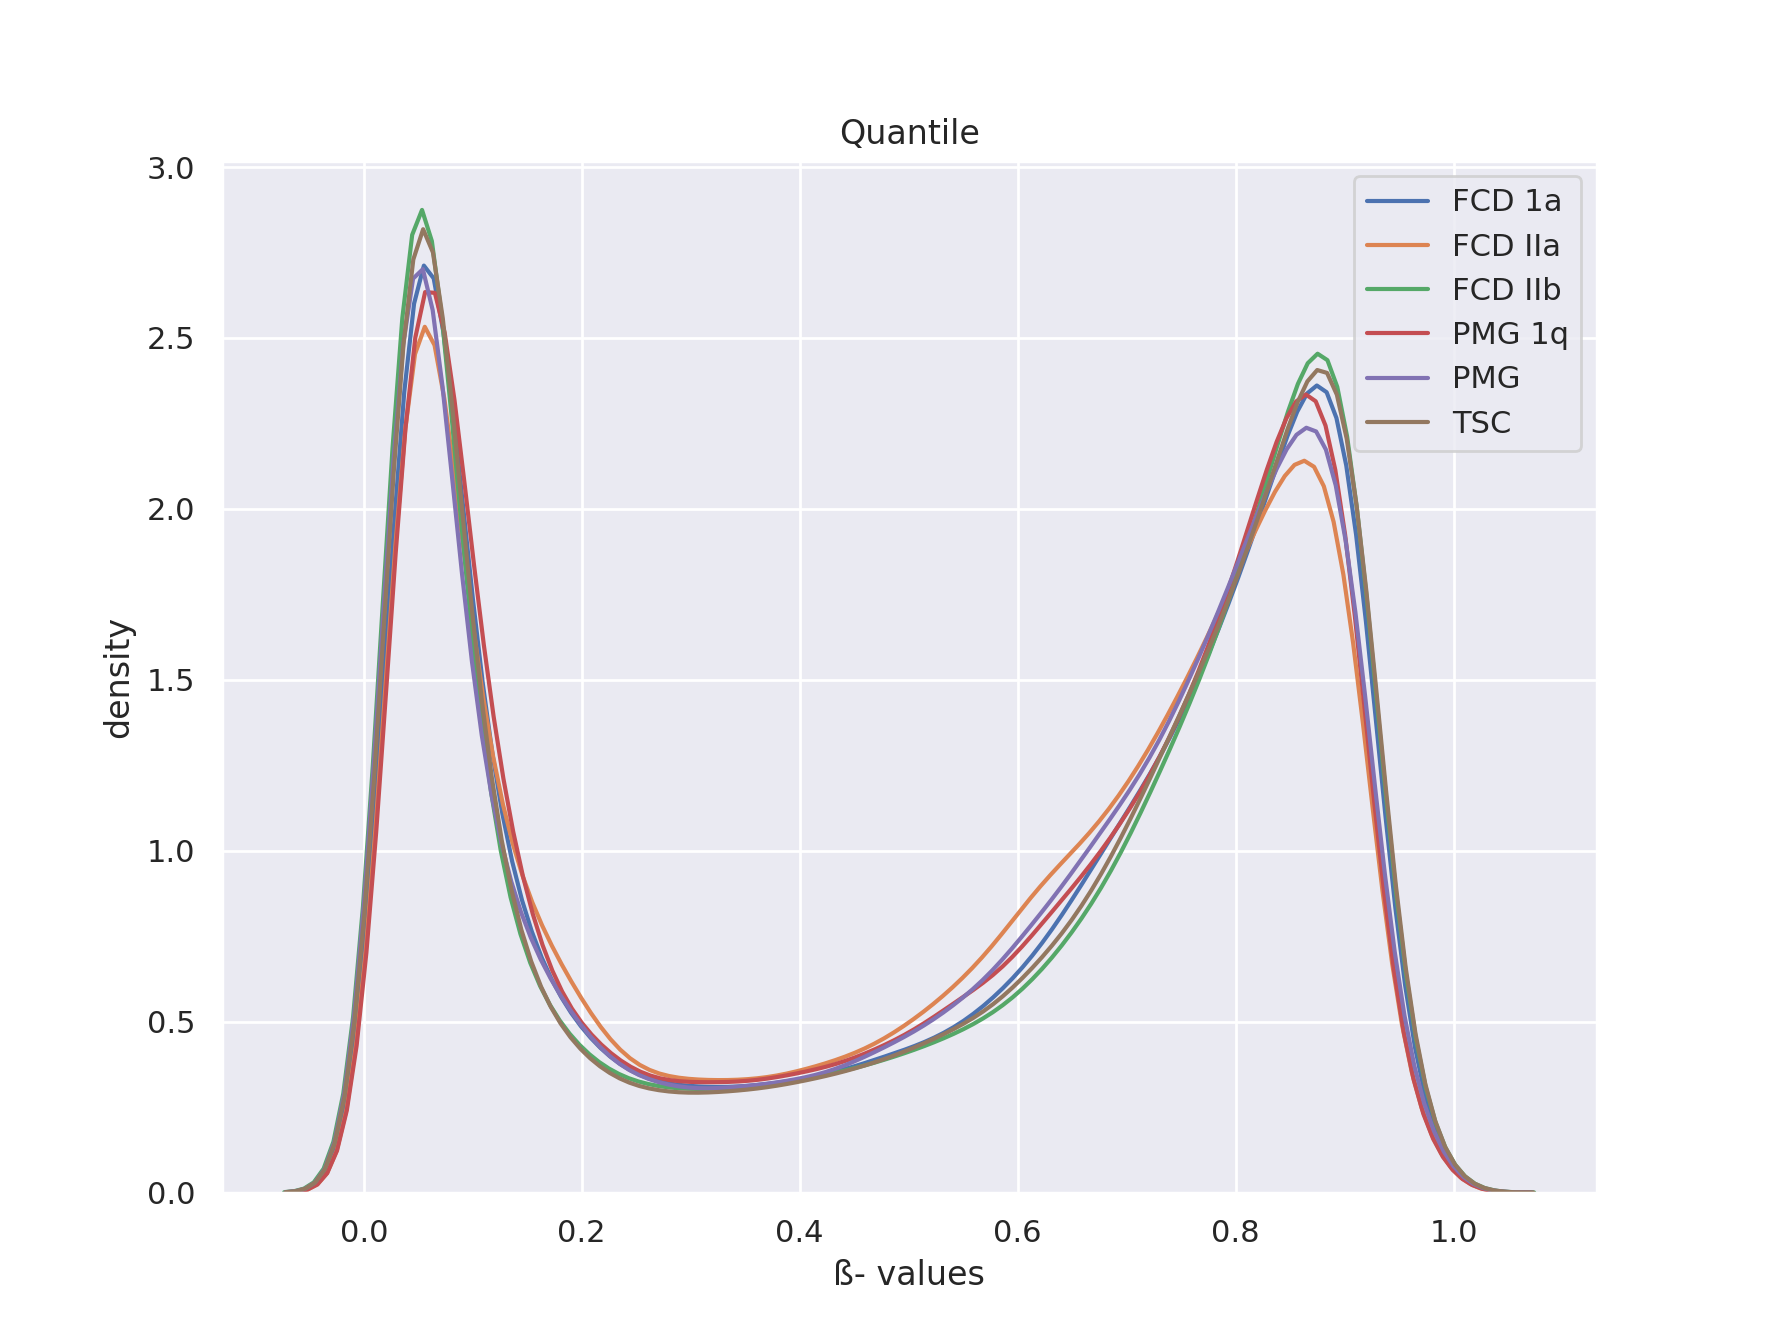

In [395]:
## visualise what the data looks like before and after normalisation
%matplotlib notebook
preproidat.plt_mean_betas({'Quantile':betanoob}, targets, 'disease')

In [443]:
mval_noob=preproidat.compute_mvals(mset=False, rgset=False, grset=True, rset=False);mval_noob

202818860117_R08C01  202818860046_R07C01  202148010052_R07C01  \
cg16535257             0.680694            -2.409965            -1.092191   
cg06325811             0.637642             0.753281             1.045900   
cg16619049            -4.582719            -3.550349            -3.253812   
cg18147296             2.104214             1.509198             2.326915   
cg13938959             4.545427             2.510352             3.701804   
...                         ...                  ...                  ...   
cg27236246             3.911753             2.232319             2.349406   
cg05615487             4.506379             2.673302             2.670733   
cg22122449             3.707182             3.177005             2.692605   
cg08423507             2.450285             3.137973             1.296720   
cg19565306            -5.782621            -4.474771            -2.988972   

            202944920001_R04C01  203220070086_R06C01  202093110113_R04C01  \
cg16535257            -0.741017            -1.396518             0.782407   
cg06325811             0.405229             0.115351             1.287626   
cg16619049            -2.422557            -2.145345            -3.250490   
cg18147296             1.860529             1.959786             2.082006   
cg13938959             2.577222             2.703329             3.676228   
...                         ...                  ...                  ...   
cg27236246             1.830315             1.958661             2.356742   
cg05615487             3.465694             3.003313             3.147361   
cg22122449             2.994620             2.935542             3.151694   
cg08423507             2.302592             2.693460             3.010661   
cg19565306            -4.262438            -4.326170            -3.002589   

            202093110108_R07C01  202827620174_R03C01  203219730055_R04C01  \
cg16535257            -0.967056             0.366342            -0.215707   
cg06325811             1.105866             0.183766             0.147780   
cg16619049            -2.760981            -3.506959            -3.794407   
cg18147296             2.496585             2.031256             2.210977   
cg13938959             3.681878             4.325331             3.408306   
...                         ...                  ...                  ...   
cg27236246             1.813787             3.425407             1.843884   
cg05615487             2.875358             3.204874             2.783309   
cg22122449             2.763327             3.653762             2.522523   
cg08423507             2.057231             3.450445             2.436575   
cg19565306            -3.392942            -5.127977            -4.037944   

            202818860117_R01C01  ...  203220070086_R02C01  \
cg16535257            -0.771079  ...            -1.991088   
cg06325811             1.336692  ...             0.851298   
cg16619049            -2.872290  ...            -1.960289   
cg18147296             2.913514  ...             2.355158   
cg13938959             3.008357  ...             3.374323   
...                         ...  ...                  ...   
cg27236246             1.631566  ...             1.852654   
cg05615487             2.824740  ...             2.943044   
cg22122449             2.772827  ...             2.725408   
cg08423507             0.688239  ...             2.357041   
cg19565306            -4.727406  ...            -4.064348   

            202944920001_R07C01  202148010052_R01C01  202818860117_R06C01  \
cg16535257            -2.349682            -0.893159            -1.692980   
cg06325811            -0.307643             1.264549            -0.529903   
cg16619049            -2.388813            -3.259198            -3.348636   
cg18147296             2.011738             2.539705             1.739683   
cg13938959             3.065953             3.500210             3.719527   
...                         ...           

Dataframe needed to be transposed


<IPython.core.display.Javascript object>


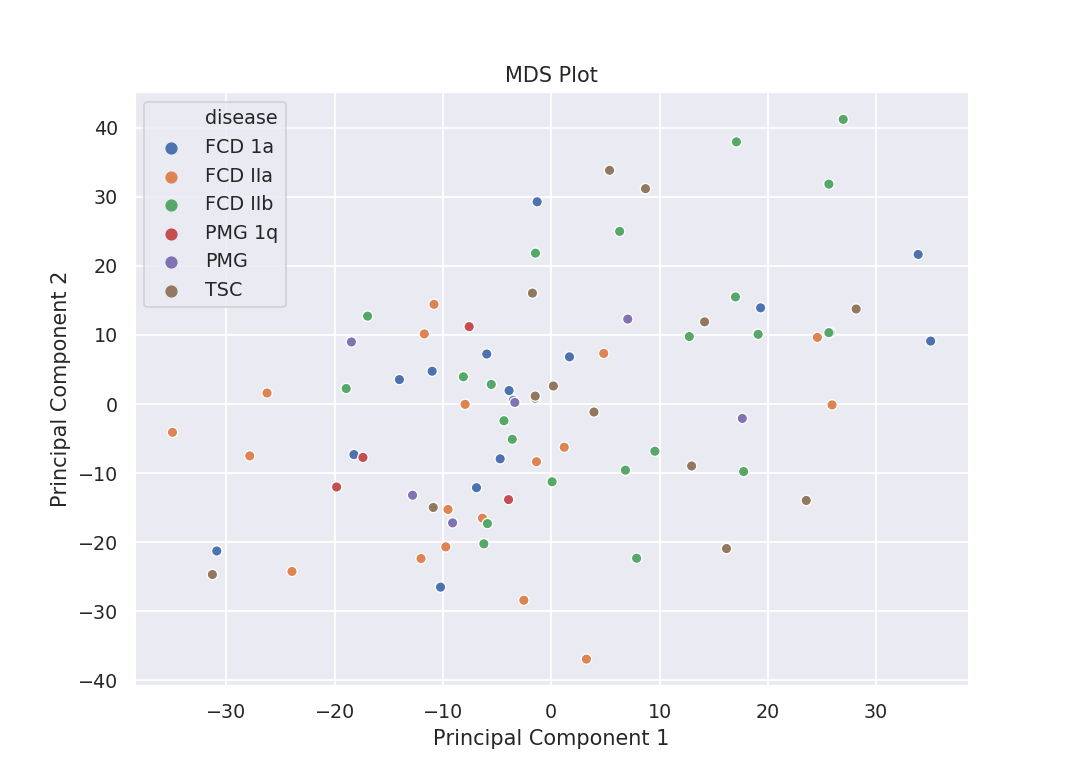

In [444]:
%matplotlib notebook
preproidat.plt_mds(mval_noob, targets, n_components=1000, group='disease', components=(0,1)) 

In [291]:
dmps_py=preproidat.dmp_find(path='test.csv',phenotype='disease', save_csv=True, number=50000)

NameError: name 'pheno' is not defined

In [403]:
betanoob_50000=betanoob.loc[dmps_py['Name'].tolist()]; betanoob_50000

202818860117_R08C01  202818860046_R07C01  202148010052_R07C01  \
cg13871588             0.011458             0.016321             0.014326   
cg21690391             0.992621             0.985850             0.985497   
cg08134618             0.010063             0.017602             0.013146   
cg07031916             0.005882             0.010185             0.011381   
cg04056025             0.009925             0.018429             0.014316   
...                         ...                  ...                  ...   
cg25265081             0.955276             0.934537             0.896013   
cg18407752             0.031032             0.047492             0.097843   
cg06237717             0.030222             0.064502             0.038007   
cg19924714             0.027602             0.037414             0.030118   
cg14020410             0.970999             0.900028             0.912810   

            202944920001_R04C01  203220070086_R06C01  202093110113_R04C01  \
cg13871588             0.017296             0.015552             0.019993   
cg21690391             0.986223             0.984359             0.981856   
cg08134618             0.017349             0.016143             0.017796   
cg07031916             0.011537             0.010267             0.010256   
cg04056025             0.017590             0.019776             0.017973   
...                         ...                  ...                  ...   
cg25265081             0.903918             0.901382             0.882356   
cg18407752             0.056791             0.067254             0.097481   
cg06237717             0.039984             0.036873             0.031289   
cg19924714             0.033096             0.036793             0.032437   
cg14020410             0.910132             0.920864             0.929723   

            202093110108_R07C01  202827620174_R03C01  203219730055_R04C01  \
cg13871588             0.013995             0.018009             0.015187   
cg21690391             0.986813             0.987178             0.986707   
cg08134618             0.016669             0.019788             0.016405   
cg07031916             0.009233             0.012766             0.012953   
cg04056025             0.017078             0.018846             0.018429   
...                         ...                  ...                  ...   
cg25265081             0.897430             0.943849             0.901121   
cg18407752             0.087157             0.054253             0.062652   
cg06237717             0.061270             0.044543             0.062699   
cg19924714             0.046933             0.029109             0.048333   
cg14020410             0.911599             0.960071             0.923196   

            202818860117_R01C01  ...  203220070086_R02C01  \
cg13871588             0.013286  ...             0.015339   
cg21690391             0.986185  ...             0.987018   
cg08134618             0.017764  ...             0.016665   
cg07031916             0.011048  ...             0.011012   
cg04056025             0.019367  ...             0.018495   
...                         ...  ...                  ...   
cg25265081             0.899829  ...             0.911769   
cg18407752             0.035383  ...             0.068795   
cg06237717             0.043141  ...             0.047205   
cg19924714             0.084470  ...             0.049089   
cg14020410             0.939267  ...             0.908219   

            202944920001_R07C01  202148010052_R01C01  202818860117_R06C01  \
cg13871588             0.017069             0.014730             0.012352   
cg21690391             0.986728             0.986225             0.987526   
cg08134618             0.019484             0.017139             0.015403   
cg07031916             0.013331             0.007028             0.008323   
cg04056025             0.016663             0.017838             0.016527   
...                         ...           

In [445]:
mvalnoob_50000=mval_noob.loc[dmps_py['Name'].tolist()]; mvalnoob_50000

202818860117_R08C01  202818860046_R07C01  202148010052_R07C01  \
cg13871588            -6.430839            -5.913372            -6.104452   
cg21690391             7.071591             6.122525             6.086399   
cg08134618            -6.620145            -5.802513            -6.230159   
cg07031916            -7.401076            -6.602615            -6.440761   
cg04056025            -6.640391            -5.735065            -6.105384   
...                         ...                  ...                  ...   
cg25265081             4.416796             3.835507             3.107110   
cg18407752            -4.964616            -4.325975            -3.204840   
cg06237717            -5.003982            -3.858321            -4.661695   
cg19924714            -5.138721            -4.685271            -5.009134   
cg14020410             5.065319             3.170375             3.388078   

            202944920001_R04C01  203220070086_R06C01  202093110113_R04C01  \
cg13871588            -5.828208            -5.984111            -5.615201   
cg21690391             6.161627             5.975750             5.757937   
cg08134618            -5.823793            -5.929462            -5.786426   
cg07031916            -6.420796            -6.591016            -6.592521   
cg04056025            -5.803470            -5.631286            -5.771887   
...                         ...                  ...                  ...   
cg25265081             3.233856             3.192217             2.906933   
cg18407752            -4.053856            -3.793787            -3.210769   
cg06237717            -4.585578            -4.707109            -4.952316   
cg19924714            -4.868648            -4.710339            -4.898631   
cg14020410             3.340189             3.540589             3.725680   

            202093110108_R07C01  202827620174_R03C01  203219730055_R04C01  \
cg13871588            -6.138626            -5.768939            -6.018944   
cg21690391             6.225554             6.266583             6.213877   
cg08134618            -5.882409            -5.630403            -5.905839   
cg07031916            -6.745613            -6.273057            -6.251753   
cg04056025            -5.846888            -5.702134            -5.735048   
...                         ...                  ...                  ...   
cg25265081             3.129189             4.071164             3.187979   
cg18407752            -3.388677            -4.123688            -3.903150   
cg06237717            -3.937447            -4.422922            -3.901996   
cg19924714            -4.343902            -5.059777            -4.299376   
cg14020410             3.366262             4.587650             3.587391   

            202818860117_R01C01  ...  203220070086_R02C01  \
cg13871588            -6.214676  ...            -6.004388   
cg21690391             6.157561  ...             6.248477   
cg08134618            -5.789023  ...            -5.882794   
cg07031916            -6.484056  ...            -6.488845   
cg04056025            -5.662032  ...            -5.729788   
...                         ...  ...                  ...   
cg25265081             3.167191  ...             3.369313   
cg18407752            -4.768846  ...            -3.758732   
cg06237717            -4.471168  ...            -4.335140   
cg19924714            -3.438102  ...            -4.275835   
cg14020410             3.950974  ...             3.306776   

            202944920001_R07C01  202148010052_R01C01  202818860117_R06C01  \
cg13871588            -5.847671            -6.063649            -6.321220   
cg21690391             6.216200             6.161749             6.306792   
cg08134618            -5.653165            -5.841660            -5.998210   
cg07031916            -6.209681            -7.142468            -6.896676   
cg04056025            -5.882936            -5.782944            -5.894990   
...                         ...           

Dataframe needed to be transposed


<IPython.core.display.Javascript object>


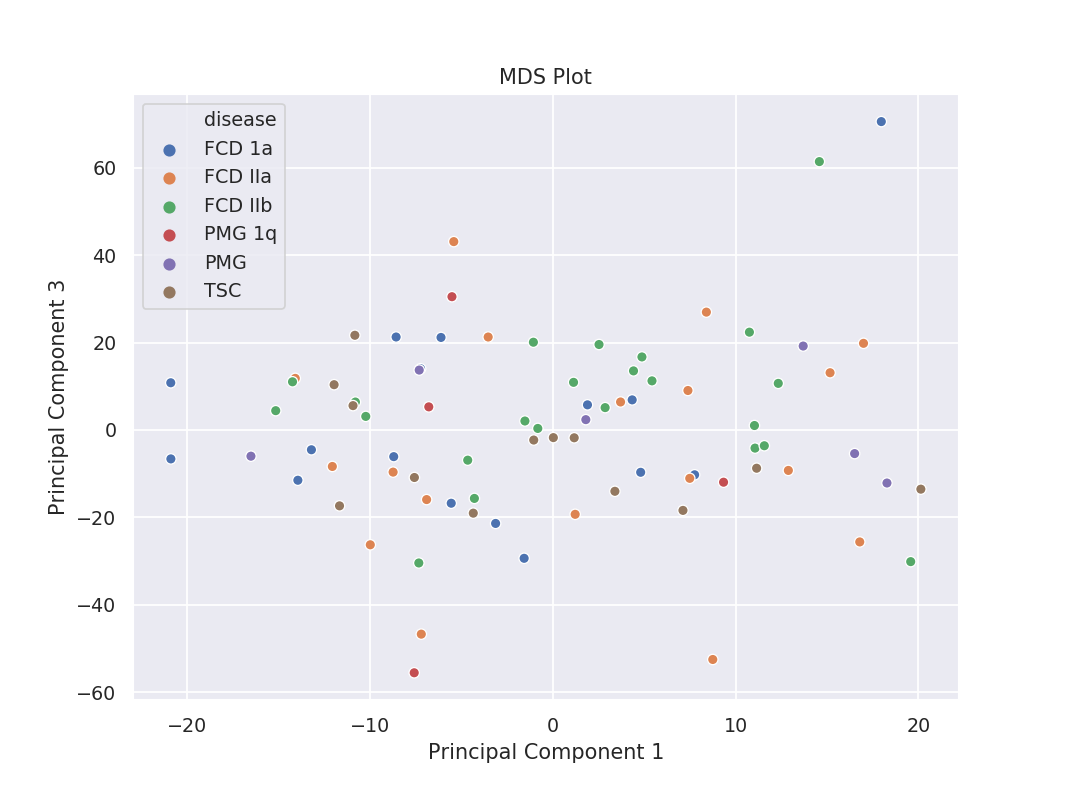

In [446]:
%matplotlib notebook
preproidat.plt_mds(mvalnoob_50000, targets, n_components=55, group='disease', components=(0,2)) 

In [ ]:
bump_dmrs_py=preproidat.dmr_find_bumphunter(path='testdmr.csv', n_cores=4, cutoff=0.4, iterations=0, phenotype='disease', save_csv=True)

In [ ]:
bump_dmrs_py

In [ ]:
# plot the top 4 most significantly differentially methylated CpGs 
par(mfrow=c(2,2))
sapply(rownames(DMPs)[1:4], function(cpg){
  plotCpg(bVals, cpg=cpg, pheno=targets$Sample_Group, ylab = "Beta values")
})

# Visualizing data


In [158]:
import umap
import time
from sklearn.preprocessing import LabelEncoder
time_start = time.time()

reducer = umap.UMAP(n_neighbors=15,
                      min_dist=0,
                      n_components=2,
                      metric='correlation'
                      )

embedding=reducer.fit_transform(betaquant_10000.transpose(), LabelEncoder().fit_transform(pheno['disease'].reset_index(drop=True).to_numpy()))

print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 0.29543542861938477 seconds


<IPython.core.display.Javascript object>


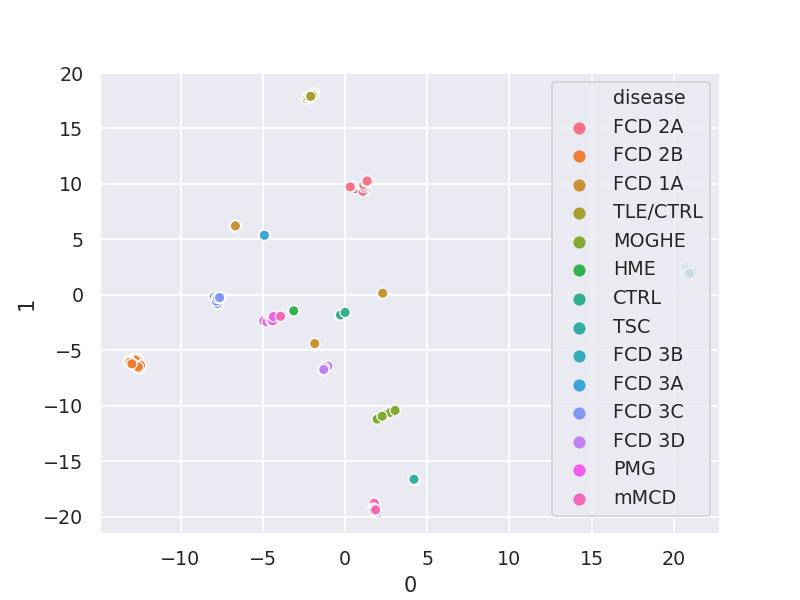

In [159]:
%matplotlib notebook
#plt.figure(figsize=(18, 15))
#plt.scatter(umap_results[:, 0], umap_results[:, 1], 
            # c=phen_keepers['sex'].to_numpy(),           
           # cmap='tab10')
#plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6),)
#plt.gca().set_aspect('equal', 'datalim')
#plt.title('UMAP projection of the dataset', fontsize=24);
from seaborn import cubehelix_palette

import matplotlib.pyplot as plt
import seaborn as sns
group='disease'

X_transformed=pd.DataFrame(embedding)
X_transformed[group]=pheno[group].to_numpy()   

sns.scatterplot(0,1,hue=group, cmap=cubehelix_palette(as_cmap=True),data=X_transformed)






In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(betaquant_10000.transpose(), pheno['disease'], test_size=0.3, random_state=42)

In [161]:
y_train

36        MOGHE
157      FCD 3D
22     TLE/CTRL
177         PMG
121      FCD 3B
         ...   
81       FCD 2B
133      FCD 3D
14       FCD 2B
108       MOGHE
129      FCD 3A
Name: disease, Length: 120, dtype: object

In [162]:
import umap
from sklearn.preprocessing import LabelEncoder
import time
time_start = time.time()

mapper = umap.UMAP(n_neighbors=15,
                      min_dist=0,
                      n_components=2,
                      metric='correlation'
                      ).fit(X_train, LabelEncoder().fit_transform(y_train.to_numpy()))


print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 0.18784642219543457 seconds


In [163]:
test_embedding = mapper.transform(X_test);test_embedding

array([[ 5.27798   ,  4.9699655 ],
       [-4.2722187 ,  8.316545  ],
       [ 8.61117   , -5.00176   ],
       [ 4.4395857 ,  1.576061  ],
       [12.970499  , -2.3228414 ],
       [-3.923953  ,  7.8877664 ],
       [ 7.8753486 ,  7.3406644 ],
       [ 3.0525856 ,  5.157379  ],
       [ 7.467424  ,  7.770606  ],
       [17.799978  , 26.000074  ],
       [-3.1876287 , -8.628805  ],
       [ 7.8870907 ,  7.020263  ],
       [ 4.227436  ,  1.7280208 ],
       [-1.4176412 ,  0.4764667 ],
       [ 8.602791  , -4.975044  ],
       [18.346191  , 24.865618  ],
       [-4.342034  ,  7.9635053 ],
       [17.586367  , 25.188097  ],
       [ 1.8820968 , 13.668127  ],
       [ 6.782394  ,  8.794953  ],
       [17.872171  , 26.117905  ],
       [17.635122  , 25.807913  ],
       [ 4.2892413 ,  1.758406  ],
       [ 6.890024  ,  8.945923  ],
       [-3.237625  , -8.650916  ],
       [ 5.201575  ,  3.2289305 ],
       [18.371178  , 25.972675  ],
       [ 5.7384725 ,  0.31266993],
       [ 5.102287  ,

In [164]:
train_embedding= mapper.transform(X_train); train_embedding

array([[-6.1148486 , -9.952979  ],
       [ 8.001715  ,  8.449651  ],
       [17.948696  , 25.663576  ],
       [-4.6860704 ,  8.629001  ],
       [13.839597  , -2.1930294 ],
       [ 1.3136871 , 14.525652  ],
       [-3.6162016 , -9.502698  ],
       [ 0.9144987 , 14.117399  ],
       [ 1.1896123 , 14.398321  ],
       [13.552492  , -2.1372073 ],
       [ 5.019538  ,  2.6684425 ],
       [18.061861  , 25.56      ],
       [ 7.8640385 ,  8.509076  ],
       [ 5.1395407 ,  2.5668302 ],
       [18.193323  , 25.651018  ],
       [ 1.2410039 , 14.203386  ],
       [ 6.3337154 , -1.978444  ],
       [-3.3758316 , -9.245889  ],
       [ 1.142721  , 14.253946  ],
       [ 6.30242   , -1.9388217 ],
       [ 6.4261904 , -2.0758593 ],
       [ 4.989028  ,  2.4023204 ],
       [13.615118  , -2.084753  ],
       [13.652031  , -2.3163147 ],
       [ 1.0279899 , 13.985715  ],
       [-2.0995994 ,  1.6803365 ],
       [13.727733  , -2.538262  ],
       [18.086792  , 25.565683  ],
       [-6.1153817 ,

<IPython.core.display.Javascript object>


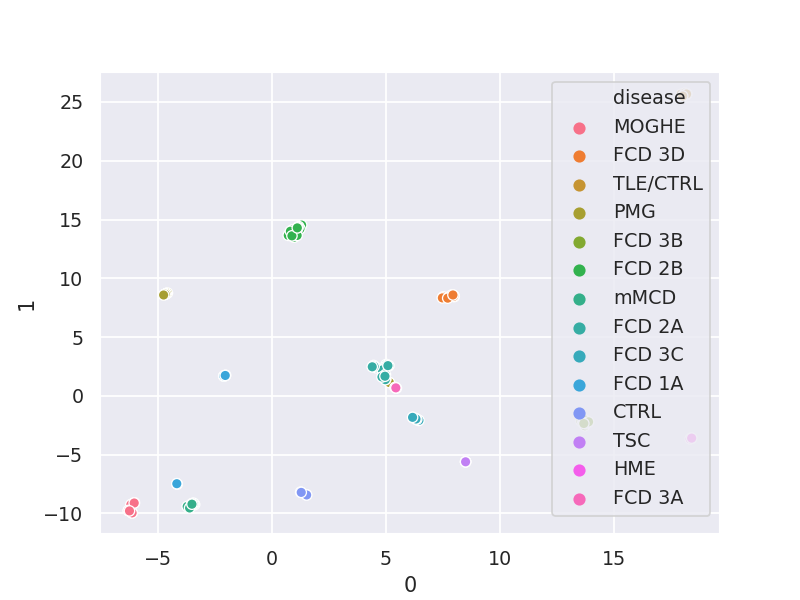

In [165]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import cubehelix_palette
grouping='disease'

X_trans=pd.DataFrame(train_embedding)
X_trans[grouping]=y_train.reset_index(drop=True)   
sns.scatterplot(0,1,hue=grouping, cmap=cubehelix_palette(as_cmap=True),data=X_trans)

<IPython.core.display.Javascript object>


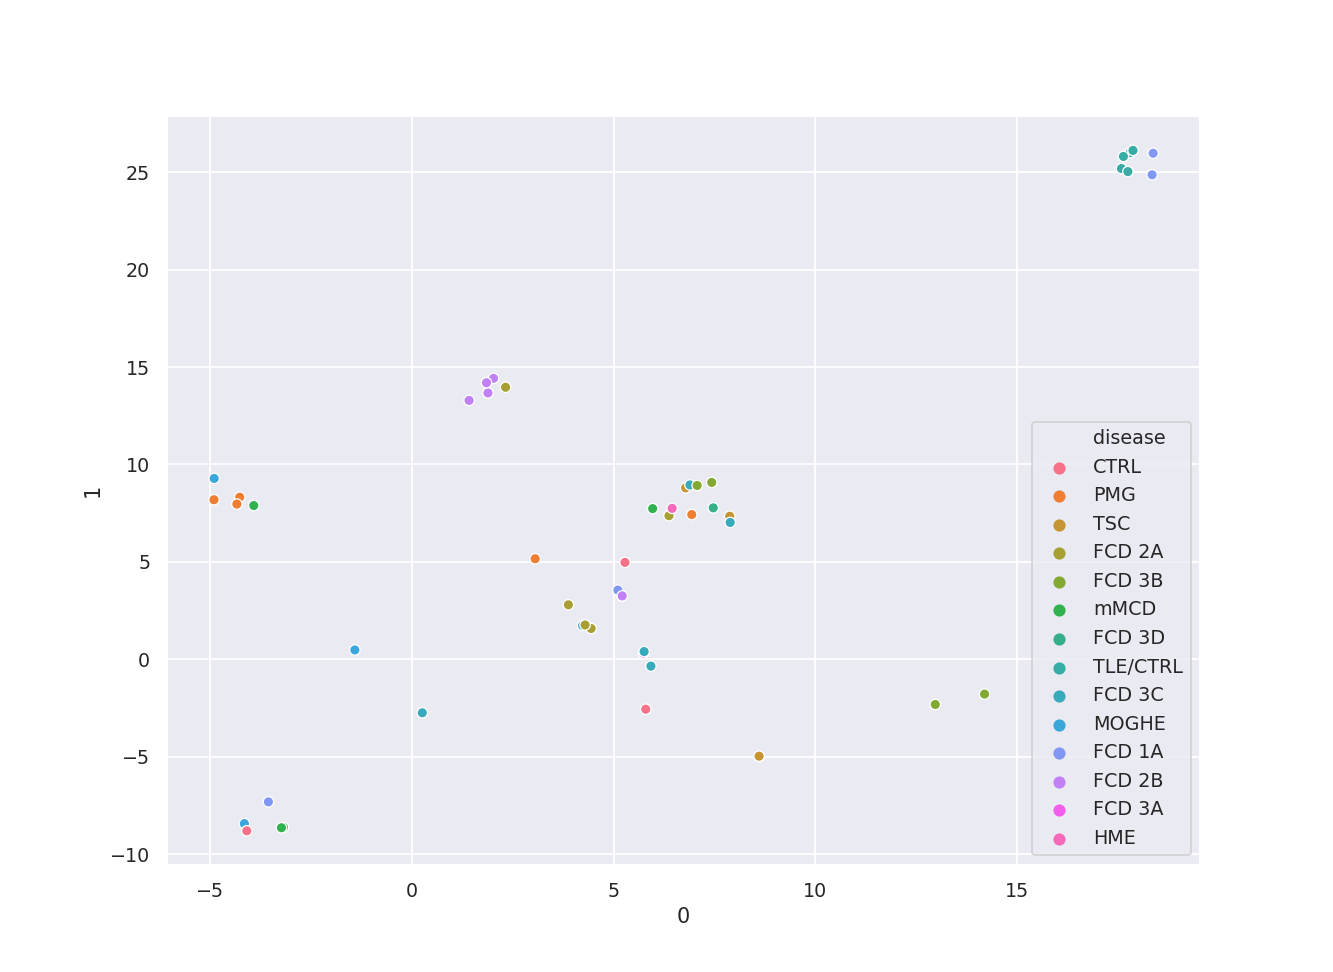

In [166]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import cubehelix_palette
grouping='disease'

X_trans=pd.DataFrame(test_embedding)
X_trans[grouping]=y_test.reset_index(drop=True)   
sns.scatterplot(0,1,hue=grouping, cmap=cubehelix_palette(as_cmap=True),data=X_trans)

<IPython.core.display.Javascript object>


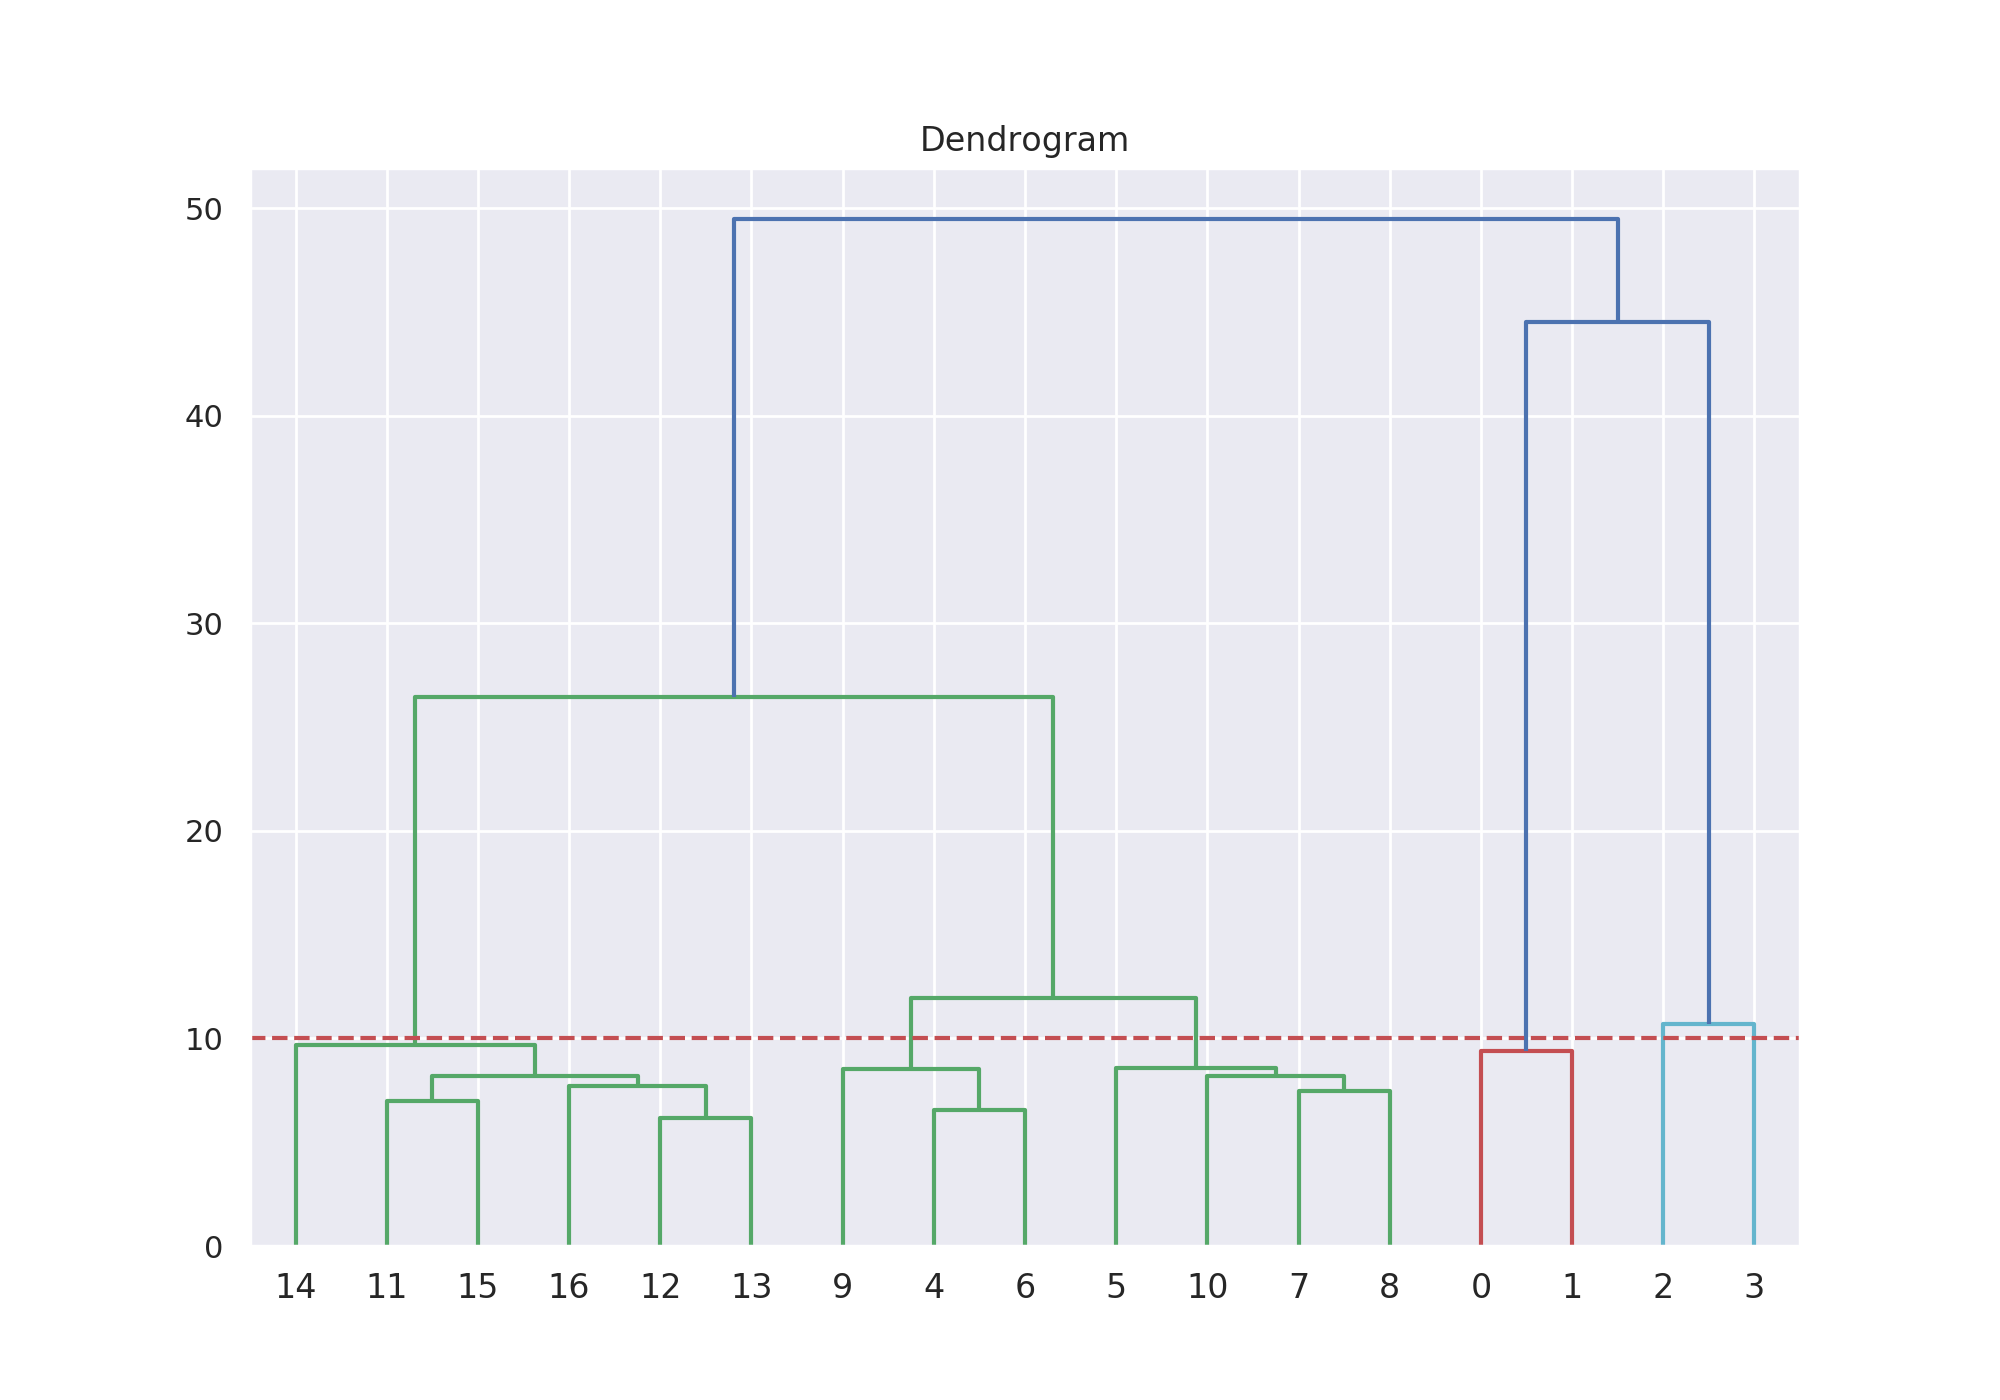

In [168]:
%matplotlib notebook
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(betaquant_10000.transpose().to_numpy(), method='ward'))
plt.axhline(y=10, color='r', linestyle='--')

In [173]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clusters=cluster.fit_predict(betaquant_10000.transpose().to_numpy())

<IPython.core.display.Javascript object>


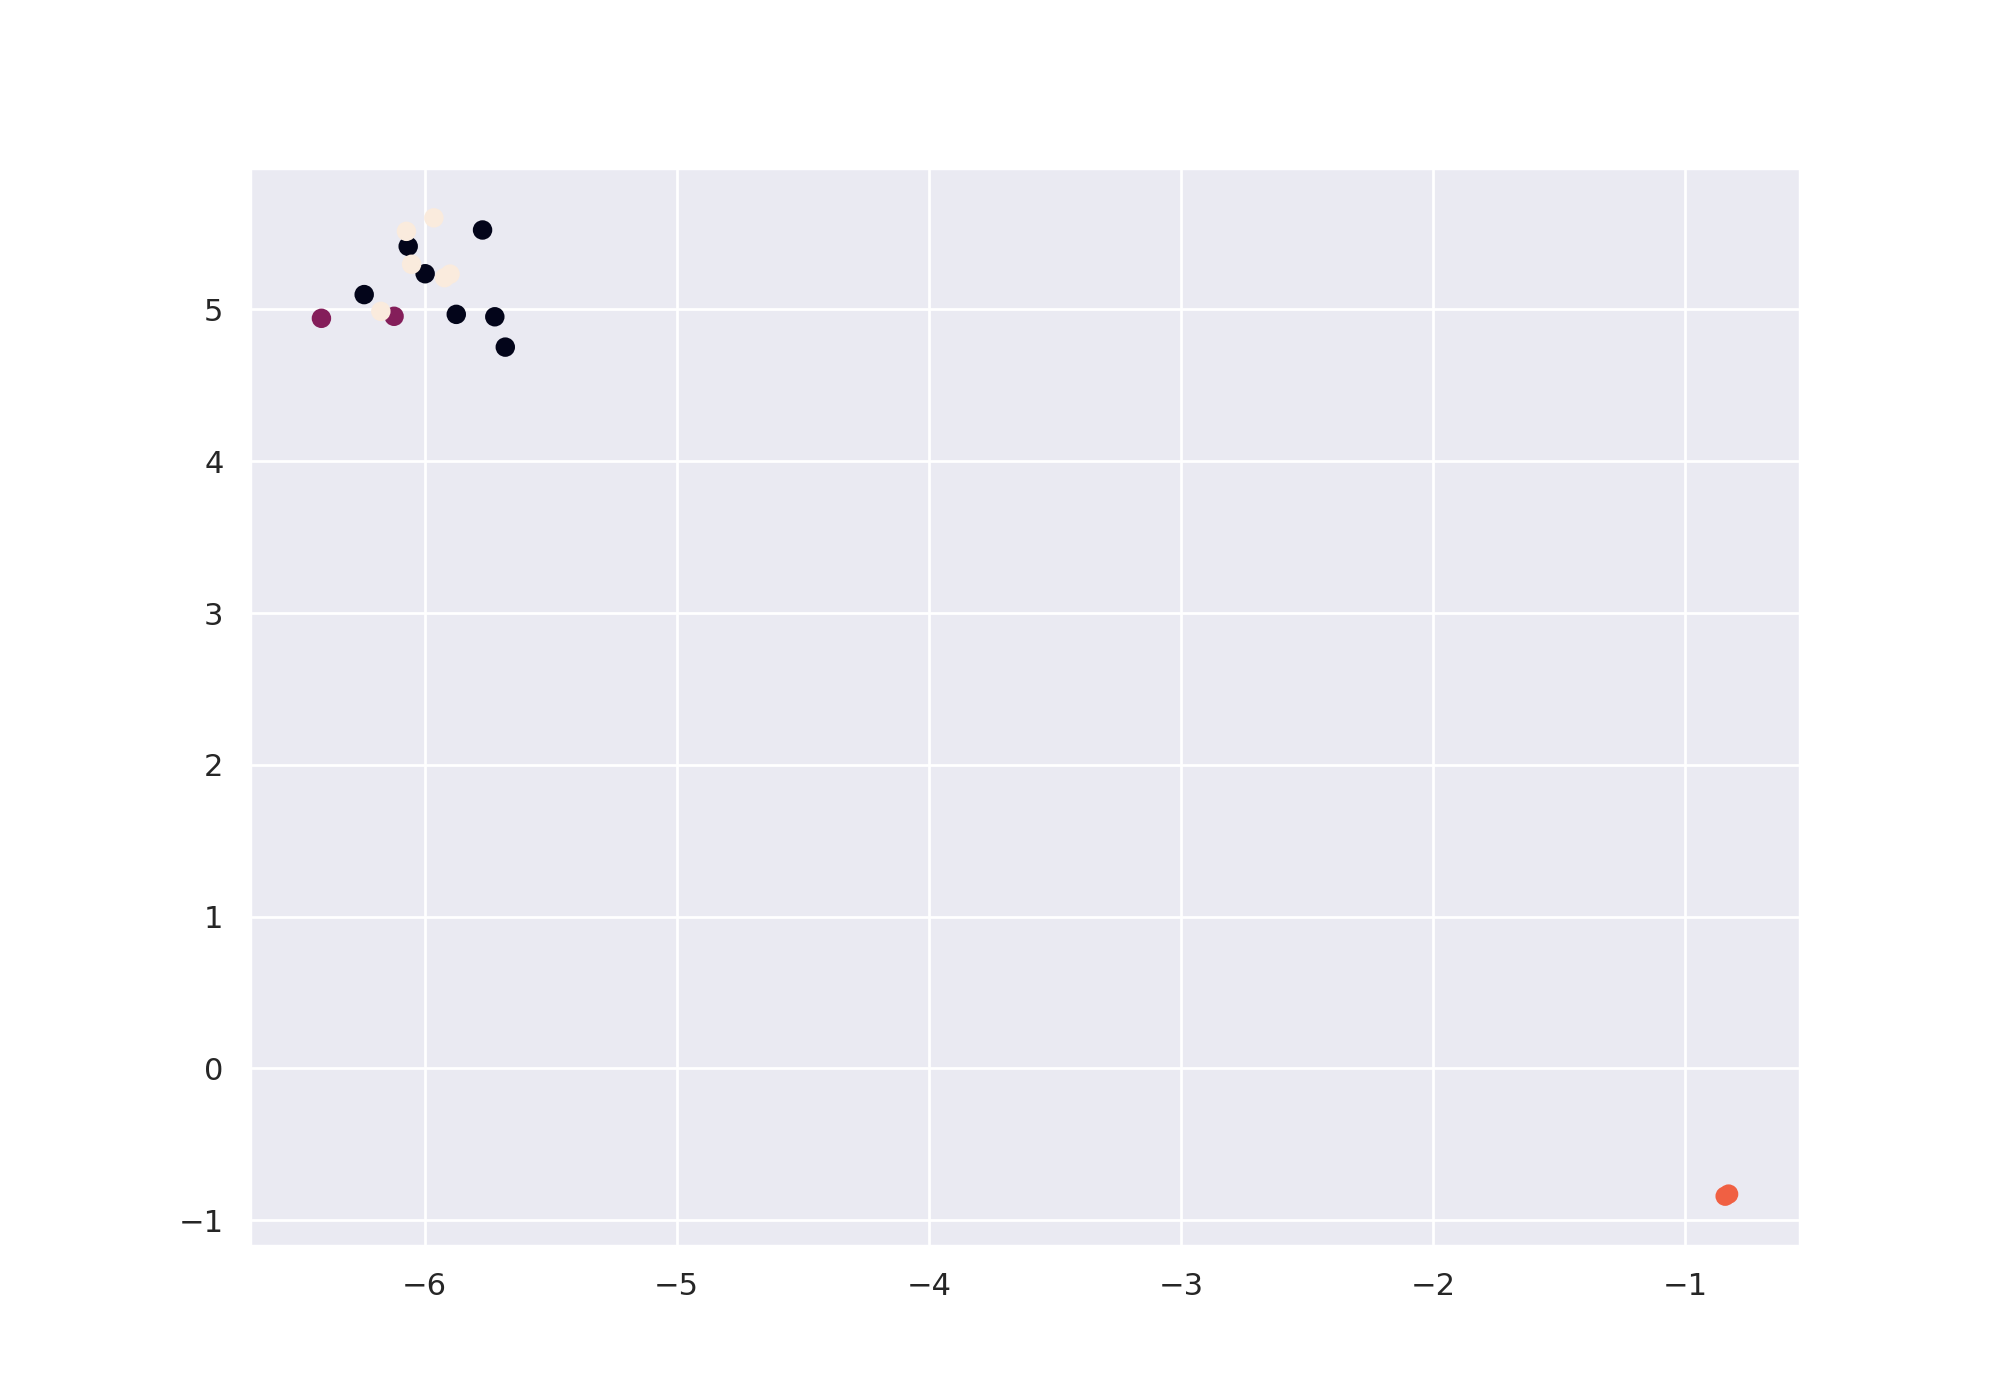

In [174]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import cubehelix_palette
grouping='disease'

#X_trans=pd.DataFrame(test_embedding)
#X_trans[grouping]=y_test.reset_index(drop=True)   
#sns.scatterplot(0,1,hue=grouping, cmap=cubehelix_palette(as_cmap=True),data=X_trans)


plt.figure(figsize=(10, 7))  
plt.scatter(betaquant_10000.iloc[0], betaquant_10000.iloc[1], c=clusters) 

In [159]:
betac=betaquant_10000.transpose()#betaraw.transpose()#
betac
#['disease']=targets['disease'];betaquant_500.transpose()

cg18182269  cg05016066  cg07385821  cg05819172  \
CTRL.202931510124_R04C01     -0.828293   -0.828293   -5.923284   -0.828293   
CTRL.202931510124_R06C01     -0.841726   -0.841726   -6.211655   -0.841726   
FCD 1A.202818860046_R04C01   -6.409265    4.941624   -0.913269   -5.737291   
FCD 1A.202818860046_R06C01   -6.121163    4.954881   -1.056953   -5.407214   
FCD 2A.202093110108_R07C01   -5.997916    5.235275   -5.944034   -5.510890   
FCD 2A.202093110108_R08C01   -6.065136    5.415699   -6.084053   -5.048851   
FCD 2A.202093110113_R01C01   -6.239678    5.097863   -5.674611   -5.366651   
FCD 2A.202093110113_R02C01   -5.770246    5.523516   -5.712287   -5.372277   
FCD 2A.202093110113_R03C01   -5.874440    4.967642   -5.494484   -4.894651   
FCD 2A.202093110113_R04C01   -5.680034    4.751860   -5.245979   -4.934928   
FCD 2A.202093110113_R05C01   -5.721609    4.951799   -5.232636   -4.404371   
FCD 2B.202093110113_R07C01   -5.921129    5.209115   -5.932973   -5.301180   
FCD 2B.202148010052_R01C01   -6.051677    5.297426   -5.739438   -5.580302   
FCD 2B.202148010052_R02C01   -6.072164    5.514662   -5.976833   -5.439631   
FCD 2B.202148010052_R04C01   -5.963226    5.603514   -5.655224   -5.554400   
FCD 2B.202148010052_R06C01   -6.173660    4.987600   -5.436111   -5.226419   
FCD 2B.202148010052_R07C01   -5.899187    5.232730   -5.210440   -5.218212   

                            cg08194879  cg23115219  cg12424785  cg21780294  \
CTRL.202931510124_R04C01     -0.828293   -0.828293   -0.828293   -5.416402   
CTRL.202931510124_R06C01     -0.841726   -0.841726   -0.841726   -5.940368   
FCD 1A.202818860046_R04C01   -5.581803   -5.107594   -5.974167   -0.913269   
FCD 1A.202818860046_R06C01   -5.198516   -5.453378   -4.983731   -1.056953   
FCD 2A.202093110108_R07C01   -5.906179   -5.487702   -5.586915   -5.682451   
FCD 2A.202093110108_R08C01   -6.115621   -5.446828   -6.314428   -5.417340   
FCD 2A.202093110113_R01C01   -5.380349   -4.813492   -5.759037   -5.317494   
FCD 2A.202093110113_R02C01   -5.402758   -5.024712   -5.846059   -5.225716   
FCD 2A.202093110113_R03C01   -5.265981   -3.942085   -5.006297   -3.824189   
FCD 2A.202093110113_R04C01   -5.113589   -4.904235   -4.866806   -4.263883   
FCD 2A.202093110113_R05C01   -4.774758   -4.410929   -5.898156   -5.607257   
FCD 2B.202093110113_R07C01   -5.572440   -5.196712   -5.591118   -5.620140   
FCD 2B.202148010052_R01C01   -5.411918   -5.148455   -4.993881   -6.003589   
FCD 2B.202148010052_R02C01   -5.794096   -5.358520   -5.950407   -5.138105   
FCD 2B.202148010052_R04C01   -5.101809   -5.060921   -5.799478   -5.298017   
FCD 2B.202148010052_R06C01   -5.070676   -5.292710   -5.898945   -5.726704   
FCD 2B.202148010052_R07C01   -5.588005   -5.091174   -6.137878   -5.582857   

                            cg23281527  cg19291355  ...  cg11891330  \
CTRL.202931510124_R04C01      6.147052   -4.791481  ...   -4.749327   
CTRL.202931510124_R06C01      5.539950   -4.720644  ...   -3.893614   
FCD 1A.202818860046_R04C01    1.716522   -0.913269  ...   -3.406395   
FCD 1A.202818860046_R06C01    2.352068   -1.056953  ...   -4.440008   
FCD 2A.202093110108_R07C01    5.630091   -4.585762  ...   -4.775434   
FCD 2A.202093110108_R08C01    5.850019   -4.670884  ...   -4.866976   
FCD 2A.202093110113_R01C01    5.414177   -4.402218  ...   -4.317240   
FCD 2A.202093110113_R02C01    5.340641   -4.465169  ...   -5.245596   
FCD 2A.202093110113_R03C01    4.272259   -4.520969  ...   -4.590843   
FCD 2A.202093110113_R04C01    5.000391   -4.386414  ...   -4.229729   
FCD 2A.202093110113_R05C01    5.164137   -2.988845  ...   -4.528824   
FCD 2B.202093110113_R07C01    5.420500   -4.551812  ...   -3.896274   
FCD 2B.202148010052_R01C01    5.687095   -4.389639  ...   -3.818488   
FCD 2B.202148010052_R02C01    5.810436   -4.581056  ...   -3.344612   
FCD 2B.202148010052_R04C01    5.734792   -4.217413  ...   -3.079863   
FCD 2B.202148010052_R06C01    5.315913   -4.759892  ...   -3.527406   
FCD 2B.2021

In [160]:
betac['disease']=pheno['disease'].to_numpy(); betac

cg18182269  cg05016066  cg07385821  cg05819172  \
CTRL.202931510124_R04C01     -0.828293   -0.828293   -5.923284   -0.828293   
CTRL.202931510124_R06C01     -0.841726   -0.841726   -6.211655   -0.841726   
FCD 1A.202818860046_R04C01   -6.409265    4.941624   -0.913269   -5.737291   
FCD 1A.202818860046_R06C01   -6.121163    4.954881   -1.056953   -5.407214   
FCD 2A.202093110108_R07C01   -5.997916    5.235275   -5.944034   -5.510890   
FCD 2A.202093110108_R08C01   -6.065136    5.415699   -6.084053   -5.048851   
FCD 2A.202093110113_R01C01   -6.239678    5.097863   -5.674611   -5.366651   
FCD 2A.202093110113_R02C01   -5.770246    5.523516   -5.712287   -5.372277   
FCD 2A.202093110113_R03C01   -5.874440    4.967642   -5.494484   -4.894651   
FCD 2A.202093110113_R04C01   -5.680034    4.751860   -5.245979   -4.934928   
FCD 2A.202093110113_R05C01   -5.721609    4.951799   -5.232636   -4.404371   
FCD 2B.202093110113_R07C01   -5.921129    5.209115   -5.932973   -5.301180   
FCD 2B.202148010052_R01C01   -6.051677    5.297426   -5.739438   -5.580302   
FCD 2B.202148010052_R02C01   -6.072164    5.514662   -5.976833   -5.439631   
FCD 2B.202148010052_R04C01   -5.963226    5.603514   -5.655224   -5.554400   
FCD 2B.202148010052_R06C01   -6.173660    4.987600   -5.436111   -5.226419   
FCD 2B.202148010052_R07C01   -5.899187    5.232730   -5.210440   -5.218212   

                            cg08194879  cg23115219  cg12424785  cg21780294  \
CTRL.202931510124_R04C01     -0.828293   -0.828293   -0.828293   -5.416402   
CTRL.202931510124_R06C01     -0.841726   -0.841726   -0.841726   -5.940368   
FCD 1A.202818860046_R04C01   -5.581803   -5.107594   -5.974167   -0.913269   
FCD 1A.202818860046_R06C01   -5.198516   -5.453378   -4.983731   -1.056953   
FCD 2A.202093110108_R07C01   -5.906179   -5.487702   -5.586915   -5.682451   
FCD 2A.202093110108_R08C01   -6.115621   -5.446828   -6.314428   -5.417340   
FCD 2A.202093110113_R01C01   -5.380349   -4.813492   -5.759037   -5.317494   
FCD 2A.202093110113_R02C01   -5.402758   -5.024712   -5.846059   -5.225716   
FCD 2A.202093110113_R03C01   -5.265981   -3.942085   -5.006297   -3.824189   
FCD 2A.202093110113_R04C01   -5.113589   -4.904235   -4.866806   -4.263883   
FCD 2A.202093110113_R05C01   -4.774758   -4.410929   -5.898156   -5.607257   
FCD 2B.202093110113_R07C01   -5.572440   -5.196712   -5.591118   -5.620140   
FCD 2B.202148010052_R01C01   -5.411918   -5.148455   -4.993881   -6.003589   
FCD 2B.202148010052_R02C01   -5.794096   -5.358520   -5.950407   -5.138105   
FCD 2B.202148010052_R04C01   -5.101809   -5.060921   -5.799478   -5.298017   
FCD 2B.202148010052_R06C01   -5.070676   -5.292710   -5.898945   -5.726704   
FCD 2B.202148010052_R07C01   -5.588005   -5.091174   -6.137878   -5.582857   

                            cg23281527  cg19291355  ...  cg18174052  \
CTRL.202931510124_R04C01      6.147052   -4.791481  ...   -2.226180   
CTRL.202931510124_R06C01      5.539950   -4.720644  ...   -3.488499   
FCD 1A.202818860046_R04C01    1.716522   -0.913269  ...   -5.514033   
FCD 1A.202818860046_R06C01    2.352068   -1.056953  ...   -5.065264   
FCD 2A.202093110108_R07C01    5.630091   -4.585762  ...   -3.760882   
FCD 2A.202093110108_R08C01    5.850019   -4.670884  ...   -3.430736   
FCD 2A.202093110113_R01C01    5.414177   -4.402218  ...   -4.044468   
FCD 2A.202093110113_R02C01    5.340641   -4.465169  ...   -2.348015   
FCD 2A.202093110113_R03C01    4.272259   -4.520969  ...   -3.005884   
FCD 2A.202093110113_R04C01    5.000391   -4.386414  ...   -4.392397   
FCD 2A.202093110113_R05C01    5.164137   -2.988845  ...   -2.878389   
FCD 2B.202093110113_R07C01    5.420500   -4.551812  ...   -4.739748   
FCD 2B.202148010052_R01C01    5.687095   -4.389639  ...   -4.759358   
FCD 2B.202148010052_R02C01    5.810436   -4.581056  ...   -4.417742   
FCD 2B.202148010052_R04C01    5.734792   -4.217413  ...   -4.912791   
FCD 2B.202148010052_R06C01    5.315913   -4.759892  ...   -5.168983   
FCD 2B.2021

In [161]:
betac=betac.set_index('disease').sort_index(); betac#index.tolist()#;betac

cg18182269  cg05016066  cg07385821  cg05819172  cg08194879  \
disease                                                               
CTRL      -0.828293   -0.828293   -5.923284   -0.828293   -0.828293   
CTRL      -0.841726   -0.841726   -6.211655   -0.841726   -0.841726   
FCD 1A    -6.409265    4.941624   -0.913269   -5.737291   -5.581803   
FCD 1A    -6.121163    4.954881   -1.056953   -5.407214   -5.198516   
FCD 2A    -5.997916    5.235275   -5.944034   -5.510890   -5.906179   
FCD 2A    -6.065136    5.415699   -6.084053   -5.048851   -6.115621   
FCD 2A    -6.239678    5.097863   -5.674611   -5.366651   -5.380349   
FCD 2A    -5.770246    5.523516   -5.712287   -5.372277   -5.402758   
FCD 2A    -5.874440    4.967642   -5.494484   -4.894651   -5.265981   
FCD 2A    -5.680034    4.751860   -5.245979   -4.934928   -5.113589   
FCD 2A    -5.721609    4.951799   -5.232636   -4.404371   -4.774758   
FCD 2B    -5.921129    5.209115   -5.932973   -5.301180   -5.572440   
FCD 2B    -6.051677    5.297426   -5.739438   -5.580302   -5.411918   
FCD 2B    -6.072164    5.514662   -5.976833   -5.439631   -5.794096   
FCD 2B    -5.963226    5.603514   -5.655224   -5.554400   -5.101809   
FCD 2B    -6.173660    4.987600   -5.436111   -5.226419   -5.070676   
FCD 2B    -5.899187    5.232730   -5.210440   -5.218212   -5.588005   

         cg23115219  cg12424785  cg21780294  cg23281527  cg19291355  ...  \
disease                                                              ...   
CTRL      -0.828293   -0.828293   -5.416402    6.147052   -4.791481  ...   
CTRL      -0.841726   -0.841726   -5.940368    5.539950   -4.720644  ...   
FCD 1A    -5.107594   -5.974167   -0.913269    1.716522   -0.913269  ...   
FCD 1A    -5.453378   -4.983731   -1.056953    2.352068   -1.056953  ...   
FCD 2A    -5.487702   -5.586915   -5.682451    5.630091   -4.585762  ...   
FCD 2A    -5.446828   -6.314428   -5.417340    5.850019   -4.670884  ...   
FCD 2A    -4.813492   -5.759037   -5.317494    5.414177   -4.402218  ...   
FCD 2A    -5.024712   -5.846059   -5.225716    5.340641   -4.465169  ...   
FCD 2A    -3.942085   -5.006297   -3.824189    4.272259   -4.520969  ...   
FCD 2A    -4.904235   -4.866806   -4.263883    5.000391   -4.386414  ...   
FCD 2A    -4.410929   -5.898156   -5.607257    5.164137   -2.988845  ...   
FCD 2B    -5.196712   -5.591118   -5.620140    5.420500   -4.551812  ...   
FCD 2B    -5.148455   -4.993881   -6.003589    5.687095   -4.389639  ...   
FCD 2B    -5.358520   -5.950407   -5.138105    5.810436   -4.581056  ...   
FCD 2B    -5.060921   -5.799478   -5.298017    5.734792   -4.217413  ...   
FCD 2B    -5.292710   -5.898945   -5.726704    5.315913   -4.759892  ...   
FCD 2B    -5.091174   -6.137878   -5.582857    5.401683   -4.427225  ...   

         cg11891330  cg18174052  cg15344726  cg16947947  cg18194038  \
disease                                                               
CTRL      -4.749327   -2.226180    2.353304   -3.169258   -3.770605   
CTRL      -3.893614   -3.488499    2.315893   -3.121742   -4.323199   
FCD 1A    -3.406395   -5.514033    1.469536   -4.310361   -3.649699   
FCD 1A    -4.440008   -5.065264    1.710394   -3.424108   -3.979356   
FCD 2A    -4.775434   -3.760882    2.385068   -3.763877   -3.227963   
FCD 2A    -4.866976   -3.430736    2.228904   -2.102713   -2.570835   
FCD 2A    -4.317240   -4.044468    2.793117   -2.763821   -3.161082   
FCD 2A    -5.245596   -2.348015    2.335513   -1.661723   -2.474665   
FCD 2A    -4.590843   -3.005884    1.844231   -2.361615   -2.880836   
FCD 2A    -4.229729   -4.392397    2.595991   -3.230647   -4.101503   
FCD 2A    -4.528824   -2.878389    2.221752   -2.526600   -2.642043   
FCD 2B    -3.896274   -4.739748    3.150474   -4.365273   -4.057559   
FCD 2B    -3.818488   -4.759358    3.192839   -3.427627   -4.003268   
FCD 2B    -3.344612   -4.417742    3.297110   -3.751833   -3.811405   
FCD 2B    -3.079863   -4.912791    3.481394   -4.417975   -4.347467   
FCD 2B 

<IPython.core.display.Javascript object>


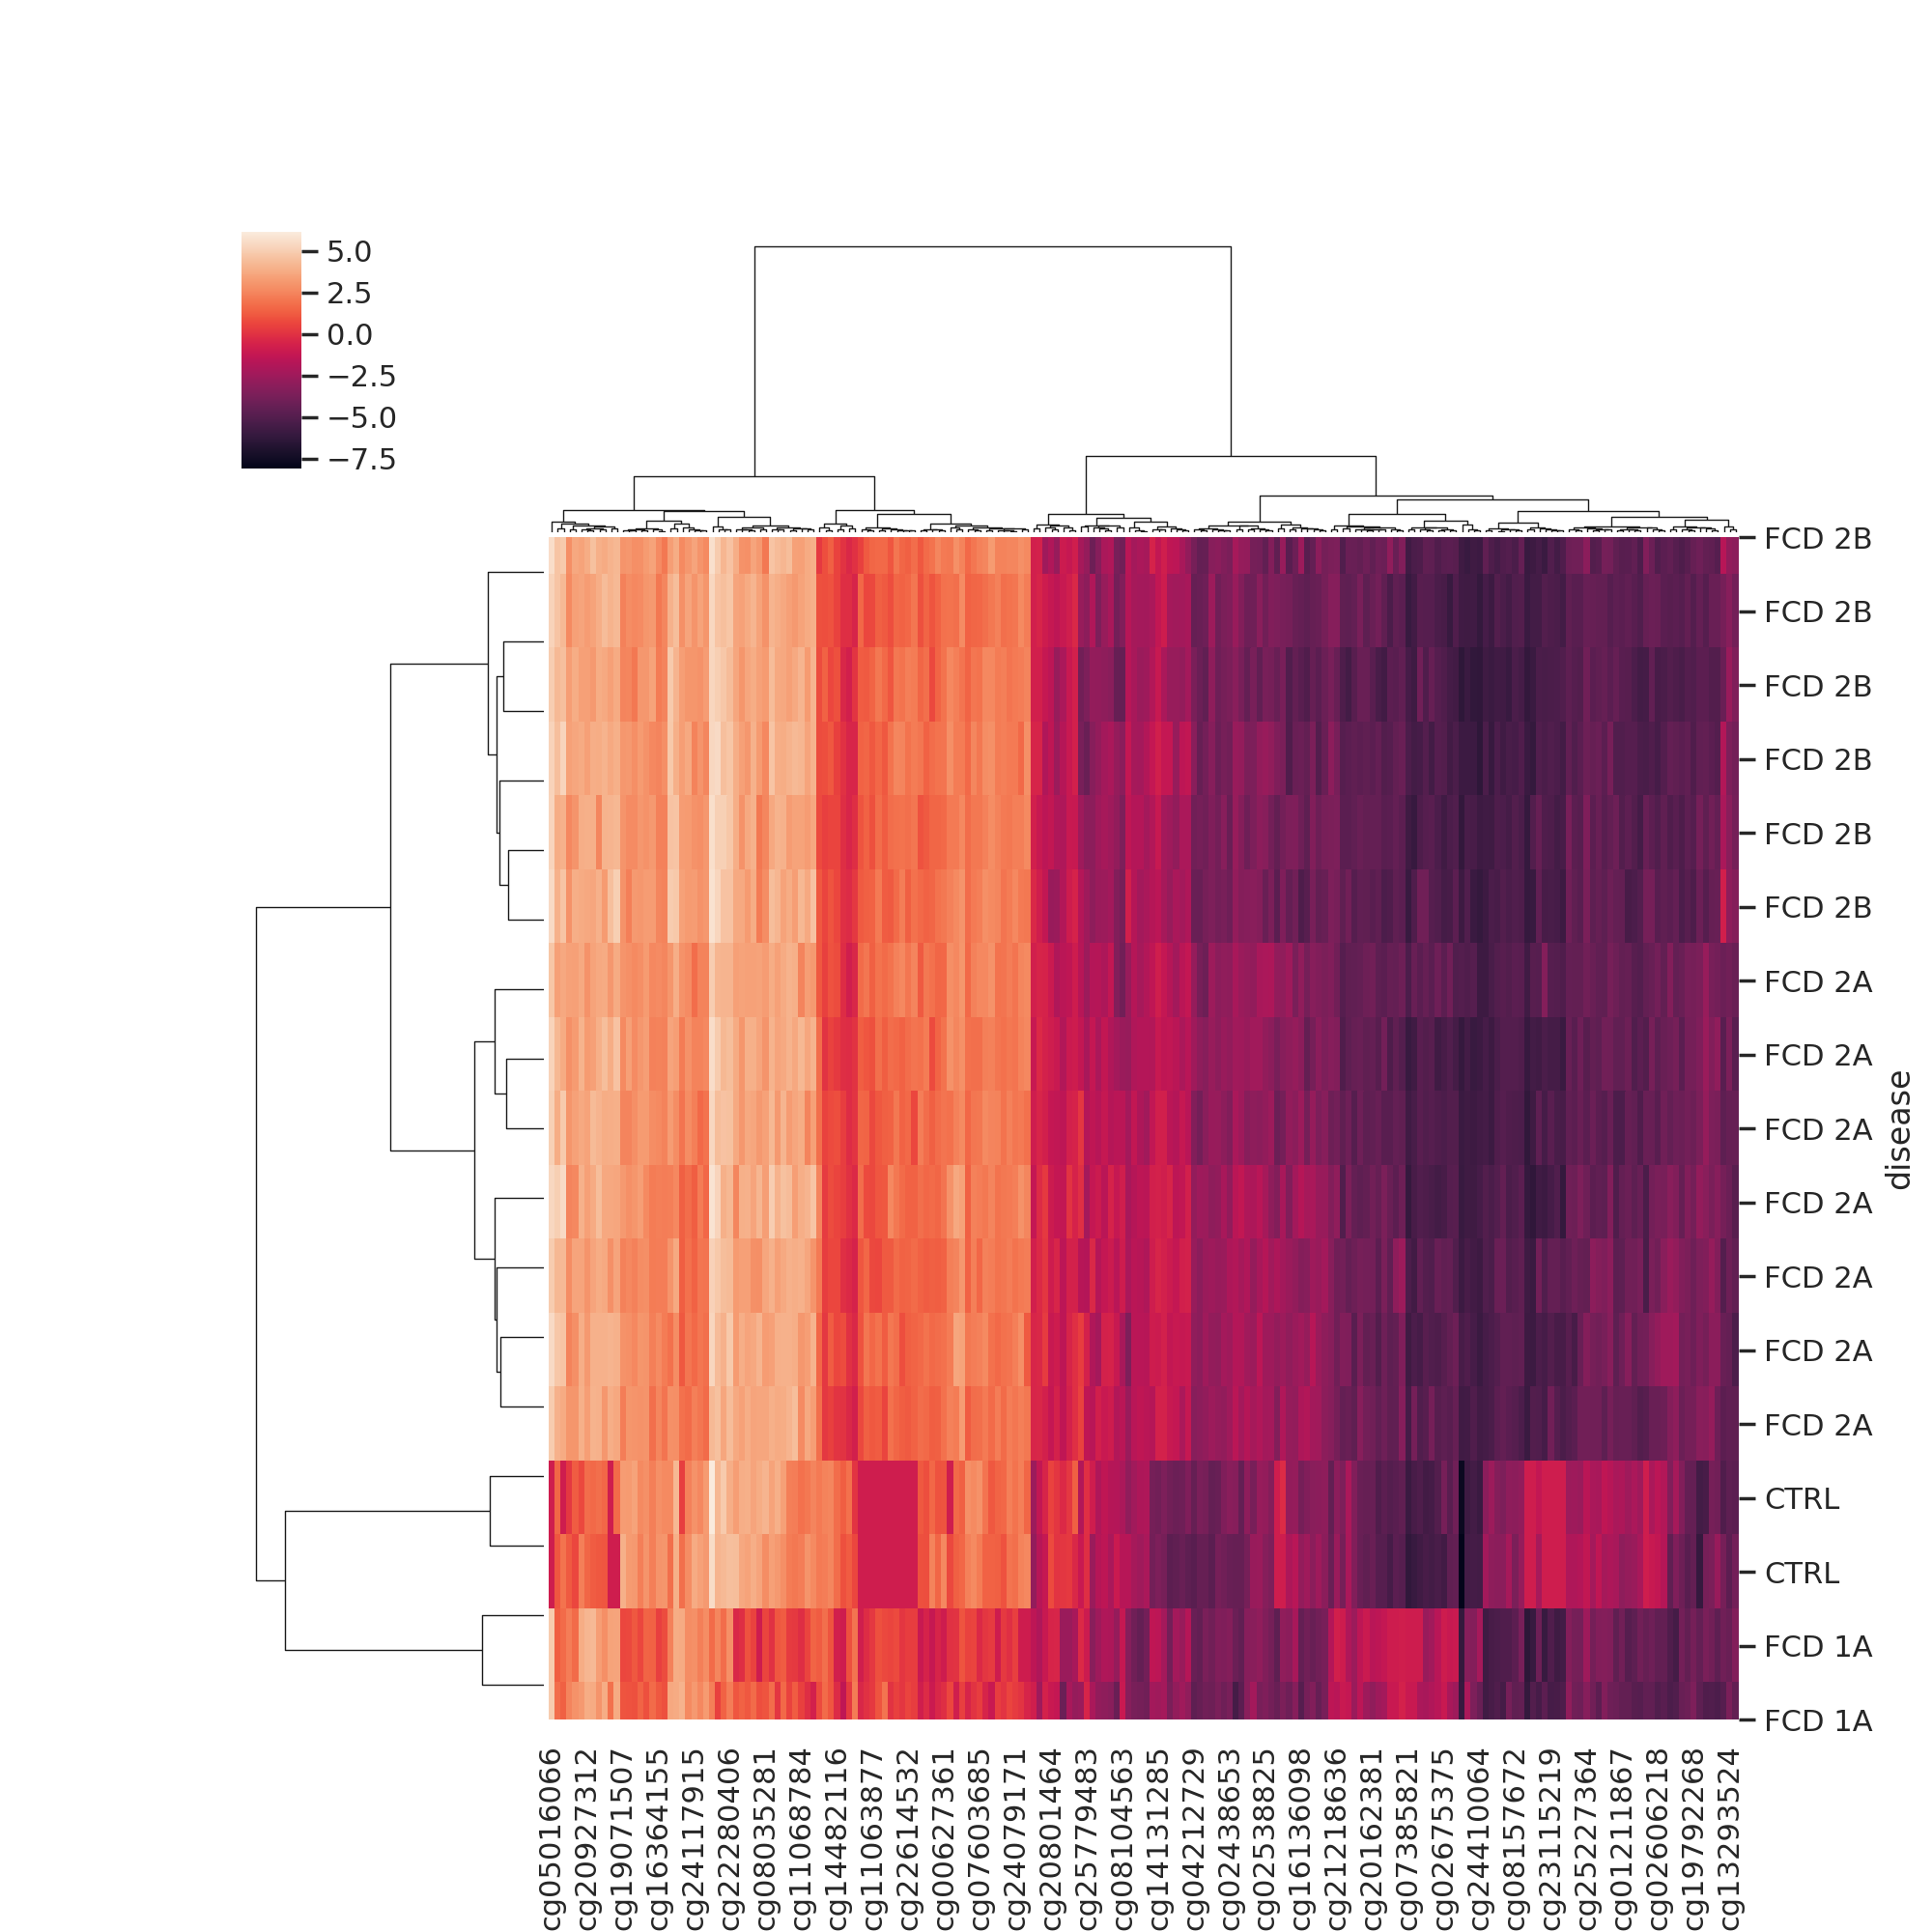

In [162]:
%matplotlib notebook
import seaborn as sns 
sns.set(color_codes=True)
#iris = sns.load_dataset("iris")
#species = iris.pop("species")
sns.clustermap(betac, method='ward', metric='euclidean')

In [74]:
import umap
from sklearn.preprocessing import LabelEncoder
import time
time_start = time.time()

mapper = umap.UMAP(n_neighbors=15,
                      min_dist=0.0,
                      n_components=2,
                      metric='correlation',
                     random_state=123
                      ).fit(betaquant_10000.transpose() )

#LabelEncoder().fit_transform(y_train.to_numpy())
print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 0.0391542911529541 seconds


In [75]:
embedding=mapper.transform(betaquant_10000.transpose())

In [76]:
embedding.shape

(17, 2)

<IPython.core.display.Javascript object>


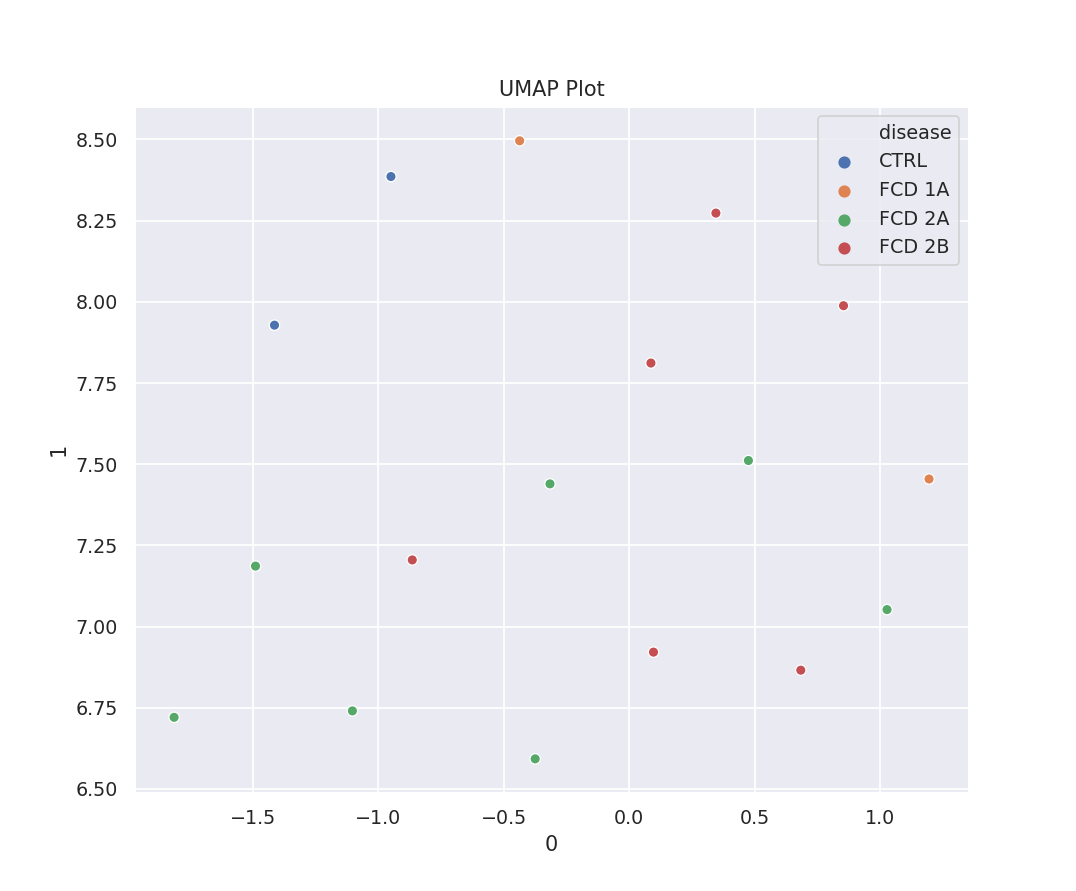

In [77]:
%matplotlib notebook
#plt.figure(figsize=(18, 15))
#plt.scatter(umap_results[:, 0], umap_results[:, 1], 
            # c=phen_keepers['sex'].to_numpy(),           
           # cmap='tab10')
#plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6),)
#plt.gca().set_aspect('equal', 'datalim')
#plt.title('UMAP projection of the dataset', fontsize=24);


import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import cubehelix_palette
group='disease'

X_transformed=pd.DataFrame(embedding)
X_transformed[group]=pheno[group].to_numpy()     
#categories = X_transformed[group]
       

#colors=colors[:len(categories.unique())]
        
fig, ax = plt.subplots()    
#for i in range(len(X_transformed)):
            
#    ax.scatter(X_transformed[0].iloc[i],  
#                X_transformed[1].iloc[i], 
#                color = colors[i%len(colors)],
#                label=categories.iloc[i])
#ax.legend(categories.unique())
#ax.set_xlabel('Principal Component %s'  % (components[0]+1))
#ax.set_ylabel('Principal Component %s'  % (components[1]+1))
#cmap=sns.color_palette('muted') 

import itertools
#sns.set_palette(sns.color_palette("husl", 14))
#palette = itertools.cycle(sns.color_palette())



#palette = zip(X_transformed[group].unique(), sns.crayons.values())

# palette = colordict ,

sns.scatterplot(0,1,hue=group,data=X_transformed, ax=ax)
ax.set_title('UMAP Plot')
plt.show()   

In [73]:
colors = ['#2300A8', '#00A658','#1f77b4', '#ff7f0e', 
                       '#d62728', '#9467bd', '#8c564b', 
                      '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','yellow','#070d0d', '#8ffe09']

In [74]:
colordict={}
for items, values in zip(X_transformed[group].unique().tolist(), colors):
    colordict[items]=values

In [75]:
colordict

{'FCD 2A': '#2300A8', 'FCD 2B': '#00A658', 'TSC': '#1f77b4'}

In [161]:
from sklearn.decomposition import PCA
import seaborn as sns
from seaborn import cubehelix_palette
sns.set()
def reduce_plot(data, labels, legend_title):
    np.random.seed(42)
    plt.figure(figsize=(8,8))
    t_data=pd.DataFrame(PCA(n_components=2).fit_transform(data),columns=['z1','z2'])
    t_data[legend_title]=labels
    sns.scatterplot('z1','z2',hue=legend_title, cmap=cubehelix_palette(as_cmap=True),data=t_data)

In [162]:
embed=mapper.transform(betaquant_10000.transpose())

<IPython.core.display.Javascript object>


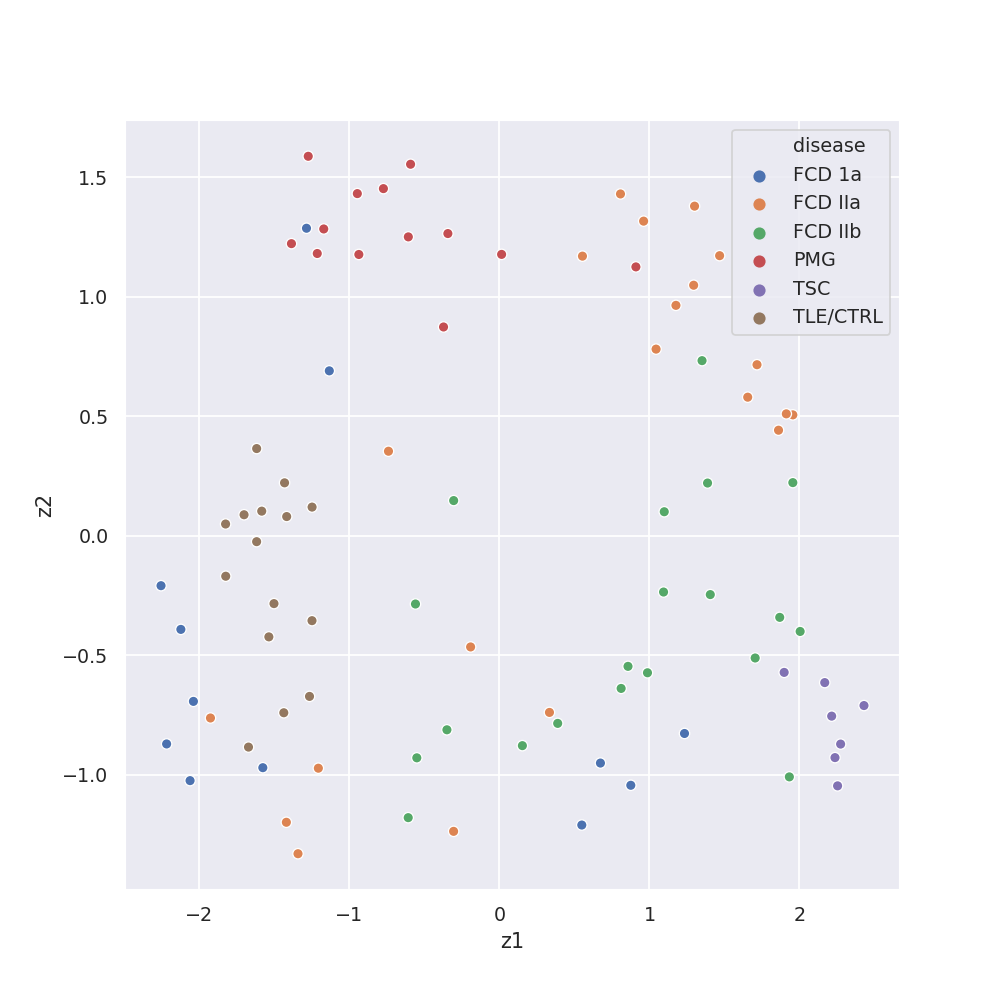

<IPython.core.display.Javascript object>


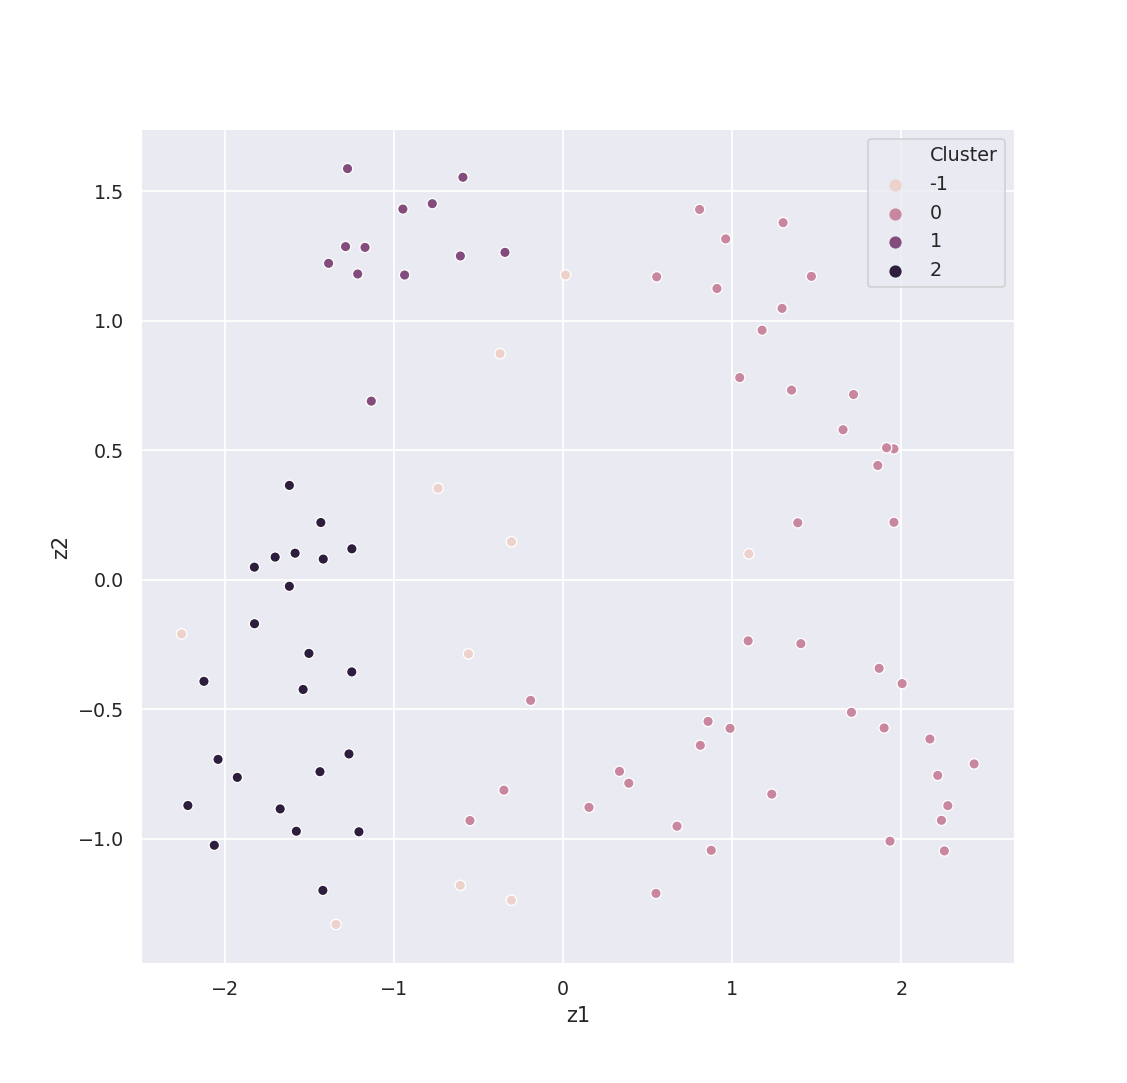

In [163]:
#mvalnoob_50000.transpose()
import hdbscan
from hdbscan import HDBSCAN
%matplotlib notebook
model = HDBSCAN(algorithm='best')
predicted_clusters = model.fit_predict(embed.astype(np.float64))
reduce_plot(embed, pheno['disease'].to_numpy(),'disease')
reduce_plot(embed, predicted_clusters,'Cluster')

In [389]:
labels = hdbscan.HDBSCAN(
    min_samples=3,
    min_cluster_size=2,
).fit_predict(embed)

In [390]:
labels

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

<IPython.core.display.Javascript object>


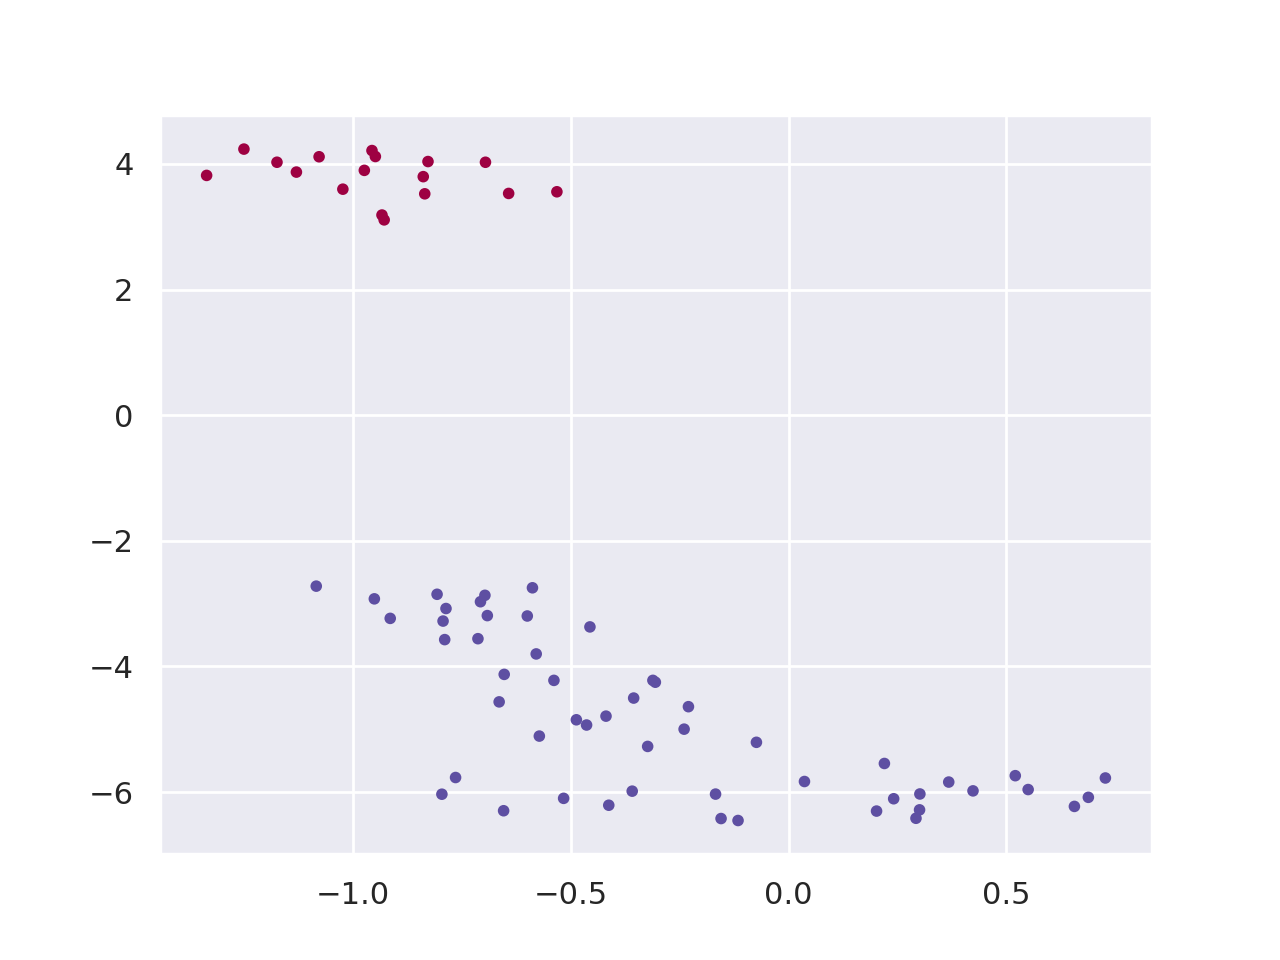

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [391]:
%matplotlib notebook
clustered = (labels >= 0)
plt.scatter(embedding[~clustered, 0],
            embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=10,
            alpha=0.5)
plt.scatter(embedding[clustered, 0],
            embedding[clustered, 1],
            c=labels[clustered],
            s=10,
            cmap='Spectral');

<IPython.core.display.Javascript object>


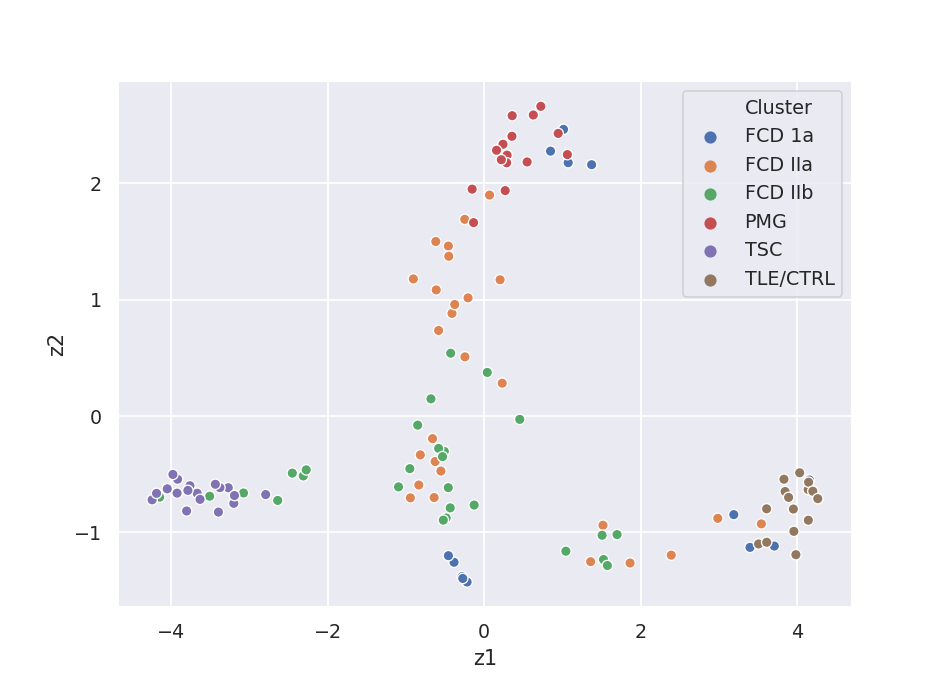

In [85]:
%matplotlib notebook
pca_dat=pd.DataFrame(PCA(n_components=2).fit_transform(pd.DataFrame(embed)),columns=['z1','z2'])
pca_dat['Cluster']=pheno['disease'].to_numpy()
sns.scatterplot('z1','z2',hue='Cluster', cmap=cubehelix_palette(as_cmap=True),data=pca_dat)

In [430]:
pca_df

0         1
0   -3.347164  0.002061
1   -3.410626 -0.019665
2   -3.573389 -0.015909
3   -3.847667  0.004486
4   -3.790504 -0.025847
..        ...       ...
495  5.034746  0.043852
496  4.813446  0.008387
497  5.059803  0.060454
498 -2.926902  0.002051
499 -3.230086  0.052808

[500 rows x 2 columns]

In [231]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(betaquant_test.transpose())
pca_df=pd.DataFrame(pca_result,)
print ('Cumulative explained variation for 2 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)) )



NameError: name 'betaquant_test' is not defined

In [262]:
pca_df#['Cluster']

0         1
0    1.145473 -3.195343
1    0.917277 -3.235735
2   -3.173774  2.762687
3   -1.668061  1.349805
4   -1.449010  0.979885
5   -2.591906 -0.187656
6    3.487917  2.374289
7    3.644155 -1.869986
8   12.463515  3.350574
9    2.550354  4.064875
10   6.271174 -2.294349
11   2.641306 -3.854048
12   1.537520 -1.390463
13   0.749717 -2.615124
14  -1.798342  3.933986
15   0.649138  2.630698
16   2.704947 -1.152338
17  -1.433924 -2.701614
18  -3.667181  2.895906
19  -3.673617 -0.867316
20  -4.400051  1.549161
21  -6.620429 -0.696327
22  -3.858743 -0.360135
23  -4.427456 -1.471433

In [263]:
pheno_test['disease']

67    TSC
68    TSC
73    TSC
74    TSC
75    TSC
76    TSC
78    PMG
79    PMG
83    PMG
84    PMG
85    PMG
86    PMG
87    TSC
88    TSC
89    TSC
90    PMG
92    PMG
93    TSC
94    TSC
95    TSC
96    TSC
97    TSC
98    TSC
99    TSC
Name: disease, dtype: object

<IPython.core.display.Javascript object>


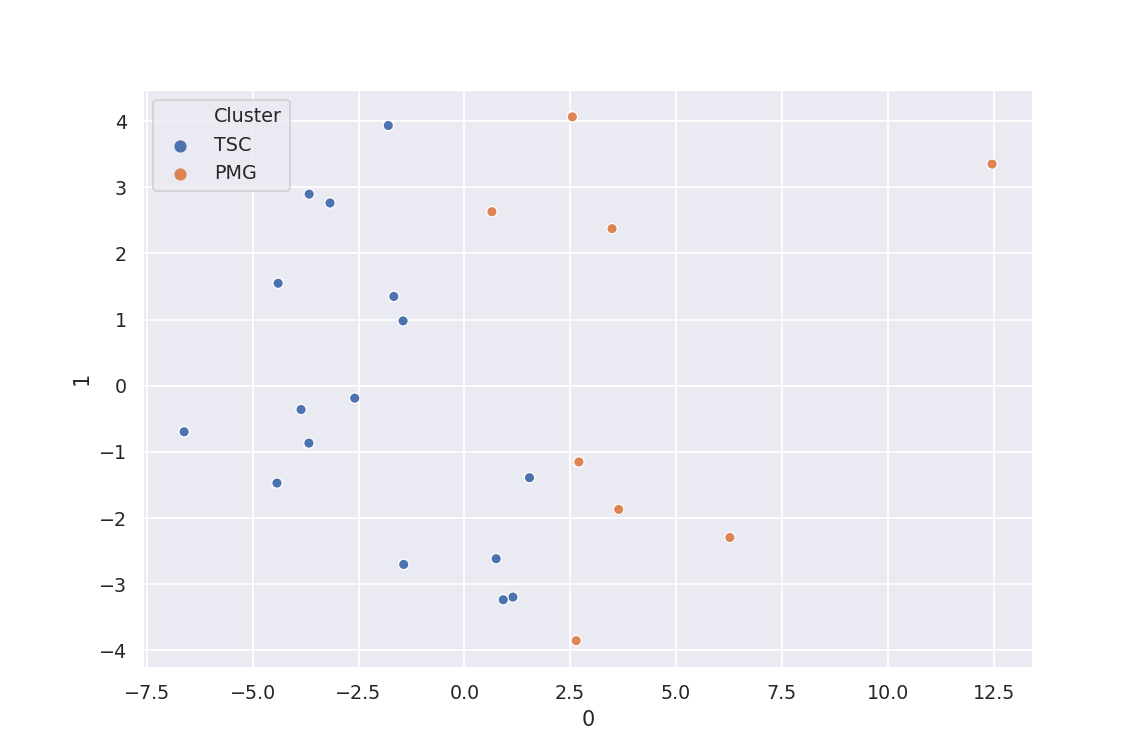

In [264]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

pca_df['Cluster']=pheno_test['disease'].to_numpy()
sns.scatterplot(0,1,hue='Cluster', cmap=cubehelix_palette(as_cmap=True),data=pca_df)


<IPython.core.display.Javascript object>


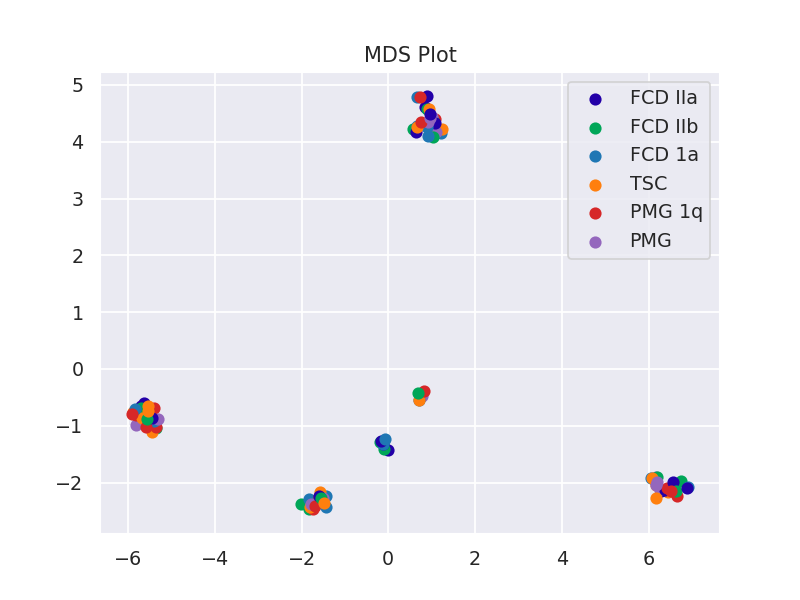

In [455]:
group='disease'
X_transformed=pca_df#pd.DataFrame(embedding)
X_transformed[group]=targets[group]   
categories = X_transformed[group]
       
colors = ['#2300A8', '#00A658','#1f77b4', '#ff7f0e', 
                       '#d62728', '#9467bd', '#8c564b', 
                      '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors=colors[:len(categories.unique())]
        
fig, ax = plt.subplots()    
for i in range(len(X_transformed)):
            
    ax.scatter(X_transformed[0].iloc[i],  
                X_transformed[1].iloc[i], 
                color = colors[i%len(colors)],
                label=targets[group].iloc[i])
ax.legend(categories.unique())
#ax.set_xlabel('Principal Component %s'  % (components[0]+1))
#ax.set_ylabel('Principal Component %s'  % (components[1]+1))
ax.set_title('MDS Plot')
plt.show()    


<IPython.core.display.Javascript object>


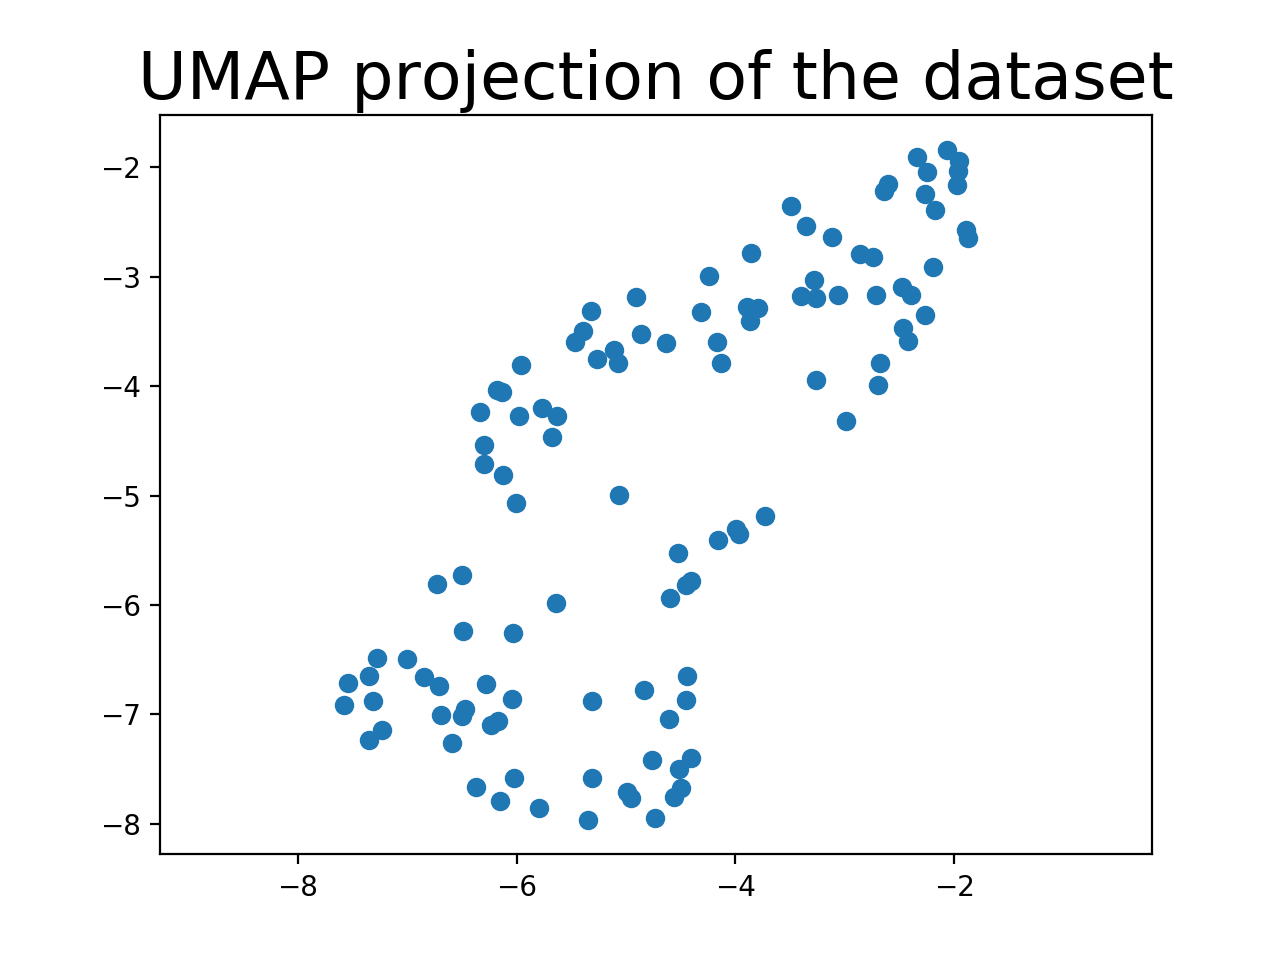

In [199]:
beta_keepers = pd.DataFrame(umap.transform(beta_keepers.to_numpy()),index=methyl_arr.return_idx())

from sklearn.decomposition import PCA
import seaborn as sns
from seaborn import cubehelix_palette
sns.set()
def reduce_plot(data, labels, legend_title):
    np.random.seed(42)
    plt.figure(figsize=(8,8))
    t_data=pd.DataFrame(PCA(n_components=2).fit_transform(data),columns=['z1','z2'])
    t_data[legend_title]=labels
    sns.scatterplot('z1','z2',hue=legend_title, cmap=cubehelix_palette(as_cmap=True),data=t_data)

import hdbscan
from hdbscan import HDBSCAN
%matplotlib notebook
model = HDBSCAN(algorithm='best')
predicted_clusters = model.fit_predict(methyl_arr.beta.astype(np.float64))
reduce_plot(methyl_arr.beta, methyl_arr.pheno['disease'].values,'disease')
reduce_plot(methyl_arr.beta, predicted_clusters,'Cluster')

In [ ]:
@util.command()
@click.option('-i', '--input_pkl', default='./preprocess_outputs/methyl_array.pkl', help='Input database for beta and phenotype data.', type=click.Path(exists=False), show_default=True)
@click.option('-o', '--output_pkl', default='./autosomal/methyl_array.pkl', help='Output methyl array autosomal.', type=click.Path(exists=False), show_default=True)
@click.option('-a', '--array_type', default='450k', help='Array Type.', type=click.Choice(['450k','epic']), show_default=True)
def remove_sex(input_pkl,output_pkl, array_type):
    """Remove non-autosomal CpGs."""
    import numpy as np
    #from rpy2.robjects import pandas2ri
    from pymethylprocess.meffil_functions import r_autosomal_cpgs
    #pandas2ri.activate()
    os.makedirs(output_pkl[:output_pkl.rfind('/')],exist_ok=True)
    autosomal_cpgs = r_autosomal_cpgs(array_type)#pandas2ri.ri2py()
    methyl_array=MethylationArray.from_pickle(input_pkl)
    methyl_array.beta = methyl_array.beta.loc[:,np.intersect1d(list(methyl_array.beta),autosomal_cpgs)]
    methyl_array.write_pickle(output_pkl)
    

@util.command()
@click.option('-ro', '--input_r_object_dir', default='./preprocess_outputs/', help='Input directory containing qc data.', type=click.Path(exists=False), show_default=True)
@click.option('-a', '--algorithm', default='meffil', help='Algorithm to run cell type.', type=click.Choice(['meffil','minfi','IDOL']), show_default=True)
@click.option('-ref', '--reference', default='cord blood gse68456', help='Cell Type Reference.', type=click.Choice(['andrews and bakulski cord blood','blood gse35069', 'blood gse35069 chen', 'blood gse35069 complete', 'cord blood gse68456', 'gervin and lyle cord blood', 'saliva gse48472']), show_default=True)
@click.option('-l', '--library', default='IDOLOptimizedCpGs450klegacy', help='IDOL Library.', type=click.Choice(['IDOLOptimizedCpGs','IDOLOptimizedCpGs450klegacy']), show_default=True)
@click.option('-o', '--output_csv', default='./added_cell_counts/cell_type_estimates.csv', help='Output cell type estimates.', type=click.Path(exists=False), show_default=True)    

def est_cell_counts_minfi(rgset):
    """Given RGSet object, estimate cell counts using reference approach via minfi.
    Parameters
    ----------
    rgset
        RGSet object stored in python via rpy2"""
    robjects.r('library(FlowSorted.Blood.450k)')
    cell_count_estimates = robjects.r("""function (RGset) {
        cellCounts <- as.table(estimateCellCounts(RGset))
        return(cellCounts)
        }""")(rgset)
    return cell_count_estimates

def est_cell_counts_IDOL(rgset,library):
    """Given RGSet object, estimate cell counts for 450k/850k using reference approach via IDOL library.
    Parameters
    ----------
    rgset
        RGSet object stored in python via rpy2
    library
        What type of CpG library to use."""
    robjects.r('library(FlowSorted.Blood.EPIC)')
    cell_count_estimates = robjects.r("""function (RGset) as.table(estimateCellCounts2(RGset,IDOLOptimizedCpGs={})$counts)""".format(library))(rgset)
    return cell_count_estimates


def ref_estimate_cell_counts(input_r_object_dir, algorithm, reference, library, output_csv):
    """Reference based cell type estimates."""
    import rpy2.robjects as robjects
    from rpy2.robjects import pandas2ri, numpy2ri

    pandas2ri.activate()
    from pymethylprocess.meffil_functions import est_cell_counts_meffil, est_cell_counts_minfi, est_cell_counts_IDOL
    os.makedirs(output_csv[:output_csv.rfind('/')],exist_ok=True)
    read_r_object = robjects.r('readRDS')
    robjects.r('library({})'.format(algorithm if algorithm != 'IDOL' else 'minfi'))
    if algorithm == 'meffil':
        qc_list = read_r_object(join(input_r_object_dir,'QCObjects.rds'))
        cell_counts = est_cell_counts_meffil(qc_list,reference)
    else:
        rgset = read_r_object(join(input_r_object_dir,'RGSet.rds'))
        if algorithm=='meffil':
            cell_counts = est_cell_counts_minfi(rgset)
        else:
            cell_counts = est_cell_counts_IDOL(rgset,library)

    # find where samples intersect
    pandas2ri.ri2py(robjects.r('as.data.frame')(cell_counts)).to_csv(output_csv)    
 


@util.command()
@click.option('-i', '--input_pkl', default='./autosomal/methyl_array.pkl', help='Input database for beta and phenotype data.', type=click.Path(exists=False), show_default=True)
@click.option('-o', '--output_pkl', default='./no_snp/methyl_array.pkl', help='Output methyl array autosomal.', type=click.Path(exists=False), show_default=True)
@click.option('-a', '--array_type', default='450k', help='Array Type.', type=click.Choice(['450k','epic']), show_default=True)
def remove_snps(input_pkl,output_pkl, array_type):
    """Remove SNPs from methylation array."""
    import numpy as np
    #from rpy2.robjects import pandas2ri
    from pymethylprocess.meffil_functions import r_snp_cpgs
    #pandas2ri.activate()
    os.makedirs(output_pkl[:output_pkl.rfind('/')],exist_ok=True)
    snp_cpgs = r_snp_cpgs(array_type)#pandas2ri.ri2py()
    methyl_array=MethylationArray.from_pickle(input_pkl)
    methyl_array.beta = methyl_array.beta.loc[:,np.setdiff1d(list(methyl_array.beta),snp_cpgs)]
    methyl_array.write_pickle(output_pkl)
    

In [22]:
pheno,beta_final=preproidats.preprocess_cns_pipeline(n_cores=n_workers/2, 
                                                     qc_only=False,
                                                     pipeline='minfi', #<-- 3. to enmix
                                                     noob=True,#<--2. to False
                                                     use_cache=True,
                                                     bmiq=False,
                                                     array_type='epic',
                                                     rm_sex=False,
                                                     use_cell_count2=False #<-- 1. to True                                  
                                                     )

starting
42
 
 samples with percentage of low quality CpG value greater than 
 
0.05
 
 or bisulfite intensity less than 
 
-4383.478
 


61761
 
 CpGs with percentage of low quality value greater than 
 
0.05
 


Ploting qc_sample.jpg ...
Done

Ploting qc_CpG.jpg ...
Done

Identifying ourlier samples based on beta or total intensity values...

After excluding low quality samples and CpGs

0
 
 samples are outliers based on averaged total intensity value
 


0
 
 samples are outliers in beta value distribution
 


0
 
 outlier samples were added into badsample list

Ploting freqpolygon_beta_beforeQC.jpg ...
Done

Ploting freqpolygon_beta_afterQC.jpg ...
Done

38
 
 samples with percentage of low quality CpG value greater
     than 
 
0.05
 
 or bisulfite intensity less than 
 
-4383.478
 


53355
 
 CpGs with percentage of low quality value greater than 
 
0.05
 


After excluding overlapped counts:

38
 
 unique samples were excluded

53355
 
 unique CpGs were excluded



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Combining user data with reference (flow sorted) data.



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Processing user and reference data together.





finished


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Picking probes for composition estimation.



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Estimating composition.





In [107]:
pheno,beta_final=preproidats.preprocess_cns_pipeline2(n_cores=n_workers, 
                                                     qc_only=False,                                                    
                                                     use_cache=True,
                                                     bmiq=False,
                                                     array_type='epic',
                                                     rm_sex=False,
                                                     use_cell_count2=True
                                                     )

starting
42
 
 samples with percentage of low quality CpG value greater than 
 
0.05
 
 or bisulfite intensity less than 
 
-4383.478
 


61761
 
 CpGs with percentage of low quality value greater than 
 
0.05
 


Ploting qc_sample.jpg ...
Done

Ploting qc_CpG.jpg ...
Done

Identifying ourlier samples based on beta or total intensity values...

After excluding low quality samples and CpGs

0
 
 samples are outliers based on averaged total intensity value
 


0
 
 samples are outliers in beta value distribution
 


0
 
 outlier samples were added into badsample list

Ploting freqpolygon_beta_beforeQC.jpg ...
Done

Ploting freqpolygon_beta_afterQC.jpg ...
Done



OSError: [Errno 12] Cannot allocate memory

In [ ]:
remove_sex(methyl_arr.beta,'epic')

<IPython.core.display.Javascript object>


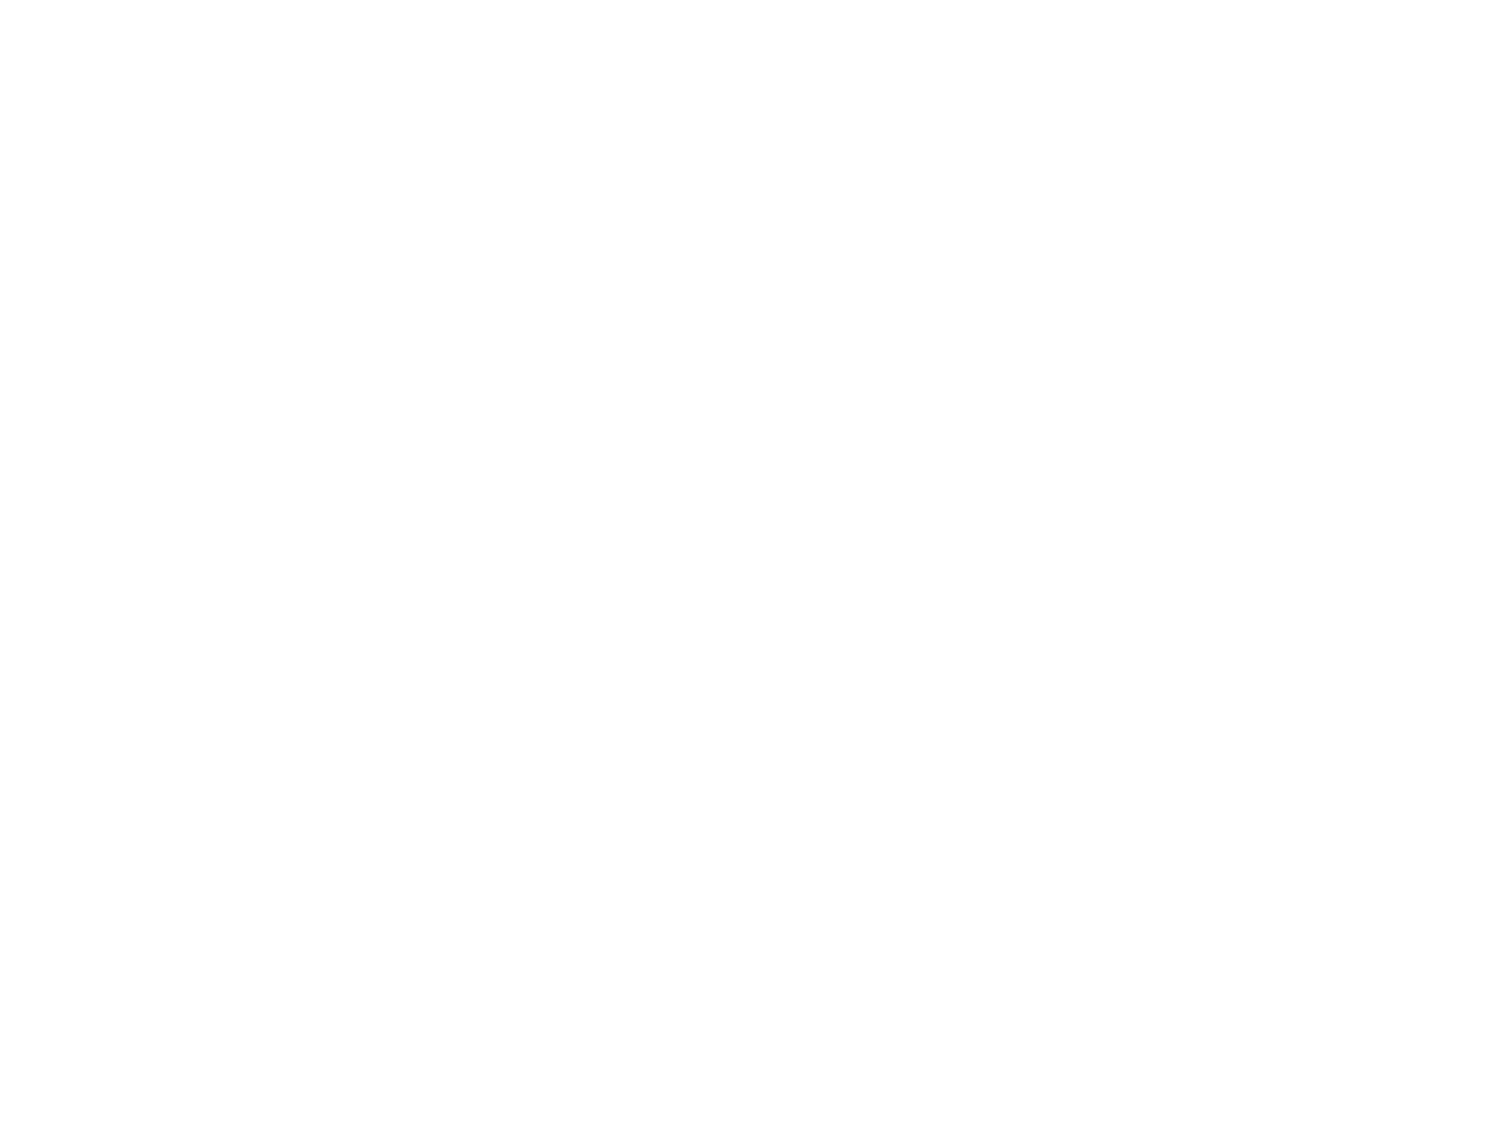

KeyboardInterrupt: 

In [158]:
# Shows probe beta values for each sample as a separate trace.
methylcheck.beta_density_plot(betaquant)

In [33]:
df = methylcheck.exclude_sex_control_probes(methyl_arr.beta, 'EPIC', verbose=True)
df.shape

Array EPIC: Removed 19627 sex linked probes and 695 internal control probes from 80 samples. 796131 probes remaining.
Discrepancy between number of probes to exclude (20322) and number actually removed (16605): 3717
This happens when probes are present multiple times in array, or the manifest doesn't match the array (EPIC).


(80, 796131)

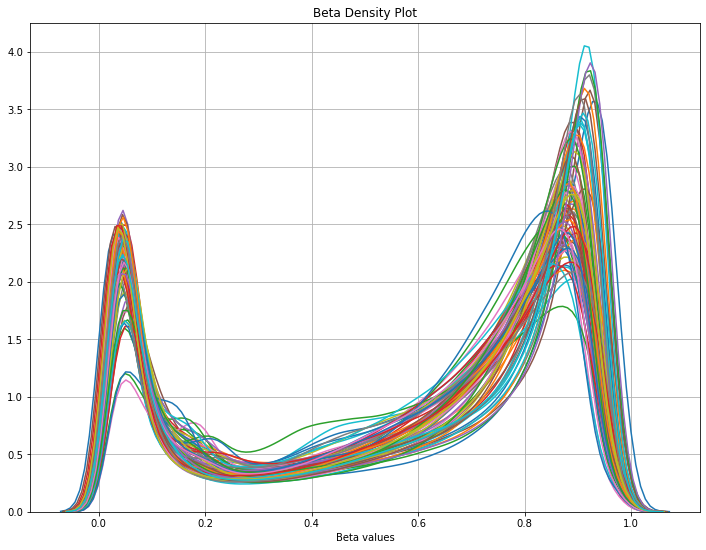

In [34]:
# Shows probe beta values for each sample as a separate trace.
methylcheck.beta_density_plot(df)

In [159]:
criteria = ['Chen2013', 'Price2013', 'Naeem2014', 'DacaRoszak2015',
            'Polymorphism', 'CrossHybridization', 'BaseColorChange', 'RepeatSequenceElements']
EPIC_criteria = ['McCartney2016', 'Zhou2016', 'Polymorphism', 'CrossHybridization', 'BaseColorChange', 'RepeatSequenceElements']

#print('450k')
#for crit in criteria:
#    print(crit, len(methylcheck.list_problem_probes('450k', [crit])))
print('EPIC')
for crit in EPIC_criteria:
    print(crit, len(methylcheck.list_problem_probes('EPIC', [crit])))


EPIC
McCartney2016 326267
Zhou2016 178671
Polymorphism 346033
CrossHybridization 108172
BaseColorChange 406
RepeatSequenceElements 0


In [160]:
sketchy_probes_list = methylcheck.list_problem_probes('EPIC', EPIC_criteria)

In [162]:
len(sketchy_probes_list)


389050

In [251]:

df2 = methylcheck.exclude_probes(betaquant_5000, sketchy_probes_list)

Of 50 probes, 0 matched, yielding 50 probes after filtering.


<IPython.core.display.Javascript object>


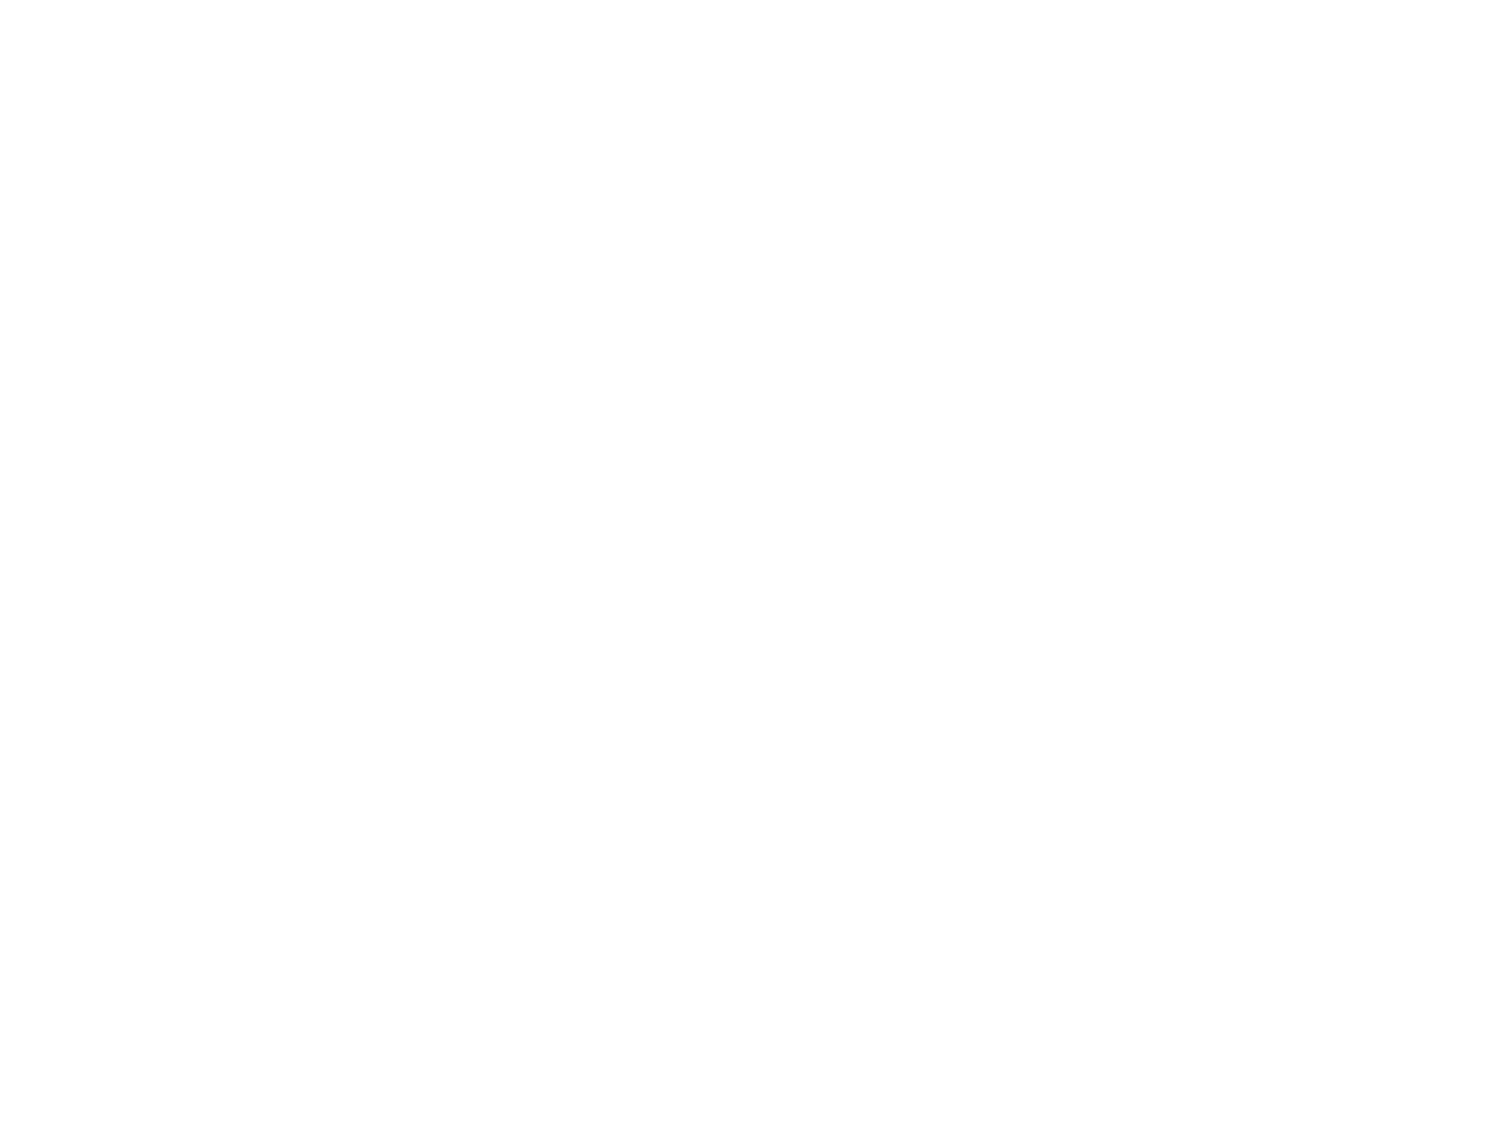

KeyboardInterrupt: 

In [164]:
# Shows probe beta values for each sample as a separate trace.
methylcheck.beta_density_plot(df2)

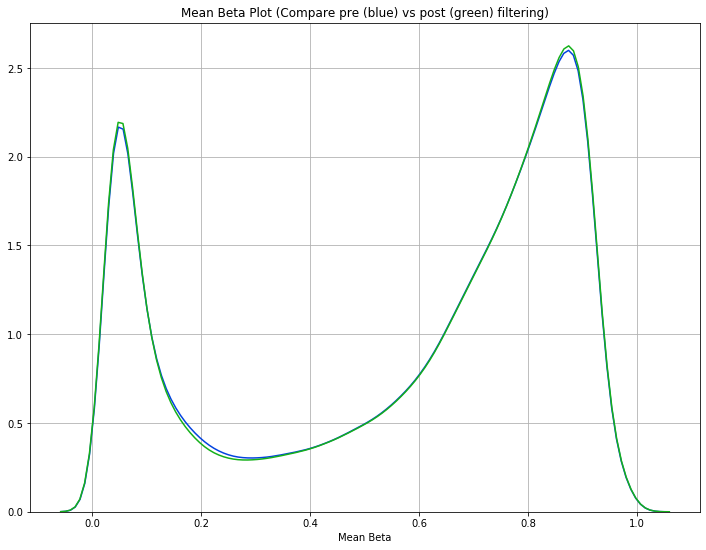

In [40]:
# effect of filtering
methylcheck.mean_beta_compare(methyl_arr.beta, df2)

Calculating area under curve for each sample.


<IPython.core.display.Javascript object>


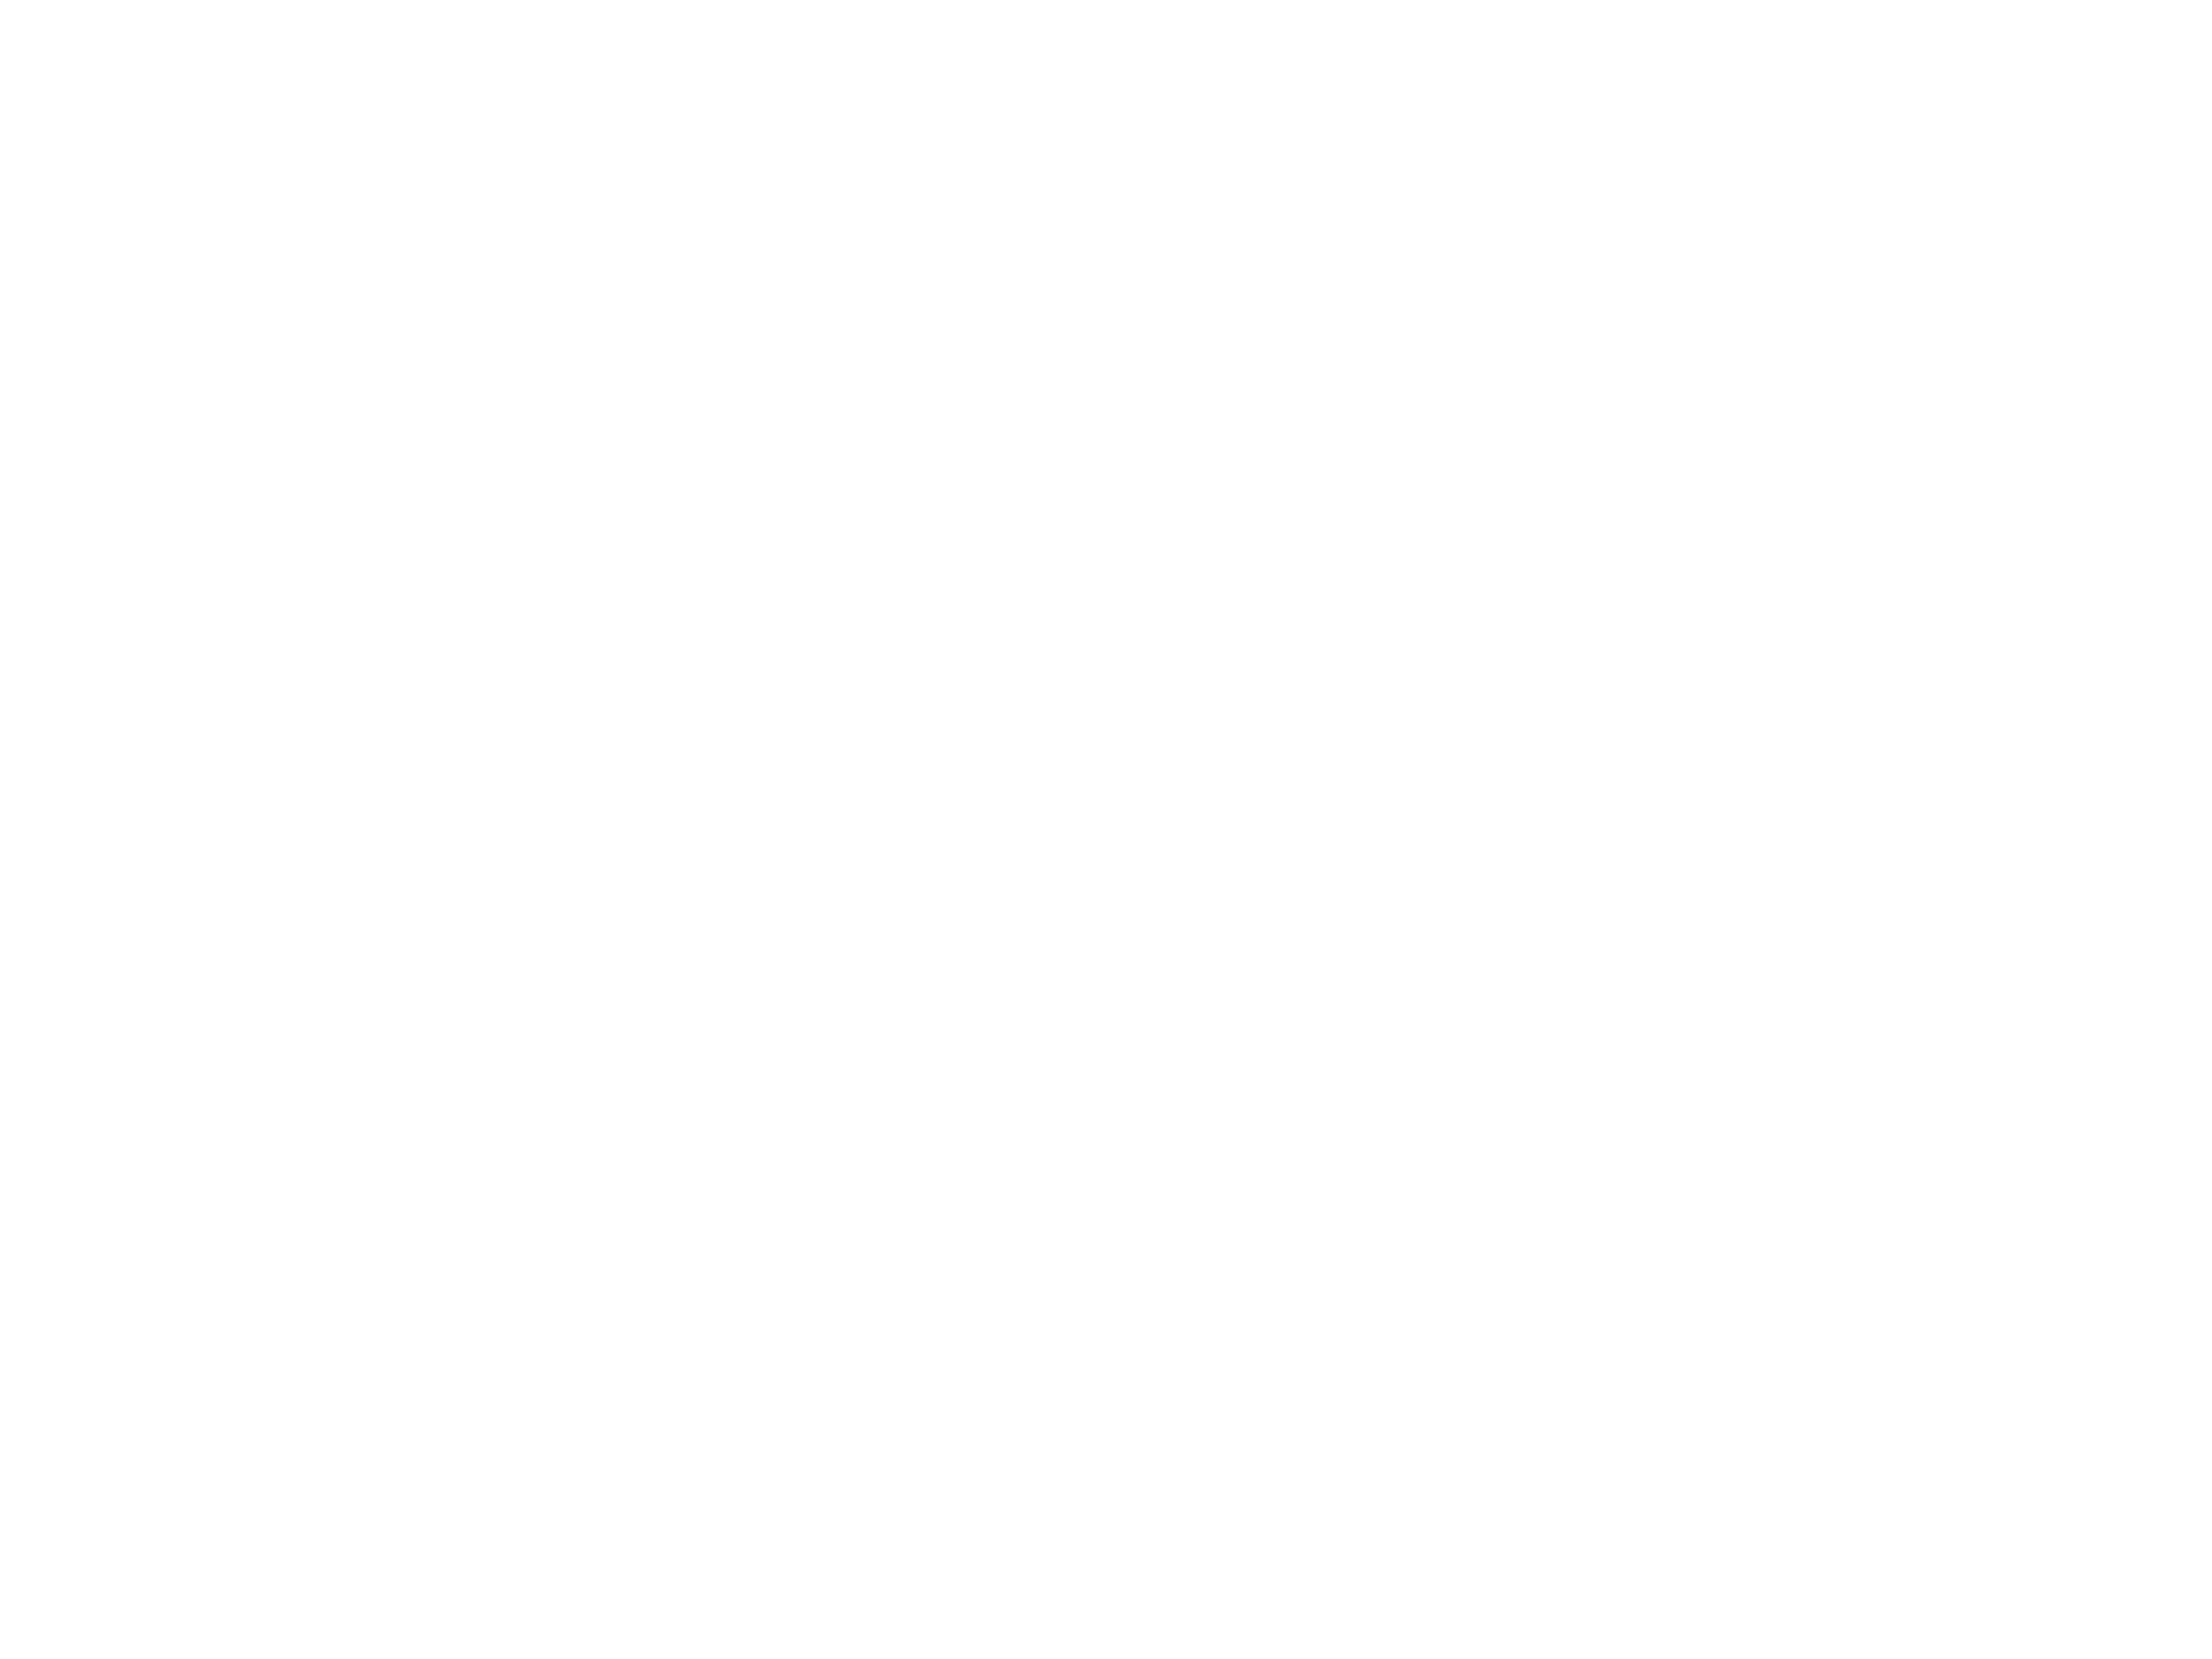

118it [00:02, 48.67it/s]


In [39]:
# adjust the cutoff value to exclude outliers. Default is 0.7.
df_outliers_rem = methylcheck.cumulative_sum_beta_distribution(df2, cutoff=0.7)

In [79]:
#dmrs=
#dmrs=
#pandas2ri.ri2py(robjects.r['as'](preproidats.NeunC,'data.frame'))
import rpy2.robjects.numpy2ri as rpyn
#neun_c=pd.DataFrame(pandas2ri.ri2py(preproidats.NeunC));neun_c.describe()
#preproidats.NeunC
#pd.DataFrame(pandas2ri.ri2py(preproidats.NeunC.rx('counts')))
#len(numpy2ri.ri2py(robjects.r("sampleNames")(preproidats.RGset)))
#numpy2ri.ri2py(robjects.r("sampleNames")(preproidats.RGset))
#neun_c=pandas2ri.ri2py(robjects.r['as'](preproidats.NeunC,'data.frame'));neun_c
raw_cell_counts=pd.DataFrame(rpyn.ri2py(preproidats.NeunC), columns=['Glia', 'Neurons'], 
                             index=numpy2ri.ri2py(robjects.r("sampleNames")(preproidats.RGset)))
raw_cell_counts

Glia   Neurons
202818860117_R08C01  0.785322  0.348258
202148010052_R04C01  0.789911  0.402170
202818860046_R07C01  0.959012  0.097072
202148010052_R07C01  0.898595  0.230701
202093110113_R05C01  0.807790  0.393719
...                       ...       ...
202093110113_R06C01  0.698006  0.462246
202818860053_R02C01  0.618490  0.598349
203219730055_R05C01  0.546509  0.487826
202827620174_R01C01  0.701105  0.440993
202827620174_R04C01  0.655356  0.387982

[118 rows x 2 columns]

In [80]:
methyl_arr.pheno

Basename  \
202818860117_R08C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202818860046_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202148010052_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202944920001_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...   
203220070086_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...   
...                                                                ...   
202093110113_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202818860053_R02C01  /home/Deep_Learner/private/network/Methyl_Arra...   
203219730055_R05C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202827620174_R01C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202827620174_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...   

                                txt_idat Lokalisation disease       Sample  \
202818860117_R08C01  202148010052_R08C01    occipital  FCD 1a       N83/03   
202818860046_R07C01  202148010053_R02C01    occipital  FCD 1a       N76/04   
202148010052_R07C01  202148010053_R03C01    occipital  FCD 1a      N714/05   
202944920001_R04C01  202148010053_R05C01    occipital  FCD 1a       N69/03   
203220070086_R06C01  202818860046_R01C01    occipital  FCD 1a   874/06 IV3   
...                                  ...          ...     ...          ...   
202093110113_R06C01  203220070086_R04C01      frontal     TSC   2174/14 IV   
202818860053_R02C01  203220070086_R05C01     temporal     TSC   1439/14 I1   
203219730055_R05C01  203220070086_R06C01     temporal     TSC    699/16 I1   
202827620174_R01C01  203220070086_R07C01      frontal     TSC  1467/16 III   
202827620174_R04C01  203220070086_R08C01      frontal     TSC    1061/17 7   

                       Center sex  age  \
202818860117_R08C01  Erlangen   f    7   
202818860046_R07C01  Erlangen   f   11   
202148010052_R07C01  Erlangen   m   15   
202944920001_R04C01  Erlangen   m    2   
203220070086_R06C01       VGT   f    5   
...                       ...  ..  ...   
202093110113_R06C01      Mara   m    3   
202818860053_R02C01       VGT   m   15   
203219730055_R05C01      Mara   f    2   
202827620174_R01C01      Mara   m    1   
202827620174_R04C01      Mara   f    3   

                                                             filenames  
202818860117_R08C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202818860046_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202148010052_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202944920001_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...  
203220070086_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...  
...                                                                ...  
202093110113_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202818860053_R02C01  /home/Deep_Learner/private/network/Methyl_Arra...  
203219730055_R05C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202827620174_R01C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202827620174_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...  

[80 rows x 9 columns]

<IPython.core.display.Javascript object>


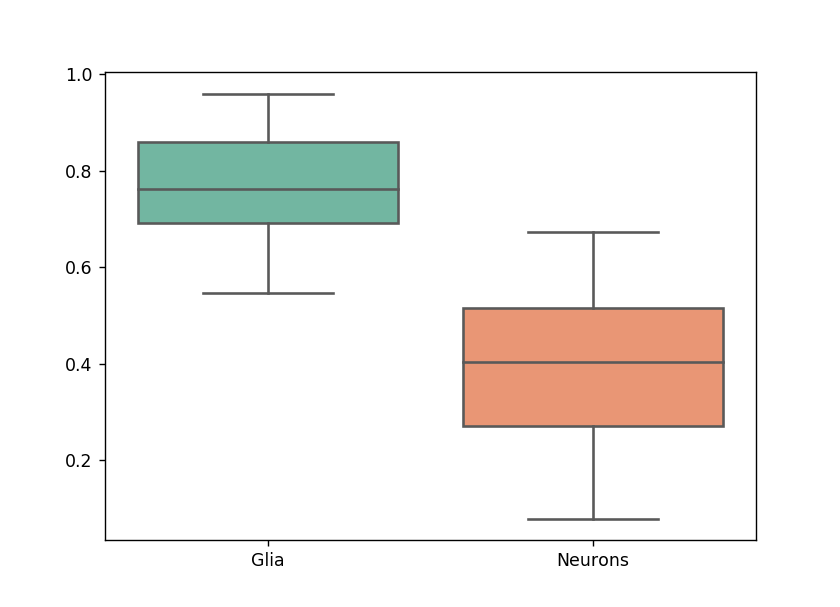

In [82]:
#len(neun_c[neun_c[0]<=neun_c[0].mean()-neun_c[0].std()])
import seaborn as sns
%matplotlib notebook
#sns.boxplot(neun_c[1])
ax = sns.boxplot(data=raw_cell_counts, palette="Set2")

In [104]:
raw_cell_counts.index.tolist()#[raw_cell_counts]

['202818860117_R08C01',
 '202148010052_R04C01',
 '202818860046_R07C01',
 '202148010052_R07C01',
 '202093110113_R05C01',
 '202944920001_R04C01',
 '203220070086_R06C01',
 '202093110108_R08C01',
 '202148010053_R04C01',
 '202148010052_R03C01',
 '202093110113_R04C01',
 '202093110108_R07C01',
 '202827620174_R03C01',
 '202831040055_R01C01',
 '203219730055_R04C01',
 '202818860117_R01C01',
 '202818860046_R08C01',
 '202822930161_R04C01',
 '203220070058_R05C01',
 '202093110113_R01C01',
 '202831040055_R05C01',
 '202822930161_R03C01',
 '202148010053_R02C01',
 '202818860046_R01C01',
 '203219750116_R07C01',
 '202148010052_R02C01',
 '203220070058_R04C01',
 '202148010052_R08C01',
 '202093110113_R03C01',
 '202818860117_R02C01',
 '202818860046_R04C01',
 '203220070086_R05C01',
 '202831040055_R03C01',
 '202148010053_R05C01',
 '202931510141_R04C01',
 '202931510141_R06C01',
 '202818860117_R07C01',
 '202827620173_R06C01',
 '202831040055_R04C01',
 '202818860167_R08C01',
 '202818860053_R01C01',
 '203219730055_R

In [168]:
targets['txt_idat'].tolist()

['202093110108_R07C01',
 '202093110113_R02C01',
 '202093110113_R04C01',
 '202093110113_R05C01',
 '202148010052_R01C01',
 '202148010052_R03C01',
 '202148010052_R06C01',
 '202148010053_R01C01',
 '202148010053_R04C01',
 '202148010053_R05C01',
 '202818860046_R03C01',
 '202818860053_R02C01',
 '202818860053_R03C01',
 '202818860117_R01C01',
 '202818860117_R04C01',
 '202818860117_R05C01',
 '202818860117_R06C01',
 '202818860167_R08C01',
 '202822930036_R07C01',
 '202822930161_R03C01',
 '202822930161_R07C01',
 '202827620173_R06C01',
 '202827620173_R07C01',
 '202827620174_R01C01',
 '202827620174_R02C01',
 '202827620174_R03C01',
 '202827620174_R04C01',
 '202827620174_R06C01',
 '202831040055_R01C01',
 '202831040055_R02C01',
 '202831040055_R03C01',
 '202831040055_R07C01',
 '202831040055_R08C01',
 '202831040056_R01C01',
 '202831040056_R03C01',
 '202831040056_R06C01',
 '202831040056_R07C01',
 '202831040056_R08C01',
 '202931510113_R03C01',
 '202931510113_R08C01',
 '202931510141_R04C01',
 '202931510141_R

In [110]:
keep_cell_counts_idx=[elem for elem in raw_cell_counts.index.tolist() if elem in  methyl_arr.pheno['txt_idat'].tolist()]
kepp_cell_counts

In [115]:
cell_counts=raw_cell_counts[raw_cell_counts.index.isin(keep_cell_counts_idx)];cell_counts

Glia   Neurons
202818860117_R08C01  0.785322  0.348258
202148010052_R04C01  0.789911  0.402170
202818860046_R07C01  0.959012  0.097072
202944920001_R04C01  0.915478  0.137219
203220070086_R06C01  0.868505  0.240741
...                       ...       ...
202818860046_R05C01  0.902064  0.197346
202822930161_R07C01  0.671862  0.609428
202818860053_R02C01  0.618490  0.598349
203219730055_R05C01  0.546509  0.487826
202827620174_R01C01  0.701105  0.440993

[80 rows x 2 columns]

In [118]:
cell_counts.sort_index(inplace=True), cell_counts

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(None,                          Glia   Neurons
 202093110108_R07C01  0.791256  0.390953
 202093110113_R01C01  0.785156  0.402107
 202093110113_R02C01  0.703866  0.555738
 202093110113_R03C01  0.764332  0.458041
 202093110113_R07C01  0.766843  0.445935
 ...                       ...       ...
 203220070086_R04C01  0.868263  0.282321
 203220070086_R05C01  0.809925  0.350374
 203220070086_R06C01  0.868505  0.240741
 203220070086_R07C01  0.840404  0.205849
 203220070086_R08C01  0.901979  0.171401
 
 [80 rows x 2 columns])

In [119]:
cell_counts

Glia   Neurons
202093110108_R07C01  0.791256  0.390953
202093110113_R01C01  0.785156  0.402107
202093110113_R02C01  0.703866  0.555738
202093110113_R03C01  0.764332  0.458041
202093110113_R07C01  0.766843  0.445935
...                       ...       ...
203220070086_R04C01  0.868263  0.282321
203220070086_R05C01  0.809925  0.350374
203220070086_R06C01  0.868505  0.240741
203220070086_R07C01  0.840404  0.205849
203220070086_R08C01  0.901979  0.171401

[80 rows x 2 columns]

In [122]:
methyl_arr.pheno

Basename  \
202818860117_R08C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202818860046_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202148010052_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202944920001_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...   
203220070086_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...   
...                                                                ...   
202093110113_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202818860053_R02C01  /home/Deep_Learner/private/network/Methyl_Arra...   
203219730055_R05C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202827620174_R01C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202827620174_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...   

                                txt_idat Lokalisation disease       Sample  \
202818860117_R08C01  202148010052_R08C01    occipital  FCD 1a       N83/03   
202818860046_R07C01  202148010053_R02C01    occipital  FCD 1a       N76/04   
202148010052_R07C01  202148010053_R03C01    occipital  FCD 1a      N714/05   
202944920001_R04C01  202148010053_R05C01    occipital  FCD 1a       N69/03   
203220070086_R06C01  202818860046_R01C01    occipital  FCD 1a   874/06 IV3   
...                                  ...          ...     ...          ...   
202093110113_R06C01  203220070086_R04C01      frontal     TSC   2174/14 IV   
202818860053_R02C01  203220070086_R05C01     temporal     TSC   1439/14 I1   
203219730055_R05C01  203220070086_R06C01     temporal     TSC    699/16 I1   
202827620174_R01C01  203220070086_R07C01      frontal     TSC  1467/16 III   
202827620174_R04C01  203220070086_R08C01      frontal     TSC    1061/17 7   

                       Center sex  age  \
202818860117_R08C01  Erlangen   f    7   
202818860046_R07C01  Erlangen   f   11   
202148010052_R07C01  Erlangen   m   15   
202944920001_R04C01  Erlangen   m    2   
203220070086_R06C01       VGT   f    5   
...                       ...  ..  ...   
202093110113_R06C01      Mara   m    3   
202818860053_R02C01       VGT   m   15   
203219730055_R05C01      Mara   f    2   
202827620174_R01C01      Mara   m    1   
202827620174_R04C01      Mara   f    3   

                                                             filenames  
202818860117_R08C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202818860046_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202148010052_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202944920001_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...  
203220070086_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...  
...                                                                ...  
202093110113_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202818860053_R02C01  /home/Deep_Learner/private/network/Methyl_Arra...  
203219730055_R05C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202827620174_R01C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202827620174_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...  

[80 rows x 9 columns]

In [250]:
df2

FCD IIa.N1232/15 (159/15)  FCD IIa.N2069/14 (271/14)  \
cg16535257                   0.491720                   0.314793   
cg06325811                   0.531414                   0.519932   
cg16619049                   0.180679                   0.148100   
cg18147296                   0.672052                   0.700546   
cg13938959                   0.847747                   0.874733   
...                               ...                        ...   
cg27236246                   0.828114                   0.720103   
cg05615487                   0.843917                   0.876773   
cg22122449                   0.773413                   0.867057   
cg08423507                   0.696279                   0.768252   
cg19565306                   0.061901                   0.062517   

            FCD IIa.N78/17  FCD IIa.N691/04 (ER3649)  FCD IIb.(319/13)  \
cg16535257        0.318600                  0.295428          0.463956   
cg06325811        0.501175                  0.465901          0.589541   
cg16619049        0.294717                  0.309693          0.144830   
cg18147296        0.701865                  0.689832          0.696738   
cg13938959        0.794280                  0.780039          0.886640   
...                    ...                       ...               ...   
cg27236246        0.669908                  0.683859          0.715499   
cg05615487        0.865078                  0.819943          0.834336   
cg22122449        0.813644                  0.816358          0.857886   
cg08423507        0.711652                  0.751737          0.867230   
cg19565306        0.048283                  0.050381          0.032495   

            FCD IIb.(167/13)  FCD IIb.N754/09  FCD 1a.N90/04  FCD 1a.N979/06  \
cg16535257          0.439853         0.430767       0.362851        0.405778   
cg06325811          0.463096         0.448561       0.500224        0.629162   
cg16619049          0.174949         0.151387       0.197362        0.315960   
cg18147296          0.686017         0.707476       0.693480        0.723588   
cg13938959          0.898357         0.872587       0.797548        0.878162   
...                      ...              ...            ...             ...   
cg27236246          0.812138         0.656484       0.757693        0.652593   
cg05615487          0.792926         0.784615       0.856998        0.864299   
cg22122449          0.840319         0.800590       0.829935        0.853937   
cg08423507          0.793292         0.806268       0.830038        0.756872   
cg19565306          0.042830         0.043712       0.029691        0.054782   

            FCD 1a.N69/03  ...  PMG.2239/14 2  PMG.372/15 5  TSC.1714/17 II2  \
cg16535257       0.179918  ...       0.329691      0.202502         0.205763   
cg06325811       0.517913  ...       0.385864      0.424540         0.538214   
cg16619049       0.370323  ...       0.302505      0.285721         0.312139   
cg18147296       0.739445  ...       0.746402      0.712223         0.717334   
cg13938959       0.841159  ...       0.794163      0.868044         0.835166   
...                   ...  ...            ...           ...              ...   
cg27236246       0.771517  ...       0.678957      0.761505         0.683570   
cg05615487       0.835008  ...       0.824076      0.786296         0.812912   
cg22122449       0.812890  ...       0.832421      0.816836         0.814578   
cg08423507       0.706936  ...       0.746119      0.679322         0.797102   
cg19565306       0.056266  ...       0.024900      0.047428         0.041566   

            TSC.182/18 IV1  PMG.1520/09 I3  TSC.1208/15 I4  TSC.2174/14 IV  \
cg16535257        0.159586        0.313035        0.200952        0.469046   
cg06325811        0.419218        0.432361        0.435839        0.476909   
cg16619049        0.309086        0.246279        0.288428        0.159881   
cg18147296        0.703818        0.680593        0.727805        0.6277

In [124]:
methyl_arr.pheno

Basename  \
202818860117_R08C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202818860046_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202148010052_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202944920001_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...   
203220070086_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...   
...                                                                ...   
202093110113_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202818860053_R02C01  /home/Deep_Learner/private/network/Methyl_Arra...   
203219730055_R05C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202827620174_R01C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202827620174_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...   

                                txt_idat Lokalisation disease       Sample  \
202818860117_R08C01  202148010052_R08C01    occipital  FCD 1a       N83/03   
202818860046_R07C01  202148010053_R02C01    occipital  FCD 1a       N76/04   
202148010052_R07C01  202148010053_R03C01    occipital  FCD 1a      N714/05   
202944920001_R04C01  202148010053_R05C01    occipital  FCD 1a       N69/03   
203220070086_R06C01  202818860046_R01C01    occipital  FCD 1a   874/06 IV3   
...                                  ...          ...     ...          ...   
202093110113_R06C01  203220070086_R04C01      frontal     TSC   2174/14 IV   
202818860053_R02C01  203220070086_R05C01     temporal     TSC   1439/14 I1   
203219730055_R05C01  203220070086_R06C01     temporal     TSC    699/16 I1   
202827620174_R01C01  203220070086_R07C01      frontal     TSC  1467/16 III   
202827620174_R04C01  203220070086_R08C01      frontal     TSC    1061/17 7   

                       Center sex  age  \
202818860117_R08C01  Erlangen   f    7   
202818860046_R07C01  Erlangen   f   11   
202148010052_R07C01  Erlangen   m   15   
202944920001_R04C01  Erlangen   m    2   
203220070086_R06C01       VGT   f    5   
...                       ...  ..  ...   
202093110113_R06C01      Mara   m    3   
202818860053_R02C01       VGT   m   15   
203219730055_R05C01      Mara   f    2   
202827620174_R01C01      Mara   m    1   
202827620174_R04C01      Mara   f    3   

                                                             filenames  
202818860117_R08C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202818860046_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202148010052_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202944920001_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...  
203220070086_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...  
...                                                                ...  
202093110113_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202818860053_R02C01  /home/Deep_Learner/private/network/Methyl_Arra...  
203219730055_R05C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202827620174_R01C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202827620174_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...  

[80 rows x 9 columns]

In [253]:
betaquant_5000.transpose()

cg11207839  cg24979558  cg19287121  cg00946507  \
FCD IIa.N1232/15 (159/15)    0.918695    0.908961    0.917038    0.943181   
FCD IIa.N2069/14 (271/14)    0.911565    0.922917    0.915899    0.946952   
FCD IIa.N78/17               0.913179    0.914287    0.928422    0.949515   
FCD IIa.N691/04 (ER3649)     0.913166    0.920451    0.932951    0.954758   
FCD IIb.(319/13)             0.918806    0.911136    0.920405    0.939182   
FCD IIb.(167/13)             0.920316    0.911096    0.928377    0.945166   
FCD IIb.N754/09              0.910163    0.916730    0.934933    0.951678   
FCD 1a.N90/04                0.916622    0.921433    0.926926    0.930242   
FCD 1a.N979/06               0.912762    0.914038    0.934967    0.956763   
FCD 1a.N69/03                0.907396    0.910905    0.934030    0.945841   
FCD 1a.479/07 III7           0.911630    0.924269    0.924728    0.945428   
FCD 1a.2183/16 III9          0.915297    0.930000    0.930300    0.940917   
FCD 1a.2183/16 III9          0.919116    0.923535    0.920083    0.956328   
FCD IIa.1920/15 II4          0.905805    0.919893    0.913782    0.920869   
FCD IIa.1337/16 III          0.895680    0.909147    0.903339    0.943951   
FCD IIa.1379/16 I5           0.903285    0.914924    0.923569    0.947063   
FCD IIa.1828/16 II           0.911061    0.919293    0.923753    0.941606   
FCD IIa.1677/15 I            0.907700    0.927358    0.937683    0.957112   
FCD IIa.772/15 1             0.899455    0.931499    0.934512    0.959486   
FCD IIb.700/18 I4            0.915396    0.928636    0.908556    0.942415   
FCD IIb.928/18 I2            0.913487    0.918819    0.927343    0.953385   
FCD IIa.827/17 4             0.907151    0.915283    0.909520    0.937792   
FCD IIa.1123/17 3            0.915999    0.928455    0.922880    0.948383   
FCD IIa.1693/17 I            0.916714    0.932103    0.926201    0.942181   
FCD IIa.42/18 IV             0.906292    0.925646    0.926381    0.954307   
FCD IIa.256/18 III           0.900199    0.911224    0.931146    0.945471   
FCD IIa.776/18 III           0.909570    0.913395    0.935316    0.946640   
FCD IIa.1465/18 I2           0.917204    0.902129    0.925064    0.953536   
FCD IIb.1224/15 I5           0.918562    0.919835    0.926839    0.938008   
FCD IIb.884/13 2             0.906476    0.925176    0.915500    0.948361   
FCD IIb.1183/13 II10         0.919977    0.928304    0.936073    0.950369   
FCD IIb.861/16 2             0.915922    0.912609    0.935668    0.941928   
FCD IIb.605/17 6             0.909632    0.925874    0.921259    0.947323   
FCD IIb.821/17 I4            0.912421    0.929607    0.930484    0.952198   
FCD IIb.997/17 II2           0.912960    0.928778    0.931850    0.950394   
FCD IIb.1259/17 I3           0.899623    0.916132    0.930380    0.947384   
FCD IIb.1727/17 I3           0.909979    0.920935    0.923407    0.946832   
FCD IIb.1777/17 II           0.904295    0.927854    0.921333    0.945919   
TSC.341/11 I1                0.907229    0.907148    0.934736    0.947194   
TSC.1769/17 I1               0.910481    0.922835    0.928405    0.946789   
FCD 1a.486/04 III6           0.921093    0.923277    0.922291    0.942134   
FCD 1a.874/06 IV3            0.901449    0.922333    0.934419    0.944816   
TSC.1765/12 I9               0.917969    0.924562    0.917495    0.947073   
TSC.1184/14 III1             0.919642    0.926804    0.932055    0.945240   
PMG 1q.741/15 III2           0.908737    0.934366    0.928569    0.957228   
PMG.592/18 I1                0.912938    0.920247    0.917559    0.949130   
PMG 1q.633/18 6              0.905970    0.929706    0.927325    0.945643   
PMG 1q.1413/13 2             0.907471    0.924241    0.943618    0.942639   
PMG.2239/14 2                0.914862    0.921500    0.927558    0.952542   
PMG.372/15 5                 0.908163    0.911028    0.923489    0.945817   
TSC.1714/17 II2              0.913259    0.911729    0.924339    0.952601   
TSC.182/18 IV1         

In [172]:
import copy
phen_keepers=copy.deepcopy(targets);phen_keepers

Basename             txt_idat  \
0   /home/Deep_Learner/private/network/Methyl_Arra...  202093110108_R07C01   
1   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R02C01   
2   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R04C01   
3   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R05C01   
4   /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R01C01   
5   /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R03C01   
6   /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R06C01   
7   /home/Deep_Learner/private/network/Methyl_Arra...  202148010053_R01C01   
8   /home/Deep_Learner/private/network/Methyl_Arra...  202148010053_R04C01   
9   /home/Deep_Learner/private/network/Methyl_Arra...  202148010053_R05C01   
10  /home/Deep_Learner/private/network/Methyl_Arra...  202818860046_R03C01   
11  /home/Deep_Learner/private/network/Methyl_Arra...  202818860053_R02C01   
12  /home/Deep_Learner/private/network/Methyl_Arra...  202818860053_R03C01   
13  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R01C01   
14  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R04C01   
15  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R05C01   
16  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R06C01   
17  /home/Deep_Learner/private/network/Methyl_Arra...  202818860167_R08C01   
18  /home/Deep_Learner/private/network/Methyl_Arra...  202822930036_R07C01   
19  /home/Deep_Learner/private/network/Methyl_Arra...  202822930161_R03C01   
20  /home/Deep_Learner/private/network/Methyl_Arra...  202822930161_R07C01   
21  /home/Deep_Learner/private/network/Methyl_Arra...  202827620173_R06C01   
22  /home/Deep_Learner/private/network/Methyl_Arra...  202827620173_R07C01   
23  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R01C01   
24  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R02C01   
25  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R03C01   
26  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R04C01   
27  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R06C01   
28  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R01C01   
29  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R02C01   
30  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R03C01   
31  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R07C01   
32  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R08C01   
33  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R01C01   
34  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R03C01   
35  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R06C01   
36  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R07C01   
37  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R08C01   
38  /home/Deep_Learner/private/network/Methyl_Arra...  202931510113_R03C01   
39  /home/Deep_Learner/private/network/Methyl_Arra...  202931510113_R08C01   
40  /home/Deep_Learner/private/network/Methyl_Arra...  202931510141_R04C01   
41  /home/Deep_Learner/private/network/Methyl_Arra...  202931510141_R08C01   
42  /home/Deep_Learner/private/network/Methyl_Arra...  202944920001_R06C01   
43  /home/Deep_Learner/private/network/Methyl_Arra...  202944920001_R08C01   
44  /home/Deep_Learner/private/network/Methyl_Arra...  203219730055_R03C01   
45  /home/Deep_Learner/private/network/Methyl_Arra...  203219730055_R05C01   
46  /home/Deep_Learner/private/network/Methyl_Arra...  203219730055_R06C01   
47  /home/Deep_Learner/private/network/Methyl_Arra...  203219750116_R04C01   
48  /home/Deep_Learner/private/network/Methyl_Arra...  203219750116_R07C01   
49  /home/Deep_Learner/private/network/Methyl_Arra...  203219750116_R08C01   
50  /home/Deep_Learner/private/network/Methyl_Arra...  203220070058

In [173]:
phen_keepers['sexes']=phen_keepers['sex'].map({'F':0,'M':1})

In [174]:
phen_keepers

Basename             txt_idat  \
0   /home/Deep_Learner/private/network/Methyl_Arra...  202093110108_R07C01   
1   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R02C01   
2   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R04C01   
3   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R05C01   
4   /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R01C01   
5   /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R03C01   
6   /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R06C01   
7   /home/Deep_Learner/private/network/Methyl_Arra...  202148010053_R01C01   
8   /home/Deep_Learner/private/network/Methyl_Arra...  202148010053_R04C01   
9   /home/Deep_Learner/private/network/Methyl_Arra...  202148010053_R05C01   
10  /home/Deep_Learner/private/network/Methyl_Arra...  202818860046_R03C01   
11  /home/Deep_Learner/private/network/Methyl_Arra...  202818860053_R02C01   
12  /home/Deep_Learner/private/network/Methyl_Arra...  202818860053_R03C01   
13  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R01C01   
14  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R04C01   
15  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R05C01   
16  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R06C01   
17  /home/Deep_Learner/private/network/Methyl_Arra...  202818860167_R08C01   
18  /home/Deep_Learner/private/network/Methyl_Arra...  202822930036_R07C01   
19  /home/Deep_Learner/private/network/Methyl_Arra...  202822930161_R03C01   
20  /home/Deep_Learner/private/network/Methyl_Arra...  202822930161_R07C01   
21  /home/Deep_Learner/private/network/Methyl_Arra...  202827620173_R06C01   
22  /home/Deep_Learner/private/network/Methyl_Arra...  202827620173_R07C01   
23  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R01C01   
24  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R02C01   
25  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R03C01   
26  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R04C01   
27  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R06C01   
28  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R01C01   
29  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R02C01   
30  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R03C01   
31  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R07C01   
32  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R08C01   
33  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R01C01   
34  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R03C01   
35  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R06C01   
36  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R07C01   
37  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R08C01   
38  /home/Deep_Learner/private/network/Methyl_Arra...  202931510113_R03C01   
39  /home/Deep_Learner/private/network/Methyl_Arra...  202931510113_R08C01   
40  /home/Deep_Learner/private/network/Methyl_Arra...  202931510141_R04C01   
41  /home/Deep_Learner/private/network/Methyl_Arra...  202931510141_R08C01   
42  /home/Deep_Learner/private/network/Methyl_Arra...  202944920001_R06C01   
43  /home/Deep_Learner/private/network/Methyl_Arra...  202944920001_R08C01   
44  /home/Deep_Learner/private/network/Methyl_Arra...  203219730055_R03C01   
45  /home/Deep_Learner/private/network/Methyl_Arra...  203219730055_R05C01   
46  /home/Deep_Learner/private/network/Methyl_Arra...  203219730055_R06C01   
47  /home/Deep_Learner/private/network/Methyl_Arra...  203219750116_R04C01   
48  /home/Deep_Learner/private/network/Methyl_Arra...  203219750116_R07C01   
49  /home/Deep_Learner/private/network/Methyl_Arra...  203219750116_R08C01   
50  /home/Deep_Learner/private/network/Methyl_Arra...  203220070058

In [175]:
phen_keepers['sexes'].isnull().sum()

0

In [176]:
phen_keepers['disease'].isnull().sum()

0

In [177]:
phen_keepers['disease'].unique()

array(['FCD IIa', 'FCD IIb', 'FCD 1a', 'TSC', 'PMG 1q', 'PMG'],
      dtype=object)

In [178]:
phen_keepers['diseases']=phen_keepers['disease'].map({'FCD 1a':0,'FCD IIa':1,'FCD IIb':2, 'TSC':3, 'PMG':4, 'PMG 1q':5})

In [179]:
phen_keepers['diseases'].isnull().sum()

0

In [180]:
phen_keepers['Lokalisation'].unique()

array(['frontal', 'temporal', 'occipital', 'temp.frontal', 'parietal',
       'NOS'], dtype=object)

In [181]:
phen_keepers['Lokalisation'].isnull().sum()

0

In [182]:
phen_keepers['Lokalisationen']=phen_keepers['Lokalisation'].map({'frontal':0,'temporal':1,'temp.frontal':2, 'parietal':3, 
                                                               'NOS':4, 'insular':5, 'occipital':6 })

In [183]:
phen_keepers['Lokalisationen'].isnull().sum()

0

In [184]:
phen_keepers['Lokalisationen'].unique()

array([0, 1, 6, 2, 3, 4])

In [185]:
phen_keepers

Basename             txt_idat  \
0   /home/Deep_Learner/private/network/Methyl_Arra...  202093110108_R07C01   
1   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R02C01   
2   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R04C01   
3   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R05C01   
4   /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R01C01   
5   /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R03C01   
6   /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R06C01   
7   /home/Deep_Learner/private/network/Methyl_Arra...  202148010053_R01C01   
8   /home/Deep_Learner/private/network/Methyl_Arra...  202148010053_R04C01   
9   /home/Deep_Learner/private/network/Methyl_Arra...  202148010053_R05C01   
10  /home/Deep_Learner/private/network/Methyl_Arra...  202818860046_R03C01   
11  /home/Deep_Learner/private/network/Methyl_Arra...  202818860053_R02C01   
12  /home/Deep_Learner/private/network/Methyl_Arra...  202818860053_R03C01   
13  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R01C01   
14  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R04C01   
15  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R05C01   
16  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R06C01   
17  /home/Deep_Learner/private/network/Methyl_Arra...  202818860167_R08C01   
18  /home/Deep_Learner/private/network/Methyl_Arra...  202822930036_R07C01   
19  /home/Deep_Learner/private/network/Methyl_Arra...  202822930161_R03C01   
20  /home/Deep_Learner/private/network/Methyl_Arra...  202822930161_R07C01   
21  /home/Deep_Learner/private/network/Methyl_Arra...  202827620173_R06C01   
22  /home/Deep_Learner/private/network/Methyl_Arra...  202827620173_R07C01   
23  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R01C01   
24  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R02C01   
25  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R03C01   
26  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R04C01   
27  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R06C01   
28  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R01C01   
29  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R02C01   
30  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R03C01   
31  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R07C01   
32  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R08C01   
33  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R01C01   
34  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R03C01   
35  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R06C01   
36  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R07C01   
37  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R08C01   
38  /home/Deep_Learner/private/network/Methyl_Arra...  202931510113_R03C01   
39  /home/Deep_Learner/private/network/Methyl_Arra...  202931510113_R08C01   
40  /home/Deep_Learner/private/network/Methyl_Arra...  202931510141_R04C01   
41  /home/Deep_Learner/private/network/Methyl_Arra...  202931510141_R08C01   
42  /home/Deep_Learner/private/network/Methyl_Arra...  202944920001_R06C01   
43  /home/Deep_Learner/private/network/Methyl_Arra...  202944920001_R08C01   
44  /home/Deep_Learner/private/network/Methyl_Arra...  203219730055_R03C01   
45  /home/Deep_Learner/private/network/Methyl_Arra...  203219730055_R05C01   
46  /home/Deep_Learner/private/network/Methyl_Arra...  203219730055_R06C01   
47  /home/Deep_Learner/private/network/Methyl_Arra...  203219750116_R04C01   
48  /home/Deep_Learner/private/network/Methyl_Arra...  203219750116_R07C01   
49  /home/Deep_Learner/private/network/Methyl_Arra...  203219750116_R08C01   
50  /home/Deep_Learner/private/network/Methyl_Arra...  203220070058

In [140]:
raw_cell_counts

Glia   Neurons
202818860117_R08C01  0.785322  0.348258
202148010052_R04C01  0.789911  0.402170
202818860046_R07C01  0.959012  0.097072
202148010052_R07C01  0.898595  0.230701
202093110113_R05C01  0.807790  0.393719
...                       ...       ...
202093110113_R06C01  0.698006  0.462246
202818860053_R02C01  0.618490  0.598349
203219730055_R05C01  0.546509  0.487826
202827620174_R01C01  0.701105  0.440993
202827620174_R04C01  0.655356  0.387982

[118 rows x 2 columns]

In [279]:
phen_keepers['glia']=neun_c[0].to_numpy()

In [141]:
phen_keepers

Basename  \
202818860117_R08C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202818860046_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202148010052_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202944920001_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...   
203220070086_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...   
...                                                                ...   
202093110113_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202818860053_R02C01  /home/Deep_Learner/private/network/Methyl_Arra...   
203219730055_R05C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202827620174_R01C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202827620174_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...   

                                txt_idat  Lokalisation  disease       Sample  \
202818860117_R08C01  202148010052_R08C01             6        0       N83/03   
202818860046_R07C01  202148010053_R02C01             6        0       N76/04   
202148010052_R07C01  202148010053_R03C01             6        0      N714/05   
202944920001_R04C01  202148010053_R05C01             6        0       N69/03   
203220070086_R06C01  202818860046_R01C01             6        0   874/06 IV3   
...                                  ...           ...      ...          ...   
202093110113_R06C01  203220070086_R04C01             0        3   2174/14 IV   
202818860053_R02C01  203220070086_R05C01             1        3   1439/14 I1   
203219730055_R05C01  203220070086_R06C01             1        3    699/16 I1   
202827620174_R01C01  203220070086_R07C01             0        3  1467/16 III   
202827620174_R04C01  203220070086_R08C01             0        3    1061/17 7   

                       Center  sex  age  \
202818860117_R08C01  Erlangen    0    7   
202818860046_R07C01  Erlangen    0   11   
202148010052_R07C01  Erlangen    1   15   
202944920001_R04C01  Erlangen    1    2   
203220070086_R06C01       VGT    0    5   
...                       ...  ...  ...   
202093110113_R06C01      Mara    1    3   
202818860053_R02C01       VGT    1   15   
203219730055_R05C01      Mara    0    2   
202827620174_R01C01      Mara    1    1   
202827620174_R04C01      Mara    0    3   

                                                             filenames  
202818860117_R08C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202818860046_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202148010052_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202944920001_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...  
203220070086_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...  
...                                                                ...  
202093110113_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202818860053_R02C01  /home/Deep_Learner/private/network/Methyl_Arra...  
203219730055_R05C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202827620174_R01C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202827620174_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...  

[80 rows x 9 columns]

In [142]:
phen_keepers['neurons']=neun_c[1].to_numpy()

NameError: name 'neun_c' is not defined

In [188]:
phen_keepers

Basename             txt_idat  \
0   /home/Deep_Learner/private/network/Methyl_Arra...  202093110108_R07C01   
1   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R02C01   
2   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R04C01   
3   /home/Deep_Learner/private/network/Methyl_Arra...  202093110113_R05C01   
4   /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R01C01   
5   /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R03C01   
6   /home/Deep_Learner/private/network/Methyl_Arra...  202148010052_R06C01   
7   /home/Deep_Learner/private/network/Methyl_Arra...  202148010053_R01C01   
8   /home/Deep_Learner/private/network/Methyl_Arra...  202148010053_R04C01   
9   /home/Deep_Learner/private/network/Methyl_Arra...  202148010053_R05C01   
10  /home/Deep_Learner/private/network/Methyl_Arra...  202818860046_R03C01   
11  /home/Deep_Learner/private/network/Methyl_Arra...  202818860053_R02C01   
12  /home/Deep_Learner/private/network/Methyl_Arra...  202818860053_R03C01   
13  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R01C01   
14  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R04C01   
15  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R05C01   
16  /home/Deep_Learner/private/network/Methyl_Arra...  202818860117_R06C01   
17  /home/Deep_Learner/private/network/Methyl_Arra...  202818860167_R08C01   
18  /home/Deep_Learner/private/network/Methyl_Arra...  202822930036_R07C01   
19  /home/Deep_Learner/private/network/Methyl_Arra...  202822930161_R03C01   
20  /home/Deep_Learner/private/network/Methyl_Arra...  202822930161_R07C01   
21  /home/Deep_Learner/private/network/Methyl_Arra...  202827620173_R06C01   
22  /home/Deep_Learner/private/network/Methyl_Arra...  202827620173_R07C01   
23  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R01C01   
24  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R02C01   
25  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R03C01   
26  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R04C01   
27  /home/Deep_Learner/private/network/Methyl_Arra...  202827620174_R06C01   
28  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R01C01   
29  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R02C01   
30  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R03C01   
31  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R07C01   
32  /home/Deep_Learner/private/network/Methyl_Arra...  202831040055_R08C01   
33  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R01C01   
34  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R03C01   
35  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R06C01   
36  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R07C01   
37  /home/Deep_Learner/private/network/Methyl_Arra...  202831040056_R08C01   
38  /home/Deep_Learner/private/network/Methyl_Arra...  202931510113_R03C01   
39  /home/Deep_Learner/private/network/Methyl_Arra...  202931510113_R08C01   
40  /home/Deep_Learner/private/network/Methyl_Arra...  202931510141_R04C01   
41  /home/Deep_Learner/private/network/Methyl_Arra...  202931510141_R08C01   
42  /home/Deep_Learner/private/network/Methyl_Arra...  202944920001_R06C01   
43  /home/Deep_Learner/private/network/Methyl_Arra...  202944920001_R08C01   
44  /home/Deep_Learner/private/network/Methyl_Arra...  203219730055_R03C01   
45  /home/Deep_Learner/private/network/Methyl_Arra...  203219730055_R05C01   
46  /home/Deep_Learner/private/network/Methyl_Arra...  203219730055_R06C01   
47  /home/Deep_Learner/private/network/Methyl_Arra...  203219750116_R04C01   
48  /home/Deep_Learner/private/network/Methyl_Arra...  203219750116_R07C01   
49  /home/Deep_Learner/private/network/Methyl_Arra...  203219750116_R08C01   
50  /home/Deep_Learner/private/network/Methyl_Arra...  203220070058

In [187]:
df2.transpose()

cg16535257  cg06325811  cg16619049  cg18147296  \
FCD IIa.N1232/15 (159/15)    0.491720    0.531414    0.180679    0.672052   
FCD IIa.N2069/14 (271/14)    0.314793    0.519932    0.148100    0.700546   
FCD IIa.N78/17               0.318600    0.501175    0.294717    0.701865   
FCD IIa.N691/04 (ER3649)     0.295428    0.465901    0.309693    0.689832   
FCD IIb.(319/13)             0.463956    0.589541    0.144830    0.696738   
FCD IIb.(167/13)             0.439853    0.463096    0.174949    0.686017   
FCD IIb.N754/09              0.430767    0.448561    0.151387    0.707476   
FCD 1a.N90/04                0.362851    0.500224    0.197362    0.693480   
FCD 1a.N979/06               0.405778    0.629162    0.315960    0.723588   
FCD 1a.N69/03                0.179918    0.517913    0.370323    0.739445   
FCD 1a.479/07 III7           0.399132    0.502769    0.323703    0.665105   
FCD 1a.2183/16 III9          0.348343    0.534544    0.246927    0.738320   
FCD 1a.2183/16 III9          0.296353    0.518681    0.163650    0.797113   
FCD IIa.1920/15 II4          0.647098    0.596327    0.072384    0.643574   
FCD IIa.1337/16 III          0.376469    0.502965    0.299718    0.622884   
FCD IIa.1379/16 I5           0.302748    0.533523    0.172819    0.688318   
FCD IIa.1828/16 II           0.173234    0.582212    0.244178    0.713091   
FCD IIa.1677/15 I            0.517136    0.526360    0.204602    0.745932   
FCD IIa.772/15 1             0.137434    0.332479    0.333885    0.751204   
FCD IIb.700/18 I4            0.403645    0.596612    0.265636    0.756185   
FCD IIb.928/18 I2            0.152044    0.463605    0.282258    0.676189   
FCD IIa.827/17 4             0.351844    0.484550    0.206538    0.641976   
FCD IIa.1123/17 3            0.338342    0.603517    0.110590    0.802604   
FCD IIa.1693/17 I            0.475832    0.477966    0.255005    0.673698   
FCD IIa.42/18 IV             0.351358    0.509857    0.294842    0.691987   
FCD IIa.256/18 III           0.224799    0.515640    0.314103    0.737020   
FCD IIa.776/18 III           0.291715    0.618169    0.321218    0.682267   
FCD IIa.1465/18 I2           0.228841    0.507951    0.333856    0.631185   
FCD IIb.1224/15 I5           0.203661    0.507506    0.245521    0.684520   
FCD IIb.884/13 2             0.280327    0.537249    0.300516    0.636613   
FCD IIb.1183/13 II10         0.302287    0.636986    0.342436    0.695491   
FCD IIb.861/16 2             0.273953    0.589790    0.146888    0.684243   
FCD IIb.605/17 6             0.084558    0.464355    0.285807    0.661711   
FCD IIb.821/17 I4            0.136886    0.561027    0.350415    0.762998   
FCD IIb.997/17 II2           0.311794    0.489616    0.238378    0.653144   
FCD IIb.1259/17 I3           0.454580    0.557836    0.192140    0.794511   
FCD IIb.1727/17 I3           0.410378    0.522032    0.305053    0.682338   
FCD IIb.1777/17 II           0.375723    0.500391    0.283864    0.702137   
TSC.341/11 I1                0.156989    0.506598    0.273539    0.684321   
TSC.1769/17 I1               0.216842    0.430407    0.363757    0.689240   
FCD 1a.486/04 III6           0.490169    0.506582    0.207664    0.521414   
FCD 1a.874/06 IV3            0.421488    0.547738    0.127739    0.696651   
TSC.1765/12 I9               0.550701    0.587953    0.134011    0.713181   
TSC.1184/14 III1             0.392418    0.548828    0.247097    0.731600   
PMG 1q.741/15 III2           0.461937    0.649290    0.225241    0.698567   
PMG.592/18 I1                0.201496    0.586139    0.334581    0.669902   
PMG 1q.633/18 6              0.295248    0.427380    0.347472    0.705879   
PMG 1q.1413/13 2             0.465768    0.541833    0.178236    0.700191   
PMG.2239/14 2                0.329691    0.385864    0.302505    0.746402   
PMG.372/15 5                 0.202502    0.424540    0.285721    0.712223   
TSC.1714/17 II2              0.205763    0.538214    0.312139    0.717334   
TSC.182/18 IV1         

In [190]:
import copy
beta_save=copy.deepcopy(df2.transpose());beta_save

cg16535257  cg06325811  cg16619049  cg18147296  \
FCD IIa.N1232/15 (159/15)    0.491720    0.531414    0.180679    0.672052   
FCD IIa.N2069/14 (271/14)    0.314793    0.519932    0.148100    0.700546   
FCD IIa.N78/17               0.318600    0.501175    0.294717    0.701865   
FCD IIa.N691/04 (ER3649)     0.295428    0.465901    0.309693    0.689832   
FCD IIb.(319/13)             0.463956    0.589541    0.144830    0.696738   
FCD IIb.(167/13)             0.439853    0.463096    0.174949    0.686017   
FCD IIb.N754/09              0.430767    0.448561    0.151387    0.707476   
FCD 1a.N90/04                0.362851    0.500224    0.197362    0.693480   
FCD 1a.N979/06               0.405778    0.629162    0.315960    0.723588   
FCD 1a.N69/03                0.179918    0.517913    0.370323    0.739445   
FCD 1a.479/07 III7           0.399132    0.502769    0.323703    0.665105   
FCD 1a.2183/16 III9          0.348343    0.534544    0.246927    0.738320   
FCD 1a.2183/16 III9          0.296353    0.518681    0.163650    0.797113   
FCD IIa.1920/15 II4          0.647098    0.596327    0.072384    0.643574   
FCD IIa.1337/16 III          0.376469    0.502965    0.299718    0.622884   
FCD IIa.1379/16 I5           0.302748    0.533523    0.172819    0.688318   
FCD IIa.1828/16 II           0.173234    0.582212    0.244178    0.713091   
FCD IIa.1677/15 I            0.517136    0.526360    0.204602    0.745932   
FCD IIa.772/15 1             0.137434    0.332479    0.333885    0.751204   
FCD IIb.700/18 I4            0.403645    0.596612    0.265636    0.756185   
FCD IIb.928/18 I2            0.152044    0.463605    0.282258    0.676189   
FCD IIa.827/17 4             0.351844    0.484550    0.206538    0.641976   
FCD IIa.1123/17 3            0.338342    0.603517    0.110590    0.802604   
FCD IIa.1693/17 I            0.475832    0.477966    0.255005    0.673698   
FCD IIa.42/18 IV             0.351358    0.509857    0.294842    0.691987   
FCD IIa.256/18 III           0.224799    0.515640    0.314103    0.737020   
FCD IIa.776/18 III           0.291715    0.618169    0.321218    0.682267   
FCD IIa.1465/18 I2           0.228841    0.507951    0.333856    0.631185   
FCD IIb.1224/15 I5           0.203661    0.507506    0.245521    0.684520   
FCD IIb.884/13 2             0.280327    0.537249    0.300516    0.636613   
FCD IIb.1183/13 II10         0.302287    0.636986    0.342436    0.695491   
FCD IIb.861/16 2             0.273953    0.589790    0.146888    0.684243   
FCD IIb.605/17 6             0.084558    0.464355    0.285807    0.661711   
FCD IIb.821/17 I4            0.136886    0.561027    0.350415    0.762998   
FCD IIb.997/17 II2           0.311794    0.489616    0.238378    0.653144   
FCD IIb.1259/17 I3           0.454580    0.557836    0.192140    0.794511   
FCD IIb.1727/17 I3           0.410378    0.522032    0.305053    0.682338   
FCD IIb.1777/17 II           0.375723    0.500391    0.283864    0.702137   
TSC.341/11 I1                0.156989    0.506598    0.273539    0.684321   
TSC.1769/17 I1               0.216842    0.430407    0.363757    0.689240   
FCD 1a.486/04 III6           0.490169    0.506582    0.207664    0.521414   
FCD 1a.874/06 IV3            0.421488    0.547738    0.127739    0.696651   
TSC.1765/12 I9               0.550701    0.587953    0.134011    0.713181   
TSC.1184/14 III1             0.392418    0.548828    0.247097    0.731600   
PMG 1q.741/15 III2           0.461937    0.649290    0.225241    0.698567   
PMG.592/18 I1                0.201496    0.586139    0.334581    0.669902   
PMG 1q.633/18 6              0.295248    0.427380    0.347472    0.705879   
PMG 1q.1413/13 2             0.465768    0.541833    0.178236    0.700191   
PMG.2239/14 2                0.329691    0.385864    0.302505    0.746402   
PMG.372/15 5                 0.202502    0.424540    0.285721    0.712223   
TSC.1714/17 II2              0.205763    0.538214    0.312139    0.717334   
TSC.182/18 IV1         

In [194]:
beta_save.isnull().sum()

cg16535257    0
cg06325811    0
cg16619049    0
cg18147296    0
cg13938959    0
             ..
cg27236246    0
cg05615487    0
cg22122449    0
cg08423507    0
cg19565306    0
Length: 450905, dtype: int64

In [195]:
beta_keepers=copy.deepcopy(beta_save);beta_keepers

cg16535257  cg06325811  cg16619049  cg18147296  \
FCD IIa.N1232/15 (159/15)    0.491720    0.531414    0.180679    0.672052   
FCD IIa.N2069/14 (271/14)    0.314793    0.519932    0.148100    0.700546   
FCD IIa.N78/17               0.318600    0.501175    0.294717    0.701865   
FCD IIa.N691/04 (ER3649)     0.295428    0.465901    0.309693    0.689832   
FCD IIb.(319/13)             0.463956    0.589541    0.144830    0.696738   
FCD IIb.(167/13)             0.439853    0.463096    0.174949    0.686017   
FCD IIb.N754/09              0.430767    0.448561    0.151387    0.707476   
FCD 1a.N90/04                0.362851    0.500224    0.197362    0.693480   
FCD 1a.N979/06               0.405778    0.629162    0.315960    0.723588   
FCD 1a.N69/03                0.179918    0.517913    0.370323    0.739445   
FCD 1a.479/07 III7           0.399132    0.502769    0.323703    0.665105   
FCD 1a.2183/16 III9          0.348343    0.534544    0.246927    0.738320   
FCD 1a.2183/16 III9          0.296353    0.518681    0.163650    0.797113   
FCD IIa.1920/15 II4          0.647098    0.596327    0.072384    0.643574   
FCD IIa.1337/16 III          0.376469    0.502965    0.299718    0.622884   
FCD IIa.1379/16 I5           0.302748    0.533523    0.172819    0.688318   
FCD IIa.1828/16 II           0.173234    0.582212    0.244178    0.713091   
FCD IIa.1677/15 I            0.517136    0.526360    0.204602    0.745932   
FCD IIa.772/15 1             0.137434    0.332479    0.333885    0.751204   
FCD IIb.700/18 I4            0.403645    0.596612    0.265636    0.756185   
FCD IIb.928/18 I2            0.152044    0.463605    0.282258    0.676189   
FCD IIa.827/17 4             0.351844    0.484550    0.206538    0.641976   
FCD IIa.1123/17 3            0.338342    0.603517    0.110590    0.802604   
FCD IIa.1693/17 I            0.475832    0.477966    0.255005    0.673698   
FCD IIa.42/18 IV             0.351358    0.509857    0.294842    0.691987   
FCD IIa.256/18 III           0.224799    0.515640    0.314103    0.737020   
FCD IIa.776/18 III           0.291715    0.618169    0.321218    0.682267   
FCD IIa.1465/18 I2           0.228841    0.507951    0.333856    0.631185   
FCD IIb.1224/15 I5           0.203661    0.507506    0.245521    0.684520   
FCD IIb.884/13 2             0.280327    0.537249    0.300516    0.636613   
FCD IIb.1183/13 II10         0.302287    0.636986    0.342436    0.695491   
FCD IIb.861/16 2             0.273953    0.589790    0.146888    0.684243   
FCD IIb.605/17 6             0.084558    0.464355    0.285807    0.661711   
FCD IIb.821/17 I4            0.136886    0.561027    0.350415    0.762998   
FCD IIb.997/17 II2           0.311794    0.489616    0.238378    0.653144   
FCD IIb.1259/17 I3           0.454580    0.557836    0.192140    0.794511   
FCD IIb.1727/17 I3           0.410378    0.522032    0.305053    0.682338   
FCD IIb.1777/17 II           0.375723    0.500391    0.283864    0.702137   
TSC.341/11 I1                0.156989    0.506598    0.273539    0.684321   
TSC.1769/17 I1               0.216842    0.430407    0.363757    0.689240   
FCD 1a.486/04 III6           0.490169    0.506582    0.207664    0.521414   
FCD 1a.874/06 IV3            0.421488    0.547738    0.127739    0.696651   
TSC.1765/12 I9               0.550701    0.587953    0.134011    0.713181   
TSC.1184/14 III1             0.392418    0.548828    0.247097    0.731600   
PMG 1q.741/15 III2           0.461937    0.649290    0.225241    0.698567   
PMG.592/18 I1                0.201496    0.586139    0.334581    0.669902   
PMG 1q.633/18 6              0.295248    0.427380    0.347472    0.705879   
PMG 1q.1413/13 2             0.465768    0.541833    0.178236    0.700191   
PMG.2239/14 2                0.329691    0.385864    0.302505    0.746402   
PMG.372/15 5                 0.202502    0.424540    0.285721    0.712223   
TSC.1714/17 II2              0.205763    0.538214    0.312139    0.717334   
TSC.182/18 IV1         

In [196]:
import umap

reducer = umap.UMAP()

In [197]:
reducer.fit(beta_keepers)


UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [198]:
embedding = reducer.transform(beta_keepers)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(58, 2)

<IPython.core.display.Javascript object>


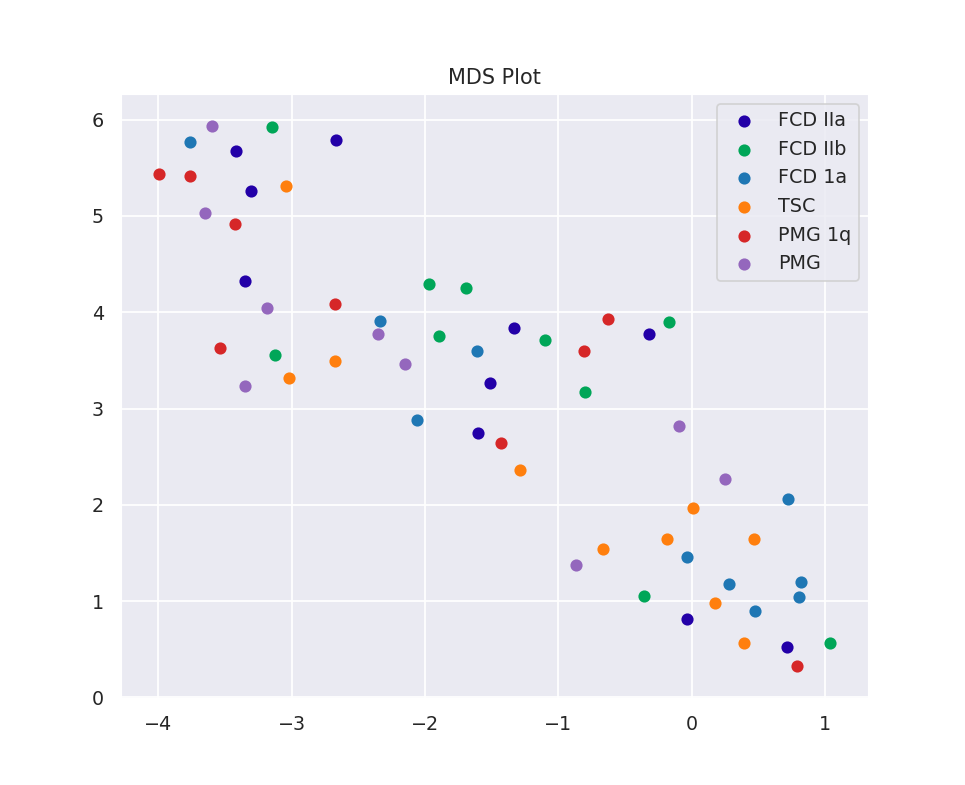

In [204]:
%matplotlib notebook
#plt.figure(figsize=(18, 15))
#plt.scatter(umap_results[:, 0], umap_results[:, 1], 
            # c=phen_keepers['sex'].to_numpy(),           
           # cmap='tab10')
#plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6),)
#plt.gca().set_aspect('equal', 'datalim')
#plt.title('UMAP projection of the dataset', fontsize=24);


import matplotlib.pyplot as plt
import seaborn as sns
group='disease'
X_transformed=pd.DataFrame(embedding)
X_transformed[group]=targets[group]   
categories = X_transformed[group]
       
colors = ['#2300A8', '#00A658','#1f77b4', '#ff7f0e', 
                       '#d62728', '#9467bd', '#8c564b', 
                      '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors=colors[:len(categories.unique())]
        
fig, ax = plt.subplots()    
for i in range(len(X_transformed)):
            
    ax.scatter(X_transformed[0].iloc[i],  
                X_transformed[1].iloc[i], 
                color = colors[i%len(colors)],
                label=categories.iloc[i])
ax.legend(categories.unique())
#ax.set_xlabel('Principal Component %s'  % (components[0]+1))
#ax.set_ylabel('Principal Component %s'  % (components[1]+1))
ax.set_title('MDS Plot')
plt.show()    

In [236]:
#t_data_df=umap_embed(methyl_arr.beta,"disease", n_neighbors=8)
t_data_df= umap_embed(betaquant_10000.transpose(),pheno['disease'].to_numpy(), n_neighbors=25, supervised=False, min_dist=0.0, metric='euclidean')

['FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2A'
 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 1A'
 'FCD 1A' 'FCD 1A' 'FCD 1A' 'FCD 1A' 'FCD 1A' 'TLE/CTRL' 'TLE/CTRL'
 'TLE/CTRL' 'TLE/CTRL' 'TLE/CTRL' 'TLE/CTRL' 'TLE/CTRL' 'TLE/CTRL'
 'TLE/CTRL' 'TLE/CTRL' 'TLE/CTRL' 'TLE/CTRL' 'TLE/CTRL' 'TLE/CTRL'
 'TLE/CTRL' 'MOGHE' 'MOGHE' 'MOGHE' 'MOGHE' 'MOGHE' 'MOGHE' 'MOGHE'
 'FCD 1A' 'FCD 1A' 'FCD 1A' 'FCD 1A' 'FCD 1A' 'FCD 1A' 'FCD 2A' 'FCD 2A'
 'FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2B' 'FCD 2A'
 'FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2A' 'HME' 'FCD 2B' 'FCD 2B' 'FCD 2B'
 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 2B'
 'FCD 2B' 'CTRL' 'CTRL' 'CTRL' 'CTRL' 'CTRL' 'CTRL' 'CTRL' 'MOGHE' 'MOGHE'
 'TSC' 'TSC' 'TSC' 'MOGHE' 'MOGHE' 'MOGHE' 'MOGHE' 'MOGHE' 'FCD 3B'
 'FCD 3B' 'FCD 3B' 'FCD 3B' 'FCD 3B' 'FCD 3B' 'FCD 3A' 'FCD 3C' 'FCD 3C'
 'FCD 3A' 'FCD 3A' 'FCD 3A' 'FCD 3D' 'FCD 3D' 'FCD 3D' 'FCD 3C' 'FCD 3C'
 'FCD 

In [240]:
path='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/'

In [241]:
plotly_plot(t_data_df, path+"preprocess_outputs/disease.html", G=None, axes_off=False)

CTRL hsl(0.0,50%,50%)
FCD 1A hsl(24.0,50%,50%)
FCD 2A hsl(48.0,50%,50%)
FCD 2B hsl(72.0,50%,50%)
FCD 3A hsl(96.0,50%,50%)
FCD 3B hsl(120.0,50%,50%)
FCD 3C hsl(144.0,50%,50%)
FCD 3D hsl(168.0,50%,50%)
HME hsl(192.0,50%,50%)
MOGHE hsl(216.0,50%,50%)
PMG hsl(240.0,50%,50%)
TLE/CTRL hsl(264.0,50%,50%)
TSC hsl(288.0,50%,50%)
mMCD hsl(312.0,50%,50%)


In [214]:
import umap
import time
time_start = time.time()

embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.003,
                      n_components=5,
                      metric='correlation'
                      )

embedding=embedding.fit_transform(beta_keepers)

print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 1.2200539112091064 seconds


<IPython.core.display.Javascript object>


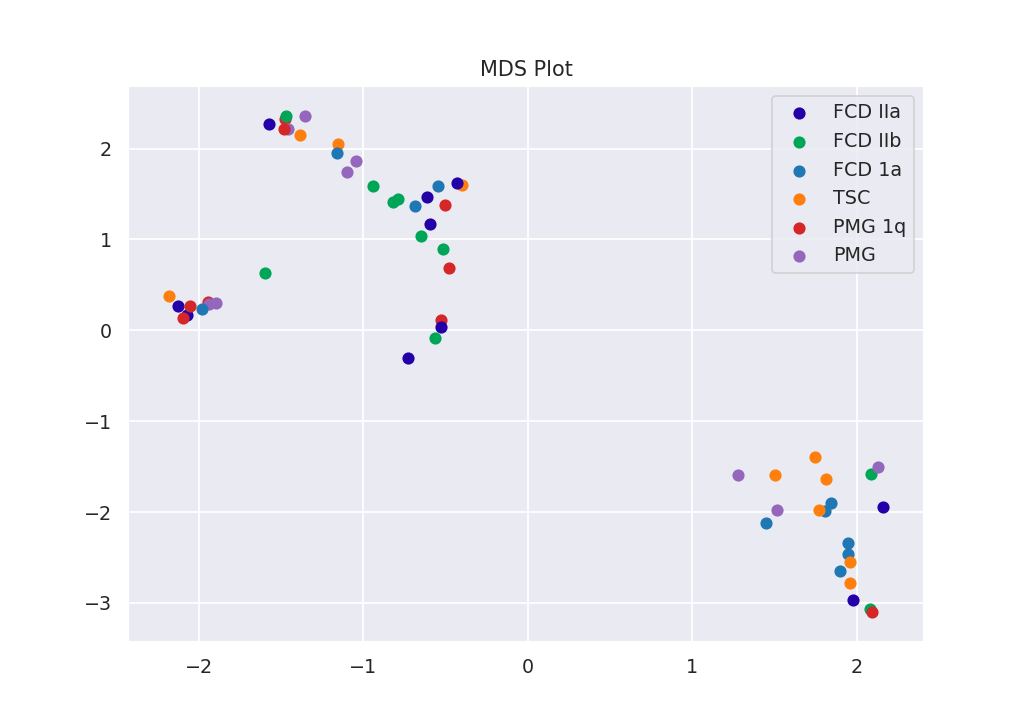

In [215]:
%matplotlib notebook
#plt.figure(figsize=(18, 15))
#plt.scatter(umap_results[:, 0], umap_results[:, 1], 
            # c=phen_keepers['sex'].to_numpy(),           
           # cmap='tab10')
#plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6),)
#plt.gca().set_aspect('equal', 'datalim')
#plt.title('UMAP projection of the dataset', fontsize=24);


import matplotlib.pyplot as plt
import seaborn as sns
group='disease'
X_transformed=pd.DataFrame(embedding)
X_transformed[group]=targets[group]   
categories = X_transformed[group]
       
colors = ['#2300A8', '#00A658','#1f77b4', '#ff7f0e', 
                       '#d62728', '#9467bd', '#8c564b', 
                      '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors=colors[:len(categories.unique())]
        
fig, ax = plt.subplots()    
for i in range(len(X_transformed)):
            
    ax.scatter(X_transformed[0].iloc[i],  
                X_transformed[1].iloc[i], 
                color = colors[i%len(colors)],
                label=categories.iloc[i])
ax.legend(categories.unique())
#ax.set_xlabel('Principal Component %s'  % (components[0]+1))
#ax.set_ylabel('Principal Component %s'  % (components[1]+1))
ax.set_title('MDS Plot')
plt.show()    

In [63]:
umap = UMAP(n_components=6)
umap.fit(beta_keepers)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=6, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [64]:
beta_keepers = pd.DataFrame(umap.transform(beta_keepers.to_numpy()),index=methyl_arr.return_idx())

In [65]:
from sklearn.decomposition import PCA
import seaborn as sns
from seaborn import cubehelix_palette
sns.set()
def reduce_plot(data, labels, legend_title):
    np.random.seed(42)
    plt.figure(figsize=(8,8))
    t_data=pd.DataFrame(PCA(n_components=2).fit_transform(data),columns=['z1','z2'])
    t_data[legend_title]=labels
    sns.scatterplot('z1','z2',hue=legend_title, cmap=cubehelix_palette(as_cmap=True),data=t_data)

<IPython.core.display.Javascript object>


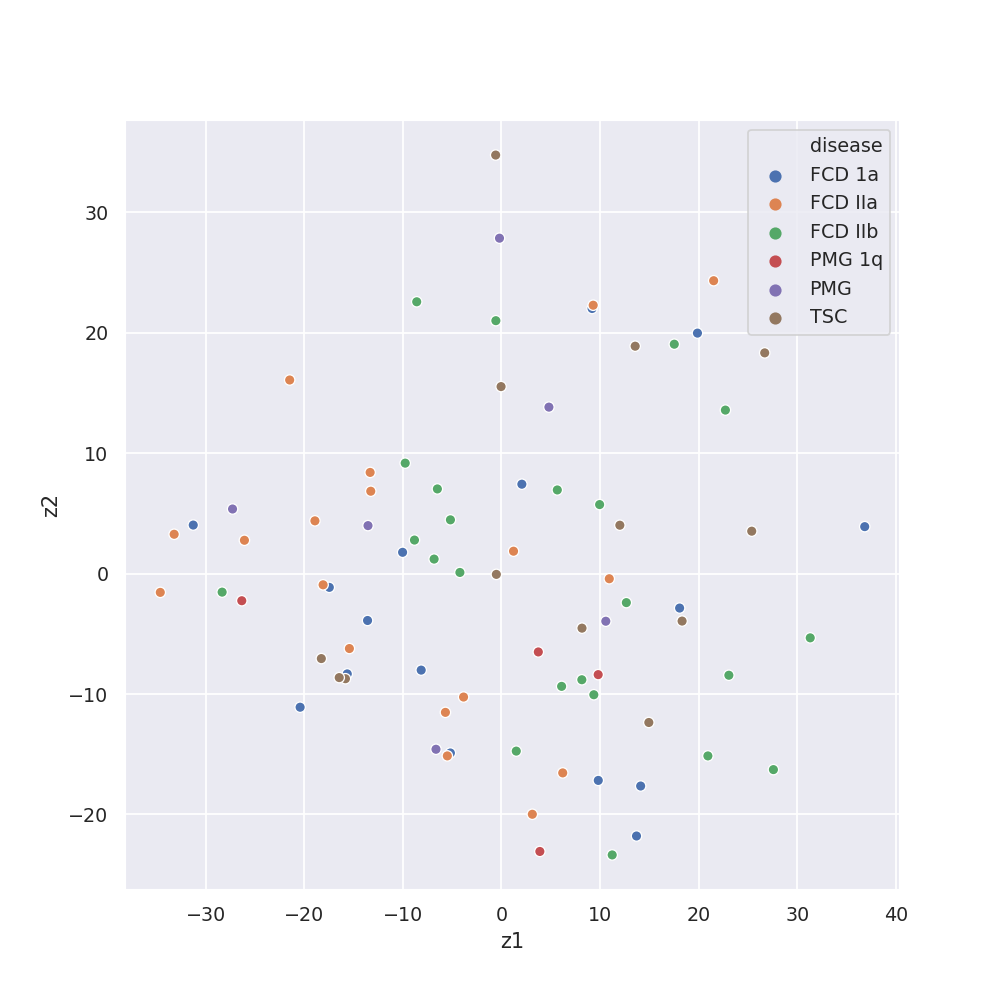

<IPython.core.display.Javascript object>


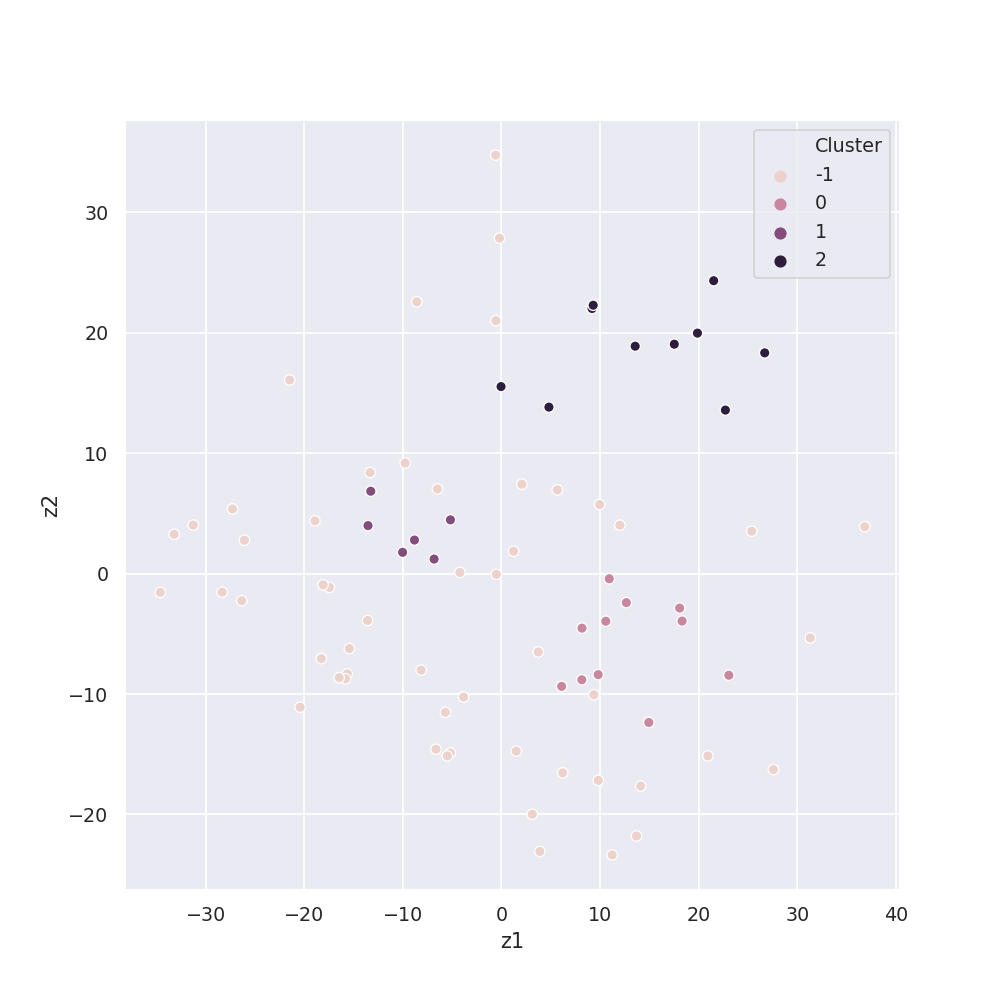

In [66]:
import hdbscan
from hdbscan import HDBSCAN
%matplotlib notebook
model = HDBSCAN(algorithm='best')
predicted_clusters = model.fit_predict(methyl_arr.beta.astype(np.float64))
reduce_plot(methyl_arr.beta, methyl_arr.pheno['disease'].values,'disease')
reduce_plot(methyl_arr.beta, predicted_clusters,'Cluster')

In [67]:
pheno_save=copy.deepcopy(methyl_arr.pheno);pheno_save


Basename  \
202818860117_R08C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202818860046_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202148010052_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202944920001_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...   
203220070086_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...   
...                                                                ...   
202093110113_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202818860053_R02C01  /home/Deep_Learner/private/network/Methyl_Arra...   
203219730055_R05C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202827620174_R01C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202827620174_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...   

                                txt_idat Lokalisation disease       Sample  \
202818860117_R08C01  202148010052_R08C01    occipital  FCD 1a       N83/03   
202818860046_R07C01  202148010053_R02C01    occipital  FCD 1a       N76/04   
202148010052_R07C01  202148010053_R03C01    occipital  FCD 1a      N714/05   
202944920001_R04C01  202148010053_R05C01    occipital  FCD 1a       N69/03   
203220070086_R06C01  202818860046_R01C01    occipital  FCD 1a   874/06 IV3   
...                                  ...          ...     ...          ...   
202093110113_R06C01  203220070086_R04C01      frontal     TSC   2174/14 IV   
202818860053_R02C01  203220070086_R05C01     temporal     TSC   1439/14 I1   
203219730055_R05C01  203220070086_R06C01     temporal     TSC    699/16 I1   
202827620174_R01C01  203220070086_R07C01      frontal     TSC  1467/16 III   
202827620174_R04C01  203220070086_R08C01      frontal     TSC    1061/17 7   

                       Center sex  age  \
202818860117_R08C01  Erlangen   f    7   
202818860046_R07C01  Erlangen   f   11   
202148010052_R07C01  Erlangen   m   15   
202944920001_R04C01  Erlangen   m    2   
203220070086_R06C01       VGT   f    5   
...                       ...  ..  ...   
202093110113_R06C01      Mara   m    3   
202818860053_R02C01       VGT   m   15   
203219730055_R05C01      Mara   f    2   
202827620174_R01C01      Mara   m    1   
202827620174_R04C01      Mara   f    3   

                                                             filenames  
202818860117_R08C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202818860046_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202148010052_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202944920001_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...  
203220070086_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...  
...                                                                ...  
202093110113_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202818860053_R02C01  /home/Deep_Learner/private/network/Methyl_Arra...  
203219730055_R05C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202827620174_R01C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202827620174_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...  

[80 rows x 9 columns]

In [68]:
methyl_arr.pheno=phen_keepers; methyl_arr.pheno

Basename  \
202818860117_R08C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202818860046_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202148010052_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202944920001_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...   
203220070086_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...   
...                                                                ...   
202093110113_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202818860053_R02C01  /home/Deep_Learner/private/network/Methyl_Arra...   
203219730055_R05C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202827620174_R01C01  /home/Deep_Learner/private/network/Methyl_Arra...   
202827620174_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...   

                                txt_idat  Lokalisation  disease       Sample  \
202818860117_R08C01  202148010052_R08C01             6        0       N83/03   
202818860046_R07C01  202148010053_R02C01             6        0       N76/04   
202148010052_R07C01  202148010053_R03C01             6        0      N714/05   
202944920001_R04C01  202148010053_R05C01             6        0       N69/03   
203220070086_R06C01  202818860046_R01C01             6        0   874/06 IV3   
...                                  ...           ...      ...          ...   
202093110113_R06C01  203220070086_R04C01             0        3   2174/14 IV   
202818860053_R02C01  203220070086_R05C01             1        3   1439/14 I1   
203219730055_R05C01  203220070086_R06C01             1        3    699/16 I1   
202827620174_R01C01  203220070086_R07C01             0        3  1467/16 III   
202827620174_R04C01  203220070086_R08C01             0        3    1061/17 7   

                       Center  sex  age  \
202818860117_R08C01  Erlangen    0    7   
202818860046_R07C01  Erlangen    0   11   
202148010052_R07C01  Erlangen    1   15   
202944920001_R04C01  Erlangen    1    2   
203220070086_R06C01       VGT    0    5   
...                       ...  ...  ...   
202093110113_R06C01      Mara    1    3   
202818860053_R02C01       VGT    1   15   
203219730055_R05C01      Mara    0    2   
202827620174_R01C01      Mara    1    1   
202827620174_R04C01      Mara    0    3   

                                                             filenames  
202818860117_R08C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202818860046_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202148010052_R07C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202944920001_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...  
203220070086_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...  
...                                                                ...  
202093110113_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202818860053_R02C01  /home/Deep_Learner/private/network/Methyl_Arra...  
203219730055_R05C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202827620174_R01C01  /home/Deep_Learner/private/network/Methyl_Arra...  
202827620174_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...  

[80 rows x 9 columns]

In [69]:
methyl_arr.beta

cg13869341  cg14008030  cg12045430  cg20826792  \
202818860117_R08C01    0.850513    0.719194    0.247386    0.308340   
202818860046_R07C01    0.902909    0.676910    0.256078    0.235865   
202148010052_R07C01    0.846774    0.725755    0.326593    0.342894   
202944920001_R04C01    0.853341    0.701647    0.260118    0.299074   
203220070086_R06C01    0.827772    0.711631    0.246219    0.277088   
...                         ...         ...         ...         ...   
202093110113_R06C01    0.728350    0.720740    0.285340    0.337049   
202818860053_R02C01    0.782737    0.654724    0.252797    0.284068   
203219730055_R05C01    0.838504    0.768745    0.215270    0.211557   
202827620174_R01C01    0.834084    0.727721    0.252724    0.341618   
202827620174_R04C01    0.860460    0.820888    0.212062    0.297683   

                     cg20253340  cg21870274  cg03130891  cg24335620  \
202818860117_R08C01    0.630020    0.712903    0.100194    0.780590   
202818860046_R07C01    0.722086    0.819937    0.252118    0.670027   
202148010052_R07C01    0.504463    0.742191    0.126534    0.691009   
202944920001_R04C01    0.591167    0.693657    0.078679    0.733747   
203220070086_R06C01    0.539531    0.767074    0.249640    0.665406   
...                         ...         ...         ...         ...   
202093110113_R06C01    0.436394    0.617682    0.159618    0.622298   
202818860053_R02C01    0.681041    0.731068    0.294153    0.730710   
203219730055_R05C01    0.467548    0.706712    0.168756    0.785976   
202827620174_R01C01    0.713977    0.791716    0.130617    0.760455   
202827620174_R04C01    0.705255    0.692276    0.077460    0.810436   

                     cg16162899  cg17149495  ...  cg22012975  cg10353737  \
202818860117_R08C01    0.829978    0.573464  ...    0.022335    0.041440   
202818860046_R07C01    0.841820    0.545785  ...    0.045854    0.036635   
202148010052_R07C01    0.858022    0.625804  ...    0.036173    0.084814   
202944920001_R04C01    0.879730    0.638450  ...    0.033367    0.036267   
203220070086_R06C01    0.851779    0.684402  ...    0.031323    0.032023   
...                         ...         ...  ...         ...         ...   
202093110113_R06C01    0.883227    0.685296  ...    0.081449    0.076860   
202818860053_R02C01    0.801872    0.592584  ...    0.036147    0.045286   
203219730055_R05C01    0.901630    0.644980  ...    0.041114    0.037365   
202827620174_R01C01    0.831830    0.649008  ...    0.038660    0.038235   
202827620174_R04C01    0.863398    0.696574  ...    0.041688    0.075205   

                     cg22531257  cg22662321  cg06996138  cg16817496  \
202818860117_R08C01    0.043349    0.102697    0.020658    0.167630   
202818860046_R07C01    0.056579    0.107848    0.042757    0.251642   
202148010052_R07C01    0.033945    0.100371    0.011947    0.222899   
202944920001_R04C01    0.033049    0.098000    0.028868    0.211833   
203220070086_R06C01    0.032339    0.086716    0.029727    0.215388   
...                         ...         ...         ...         ...   
202093110113_R06C01    0.035609    0.078988    0.028806    0.184632   
202818860053_R02C01    0.031638    0.058680    0.031400    0.171579   
203219730055_R05C01    0.031023    0.069694    0.022269    0.193902   
202827620174_R01C01    0.023250    0.066192    0.043878    0.131345   
202827620174_R04C01    0.045733    0.057824    0.027976    0.174649   

                     cg07660283  cg09226288  cg09849772  cg09975171  
202818860117_R08C01    0.633309    0.620253    0.634638    0.085533  
202818860046_R07C01    0.723438    0.753679    0.635039    0.364386  
202148010052_R07C01    0.662989    0.670849    0.556989    0.162687  
202944920001_R04C01    0.722787    0.743760    0.626435    0.491108  
203220070086_R06C01    0.708585    0.729799    0.694435    0.457601  
...                         ...         ...         ...         ...  
202093110113_R06C01    0.661243    0.561212    0.458225    

In [70]:
train, test= methyl_arr.split_train_test(train_p=0.8, stratified=True, disease_only=False, key='disease', subtype_delimiter=',', val_p=0.)

In [71]:
train.beta

cg13869341  cg14008030  cg12045430  cg20826792  \
202818860117_R08C01    0.850513    0.719194    0.247386    0.308340   
202818860046_R07C01    0.902909    0.676910    0.256078    0.235865   
202093110113_R04C01    0.832792    0.822272    0.297662    0.345871   
202831040055_R05C01    0.806084    0.759601    0.274330    0.308850   
202093110113_R01C01    0.724415    0.628900    0.301947    0.352776   
...                         ...         ...         ...         ...   
203220070086_R01C01    0.876238    0.672445    0.264957    0.337013   
203219750116_R03C01    0.736541    0.655783    0.296350    0.287901   
202831040056_R08C01    0.770200    0.654285    0.264066    0.315909   
202818860046_R06C01    0.873526    0.714972    0.260235    0.256415   
202827620174_R06C01    0.897324    0.666505    0.252136    0.316657   

                     cg20253340  cg21870274  cg03130891  cg24335620  \
202818860117_R08C01    0.630020    0.712903    0.100194    0.780590   
202818860046_R07C01    0.722086    0.819937    0.252118    0.670027   
202093110113_R04C01    0.659665    0.742105    0.092875    0.806898   
202831040055_R05C01    0.632518    0.645783    0.172367    0.763397   
202093110113_R01C01    0.686242    0.788242    0.108089    0.775996   
...                         ...         ...         ...         ...   
203220070086_R01C01    0.553535    0.762584    0.160544    0.661742   
203219750116_R03C01    0.625632    0.740331    0.183648    0.613493   
202831040056_R08C01    0.704772    0.721115    0.146855    0.632033   
202818860046_R06C01    0.708868    0.771585    0.100593    0.688782   
202827620174_R06C01    0.688904    0.763722    0.147641    0.736610   

                     cg16162899  cg17149495  ...  cg22012975  cg10353737  \
202818860117_R08C01    0.829978    0.573464  ...    0.022335    0.041440   
202818860046_R07C01    0.841820    0.545785  ...    0.045854    0.036635   
202093110113_R04C01    0.880707    0.545088  ...    0.030093    0.057515   
202831040055_R05C01    0.861724    0.566117  ...    0.019291    0.029606   
202093110113_R01C01    0.894669    0.543882  ...    0.051553    0.064821   
...                         ...         ...  ...         ...         ...   
203220070086_R01C01    0.902998    0.611365  ...    0.026529    0.051891   
203219750116_R03C01    0.847974    0.515947  ...    0.048221    0.046179   
202831040056_R08C01    0.855985    0.630585  ...    0.031281    0.054325   
202818860046_R06C01    0.844320    0.592709  ...    0.032857    0.031962   
202827620174_R06C01    0.841455    0.682531  ...    0.024743    0.073469   

                     cg22531257  cg22662321  cg06996138  cg16817496  \
202818860117_R08C01    0.043349    0.102697    0.020658    0.167630   
202818860046_R07C01    0.056579    0.107848    0.042757    0.251642   
202093110113_R04C01    0.055628    0.069473    0.026968    0.211608   
202831040055_R05C01    0.074786    0.062484    0.035408    0.193334   
202093110113_R01C01    0.048872    0.057090    0.023369    0.250920   
...                         ...         ...         ...         ...   
203220070086_R01C01    0.037043    0.088415    0.021903    0.191658   
203219750116_R03C01    0.035891    0.089590    0.021566    0.223194   
202831040056_R08C01    0.036835    0.070665    0.017172    0.176605   
202818860046_R06C01    0.049459    0.059982    0.035378    0.218042   
202827620174_R06C01    0.078268    0.076454    0.030953    0.184076   

                     cg07660283  cg09226288  cg09849772  cg09975171  
202818860117_R08C01    0.633309    0.620253    0.634638    0.085533  
202818860046_R07C01    0.723438    0.753679    0.635039    0.364386  
202093110113_R04C01    0.639698    0.636215    0.436607    0.074287  
202831040055_R05C01    0.668529    0.691457    0.546514    0.104408  
202093110113_R01C01    0.669448    0.622119    0.492927    0.105569  
...                         ...         ...         ...         ...  
203220070086_R01C01    0.694927    0.744490    0.672965    

In [72]:
train.pheno['disease'].to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5])

In [73]:
test.pheno['disease'].to_numpy()

array([0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 5, 4, 3, 3, 3])

In [109]:
y_test

81          PMG
4        FCD 1a
40      FCD IIb
69          PMG
10       FCD 1a
45      FCD IIb
70          PMG
66      FCD IIb
47      FCD IIb
11       FCD 1a
100    TLE/CTRL
36      FCD IIa
84          TSC
113    TLE/CTRL
18      FCD IIa
0        FCD 1a
72          PMG
26      FCD IIa
105    TLE/CTRL
53      FCD IIb
94          TSC
112    TLE/CTRL
12       FCD 1a
31      FCD IIa
67          PMG
93          TSC
109    TLE/CTRL
22      FCD IIa
44      FCD IIb
108    TLE/CTRL
78          PMG
15      FCD IIa
30      FCD IIa
83          TSC
9        FCD 1a
Name: disease, dtype: object

# Machine learning

In [115]:
LabelEncoder().fit_transform(pheno['disease'].reset_index(drop=True).to_numpy())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4])

In [215]:
x=betaquant_10000.transpose()
y=pheno['disease'].reset_index(drop=True)

In [216]:
y

0        FCD 1a
1        FCD 1a
2        FCD 1a
3        FCD 1a
4        FCD 1a
         ...   
110    TLE/CTRL
111    TLE/CTRL
112    TLE/CTRL
113    TLE/CTRL
114    TLE/CTRL
Name: disease, Length: 115, dtype: object

In [217]:
x

cg11677533  cg15425033  cg26870438  \
FCD 1a.N83/03                            0.437202    0.540908    0.428140   
FCD 1a.N90/04                            0.394293    0.600646    0.436396   
FCD 1a.N76/04                            0.418244    0.685483    0.460122   
FCD 1a.N979/06                           0.555618    0.449355    0.542039   
FCD 1a.N69/03                            0.474396    0.522181    0.483764   
...                                           ...         ...         ...   
TLE/CTRL.N878/15; 114/15 (Bielefeld)     0.576411    0.499043    0.556945   
TLE/CTRL.N1012/15; 133/15 (Bielefeld)    0.462371    0.484897    0.528961   
TLE/CTRL.N1151/15; 149/15 (Bielefeld)    0.530803    0.492591    0.438410   
TLE/CTRL.N1661/15; 218/15 (Bielefeld)    0.524330    0.560108    0.431014   
TLE/CTRL.N1743/15; 234/15 (Bielefeld)    0.502630    0.486710    0.517787   

                                       cg18067644  cg13836748  cg19641284  \
FCD 1a.N83/03                            0.695986    0.357656    0.218214   
FCD 1a.N90/04                            0.714843    0.492883    0.231479   
FCD 1a.N76/04                            0.638053    0.567607    0.228869   
FCD 1a.N979/06                           0.896521    0.528292    0.503600   
FCD 1a.N69/03                            0.758204    0.483759    0.363885   
...                                           ...         ...         ...   
TLE/CTRL.N878/15; 114/15 (Bielefeld)     0.866306    0.564885    0.342408   
TLE/CTRL.N1012/15; 133/15 (Bielefeld)    0.845222    0.557815    0.342119   
TLE/CTRL.N1151/15; 149/15 (Bielefeld)    0.786627    0.594676    0.355296   
TLE/CTRL.N1661/15; 218/15 (Bielefeld)    0.822576    0.611285    0.299278   
TLE/CTRL.N1743/15; 234/15 (Bielefeld)    0.820252    0.443429    0.330435   

                                       cg10146423  cg23975840  cg13909775  \
FCD 1a.N83/03                            0.362370    0.428808    0.336807   
FCD 1a.N90/04                            0.306626    0.363333    0.358732   
FCD 1a.N76/04                            0.354478    0.378122    0.328360   
FCD 1a.N979/06                           0.517908    0.450776    0.172059   
FCD 1a.N69/03                            0.423194    0.403307    0.221713   
...                                           ...         ...         ...   
TLE/CTRL.N878/15; 114/15 (Bielefeld)     0.380385    0.512778    0.245205   
TLE/CTRL.N1012/15; 133/15 (Bielefeld)    0.258060    0.369387    0.200148   
TLE/CTRL.N1151/15; 149/15 (Bielefeld)    0.393482    0.404364    0.190294   
TLE/CTRL.N1661/15; 218/15 (Bielefeld)    0.342301    0.436638    0.144962   
TLE/CTRL.N1743/15; 234/15 (Bielefeld)    0.342552    0.380765    0.265067   

                                       cg02499678  ...  cg08796252  \
FCD 1a.N83/03                            0.501103  ...    0.142303   
FCD 1a.N90/04                            0.525720  ...    0.233126   
FCD 1a.N76/04                            0.482545  ...    0.273138   
FCD 1a.N979/06                           0.639532  ...    0.333706   
FCD 1a.N69/03                            0.604742  ...    0.345279   
...                                           ...  ...         ...   
TLE/CTRL.N878/15; 114/15 (Bielefeld)     0.630603  ...    0.257134   
TLE/CTRL.N1012/15; 133/15 (Bielefeld)    0.628354  ...    0.322546   
TLE/CTRL.N1151/15; 149/15 (Bielefeld)    0.572293  ...    0.248621   
TLE/CTRL.N1661/15; 218/15 (Bielefeld)    0.617782  ...    0.264325   
TLE/CTRL.N1743/15; 234/15 (Bielefeld)    0.576211  ...    0.301568   

                                       cg14155327  cg08072685  cg23896901  \
FCD 1a.N83/03                            0.329880    0.370356    0.436562   
FCD 1a.N90/04                            0.326100    0.280536    0.616000   
FCD 1a.N76/04                            0.312903    0.375825    0.467933   
FCD 1a.N979/06                           0.381587    0.443952    0.473390   
FCD 1a.N69/03                         

In [123]:
from pymethylprocess.general_machine_learning import MachineLearning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

y_pred = {}
scores={}
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred['train']=model.predict(X_train)
y_pred['test']=model.predict(X_test)

scores['train']=accuracy_score(y_train,y_pred['train'])
scores['test']=accuracy_score(y_test,y_pred['test'])

scores

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



{'train': 1.0, 'test': 0.6}

In [125]:
%matplotlib notebook
data=pd.DataFrame(model.feature_importances_,columns=['Importance'])
data=data.sort_values('Importance').iloc[::-1]
data['sample']=np.arange(len(data.index))

#plt.figure(figsize=(5,5))
#sns.barplot('sample','Importance',data=data)
#plt.axis('off')

In [126]:
data

Importance  sample
4669    0.029923       0
1127    0.027185       1
3708    0.025018       2
9229    0.024626       3
7572    0.021961       4
...          ...     ...
7083    0.000000   10638
7082    0.000000   10639
7081    0.000000   10640
7080    0.000000   10641
0       0.000000   10642

[10643 rows x 2 columns]

In [246]:
import sklearn
sklearn.metrics.accuracy_score

<module 'sklearn.metrics' from '/opt/conda/lib/python3.7/site-packages/sklearn/metrics/__init__.py'>

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.7/site

LR: 0.114035 (0.096889)
KNN: 0.096491 (0.086838)
CART: 0.087494 (0.054330)
SGD: 0.070175 (0.081348)
SVC: 0.008772 (0.012405)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Neural_Net: 0.052632 (0.074432)


<IPython.core.display.Javascript object>


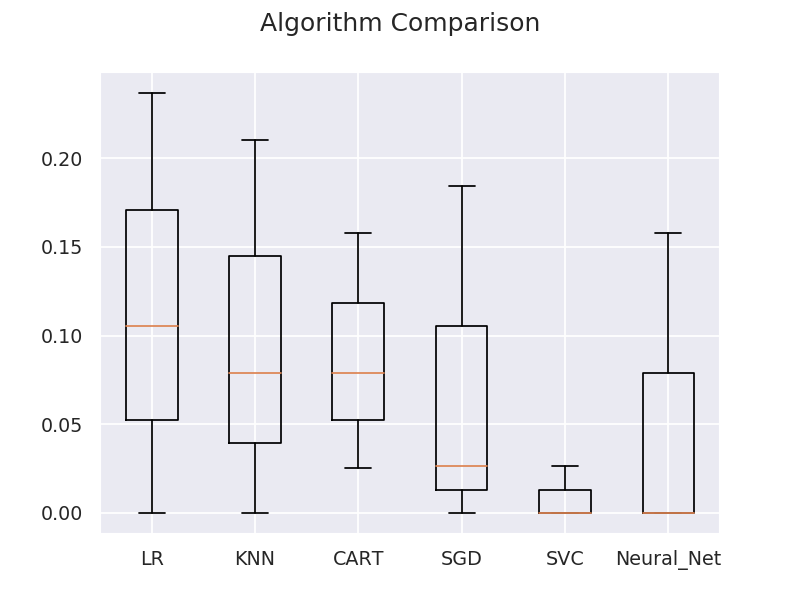

In [218]:
### Comparing different performances of models in scikit learn
# prepare models
%matplotlib notebook
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#neural_net = KerasRegressor(build_fn=create_model, epochs=150, batch_size=128, verbose=0)#### this is where we take the create_model 
seed=7
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN',  KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('SVC', SVC(gamma='auto')))
models.append(('Neural_Net',MLPClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=3, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x,  y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [220]:
### Bagged Decision Trees for Classification
seed=7
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

Y = y_train.to_numpy()
X = X_train.reset_index(drop=True).to_numpy()

kfold = model_selection.KFold(n_splits=3, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 50
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

0.6016144349477682


In [221]:
# Extra Trees Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import ExtraTreesClassifier



num_trees = 100
max_features = 4
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

0.625


<IPython.core.display.Javascript object>


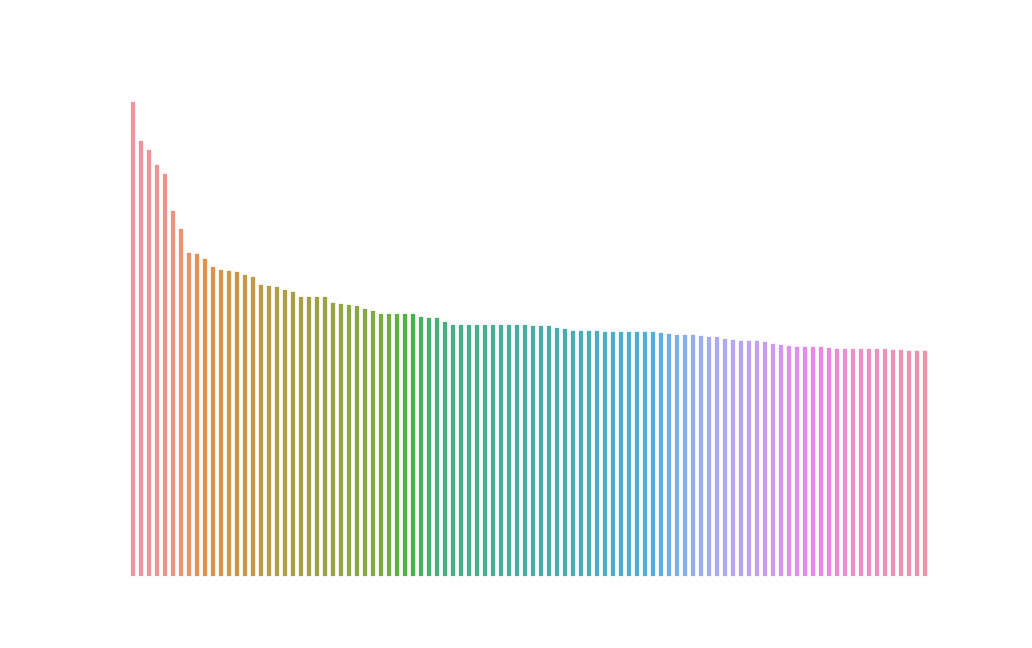

(-0.5, 99.5, 0.0, 0.0010417630853994486)

In [231]:
%matplotlib notebook
model.fit(X,Y)
data=pd.DataFrame(model.feature_importances_,columns=['Importance'])
data=data.sort_values('Importance').iloc[::-1]
data['sample']=np.arange(len(data.index))

plt.figure(figsize=(5,5))
sns.barplot('sample','Importance',data=data[:100])
plt.axis('off')

In [232]:
from umap import UMAP
from sklearn.preprocessing import LabelEncoder
def umap_embed(beta_df, outcome_col, n_neighbors, supervised=False, min_dist=0.1, metric='euclidean'):
    umap=UMAP(n_components=3, random_state=42, metric=metric, n_neighbors=n_neighbors, min_dist=min_dist)
    t_data=pd.DataFrame(umap.fit_transform(beta_df) if not supervised else umap.fit_transform(beta_df,LabelEncoder().fit_transform(outcome_col)),index=beta_df.index,columns=['x','y','z'])
    print(outcome_col,t_data)
    t_data['color']=outcome_col
    return t_data

In [234]:
betaquant_10000

FCD 2A.202093110108_R07C01  FCD 2A.202093110108_R08C01  \
cg09790502                   -3.828723                   -3.885970   
cg02472825                    3.302871                    2.545520   
cg04987614                   -3.676761                   -2.787891   
cg23097474                    2.648491                    2.888354   
cg17130063                   -1.265592                   -0.775957   
...                                ...                         ...   
cg09584521                    1.043580                    0.337201   
cg09888297                    0.102372                    0.054755   
cg07737503                   -0.608665                    0.022531   
cg27154177                    0.620446                    0.720207   
cg03872783                   -0.541976                   -0.064800   

            FCD 2A.202093110113_R01C01  FCD 2A.202093110113_R02C01  \
cg09790502                   -3.766463                   -3.951359   
cg02472825                    2.890073                    2.809585   
cg04987614                   -3.239688                   -3.179980   
cg23097474                    2.992317                    2.957967   
cg17130063                   -1.361674                   -0.939440   
...                                ...                         ...   
cg09584521                    1.543364                    1.058077   
cg09888297                   -0.793740                   -0.401428   
cg07737503                    0.888199                    0.794302   
cg27154177                    0.313889                    0.815751   
cg03872783                   -0.193611                    0.175961   

            FCD 2A.202093110113_R03C01  FCD 2A.202093110113_R04C01  \
cg09790502                   -3.802550                   -4.066022   
cg02472825                    2.276212                    2.723141   
cg04987614                   -3.042963                   -3.537744   
cg23097474                    3.224286                    2.742577   
cg17130063                   -1.244485                   -1.034920   
...                                ...                         ...   
cg09584521                    1.583071                    0.367823   
cg09888297                    0.027256                   -0.873655   
cg07737503                    1.144262                    0.124888   
cg27154177                    0.890684                    0.838524   
cg03872783                   -0.268639                   -0.196595   

            FCD 2A.202093110113_R05C01  FCD 2A.202093110113_R06C01  \
cg09790502                   -3.722417                   -3.941067   
cg02472825                    3.328982                    2.775667   
cg04987614                   -3.394263                   -2.924430   
cg23097474                    3.034530                    3.156834   
cg17130063                   -1.055942                   -2.152761   
...                                ...                         ...   
cg09584521                    0.925302                    0.446530   
cg09888297                   -0.920443                   -0.713359   
cg07737503                    0.149467                    0.725551   
cg27154177                    0.644153                    0.810076   
cg03872783                   -0.049873                   -0.369895   

            FCD 2B.202093110113_R07C01  FCD 2B.202148010052_R01C01  ...  \
cg09790502                   -3.447552                   -3.948625  ...   
cg02472825                    2.517656                    2.927269  ...   
cg04987614                   -3.461056                   -2.852745  ...   
cg23097474                    2.538221                    2.262135  ...   
cg17130063                   -1.658683                   -1.791346  ...   
...                                ...                         ...  ...   
cg09584521                    0.773787                    1.415487  ...   
cg09888297                   -0.578833          

In [235]:
umap_embed(betaquant_10000.transpose(), pheno['disease'].to_numpy(),25,False, 0.0 )

['FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2A'
 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 1A'
 'FCD 1A' 'FCD 1A' 'FCD 1A' 'FCD 1A' 'FCD 1A' 'TLE/CTRL' 'TLE/CTRL'
 'TLE/CTRL' 'TLE/CTRL' 'TLE/CTRL' 'TLE/CTRL' 'TLE/CTRL' 'TLE/CTRL'
 'TLE/CTRL' 'TLE/CTRL' 'TLE/CTRL' 'TLE/CTRL' 'TLE/CTRL' 'TLE/CTRL'
 'TLE/CTRL' 'MOGHE' 'MOGHE' 'MOGHE' 'MOGHE' 'MOGHE' 'MOGHE' 'MOGHE'
 'FCD 1A' 'FCD 1A' 'FCD 1A' 'FCD 1A' 'FCD 1A' 'FCD 1A' 'FCD 2A' 'FCD 2A'
 'FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2B' 'FCD 2A'
 'FCD 2A' 'FCD 2A' 'FCD 2A' 'FCD 2A' 'HME' 'FCD 2B' 'FCD 2B' 'FCD 2B'
 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 2B' 'FCD 2B'
 'FCD 2B' 'CTRL' 'CTRL' 'CTRL' 'CTRL' 'CTRL' 'CTRL' 'CTRL' 'MOGHE' 'MOGHE'
 'TSC' 'TSC' 'TSC' 'MOGHE' 'MOGHE' 'MOGHE' 'MOGHE' 'MOGHE' 'FCD 3B'
 'FCD 3B' 'FCD 3B' 'FCD 3B' 'FCD 3B' 'FCD 3B' 'FCD 3A' 'FCD 3C' 'FCD 3C'
 'FCD 3A' 'FCD 3A' 'FCD 3A' 'FCD 3D' 'FCD 3D' 'FCD 3D' 'FCD 3C' 'FCD 3C'
 'FCD 

x         y         z   color
FCD 2A.202093110108_R07C01 -2.101254  6.940692  0.713474  FCD 2A
FCD 2A.202093110108_R08C01 -2.325230  7.068566  0.372762  FCD 2A
FCD 2A.202093110113_R01C01 -2.074747  6.500889  0.546459  FCD 2A
FCD 2A.202093110113_R02C01 -2.621216  7.223902  0.102510  FCD 2A
FCD 2A.202093110113_R03C01 -2.476700  7.006453  0.149521  FCD 2A
...                              ...       ...       ...     ...
mMCD.203273200229_R04C01   -2.011627  4.398716  0.997802    mMCD
mMCD.203273200229_R05C01   -2.171961  4.114190  1.060445    mMCD
mMCD.203273200229_R06C01   -2.191501  4.040209  1.101657    mMCD
mMCD.203273200229_R07C01   -2.205567  4.029386  1.133789    mMCD
mMCD.203273630036_R02C01   -2.142229  4.088699  1.012153    mMCD

[172 rows x 4 columns]

In [262]:
# AdaBoost Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

Y = Y_train
X = X_train

num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

0.2125


In [263]:
# Stochastic Gradient Boosting Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier





num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

0.55


In [265]:
# Voting Ensemble for Classification
import pandas

from sklearn import model_selection


from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
#reload(sklearn.neighbors)
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

#from keras.wrappers.scikit_learn import KerasRegressor
#neural_net = KerasRegressor(build_fn=create_model, epochs=150, batch_size=128, verbose=0)#### this is where we take the create_model 
# create the sub models
models = []
models.append(('LR', LogisticRegression()))
models.append(('DCT',  DecisionTreeClassifier()))
models.append(('KNN',  KNeighborsClassifier()))
models.append(('SVC', SVC(gamma='auto')))




kfold = model_selection.KFold(n_splits=10, random_state=seed)


# create the ensemble model
ensemble = VotingClassifier(models)
scoring = 'accuracy'
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.7/site

0.6625


In [231]:
from xgboost import XGBClassifier
from vecstack import stacking

from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from keras.wrappers.scikit_learn import KerasRegressor
#neural_net = KerasRegressor(build_fn=create_model, epochs=150, batch_size=128, verbose=0)#### this is where we take the create_model 



#from keras.wrappers.scikit_learn import KerasRegressor

models = []
models.append(ExtraTreesClassifier(random_state=0, n_jobs=-1, 
                        n_estimators=100, max_depth=3))
        
models.append(RandomForestClassifier(random_state=0, n_jobs=-1, 
                          n_estimators=100, max_depth=3))
        
models.append(XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                 n_estimators=100, max_depth=3))
    

    
models.append(KNeighborsClassifier())

models.append( SVC(gamma='auto'))

Y_train =  LabelEncoder().fit_transform(y_train)  
X_train = X_train
X_val= X_test
Y_val = LabelEncoder().fit_transform(y_test)  

S_train, S_test = stacking(models,                     # list of models
                           X_train, Y_train, X_val,              # data
                           regression=False,            # regression task (if you need 
                                                       #     classification - set to False)
                           mode='oof_pred_bag',        # mode: oof for train set, predict test 
                                                       #     set in each fold and find mean
                           save_dir=None,              # do not save result and log (to save 
                                                       #     in current dir - set to '.')
                           metric=accuracy_score, # metric: callable
                           n_folds=10,                 # number of folds
                           shuffle=True,               # shuffle the data
                           random_state=seed,          # ensure reproducibility
                           verbose=2)                  # print all info    
    
    


task:         [classification]
n_classes:    [6]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [ExtraTreesClassifier]
    fold  0:  [0.50000000]
    fold  1:  [0.75000000]
    fold  2:  [0.50000000]
    fold  3:  [0.62500000]
    fold  4:  [0.62500000]
    fold  5:  [0.37500000]
    fold  6:  [0.87500000]
    fold  7:  [0.62500000]
    fold  8:  [0.37500000]
    fold  9:  [0.75000000]
    ----
    MEAN:     [0.60000000] + [0.15612495]
    FULL:     [0.60000000]

model  1:     [RandomForestClassifier]
    fold  0:  [0.50000000]
    fold  1:  [0.75000000]
    fold  2:  [0.50000000]
    fold  3:  [0.62500000]
    fold  4:  [0.75000000]
    fold  5:  [0.37500000]
    fold  6:  [0.87500000]
    fold  7:  [0.62500000]
    fold  8:  [0.50000000]
    fold  9:  [0.62500000]
    ----
    MEAN:     [0.61250000] + [0.14197271]
    FULL:     [0.61250000]

model  2:     [XGBClassifier]
    fold  0:  [0.50000000]
    fold  1:  [0.62500000]
    fold  2:  

In [260]:
from sklearn.linear_model import ElasticNet
# Initialize 2nd level model
model = ElasticNet()
    
# Fit 2nd level model
model = model.fit(S_train, Y_train)

# Predict
Y_pred = model.predict(S_test)

# Final prediction score
print('Final prediction score: [%.8f]' % mean_absolute_error(Y_val, Y_pred))

Final prediction score: [0.89091445]


In [257]:
from mlens.ensemble import SuperLearner
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

# --- Build ---
scoring = accuracy_score
# Passing a scoring function will create cv scores during fitting
# the scorer should be a simple function accepting to vectors and returning a scalar
ensemble = SuperLearner(scorer=scoring, random_state=seed, verbose=2)

# Build the first layer

ensemble.add([
           ExtraTreesClassifier(random_state=0, n_jobs=-1, 
                        n_estimators=100, max_depth=3),
        
           RandomForestClassifier(random_state=0, n_jobs=-1, 
                          n_estimators=100, max_depth=3),
        
           #XGBRegressor(random_state=0, n_jobs=-1, learning_rate=0.1, 
           #      n_estimators=100, max_depth=3),
    
           #LinearRegression(),
    
           #ElasticNet(),
    
           KNeighborsClassifier(),

           SVC(gamma='auto')
             ])

# Attach the final meta estimator
ensemble.add_meta(ElasticNet())

# --- Use ---

# Fit ensemble
ensemble.fit(X_train, Y_train)

# Predict
preds = ensemble.predict(X_train)


Fitting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00


/opt/conda/lib/python3.7/site-packages/mlens/parallel/_base_functions.py:226: MetricWarning:

[elasticnet.0.0] Could not score elasticnet. Details:
ValueError("Classification metrics can't handle a mix of multiclass and continuous targets")



Fit complete                        | 00:00:02

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:01


In [258]:
print("Fit data:\n%r" % ensemble.data)

Fit data:
                                   score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  extratreesclassifier         0.50     0.03  0.54  0.05  0.12  0.00
layer-1  kneighborsclassifier         0.47     0.05  0.09  0.02  0.13  0.00
layer-1  randomforestclassifier       0.54     0.01  0.50  0.02  0.12  0.00
layer-1  svc                          0.21     0.04  0.09  0.01  0.04  0.01



In [261]:
print("Prediction score: %.3f" % mean_absolute_error(preds, Y_train))

Prediction score: 1.117


In [41]:
def est_cell_counts_dlpfc(rgset):
    """Given RGSet object, estimate cell counts using reference approach via minfi.
    Parameters
    ----------
    rgset
        RGSet object stored in python via rpy2"""
    robjects.r('library(FlowSorted.DLPFC.450k)')
    cell_count_estimates = robjects.r("""function (RGset) {
        cellCounts <- estimateCellCounts(RGset, compositeCellType = "DLPFC",
                   processMethod = "auto", probeSelect = "both",
                   cellTypes = c("NeuN_neg", "NeuN_pos"),
                   referencePlatform = c("IlluminaHumanMethylation450k",
                                         "IlluminaHumanMethylationEPIC",
                                         "IlluminaHumanMethylation27k"),
                   returnAll = TRUE, meanPlot = FALSE, verbose = TRUE, ...removeBadSamples = TRUE)
        return(cellCounts)
        }""")(rgset)
    return cell_count_estimates

In [38]:
rg=path+'RGSet.rds';rg

'/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/RGSet.rds'

In [42]:
rgset=robjects.r('readRDS')(rg)

In [44]:
nc, table, normdat = est_cell_counts_dlpfc(rgset)

In [45]:
normdat

R object with classes: ('GenomicRatioSet',) mapped to:
<RS4 - Python:0x7f2848661bc8 / R:0x55d21601b620>

In [22]:
#remove_sex(input_pkl,output_pkl, array_type)
import os
def remove_sex_df(input_df, output_df, array_type):
    """Remove non-autosomal CpGs.
     array_type: '450k' or 'epic'
     """
    import numpy as np
    from rpy2.robjects import pandas2ri
    from pymethylprocess.meffil_functions import r_autosomal_cpgs
    pandas2ri.activate()
    #os.makedirs(output_pkl[:output_pkl.rfind('/')],exist_ok=True)
    autosomal_cpgs = r_autosomal_cpgs(array_type)#pandas2ri.ri2py()
    methyl_array=MethylationArray.from_pickle(input_pkl)
    methyl_array.beta = methyl_array.beta.loc[:,np.intersect1d(list(methyl_array.beta),autosomal_cpgs)]
    methyl_array.write_pickle(output_pkl)
    
    
def est_age_df(input_df,age_column,analyses,output_df):
    """Estimate age using cgAgeR"""
    import pandas as pd
    import rpy2.robjects as robjects
    from rpy2.robjects.packages import importr
    from rpy2.robjects import pandas2ri, numpy2ri
    pandas2ri.activate()
    os.makedirs(output_csv[:output_csv.rfind('/')],exist_ok=True)
    methyl_array = MethylationArray.from_pickle(input_pkl)
    if age_column:
        age_column = pandas2ri.py2ri(methyl_array.pheno[age_column])
    else:
        age_column = robjects.r('NULL')
    run_analyses = dict(epitoc=False, horvath=False, hannum=False)
    for analysis in analyses:
        run_analyses[analysis] = True
    importr('cgageR')
    returned_ages = robjects.r("""function (beta, hannum, horvath, epitoc, age) {
                return(getAgeR(beta, epitoc=epitoc, horvath=horvath, hannum=hannum, chrage=age))
                }""")(methyl_array.beta.T, run_analyses['hannum'], run_analyses['horvath'], run_analyses['epitoc'], age_column)
    result_dfs = []
    return_data = lambda data_str: robjects.r("""function (results) results{}""".format(data_str))(returned_ages)
    if 'hannum' in analyses:
        result_dfs.append(pandas2ri.ri2py(return_data('$HannumClock.output$Hannum.Clock.Est')))
    if 'epitoc' in analyses:
        result_dfs.append(pandas2ri.ri2py(return_data('$EpiTOC.output$EpiTOC.Est')))
    if 'horvath' in analyses:
        result_dfs.append(pandas2ri.ri2py(return_data('$HorvathClock.output$Horvath.Est')))
    df=pd.concat(result_dfs,axis=1)
    df.index = methyl_array.pheno.index
    df.to_csv(output_csv)
    print(df)    
    
def remove_snps(input_df,output_df, array_type):
    """Remove SNPs from methylation array."""
    import numpy as np
    #from rpy2.robjects import pandas2ri
    from pymethylprocess.meffil_functions import r_snp_cpgs
    #pandas2ri.activate()
    os.makedirs(output_pkl[:output_pkl.rfind('/')],exist_ok=True)
    snp_cpgs = r_snp_cpgs(array_type)#pandas2ri.ri2py()
    methyl_array=MethylationArray.from_pickle(input_pkl)
    methyl_array.beta = methyl_array.beta.loc[:,np.setdiff1d(list(methyl_array.beta),snp_cpgs)]
    methyl_array.write_pickle(output_pkl)    

In [157]:
methyl_arr.pheno['Sex']

GSM2333901_9370847096_R05C02      Male
GSM2333902_9376538120_R06C01      Male
GSM2333903_7766148053_R06C02      Male
GSM2333904_7766148077_R04C02      Male
GSM2333905_9370847096_R06C02      Male
                                 ...  
GSM2334631_7766148080_R04C02      Male
GSM2334632_7766148080_R03C02      Male
GSM2334633_7766148084_R01C01    Female
GSM2334634_7766148080_R05C02    Female
GSM2334635_7766148053_R04C02      Male
Name: Sex, Length: 730, dtype: object

In [115]:
methyl_arr.remove_na_samples('Sex')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [158]:
import umap
from umap import UMAP
import sklearn

imput=ImputerObject(solver="sklearn",method="MICE")
imputer=imput.return_imputer()

Please install development branch of iterative imputer from sklearn. Defaulting to mean imputation.


In [159]:
methyl_arr.impute(imputer)

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce



In [161]:
methyl_arr.beta#.isnull().sum()

cg01707559  cg02494853  cg03244189  cg03706273  \
GSM2333901_9370847096_R05C02    0.041789    0.004105    0.026653    0.005452   
GSM2333902_9376538120_R06C01    0.025227    0.003057    0.030391    0.010509   
GSM2333903_7766148053_R06C02    0.027410    0.004107    0.012831    0.004256   
GSM2333904_7766148077_R04C02    0.067892    0.008521    0.021200    0.017496   
GSM2333905_9370847096_R06C02    0.039050    0.001944    0.014943    0.002930   
...                                  ...         ...         ...         ...   
GSM2334631_7766148080_R04C02    0.041057    0.003728    0.012729    0.008277   
GSM2334632_7766148080_R03C02    0.039541    0.003959    0.016306    0.019899   
GSM2334633_7766148084_R01C01    0.161974    0.005150    0.080063    0.037299   
GSM2334634_7766148080_R05C02    0.183820    0.007353    0.193135    0.007050   
GSM2334635_7766148053_R04C02    0.072396    0.006598    0.131272    0.028280   

                              cg04023335  cg04462340  cg04792227  cg04964672  \
GSM2333901_9370847096_R05C02    0.565901    0.988924    0.175333    0.948933   
GSM2333902_9376538120_R06C01    0.728393    0.984273    0.245144    0.978620   
GSM2333903_7766148053_R06C02    0.637815    0.982667    0.111511    0.975766   
GSM2333904_7766148077_R04C02    0.746468    0.987413    0.151229    0.952968   
GSM2333905_9370847096_R06C02    0.558635    0.976059    0.160689    0.967793   
...                                  ...         ...         ...         ...   
GSM2334631_7766148080_R04C02    0.681785    0.975758    0.333288    0.972625   
GSM2334632_7766148080_R03C02    0.663782    0.972820    0.282969    0.968762   
GSM2334633_7766148084_R01C01    0.080581    0.892430    0.207925    0.763950   
GSM2334634_7766148080_R05C02    0.116886    0.861993    0.280171    0.886739   
GSM2334635_7766148053_R04C02    0.657081    0.986705    0.391968    0.969589   

                              cg05213048  cg15027426  ...  ch.22.740407F  \
GSM2333901_9370847096_R05C02    0.928304    0.317465  ...       0.006590   
GSM2333902_9376538120_R06C01    0.867715    0.128783  ...       0.007667   
GSM2333903_7766148053_R06C02    0.878543    0.122834  ...       0.008749   
GSM2333904_7766148077_R04C02    0.956059    0.253316  ...       0.008091   
GSM2333905_9370847096_R06C02    0.854043    0.265369  ...       0.006274   
...                                  ...         ...  ...            ...   
GSM2334631_7766148080_R04C02    0.863981    0.293381  ...       0.011299   
GSM2334632_7766148080_R03C02    0.899154    0.355577  ...       0.010008   
GSM2334633_7766148084_R01C01    0.700253    0.111723  ...       0.008631   
GSM2334634_7766148080_R05C02    0.697566    0.101493  ...       0.006389   
GSM2334635_7766148053_R04C02    0.860747    0.376406  ...       0.007843   

                              ch.22.757911F  ch.22.772318F  ch.22.43177094F  \
GSM2333901_9370847096_R05C02       0.011477       0.016802         0.006200   
GSM2333902_9376538120_R06C01       0.012935       0.014002         0.003282   
GSM2333903_7766148053_R06C02       0.008963       0.015265         0.006918   
GSM2333904_7766148077_R04C02       0.007864       0.008332         0.005998   
GSM2333905_9370847096_R06C02       0.007325       0.009290         0.003942   
...                                     ...            ...              ...   
GSM2334631_7766148080_R04C02       0.021537       0.023172         0.005511   
GSM2334632_7766148080_R03C02       0.015222       0.022590         0.005854   
GSM2334633_7766148084_R01C01       0.007525       0.014210         0.005048   
GSM2334634_7766148080_R05C02       0.020491       0.020671         0.003752   
GSM2334635_7766148053_R04C02       0.009016       0.010231         0.006866   

                              ch.22.44116734F  ch.22.909671F  ch.22.46830341F  \
GSM2333901_9370847096_R05C02         0.007435       0.021197         0.012720   
GSM2333902_9376538120_R06C01         0.012635       0.019625         0.011328   
GSM

In [162]:
methyl_arr.pheno[methyl_arr.pheno['Sex']=='']

X  \
GSM2334015_7766148120_R01C02  114   
GSM2334342_9379082134_R04C01  438   

                                                                       Basename  \
GSM2334015_7766148120_R01C02  /home/Deep_Learner/private/network/Methyl_Arra...   
GSM2334342_9379082134_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...   

                                  AccNum disease Sex       Tissue  Age  \
GSM2334015_7766148120_R01C02  GSM2334015  normal      whole blood  NaN   
GSM2334342_9379082134_R04C01  GSM2334342  normal      whole blood  NaN   

                                                                      filenames  
GSM2334015_7766148120_R01C02  /home/Deep_Learner/private/network/Methyl_Arra...  
GSM2334342_9379082134_R04C01  /home/Deep_Learner/private/network/Methyl_Arra...

In [163]:
methyl_arr.pheno.index

Index(['GSM2333901_9370847096_R05C02', 'GSM2333902_9376538120_R06C01',
       'GSM2333903_7766148053_R06C02', 'GSM2333904_7766148077_R04C02',
       'GSM2333905_9370847096_R06C02', 'GSM2333906_7766148116_R01C02',
       'GSM2333907_7766148116_R06C01', 'GSM2333908_9376538120_R01C02',
       'GSM2333909_9379082138_R01C01', 'GSM2333910_9379082138_R02C01',
       ...
       'GSM2334626_7766148103_R06C01', 'GSM2334627_7512551037_R04C01',
       'GSM2334628_7512551003_R03C01', 'GSM2334629_7512551003_R04C01',
       'GSM2334630_7766148080_R06C02', 'GSM2334631_7766148080_R04C02',
       'GSM2334632_7766148080_R03C02', 'GSM2334633_7766148084_R01C01',
       'GSM2334634_7766148080_R05C02', 'GSM2334635_7766148053_R04C02'],
      dtype='object', length=730)

In [170]:
indexNames=methyl_arr.beta[methyl_arr.beta.index=='GSM2334342_9379082134_R04C01' ].index
 
# Delete these row indexes from dataFrame
methyl_arr.beta.drop(indexNames , inplace=True)

In [168]:
methyl_arr.pheno[methyl_arr.pheno['Sex']=='']

Empty DataFrame
Columns: [X, Basename, AccNum, disease, Sex, Tissue, Age, filenames]
Index: []

In [173]:
methyl_arr.pheno['Sex']=methyl_arr.pheno['Sex'].map({'Female':0, 'Male':1})

In [174]:
methyl_arr.pheno['Sex']=methyl_arr.pheno['Sex'].astype(int)

In [205]:
methyl_arr.pheno#.columns

X  \
GSM2333901_9370847096_R05C02    0   
GSM2333902_9376538120_R06C01    1   
GSM2333903_7766148053_R06C02    2   
GSM2333904_7766148077_R04C02    3   
GSM2333905_9370847096_R06C02    4   
...                           ...   
GSM2334631_7766148080_R04C02  727   
GSM2334632_7766148080_R03C02  728   
GSM2334633_7766148084_R01C01  729   
GSM2334634_7766148080_R05C02  730   
GSM2334635_7766148053_R04C02  731   

                                                                       Basename  \
GSM2333901_9370847096_R05C02  /home/Deep_Learner/private/network/Methyl_Arra...   
GSM2333902_9376538120_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...   
GSM2333903_7766148053_R06C02  /home/Deep_Learner/private/network/Methyl_Arra...   
GSM2333904_7766148077_R04C02  /home/Deep_Learner/private/network/Methyl_Arra...   
GSM2333905_9370847096_R06C02  /home/Deep_Learner/private/network/Methyl_Arra...   
...                                                                         ...   
GSM2334631_7766148080_R04C02  /home/Deep_Learner/private/network/Methyl_Arra...   
GSM2334632_7766148080_R03C02  /home/Deep_Learner/private/network/Methyl_Arra...   
GSM2334633_7766148084_R01C01  /home/Deep_Learner/private/network/Methyl_Arra...   
GSM2334634_7766148080_R05C02  /home/Deep_Learner/private/network/Methyl_Arra...   
GSM2334635_7766148053_R04C02  /home/Deep_Learner/private/network/Methyl_Arra...   

                                  AccNum disease  Sex       Tissue   Age  \
GSM2333901_9370847096_R05C02  GSM2333901  normal    1  whole blood  72.0   
GSM2333902_9376538120_R06C01  GSM2333902  normal    1  whole blood  55.0   
GSM2333903_7766148053_R06C02  GSM2333903  normal    1  whole blood  23.0   
GSM2333904_7766148077_R04C02  GSM2333904  normal    1  whole blood  86.0   
GSM2333905_9370847096_R06C02  GSM2333905  normal    1  whole blood  74.0   
...                                  ...     ...  ...          ...   ...   
GSM2334631_7766148080_R04C02  GSM2334631  normal    1  whole blood  72.0   
GSM2334632_7766148080_R03C02  GSM2334632  normal    1  whole blood  54.0   
GSM2334633_7766148084_R01C01  GSM2334633  normal    0  whole blood  52.0   
GSM2334634_7766148080_R05C02  GSM2334634  normal    0  whole blood  45.0   
GSM2334635_7766148053_R04C02  GSM2334635  normal    1  whole blood  68.0   

                                                                      filenames  
GSM2333901_9370847096_R05C02  /home/Deep_Learner/private/network/Methyl_Arra...  
GSM2333902_9376538120_R06C01  /home/Deep_Learner/private/network/Methyl_Arra...  
GSM2333903_7766148053_R06C02  /home/Deep_Learner/private/network/Methyl_Arra...  
GSM2333904_7766148077_R04C02  /home/Deep_Learner/private/network/Methyl_Arra...  
GSM2333905_9370847096_R06C02  /home/Deep_Learner/private/network/Methyl_Arra...  
...                                                                         ...  
GSM2334631_7766148080_R04C02  /home/Deep_Learner/private/network/Methyl_Arra...  
GSM2334632_7766148080_R03C02  /home/Deep_Learner/private/network/Methyl_Arra...  
GSM2334633_7766148084_R01C01  /home/Deep_Learner/private/network/Methyl_Arra...  
GSM2334634_7766148080_R05C02  /home/Deep_Learner/private/network/Methyl_Arra...  
GSM2334635_7766148053_R04C02  /home/Deep_Learner/private/network/Methyl_Arra...  

[728 rows x 8 columns]

In [211]:
methyl_arr.beta.to_csv('/home/Deep_Learner/private/network/Methyl_Array/geo_idats/beta.csv',columns=methyl_arr.beta.columns, index_label='ID')

In [210]:
methyl_arr.pheno.to_csv('/home/Deep_Learner/private/network/Methyl_Array/geo_idats/pheno.csv',columns=methyl_arr.pheno.columns, index_label='ID')

In [ ]:
#from pandas import DataFrame as df

d = pd.DataFrame[[p, p.team, p.passing_att, p.passer_rating()] for p in methyl_arr.pheno]

In [198]:
for ind in methyl_arr.pheno.index:
    print(ind.split('_')[-2]+'_'+ind.split('_')[-1])
    pd.DataFrame(data=None, index=Non

9370847096_R05C02
9376538120_R06C01
7766148053_R06C02
7766148077_R04C02
9370847096_R06C02
7766148116_R01C02
7766148116_R06C01
9376538120_R01C02
9379082138_R01C01
9379082138_R02C01
7766148077_R03C02
7766148116_R02C02
7766148025_R02C02
7766148058_R01C01
7766148025_R03C02
9370847091_R05C01
7766148025_R04C02
7766148058_R02C01
7766148025_R05C02
9370847091_R06C01
7766148058_R03C01
7766148025_R06C02
9370847091_R01C02
7766148030_R03C01
9370847011_R01C01
7766148030_R04C01
9370847011_R02C01
9370847081_R06C02
9370847011_R03C01
7766148030_R05C01
7766148030_R06C01
7766148030_R01C02
9370847011_R04C01
9370847063_R03C02
7766148114_R02C01
9370847063_R04C02
7766148114_R03C01
7766148005_R05C02
9370847063_R05C02
7766148005_R06C02
7766148114_R04C01
7766148114_R01C01
9370847063_R06C02
7512551037_R01C01
9370847125_R01C01
9370847125_R05C02
7766148026_R06C01
7766148026_R02C01
9370847092_R01C01
9370847125_R06C02
9370847092_R02C01
7766148026_R03C01
7766148026_R01C02
7766148026_R04C01
7766148026_R02C02
7766148026

In [175]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(methyl_arr.beta)
embedding.shape

/opt/conda/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning:

Embedding a total of 2 separate connected components using meta-embedding (experimental)



(728, 2)

In [176]:
[sns.color_palette()[x] for x in methyl_arr.pheno['Sex'].to_numpy()]

[(1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (

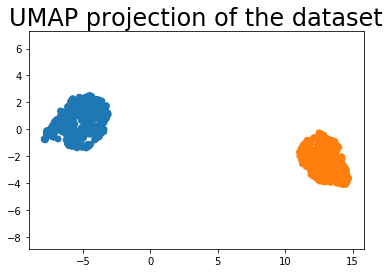

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in methyl_arr.pheno['Sex'].to_numpy() ])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24);

In [59]:
methyl_arr.remove_missingness(cpg_threshold=0.05, sample_threshold=0.05)

In [77]:
imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [109]:
methyl_arr.pheno['disease'].unique()

array(['normal'], dtype=object)

In [115]:
#t_data_df=umap_embed(methyl_arr.beta,"disease", n_neighbors=8)
t_data_df= umap_embed(methyl_arr.beta,methyl_arr.pheno['Age'], n_neighbors=8, supervised=True, min_dist=0.1, metric='euclidean')

/opt/conda/lib/python3.7/site-packages/numpy/lib/arraysetops.py:316: RuntimeWarning:

invalid value encountered in not_equal

/opt/conda/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning:

Embedding a total of 2 separate connected components using meta-embedding (experimental)



GSM2333901_9370847096_R05C02    72.0
GSM2333902_9376538120_R06C01    55.0
GSM2333903_7766148053_R06C02    23.0
GSM2333904_7766148077_R04C02    86.0
GSM2333905_9370847096_R06C02    74.0
                                ... 
GSM2334631_7766148080_R04C02    72.0
GSM2334632_7766148080_R03C02    54.0
GSM2334633_7766148084_R01C01    52.0
GSM2334634_7766148080_R05C02    45.0
GSM2334635_7766148053_R04C02    68.0
Name: Age, Length: 719, dtype: float64                                       x         y         z
GSM2333901_9370847096_R05C02  14.632610 -6.333490 -1.010088
GSM2333902_9376538120_R06C01  14.034971 -6.973087 -2.505881
GSM2333903_7766148053_R06C02  15.318721 -5.633963 -0.048502
GSM2333904_7766148077_R04C02  14.777514 -6.980419 -0.636128
GSM2333905_9370847096_R06C02  14.633123 -7.032771 -1.853816
...                                 ...       ...       ...
GSM2334631_7766148080_R04C02  15.718999 -7.573455 -1.361433
GSM2334632_7766148080_R03C02  15.666240 -7.651526 -1.245950
GSM2334633_776

In [116]:
t_data_df


x         y         z  color
GSM2333901_9370847096_R05C02  14.632610 -6.333490 -1.010088   72.0
GSM2333902_9376538120_R06C01  14.034971 -6.973087 -2.505881   55.0
GSM2333903_7766148053_R06C02  15.318721 -5.633963 -0.048502   23.0
GSM2333904_7766148077_R04C02  14.777514 -6.980419 -0.636128   86.0
GSM2333905_9370847096_R06C02  14.633123 -7.032771 -1.853816   74.0
...                                 ...       ...       ...    ...
GSM2334631_7766148080_R04C02  15.718999 -7.573455 -1.361433   72.0
GSM2334632_7766148080_R03C02  15.666240 -7.651526 -1.245950   54.0
GSM2334633_7766148084_R01C01  -2.751270  2.159037  1.088766   52.0
GSM2334634_7766148080_R05C02  -3.318100  1.397295  0.969308   45.0
GSM2334635_7766148053_R04C02  13.659266 -8.218202 -0.827999   68.0

[719 rows x 4 columns]

In [117]:
plotly_plot(t_data_df, "Age.html", G=None, axes_off=False)

In [1]:
import rpy2
rpy2.__version__

'2.9.4'

In [14]:
! pip install keras --upgrade 

     |████████████████████████████████| 378kB 7.0MB/s eta 0:00:01
  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [3]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.0'

In [93]:
import methQC
import methylprep

In [99]:
path='/home/Deep_Learner/private/network/geo_idats'

In [ ]:
/private/network/Methyl_Array/Demo_Data_EPIC

In [106]:
output_sheet_name

'/home/Deep_Learner/private/network/geo_idats/samplesheets/samplesheet.csv'

In [115]:
import pandas as pd
df=pd.read_csv(output_sheet_name)
df.head()
df['Basename'][0]

'/home/Deep_Learner/private/network/geo_idats/GSM2333901_9370847096_R05C02'

In [117]:
df.transpose()

0    \
Unnamed: 0                                                  0   
Basename    /home/Deep_Learner/private/network/geo_idats/G...   
AccNum                                             GSM2333901   
disease                                                normal   
Sex                                                      Male   
Tissue                                            whole blood   
Age                                                        72   

                                                          1    \
Unnamed: 0                                                  1   
Basename    /home/Deep_Learner/private/network/geo_idats/G...   
AccNum                                             GSM2333902   
disease                                                normal   
Sex                                                      Male   
Tissue                                            whole blood   
Age                                                        55   

                                                          2    \
Unnamed: 0                                                  2   
Basename    /home/Deep_Learner/private/network/geo_idats/G...   
AccNum                                             GSM2333903   
disease                                                normal   
Sex                                                      Male   
Tissue                                            whole blood   
Age                                                        23   

                                                          3    \
Unnamed: 0                                                  3   
Basename    /home/Deep_Learner/private/network/geo_idats/G...   
AccNum                                             GSM2333904   
disease                                                normal   
Sex                                                      Male   
Tissue                                            whole blood   
Age                                                        86   

                                                          4    \
Unnamed: 0                                                  4   
Basename    /home/Deep_Learner/private/network/geo_idats/G...   
AccNum                                             GSM2333905   
disease                                                normal   
Sex                                                      Male   
Tissue                                            whole blood   
Age                                                        74   

                                                          5    \
Unnamed: 0                                                  5   
Basename    /home/Deep_Learner/private/network/geo_idats/G...   
AccNum                                             GSM2333906   
disease                                                normal   
Sex                                                    Female   
Tissue                                            whole blood   
Age                                                        76   

                                                          6    \
Unnamed: 0                                                  6   
Basename    /home/Deep_Learner/private/network/geo_idats/G...   
AccNum                                             GSM2333907   
disease                                                normal   
Sex                                                      Male   
Tissue                                            whole blood   
Age                                                        18   

                                                          7    \
Unnamed: 0                                                  7   
Basename    /home/Deep_Learner/private/network/geo_idats/G...   
AccNum                                             GSM2333908   
disease                                                normal   
Sex                                                      Male   
Tissue               

In [112]:
df=df.drop(['Unnamed: 0'], axis=1)


Index(['Basename', 'AccNum', 'disease', 'Sex', 'Tissue', 'Age'], dtype='object')

In [105]:
import os
import methylprep
#os.chdir('/Users/mmaxmeister/legx/methylprep')
#data_dir = 'docs/example_data/GSE69852'
betas = methylprep.run_pipeline(path, sample_sheet_filepath=output_sheet_name,betas=True)

ValueError: Cannot find header with values: Sentrix_Position, Sentrix_ID, Sample_Name

In [10]:
! conda install --channel https://conda.binstar.org/joshadel rpy2 -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - rpy2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    binutils_linux-64-2.31.1   |       h6176602_8         168 KB  defaults
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    gfortran_linux-64-7.3.0    |       h553295d_8         169 KB  defaults
    gsl-2.5                    |       h294904e_1         2.7 MB  conda-forge
    harfbuzz-2.4.0             |       h9f30f68_3         1.5 MB  conda-forge
    libblas-3.8.0              |           12_mkl          10 KB  conda-forge
    libcblas-3.8.0      

In [25]:
! pip install pymethylprocess && pymethyl-install_r_dependencies

You should consider upgrading via the 'pip install --upgrade pip' command.
also installing the dependencies ‘curl’, ‘gh’, ‘usethis’, ‘covr’, ‘httr’, ‘rversions’, ‘rvest’

trying URL 'http://cran.wustl.edu/src/contrib/curl_4.2.tar.gz'
Content type 'application/x-gzip' length 667901 bytes (652 KB)
downloaded 652 KB

trying URL 'http://cran.wustl.edu/src/contrib/gh_1.0.1.tar.gz'
Content type 'application/x-gzip' length 15513 bytes (15 KB)
downloaded 15 KB

trying URL 'http://cran.wustl.edu/src/contrib/usethis_1.5.1.tar.gz'
Content type 'application/x-gzip' length 620225 bytes (605 KB)
downloaded 605 KB

trying URL 'http://cran.wustl.edu/src/contrib/covr_3.3.1.tar.gz'
Content type 'application/x-gzip' length 143868 bytes (140 KB)
downloaded 140 KB

trying URL 'http://cran.wustl.edu/src/contrib/httr_1.4.1.tar.gz'
Content type 'application/x-gzip' length 158465 bytes (154 KB)
downloaded 154 KB

trying URL 'http://cran.wustl.edu/src/contrib/rversions_2.0.0.tar.gz'
Content type 'application/x-

In [1]:
! /opt/conda/envs/deep_learning_python3/bin/pip install pymethylprocess && pymethyl-install_r_dependencies

/bin/sh: 1: /opt/conda/envs/deep_learning_python3/bin/pip: not found


In [78]:
!pip install rpy2 --upgrade

     |████████████████████████████████| 163kB 7.0MB/s eta 0:00:01
     |████████████████████████████████| 235kB 11.4MB/s eta 0:00:01
     |████████████████████████████████| 92kB 15.2MB/s eta 0:00:01
  Created wheel for rpy2: filename=rpy2-3.2.0-cp37-cp37m-linux_x86_64.whl size=262993 sha256=4045570a6297ffb034f3c7d2fe3afd8951d0e8a127e15d8c4a5c422d9b7bed24
  Stored in directory: /home/Deep_Learner/.cache/pip/wheels/9f/f9/4b/22860557a81d5e99c93c4dee874856b34ce50cdd2fe7fe5b90
Successfully built rpy2
ERROR: pymethylprocess 0.1.4 has requirement click==6.7, but you'll have click 7.0 which is incompatible.
ERROR: pymethylprocess 0.1.4 has requirement rpy2==2.9.4, but you'll have rpy2 3.2.0 which is incompatible.
  Found existing installation: rpy2 3.1.0
    Uninstalling rpy2-3.1.0:
      Successfully uninstalled rpy2-3.1.0


In [77]:
! conda install rpy2==3.3.* -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - rpy2=3.3

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [2]:
import pymethylprocess 

In [6]:
!nano include_col.txt

[19A[ line 1/1 (100%), col 1/1 (100%), char 0/0 (0%) ]xt^T To Spell  ^_ Go To Line         include_col.txt                              

In [3]:
! pymethyl-preprocess download_geo -g GSE87571 -o geo_idats/

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://ftp.ncbi.nlm.nih.gov/geo/series/GSE87nnn/GSE87571/suppl//GSE87571_RAW.tar?tool=geoquery'

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/x-tar'
  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 6552381440 bytes (6248.8 MB)

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: =
  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: downloaded 6248.8 MB


  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy

In [21]:
dir(pymethylprocess.__package__)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [2]:
score = input("Enter Score: ")

try:
    fscore = float(score)
    if 0.0 < fscore < 1.0:
        if fscore >= 0.9:
            print("A")
        elif fscore >= 0.8:
            print("B")
        elif fscore >= 0.7:
            print("C")
        elif fscore >= 0.6:
            print("D")
        else:
            print("F")

    else:
        print("Your score is out of range")
except:
    print("Score is non-numerical!")
    quit()



    
    
    

Enter Score: word
Score is non-numerical!


In [2]:
def computepay(h,r):
        if h <= 40:
            pay = h * r
        else:
            pay = 40 * r + ((h-40) * (1.5 * r))
        return pay

try: 
    hrs = input("Enter Hours:")
    h = float(hrs)
    rate = input("Enter Rate:")
    r = float(rate)
    p = computepay(h,r)
    print("Pay",p)
except:
    print("Score is non-numerical.Please type again!")
    



Enter Hours:45
Enter Rate:10.5
Pay 498.75


In [7]:
num = 0
tot = 0.0
while True :
    sval = input("Enter a number: ")
    if sval == "done":
        break
    fval = float(sval)
    print(fval)
    num = num + 1
    tot = tot + fval

print("ALL DONE")
print(tot, num, tot/num)


Enter a number: 3
3.0
Enter a number: 3
3.0
Enter a number: 5
5.0
Enter a number: 6
6.0
Enter a number: done
ALL DONE
17.0 4 4.25


In [8]:
largest = None
smallest = None
lists=[]

while True:
    num = input("Enter a number: ")
    if num == "done" : break
    try :
        fnum = float(num)
        lists.append(fnum)
    except :
        print("Invalid input")
        continue

for number in lists:
    if smallest is None :
        smallest = number
    elif number < smallest :
        smallest = number
    if largest is None :
        largest = number
    elif number > largest :
        largest = number

print("Maximum is", largest)
print("Minimum is", smallest)


Enter a number: 4
Enter a number: 10
Enter a number: 2
Enter a number: dom
Invalid input
Enter a number: done
Maximum is 10.0
Minimum is 2.0


In [9]:
lists


[4.0, 10.0, 2.0]